In [12]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import multiprocessing
import os
import neat
import visualize

import warnings
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

def eval_genome(genome, config):
    """
    This function will be run in parallel by ParallelEvaluator.  It takes two
    arguments (a single genome and the genome class configuration data) and
    should return one float (that genome's fitness).

    Note that this function needs to be in module scope for multiprocessing.Pool
    (which is what ParallelEvaluator uses) to find it.  Because of this, make
    sure you check for __main__ before executing any code (as we do here in the
    last few lines in the file), otherwise you'll have made a fork bomb
    instead of a neuroevolution demo. :)
    """
    if_no_connect = True
    
    net = neat.nn.FeedForwardNetwork.create(genome, config)

    # [x_inputs, x_outputs] = sampleing()

    error = 0.0
    for xi, xo in zip(x_inputs, x_outputs):
        output = net.activate(xi)
        error -= (output[0] - xo[0]) ** 2
        # error -= np.abs(output[0] - xo[0])
        if float(output[0]) != 0:
            if_no_connect = False
    
    if if_no_connect:
        mse = -1
    else:
        mse = error/samplesize
    # mad = error/L
    return mse

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)

    # Run for up to 300 generations.
    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)
    winner = p.run(pe.evaluate, 1000)

    return [stats,winner]

In [3]:
def ackley(a):
    d = len(a)
    term1 = - 20 * np.exp(-0.2*np.sqrt(np.sum(a**2)/d))
    term2 = - np.exp(np.sum(np.cos(a*2*np.pi))/d)
    f = term1 + term2 + 20 + np.exp(1)
    return f

d = 1
samplesize = 1000

def sampleing():
    x_inputs = []
    x_outputs = []
    list_outputs = []

    for i in range(samplesize):
        A = -32.768
        B = 32.768#小数的范围A ~ B
        a = np.random.uniform(A,B,d)
        x_inputs.append(tuple(a/A))
        y = ackley(a)
        list_outputs.append(y)

    for i in range(samplesize):
        # x_outputs.append(tuple([list_outputs[i]/np.max(list_outputs)]))
        x_outputs.append(tuple([list_outputs[i]/24]))
    return [x_inputs, x_outputs]

[x_inputs, x_outputs] = sampleing()

## visualization

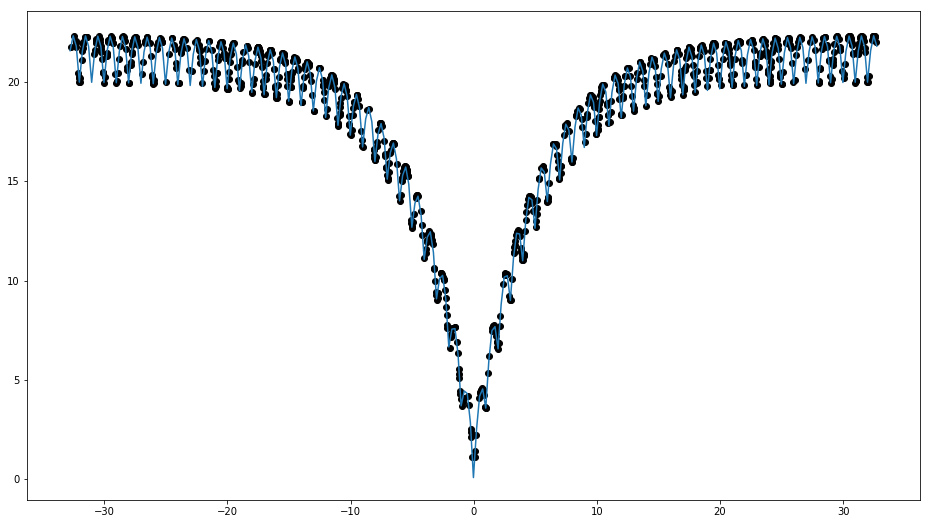

In [4]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize = (16,9))

# Make data.
X = np.arange(-32.768, 32.768, 0.25)


Z = []
for i in range(X.shape[0]):
    a = np.array([X[i]])
    Z.append(ackley(a))
Z = np.array(Z).reshape(X.shape)
plt.plot(X,Z)


x = []

z = []
for i in range(1000):
    x.append(x_inputs[i][0]*32.768)
    z.append(x_outputs[i][0]*24)

plt.scatter(x, z, c='k', marker='o')


plt.show()

In [5]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward")

stats_list = []
winner_list = []
for i in range(1):
    [stats,winner] = run(config_path)
    stats_list.append(stats)

    winner_list.append(winner)


 ****** Running generation 0 ****** 

Population's average fitness: -0.69087 stdev: 0.45325
Best fitness: -0.04320 - size: (1, 1) - species 1 - id 91
Average adjusted fitness: 0.796
Mean genetic distance 1.522, standard deviation 0.687
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    66     -0.0    0.804     0
     2    0    34     -0.4    0.788     0
Total extinctions: 0
Generation time: 0.181 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.43906 stdev: 0.36741
Best fitness: -0.03840 - size: (2, 2) - species 1 - id 196
Average adjusted fitness: 0.796
Mean genetic distance 1.708, standard deviation 0.520
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    52     -0.0    0.838     0
     2    1    48     -0.2    0.755     0
Total extinctions: 0
Generation time: 0.186 sec (0.183 averag

Population's average fitness: -0.24184 stdev: 0.32734
Best fitness: -0.03264 - size: (2, 2) - species 2 - id 861
Average adjusted fitness: 0.764
Mean genetic distance 2.135, standard deviation 0.752
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    30     -0.0    0.732     0
     2   16    24     -0.0    0.740     8
     3   10    27     -0.0    0.787     8
     4    2    19     -0.0    0.795     0
Total extinctions: 0
Generation time: 0.327 sec (0.342 average)

 ****** Running generation 17 ****** 

Population's average fitness: -0.24904 stdev: 0.32028
Best fitness: -0.03264 - size: (2, 2) - species 2 - id 861
Average adjusted fitness: 0.749
Mean genetic distance 2.121, standard deviation 0.707
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    28     -0.0    0.774     0
     2   17    33     -0.0    0.657     9

Population's average fitness: -0.27898 stdev: 0.35246
Best fitness: -0.01706 - size: (3, 4) - species 1 - id 2332
Average adjusted fitness: 0.724
Mean genetic distance 2.366, standard deviation 0.771
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   30    24     -0.0    0.599     6
     2   30    34     -0.0    0.873     3
     3   24    26     -0.0    0.770    22
     4   16    16     -0.0    0.654     5
Total extinctions: 0
Generation time: 0.386 sec (0.385 average)

 ****** Running generation 31 ****** 

Population's average fitness: -0.27241 stdev: 0.31789
Best fitness: -0.01706 - size: (3, 4) - species 1 - id 2332
Average adjusted fitness: 0.722
Mean genetic distance 2.282, standard deviation 0.776
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   31    26     -0.0    0.789     7
     2   31    26     -0.0    0.767   

Population's average fitness: -0.22094 stdev: 0.30816
Best fitness: -0.01579 - size: (3, 4) - species 1 - id 4157
Average adjusted fitness: 0.783
Mean genetic distance 2.170, standard deviation 0.771
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   44    18     -0.0    0.870     0
     2   44    16     -0.0    0.618    17
     3   38    15     -0.0    0.720     7
     4   30    17     -0.0    0.839    19
     5    7    17     -0.0    0.833     2
     6    5    16     -0.0    0.817     2
Total extinctions: 0
Generation time: 0.492 sec (0.452 average)

 ****** Running generation 45 ****** 

Population's average fitness: -0.17475 stdev: 0.26017
Best fitness: -0.01579 - size: (3, 4) - species 1 - id 4157
Average adjusted fitness: 0.825
Mean genetic distance 2.227, standard deviation 0.791
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ===

Population's average fitness: -0.21919 stdev: 0.28581
Best fitness: -0.01564 - size: (3, 4) - species 1 - id 4432

Species 2 with 16 members is stagnated: removing it
Average adjusted fitness: 0.780
Mean genetic distance 2.113, standard deviation 0.899
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   57    21     -0.0    0.811    10
     3   51    18     -0.0    0.738    10
     4   43    21     -0.0    0.650     3
     5   20    22     -0.0    0.875     4
     6   18    18     -0.0    0.826     2
Total extinctions: 0
Generation time: 0.506 sec (0.447 average)

 ****** Running generation 58 ****** 

Population's average fitness: -0.31149 stdev: 0.33842
Best fitness: -0.01564 - size: (3, 4) - species 1 - id 4432
Average adjusted fitness: 0.693
Mean genetic distance 2.114, standard deviation 0.851
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.23081 stdev: 0.29273
Best fitness: -0.00978 - size: (3, 5) - species 1 - id 5490
Average adjusted fitness: 0.767
Mean genetic distance 2.309, standard deviation 0.886
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   70    18     -0.0    0.822    11
     3   64    14     -0.0    0.664     3
     4   56    25     -0.0    0.816     2
     5   33    18     -0.0    0.702     1
     6   31    11     -0.0    0.838    15
     7    2    14     -0.0    0.760     1
Total extinctions: 0
Generation time: 0.451 sec (0.457 average)

 ****** Running generation 71 ****** 

Population's average fitness: -0.20049 stdev: 0.25696
Best fitness: -0.00978 - size: (3, 5) - species 1 - id 5490
Average adjusted fitness: 0.797
Mean genetic distance 2.303, standard deviation 0.911
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ==

Population's average fitness: -0.15121 stdev: 0.18259
Best fitness: -0.00978 - size: (3, 5) - species 1 - id 5490
Average adjusted fitness: 0.851
Mean genetic distance 2.314, standard deviation 0.910
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   83    16     -0.0    0.758    24
     3   77    16     -0.0    0.864    16
     4   69    20     -0.0    0.897    15
     5   46    16     -0.0    0.852    14
     6   44    14     -0.0    0.838    28
     7   15    16     -0.0    0.896     3
Total extinctions: 0
Generation time: 0.865 sec (0.551 average)

 ****** Running generation 84 ****** 

Population's average fitness: -0.17769 stdev: 0.20817
Best fitness: -0.00978 - size: (3, 5) - species 1 - id 5490
Average adjusted fitness: 0.823
Mean genetic distance 2.299, standard deviation 0.912
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ==

Population's average fitness: -0.20637 stdev: 0.25175
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.788
Mean genetic distance 2.323, standard deviation 0.884
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   96    21     -0.0    0.833    10
     3   90    22     -0.0    0.834     3
     4   82    22     -0.0    0.830    28
     5   59    19     -0.0    0.756    27
     7   28    17     -0.0    0.686    16
Total extinctions: 0
Generation time: 0.478 sec (0.498 average)

 ****** Running generation 97 ****** 

Population's average fitness: -0.26783 stdev: 0.31292
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.723
Mean genetic distance 2.337, standard deviation 0.875
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   97    22     -0.0    0.844    

Population's average fitness: -0.23566 stdev: 0.29841
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864

Species 7 with 24 members is stagnated: removing it
Average adjusted fitness: 0.760
Mean genetic distance 2.206, standard deviation 0.998
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  110    35     -0.0    0.826    24
     3  104    33     -0.0    0.748    17
     4   96    32     -0.0    0.707    42
Total extinctions: 0
Generation time: 0.441 sec (0.450 average)

 ****** Running generation 111 ****** 

Population's average fitness: -0.23485 stdev: 0.28934
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.765
Mean genetic distance 2.204, standard deviation 0.979
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  111    36     -0.0    0.807    25
     3  105    32     -0.0

Population's average fitness: -0.26542 stdev: 0.30001
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.734
Mean genetic distance 2.228, standard deviation 0.978
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  125    35     -0.0    0.762    39
     3  119    32     -0.0    0.692     3
     4  111    33     -0.0    0.748    57
Total extinctions: 0
Generation time: 0.463 sec (0.451 average)

 ****** Running generation 126 ****** 

Population's average fitness: -0.28033 stdev: 0.33222
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.715
Mean genetic distance 2.270, standard deviation 0.971
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  126    37     -0.0    0.846    40
     3  120    28     -0.0    0.502     4
     4  112    35     -0.0    0.797  

Population's average fitness: -0.23315 stdev: 0.30101
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.716
Mean genetic distance 2.571, standard deviation 0.836
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  139    23     -0.0    0.719    53
     3  133    24     -0.0    0.883    17
     4  125    23     -0.0    0.743    71
     8   11    18     -0.0    0.771     0
     9    2    12     -0.1    0.465     0
Total extinctions: 0
Generation time: 0.411 sec (0.480 average)

 ****** Running generation 140 ****** 

Population's average fitness: -0.22844 stdev: 0.29866
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.773
Mean genetic distance 2.483, standard deviation 0.825
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  140    22     -0.0    0.782  

Population's average fitness: -0.20594 stdev: 0.27260
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864

Species 3 with 19 members is stagnated: removing it
Average adjusted fitness: 0.799
Mean genetic distance 2.188, standard deviation 0.908
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  152    27     -0.0    0.862    66
     4  138    23     -0.0    0.785    84
     8   24    22     -0.0    0.654    11
     9   15    28     -0.0    0.895     4
Total extinctions: 0
Generation time: 0.481 sec (0.506 average)

 ****** Running generation 153 ****** 

Population's average fitness: -0.21437 stdev: 0.23902
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.784
Mean genetic distance 2.237, standard deviation 0.863
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  153    26     -0.0

Population's average fitness: -0.21423 stdev: 0.25789
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.786
Mean genetic distance 2.213, standard deviation 0.786
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  166    25     -0.0    0.807    80
     4  152    23     -0.0    0.671    98
     8   38    25     -0.0    0.829     5
     9   29    27     -0.0    0.836     4
Total extinctions: 0
Generation time: 0.470 sec (0.449 average)

 ****** Running generation 167 ****** 

Population's average fitness: -0.20561 stdev: 0.25731
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.793
Mean genetic distance 2.194, standard deviation 0.775
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  167    26     -0.0    0.818    81
     4  153    24     -0.0    0.785  

Population's average fitness: -0.28053 stdev: 0.31622
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.588
Mean genetic distance 2.290, standard deviation 0.763
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  180    25     -0.0    0.716    94
     4  166    26     -0.0    0.837   112
     8   52    23     -0.0    0.630     0
     9   43    25     -0.0    0.754     0
    10   11     2     -1.0    0.000    10
Total extinctions: 0
Generation time: 0.473 sec (0.486 average)

 ****** Running generation 181 ****** 

Population's average fitness: -0.24799 stdev: 0.30477
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.613
Mean genetic distance 2.309, standard deviation 0.767
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  181    25     -0.0    0.833  

Population's average fitness: -0.26556 stdev: 0.30985
Best fitness: -0.00884 - size: (3, 5) - species 1 - id 7864
Average adjusted fitness: 0.598
Mean genetic distance 2.337, standard deviation 0.715
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  193    27     -0.0    0.815   107
     4  179    21     -0.0    0.714    10
     8   65    24     -0.0    0.700    13
     9   56    25     -0.0    0.761     5
    10   24     2     -1.0    0.000    23
    11    0     2       --       --     0
Total extinctions: 0
Generation time: 0.577 sec (0.519 average)

 ****** Running generation 194 ****** 

Population's average fitness: -0.30529 stdev: 0.35146
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.573
Mean genetic distance 2.356, standard deviation 0.731
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======= 

Population's average fitness: -0.21326 stdev: 0.26288
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.786
Mean genetic distance 2.343, standard deviation 0.839
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  206    19     -0.0    0.764    12
     4  192    18     -0.0    0.727    23
     8   78    20     -0.0    0.790     0
     9   69    20     -0.0    0.823     7
    11   13    21     -0.0    0.825     9
Total extinctions: 0
Generation time: 0.561 sec (0.546 average)

 ****** Running generation 207 ****** 

Population's average fitness: -0.21054 stdev: 0.25148
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.790
Mean genetic distance 2.335, standard deviation 0.786
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  207    20     -0.0    0.858  

Population's average fitness: -0.29271 stdev: 0.32563
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.707
Mean genetic distance 2.290, standard deviation 0.896
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  219    21     -0.0    0.758    25
     4  205    20     -0.0    0.755    36
     8   91    21     -0.0    0.679     2
     9   82    18     -0.0    0.642     4
    11   26    19     -0.0    0.700     4
Total extinctions: 0
Generation time: 0.678 sec (0.667 average)

 ****** Running generation 220 ****** 

Population's average fitness: -0.18480 stdev: 0.22290
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.814
Mean genetic distance 2.311, standard deviation 0.897
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  220    20     -0.0    0.824  

Population's average fitness: -0.18803 stdev: 0.22918
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.810
Mean genetic distance 2.359, standard deviation 0.820
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  232    22     -0.0    0.891    38
     4  218    19     -0.0    0.765    49
     8  104    21     -0.0    0.843    15
     9   95    19     -0.0    0.754    17
    11   39    21     -0.0    0.799    10
Total extinctions: 0
Generation time: 0.506 sec (0.575 average)

 ****** Running generation 233 ****** 

Population's average fitness: -0.22841 stdev: 0.25155
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.773
Mean genetic distance 2.345, standard deviation 0.798
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  233    21     -0.0    0.776

Population's average fitness: -0.17010 stdev: 0.20292
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760

Species 4 with 14 members is stagnated: removing it
Average adjusted fitness: 0.835
Mean genetic distance 2.497, standard deviation 0.927
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  245    21     -0.0    0.834    51
     8  117    21     -0.0    0.824    28
     9  108    20     -0.0    0.845     0
    11   52    20     -0.0    0.857     8
    12    6    20     -0.0    0.813     3
Total extinctions: 0
Generation time: 0.581 sec (0.529 average)

 ****** Running generation 246 ****** 

Population's average fitness: -0.17300 stdev: 0.24075
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.827
Mean genetic distance 2.513, standard deviation 0.926
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======

Population's average fitness: -0.21485 stdev: 0.22080
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.785
Mean genetic distance 2.430, standard deviation 0.987
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  259    25     -0.0    0.755    65
     9  122    27     -0.0    0.831    14
    11   66    25     -0.0    0.814    22
    12   20    24     -0.0    0.739    17
Total extinctions: 0
Generation time: 0.532 sec (0.538 average)

 ****** Running generation 260 ****** 

Population's average fitness: -0.25136 stdev: 0.26249
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.749
Mean genetic distance 2.411, standard deviation 0.970
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  260    26     -0.0    0.760    66
     9  123    26     -0.0    0.752

Population's average fitness: -0.16757 stdev: 0.20965
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.831
Mean genetic distance 1.840, standard deviation 0.906
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  274    48     -0.0    0.809    80
     9  137    52     -0.0    0.853    29
Total extinctions: 0
Generation time: 0.531 sec (0.530 average)

 ****** Running generation 275 ****** 

Population's average fitness: -0.18369 stdev: 0.23906
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.816
Mean genetic distance 1.869, standard deviation 0.872
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  275    49     -0.0    0.805    81
     9  138    51     -0.0    0.826    30
Total extinctions: 0
Generation time: 0.486 sec (0.527 average)

 ****** Runn

Population's average fitness: -0.18234 stdev: 0.23587
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.818
Mean genetic distance 1.972, standard deviation 0.826
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  290    29     -0.0    0.804    96
     9  153    34     -0.0    0.861    45
    13   11    37     -0.0    0.787     0
Total extinctions: 0
Generation time: 0.546 sec (0.487 average)

 ****** Running generation 291 ****** 

Population's average fitness: -0.25631 stdev: 0.30748
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.744
Mean genetic distance 1.934, standard deviation 0.886
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  291    31     -0.0    0.756    97
     9  154    33     -0.0    0.724    46
    13   12    35     -0.0    0.752 

Population's average fitness: -0.22221 stdev: 0.28002
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.789
Mean genetic distance 2.194, standard deviation 0.912
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  305    29     -0.0    0.733   111
     9  168    30     -0.0    0.816    60
    13   26    28     -0.0    0.782     2
    14    1    14     -0.1    0.826     0
Total extinctions: 0
Generation time: 0.601 sec (0.664 average)

 ****** Running generation 306 ****** 

Population's average fitness: -0.21391 stdev: 0.26188
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.773
Mean genetic distance 2.233, standard deviation 0.906
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  306    28     -0.0    0.815   112
     9  169    28     -0.0    0.800

Population's average fitness: -0.32720 stdev: 0.37208
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.676
Mean genetic distance 2.491, standard deviation 0.946
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  319    20     -0.0    0.614   125
     9  182    22     -0.0    0.788    74
    13   40    17     -0.0    0.452     4
    14   15    21     -0.0    0.734     6
    15    9    20     -0.0    0.791     2
Total extinctions: 0
Generation time: 0.898 sec (0.696 average)

 ****** Running generation 320 ****** 

Population's average fitness: -0.23423 stdev: 0.26834
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.758
Mean genetic distance 2.442, standard deviation 0.955
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  320    19     -0.0    0.725 

Population's average fitness: -0.17321 stdev: 0.22631
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.828
Mean genetic distance 2.452, standard deviation 1.002
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  332    22     -0.0    0.860   138
     9  195    20     -0.0    0.761    87
    13   53    19     -0.0    0.788    17
    14   28    19     -0.0    0.864     0
    15   22    19     -0.0    0.867     3
Total extinctions: 0
Generation time: 0.638 sec (0.646 average)

 ****** Running generation 333 ****** 

Population's average fitness: -0.20844 stdev: 0.25465
Best fitness: -0.00867 - size: (3, 5) - species 1 - id 17760
Average adjusted fitness: 0.793
Mean genetic distance 2.481, standard deviation 1.011
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  333    20     -0.0    0.753  

Population's average fitness: -0.20019 stdev: 0.26175
Best fitness: -0.00624 - size: (3, 5) - species 1 - id 30900

Species 13 with 20 members is stagnated: removing it
Average adjusted fitness: 0.794
Mean genetic distance 2.337, standard deviation 1.002
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  345    24     -0.0    0.793     7
     9  208    26     -0.0    0.813   100
    14   41    24     -0.0    0.786     8
    15   35    26     -0.0    0.782     2
Total extinctions: 0
Generation time: 0.659 sec (0.559 average)

 ****** Running generation 346 ****** 

Population's average fitness: -0.22275 stdev: 0.27222
Best fitness: -0.00624 - size: (3, 5) - species 1 - id 30900
Average adjusted fitness: 0.777
Mean genetic distance 2.314, standard deviation 0.992
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  346    25     -

Population's average fitness: -0.15336 stdev: 0.18477
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.848
Mean genetic distance 2.291, standard deviation 0.984
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  359    25     -0.0    0.898    21
     9  222    25     -0.0    0.781     9
    14   55    26     -0.0    0.881    12
    15   49    24     -0.0    0.833    16
Total extinctions: 0
Generation time: 0.509 sec (0.473 average)

 ****** Running generation 360 ****** 

Population's average fitness: -0.17093 stdev: 0.18733
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.829
Mean genetic distance 2.294, standard deviation 0.995
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  360    26     -0.0    0.860    22
     9  223    26     -0.0    0.8

Population's average fitness: -0.23768 stdev: 0.32627
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.762
Mean genetic distance 2.264, standard deviation 0.987
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  373    24     -0.0    0.755    35
     9  236    26     -0.0    0.844    23
    14   69    27     -0.0    0.801     4
    15   63    23     -0.0    0.648     3
Total extinctions: 0
Generation time: 0.426 sec (0.473 average)

 ****** Running generation 374 ****** 

Population's average fitness: -0.26548 stdev: 0.29090
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.734
Mean genetic distance 2.236, standard deviation 0.983
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  374    24     -0.0    0.721    36
     9  237    25     -0.0    0.6

Population's average fitness: -0.22812 stdev: 0.27274
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.772
Mean genetic distance 2.269, standard deviation 0.991
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  387    26     -0.0    0.781    49
     9  250    25     -0.0    0.803    37
    14   83    26     -0.0    0.765    18
    15   77    23     -0.0    0.739    11
Total extinctions: 0
Generation time: 0.930 sec (0.559 average)

 ****** Running generation 388 ****** 

Population's average fitness: -0.19475 stdev: 0.25061
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.805
Mean genetic distance 2.258, standard deviation 0.965
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  388    27     -0.0    0.894    50
     9  251    26     -0.0    0.8

Population's average fitness: -0.17437 stdev: 0.23138
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.825
Mean genetic distance 2.122, standard deviation 0.999
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  401    32     -0.0    0.817    63
     9  264    34     -0.0    0.830    51
    15   91    34     -0.0    0.830     8
Total extinctions: 0
Generation time: 0.738 sec (0.781 average)

 ****** Running generation 402 ****** 

Population's average fitness: -0.22306 stdev: 0.28536
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.778
Mean genetic distance 2.158, standard deviation 0.914
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  402    34     -0.0    0.833    64
     9  265    32     -0.0    0.710    52
    15   92    33     -0.0    0.79

Population's average fitness: -0.20625 stdev: 0.25628
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.791
Mean genetic distance 2.053, standard deviation 0.969
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  416    35     -0.0    0.842    78
     9  279    34     -0.0    0.810    66
    15  106    31     -0.0    0.720    14
Total extinctions: 0
Generation time: 0.535 sec (0.641 average)

 ****** Running generation 417 ****** 

Population's average fitness: -0.21032 stdev: 0.24592
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.791
Mean genetic distance 2.168, standard deviation 0.959
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  417    33     -0.0    0.749    79
     9  280    33     -0.0    0.802    67
    15  107    33     -0.0    0.82

Population's average fitness: -0.19271 stdev: 0.25600
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.805
Mean genetic distance 2.305, standard deviation 0.883
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  431    24     -0.0    0.733     1
     9  294    26     -0.0    0.885    81
    15  121    22     -0.0    0.721    29
    16   10    27     -0.0    0.880     0
Total extinctions: 0
Generation time: 0.510 sec (0.559 average)

 ****** Running generation 432 ****** 

Population's average fitness: -0.22185 stdev: 0.26671
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964

Species 15 with 22 members is stagnated: removing it
Average adjusted fitness: 0.787
Mean genetic distance 2.109, standard deviation 0.843
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  432    34     

Population's average fitness: -0.15286 stdev: 0.19710
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.847
Mean genetic distance 2.075, standard deviation 0.863
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  446    32     -0.0    0.856    16
     9  309    34     -0.0    0.846    96
    16   25    34     -0.0    0.840    10
Total extinctions: 0
Generation time: 0.459 sec (0.518 average)

 ****** Running generation 447 ****** 

Population's average fitness: -0.22938 stdev: 0.27931
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.771
Mean genetic distance 2.049, standard deviation 0.884
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  447    34     -0.0    0.812    17
     9  310    33     -0.0    0.745    97
    16   26    33     -0.0    0.7

Population's average fitness: -0.20163 stdev: 0.26965
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.798
Mean genetic distance 2.057, standard deviation 0.974
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  461    32     -0.0    0.755    31
     9  324    34     -0.0    0.813   111
    16   40    35     -0.0    0.826     7
Total extinctions: 0
Generation time: 0.508 sec (0.549 average)

 ****** Running generation 462 ****** 

Population's average fitness: -0.16437 stdev: 0.19510
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.835
Mean genetic distance 2.078, standard deviation 0.938
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  462    32     -0.0    0.797    32
     9  325    34     -0.0    0.845   112
    16   41    35     -0.0    0.8

Population's average fitness: -0.22552 stdev: 0.27684
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.773
Mean genetic distance 2.151, standard deviation 0.959
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  476    35     -0.0    0.822    46
     9  339    31     -0.0    0.724   126
    16   55    34     -0.0    0.774    10
Total extinctions: 0
Generation time: 0.464 sec (0.502 average)

 ****** Running generation 477 ****** 

Population's average fitness: -0.23658 stdev: 0.27421
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.765
Mean genetic distance 2.172, standard deviation 0.947
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  477    34     -0.0    0.820    47
     9  340    34     -0.0    0.847   127
    16   56    33     -0.0    0.6

Population's average fitness: -0.24765 stdev: 0.28206
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.751
Mean genetic distance 2.149, standard deviation 0.981
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  491    31     -0.0    0.683    61
     9  354    33     -0.0    0.763   141
    16   70    35     -0.0    0.808     1
Total extinctions: 0
Generation time: 0.509 sec (0.509 average)

 ****** Running generation 492 ****** 

Population's average fitness: -0.18642 stdev: 0.24711
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.816
Mean genetic distance 2.152, standard deviation 0.988
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  492    34     -0.0    0.892    62
     9  355    32     -0.0    0.771   142
    16   71    34     -0.0    0.78

Population's average fitness: -0.21343 stdev: 0.25637
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.786
Mean genetic distance 2.132, standard deviation 0.968
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  506    34     -0.0    0.786    76
     9  369    32     -0.0    0.765   156
    16   85    34     -0.0    0.806     8
Total extinctions: 0
Generation time: 0.551 sec (0.526 average)

 ****** Running generation 507 ****** 

Population's average fitness: -0.19215 stdev: 0.22192
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.807
Mean genetic distance 2.108, standard deviation 0.973
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  507    35     -0.0    0.824    77
     9  370    31     -0.0    0.763   157
    16   86    35     -0.0    0.8

Population's average fitness: -0.19522 stdev: 0.22158
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.805
Mean genetic distance 2.161, standard deviation 0.972
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  521    33     -0.0    0.799    91
     9  384    33     -0.0    0.786   171
    16  100    35     -0.0    0.829    23
Total extinctions: 0
Generation time: 0.518 sec (0.501 average)

 ****** Running generation 522 ****** 

Population's average fitness: -0.15655 stdev: 0.18526
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.843
Mean genetic distance 2.167, standard deviation 0.968
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  522    33     -0.0    0.827    92
     9  385    33     -0.0    0.824   172
    16  101    35     -0.0    0.8

Population's average fitness: -0.22666 stdev: 0.27323
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.776
Mean genetic distance 2.051, standard deviation 0.860
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  536    34     -0.0    0.846   106
     9  399    33     -0.0    0.701   186
    17    7    33     -0.0    0.782     0
Total extinctions: 0
Generation time: 0.575 sec (0.508 average)

 ****** Running generation 537 ****** 

Population's average fitness: -0.21092 stdev: 0.26312
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.790
Mean genetic distance 2.053, standard deviation 0.857
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  537    31     -0.0    0.676   107
     9  400    34     -0.0    0.830   187
    17    8    35     -0.0    0.8

Population's average fitness: -0.22322 stdev: 0.24565
Best fitness: -0.00501 - size: (8, 13) - species 9 - id 31964
Average adjusted fitness: 0.775
Mean genetic distance 2.112, standard deviation 0.871
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  550    27     -0.0    0.802   120
     9  413    24     -0.0    0.771   200
    17   21    22     -0.0    0.690     0
    18   10    27     -0.0    0.835     2
Total extinctions: 0
Generation time: 0.477 sec (0.522 average)

 ****** Running generation 551 ****** 

Population's average fitness: -0.18669 stdev: 0.25041
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.813
Mean genetic distance 2.010, standard deviation 0.848
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  551    27     -0.0    0.875     0
     9  414    23     -0.0    0.77

Population's average fitness: -0.23463 stdev: 0.29896
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.763
Mean genetic distance 2.187, standard deviation 0.875
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  564    26     -0.0    0.850    13
     9  427    26     -0.0    0.803   214
    17   35    25     -0.0    0.820    14
    18   24    22     -0.0    0.580     2
Total extinctions: 0
Generation time: 0.546 sec (0.526 average)

 ****** Running generation 565 ****** 

Population's average fitness: -0.17983 stdev: 0.24711
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.819
Mean genetic distance 2.222, standard deviation 0.842
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  565    25     -0.0    0.821    14
     9  428    25     -0.0    0.806  

Population's average fitness: -0.23730 stdev: 0.28342
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.751
Mean genetic distance 2.140, standard deviation 0.880
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  578    19     -0.0    0.629    27
     9  441    21     -0.0    0.769   228
    17   49    21     -0.0    0.783     3
    18   38    15     -0.0    0.685     3
    19    3    24     -0.0    0.886     1
Total extinctions: 0
Generation time: 0.534 sec (0.551 average)

 ****** Running generation 579 ****** 

Population's average fitness: -0.16514 stdev: 0.19196
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.835
Mean genetic distance 2.148, standard deviation 0.863
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  579    17     -0.0    0.791 

Population's average fitness: -0.19545 stdev: 0.20135
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.808
Mean genetic distance 2.224, standard deviation 0.943
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  591    19     -0.0    0.720    40
     9  454    20     -0.0    0.801   241
    17   62    20     -0.0    0.786    12
    18   51    18     -0.0    0.847    16
    19   16    25     -0.0    0.885     2
Total extinctions: 0
Generation time: 0.550 sec (0.535 average)

 ****** Running generation 592 ****** 

Population's average fitness: -0.23237 stdev: 0.27077
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.763
Mean genetic distance 2.196, standard deviation 0.966
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  592    13     -0.0    0.618

Population's average fitness: -0.25567 stdev: 0.26856
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.743
Mean genetic distance 2.154, standard deviation 0.983
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  604    23     -0.0    0.742    53
     9  467    20     -0.0    0.798   254
    17   75    18     -0.0    0.589    25
    18   64    17     -0.0    0.716    29
    19   29    22     -0.0    0.871    15
Total extinctions: 0
Generation time: 0.501 sec (0.557 average)

 ****** Running generation 605 ****** 

Population's average fitness: -0.24496 stdev: 0.27864
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713

Species 18 with 17 members is stagnated: removing it
Average adjusted fitness: 0.802
Mean genetic distance 2.317, standard deviation 1.027
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ====

Population's average fitness: -0.21167 stdev: 0.26316
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.786
Mean genetic distance 2.194, standard deviation 1.018
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  619    30     -0.0    0.714    68
     9  482    34     -0.0    0.811   269
    19   44    36     -0.0    0.832     2
Total extinctions: 0
Generation time: 0.453 sec (0.470 average)

 ****** Running generation 620 ****** 

Population's average fitness: -0.20541 stdev: 0.25706
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.792
Mean genetic distance 2.147, standard deviation 1.002
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  620    31     -0.0    0.761    69
     9  483    33     -0.0    0.769   270
    19   45    35     -0.0    0.847 

Population's average fitness: -0.17727 stdev: 0.21762
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.822
Mean genetic distance 2.135, standard deviation 1.009
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  634    32     -0.0    0.810    83
     9  497    33     -0.0    0.789   284
    19   59    36     -0.0    0.866    17
Total extinctions: 0
Generation time: 0.477 sec (0.481 average)

 ****** Running generation 635 ****** 

Population's average fitness: -0.17084 stdev: 0.20547
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.828
Mean genetic distance 2.137, standard deviation 0.995
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  635    33     -0.0    0.832    84
     9  498    32     -0.0    0.796   285
    19   60    35     -0.0    0.858

Population's average fitness: -0.19147 stdev: 0.23613
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.805
Mean genetic distance 2.271, standard deviation 0.795
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  648    25     -0.0    0.812    97
     9  511    27     -0.0    0.849   298
    20    6    25     -0.0    0.818     0
    21    5    23     -0.0    0.743     4
Total extinctions: 0
Generation time: 0.505 sec (0.444 average)

 ****** Running generation 649 ****** 

Population's average fitness: -0.26017 stdev: 0.32308
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.736
Mean genetic distance 2.288, standard deviation 0.814
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  649    25     -0.0    0.770    98
     9  512    27     -0.0    0.798 

Population's average fitness: -0.23996 stdev: 0.31318
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.760
Mean genetic distance 2.323, standard deviation 0.818
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  662    21     -0.0    0.683   111
     9  525    24     -0.0    0.744   312
    20   20    25     -0.0    0.790    12
    21   19    26     -0.0    0.823     9
    22    0     3       --       --     0
Total extinctions: 0
Generation time: 0.492 sec (0.546 average)

 ****** Running generation 663 ****** 

Population's average fitness: -0.19276 stdev: 0.21668
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.815
Mean genetic distance 2.463, standard deviation 0.800
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  663    20     -0.0    0.772  

Population's average fitness: -0.25601 stdev: 0.30992
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.740
Mean genetic distance 2.306, standard deviation 0.826
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  675    21     -0.0    0.809   124
     9  538    22     -0.0    0.820   325
    20   33    20     -0.0    0.692    25
    21   32    18     -0.0    0.687    22
    22   13    19     -0.0    0.690     4
Total extinctions: 0
Generation time: 0.430 sec (0.503 average)

 ****** Running generation 676 ****** 

Population's average fitness: -0.25856 stdev: 0.28391
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.737
Mean genetic distance 2.351, standard deviation 0.817
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  676    22     -0.0    0.802 

Population's average fitness: -0.26029 stdev: 0.30260
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.603
Mean genetic distance 2.236, standard deviation 0.664
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  689    31     -0.0    0.759   138
     9  552    33     -0.0    0.707   339
    22   27    32     -0.0    0.820     2
    23    6     3     -0.6    0.124     0
    24    0     1       --       --     0
Total extinctions: 0
Generation time: 0.454 sec (0.482 average)

 ****** Running generation 690 ****** 

Population's average fitness: -0.20365 stdev: 0.25930
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.520
Mean genetic distance 2.299, standard deviation 0.726
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  690    32     -0.0    0.822

Population's average fitness: -0.22421 stdev: 0.26375
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.662
Mean genetic distance 2.218, standard deviation 0.759
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  702    19     -0.0    0.762   151
     9  565    20     -0.0    0.885   352
    22   40    21     -0.0    0.815     9
    23   19     2     -1.0    0.000    13
    24   13    19     -0.0    0.809     7
    25    8    20     -0.0    0.702     3
Total extinctions: 0
Generation time: 0.537 sec (0.501 average)

 ****** Running generation 703 ****** 

Population's average fitness: -0.23712 stdev: 0.27853
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.649
Mean genetic distance 2.223, standard deviation 0.779
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======= 

Population's average fitness: -0.19731 stdev: 0.25196
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.682
Mean genetic distance 2.254, standard deviation 0.820
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  715    20     -0.0    0.800   164
     9  578    20     -0.0    0.867   365
    22   53    19     -0.0    0.803    22
    23   32     2     -1.0    0.000    26
    24   26    20     -0.0    0.851     0
    25   21    19     -0.0    0.774     2
Total extinctions: 0
Generation time: 0.512 sec (0.515 average)

 ****** Running generation 716 ****** 

Population's average fitness: -0.24116 stdev: 0.25261
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.646
Mean genetic distance 2.206, standard deviation 0.823
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======

Population's average fitness: -0.22529 stdev: 0.25583
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.772
Mean genetic distance 2.265, standard deviation 0.830
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  728    25     -0.0    0.740   177
     9  591    23     -0.0    0.740   378
    24   39    28     -0.0    0.863    13
    25   34    24     -0.0    0.746    15
Total extinctions: 0
Generation time: 0.530 sec (0.518 average)

 ****** Running generation 729 ****** 

Population's average fitness: -0.19677 stdev: 0.20370
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.804
Mean genetic distance 2.307, standard deviation 0.848
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  729    26     -0.0    0.848   178
     9  592    24     -0.0    0.801

Population's average fitness: -0.26223 stdev: 0.31226
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.737
Mean genetic distance 2.242, standard deviation 0.840
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  742    26     -0.0    0.800   191
     9  605    24     -0.0    0.708   392
    24   53    24     -0.0    0.677    13
    25   48    25     -0.0    0.762    10
Total extinctions: 0
Generation time: 0.555 sec (0.511 average)

 ****** Running generation 743 ****** 

Population's average fitness: -0.19575 stdev: 0.20150
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.805
Mean genetic distance 2.251, standard deviation 0.877
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  743    25     -0.0    0.761   192
     9  606    25     -0.0    0.843  

Population's average fitness: -0.31277 stdev: 0.34516
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.682
Mean genetic distance 2.257, standard deviation 0.843
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  756    22     -0.0    0.574   205
     9  619    28     -0.0    0.799   406
    24   67    28     -0.0    0.741     2
    25   62    23     -0.0    0.614    10
Total extinctions: 0
Generation time: 0.575 sec (0.532 average)

 ****** Running generation 757 ****** 

Population's average fitness: -0.22339 stdev: 0.23815
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.777
Mean genetic distance 2.295, standard deviation 0.843
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  757    23     -0.0    0.759   206
     9  620    27     -0.0    0.829

Population's average fitness: -0.19699 stdev: 0.20702
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.802
Mean genetic distance 2.271, standard deviation 0.885
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  770    23     -0.0    0.743   219
     9  633    24     -0.0    0.787   420
    24   81    27     -0.0    0.848    16
    25   76    25     -0.0    0.831    24
Total extinctions: 0
Generation time: 0.513 sec (0.578 average)

 ****** Running generation 771 ****** 

Population's average fitness: -0.22460 stdev: 0.26009
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.774
Mean genetic distance 2.274, standard deviation 0.881
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  771    24     -0.0    0.751   220
     9  634    26     -0.0    0.852  

Population's average fitness: -0.29181 stdev: 0.33496
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.707
Mean genetic distance 1.871, standard deviation 0.807
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  785    51     -0.0    0.730   234
     9  648    49     -0.0    0.685   435
Total extinctions: 0
Generation time: 0.579 sec (0.544 average)

 ****** Running generation 786 ****** 

Population's average fitness: -0.24202 stdev: 0.26077
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.758
Mean genetic distance 1.823, standard deviation 0.806
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  786    49     -0.0    0.761   235
     9  649    51     -0.0    0.755   436
Total extinctions: 0
Generation time: 0.627 sec (0.553 average)

 ****** Runn

Population's average fitness: -0.25260 stdev: 0.29417
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.748
Mean genetic distance 2.211, standard deviation 0.930
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  800    34     -0.0    0.688   249
     9  663    35     -0.0    0.821   450
    26   13    30     -0.0    0.736     2
Total extinctions: 0
Generation time: 0.549 sec (0.543 average)

 ****** Running generation 801 ****** 

Population's average fitness: -0.24882 stdev: 0.29937
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.754
Mean genetic distance 2.166, standard deviation 0.970
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  801    32     -0.0    0.643   250
     9  664    35     -0.0    0.788   451
    26   14    34     -0.0    0.830 

Population's average fitness: -0.21241 stdev: 0.25285
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.787
Mean genetic distance 2.151, standard deviation 0.948
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  815    33     -0.0    0.801   264
     9  678    32     -0.0    0.757   465
    26   28    34     -0.0    0.805     0
Total extinctions: 0
Generation time: 0.581 sec (0.564 average)

 ****** Running generation 816 ****** 

Population's average fitness: -0.20591 stdev: 0.23703
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.795
Mean genetic distance 2.153, standard deviation 0.942
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  816    34     -0.0    0.816   265
     9  679    33     -0.0    0.806   466
    26   29    33     -0.0    0.762 

Population's average fitness: -0.25393 stdev: 0.32050
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.740
Mean genetic distance 2.172, standard deviation 0.957
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  830    35     -0.0    0.744   279
     9  693    36     -0.0    0.829   480
    26   43    29     -0.0    0.648    15
Total extinctions: 0
Generation time: 0.560 sec (0.605 average)

 ****** Running generation 831 ****** 

Population's average fitness: -0.22911 stdev: 0.27736
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.770
Mean genetic distance 2.166, standard deviation 1.003
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  831    33     -0.0    0.713   280
     9  694    35     -0.0    0.828   481
    26   44    31     -0.0    0.771 

Population's average fitness: -0.19686 stdev: 0.24522
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.803
Mean genetic distance 2.222, standard deviation 0.937
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  844    24     -0.0    0.783   293
     9  707    24     -0.0    0.791   494
    26   57    24     -0.0    0.777     8
    27   10    27     -0.0    0.862     0
Total extinctions: 0
Generation time: 0.579 sec (0.575 average)

 ****** Running generation 845 ****** 

Population's average fitness: -0.17879 stdev: 0.21398
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.820
Mean genetic distance 2.278, standard deviation 0.880
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  845    24     -0.0    0.861   294
     9  708    23     -0.0    0.768  

Population's average fitness: -0.22540 stdev: 0.24546
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.776
Mean genetic distance 2.132, standard deviation 0.932
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  858    25     -0.0    0.806   307
     9  721    25     -0.0    0.736    12
    26   71    24     -0.0    0.745    22
    27   24    25     -0.0    0.816     5
Total extinctions: 0
Generation time: 0.615 sec (0.566 average)

 ****** Running generation 859 ****** 

Population's average fitness: -0.19389 stdev: 0.22989
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.806
Mean genetic distance 2.194, standard deviation 0.867
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  859    23     -0.0    0.764   308
     9  722    26     -0.0    0.852 

Population's average fitness: -0.23807 stdev: 0.29410
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.761
Mean genetic distance 2.200, standard deviation 0.840
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  873    35     -0.0    0.817   322
     9  736    34     -0.0    0.797    27
    27   39    31     -0.0    0.670    14
Total extinctions: 0
Generation time: 0.458 sec (0.481 average)

 ****** Running generation 874 ****** 

Population's average fitness: -0.21231 stdev: 0.27985
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.787
Mean genetic distance 2.186, standard deviation 0.837
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  874    34     -0.0    0.772   323
     9  737    35     -0.0    0.814    28
    27   40    32     -0.0    0.776

Population's average fitness: -0.21136 stdev: 0.25505
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.788
Mean genetic distance 2.059, standard deviation 0.924
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  888    33     -0.0    0.770   337
     9  751    35     -0.0    0.825    42
    27   54    33     -0.0    0.769     6
Total extinctions: 0
Generation time: 0.475 sec (0.505 average)

 ****** Running generation 889 ****** 

Population's average fitness: -0.18583 stdev: 0.23663
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.813
Mean genetic distance 2.064, standard deviation 0.912
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  889    32     -0.0    0.790   338
     9  752    36     -0.0    0.879    43
    27   55    32     -0.0    0.770

Population's average fitness: -0.21199 stdev: 0.24333
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.790
Mean genetic distance 2.070, standard deviation 0.877
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  903    33     -0.0    0.773   352
     9  766    33     -0.0    0.750    57
    27   69    33     -0.0    0.847     0
Total extinctions: 0
Generation time: 0.513 sec (0.525 average)

 ****** Running generation 904 ****** 

Population's average fitness: -0.22196 stdev: 0.22910
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.778
Mean genetic distance 2.080, standard deviation 0.926
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  904    32     -0.0    0.745   353
     9  767    34     -0.0    0.806    58
    27   70    34     -0.0    0.783 

Population's average fitness: -0.24179 stdev: 0.29429
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.754
Mean genetic distance 2.089, standard deviation 0.889
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  918    37     -0.0    0.856   367
     9  781    31     -0.0    0.677    72
    27   84    32     -0.0    0.730    14
Total extinctions: 0
Generation time: 0.527 sec (0.494 average)

 ****** Running generation 919 ****** 

Population's average fitness: -0.21941 stdev: 0.27113
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.777
Mean genetic distance 2.051, standard deviation 0.887
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  919    36     -0.0    0.841   368
     9  782    32     -0.0    0.732    73
    27   85    33     -0.0    0.758

Population's average fitness: -0.19144 stdev: 0.23466
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.807
Mean genetic distance 2.248, standard deviation 0.949
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  933    26     -0.0    0.873   382
     9  796    26     -0.0    0.813    87
    27   99    23     -0.0    0.682    29
    28    5    26     -0.0    0.861     0
Total extinctions: 0
Generation time: 0.464 sec (0.486 average)

 ****** Running generation 934 ****** 

Population's average fitness: -0.19436 stdev: 0.23399
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713

Species 27 with 23 members is stagnated: removing it
Average adjusted fitness: 0.806
Mean genetic distance 1.987, standard deviation 0.856
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  934    34     -

Population's average fitness: -0.18908 stdev: 0.25630
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.810
Mean genetic distance 2.010, standard deviation 0.854
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  948    35     -0.0    0.882   397
     9  811    32     -0.0    0.771   102
    28   20    33     -0.0    0.777     6
Total extinctions: 0
Generation time: 0.471 sec (0.493 average)

 ****** Running generation 949 ****** 

Population's average fitness: -0.27299 stdev: 0.33651
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.726
Mean genetic distance 2.060, standard deviation 0.875
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  949    36     -0.0    0.778   398
     9  812    33     -0.0    0.735   103
    28   21    32     -0.0    0.665

Population's average fitness: -0.19531 stdev: 0.25515
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.803
Mean genetic distance 2.022, standard deviation 0.829
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  963    35     -0.0    0.851   412
     9  826    31     -0.0    0.680   117
    28   35    35     -0.0    0.879     6
Total extinctions: 0
Generation time: 0.494 sec (0.498 average)

 ****** Running generation 964 ****** 

Population's average fitness: -0.27154 stdev: 0.31671
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.730
Mean genetic distance 1.972, standard deviation 0.900
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  964    32     -0.0    0.623   413
     9  827    33     -0.0    0.772   118
    28   36    36     -0.0    0.795

Population's average fitness: -0.18863 stdev: 0.23226
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.809
Mean genetic distance 2.056, standard deviation 0.842
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  978    32     -0.0    0.754   427
     9  841    32     -0.0    0.799   132
    28   50    37     -0.0    0.875    21
Total extinctions: 0
Generation time: 0.503 sec (0.472 average)

 ****** Running generation 979 ****** 

Population's average fitness: -0.18305 stdev: 0.21384
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.816
Mean genetic distance 2.049, standard deviation 0.831
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  979    31     -0.0    0.768   428
     9  842    33     -0.0    0.839   133
    28   51    36     -0.0    0.840

Population's average fitness: -0.26298 stdev: 0.32724
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.732
Mean genetic distance 2.031, standard deviation 0.868
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  993    33     -0.0    0.717   442
     9  856    30     -0.0    0.627   147
    28   65    37     -0.0    0.852    14
Total extinctions: 0
Generation time: 0.439 sec (0.474 average)

 ****** Running generation 994 ****** 

Population's average fitness: -0.23214 stdev: 0.29642
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.761
Mean genetic distance 2.060, standard deviation 0.849
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  994    35     -0.0    0.838   443
     9  857    28     -0.0    0.612   148
    28   66    36     -0.0    0.832 

Population's average fitness: -0.21595 stdev: 0.24687
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.785
Mean genetic distance 1.993, standard deviation 0.878
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1008    32     -0.0    0.723   457
     9  871    33     -0.0    0.818   162
    28   80    35     -0.0    0.813    29
Total extinctions: 0
Generation time: 0.515 sec (0.468 average)

 ****** Running generation 1009 ****** 

Population's average fitness: -0.15702 stdev: 0.18701
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713

Species 28 with 35 members is stagnated: removing it
Average adjusted fitness: 0.823
Mean genetic distance 1.702, standard deviation 0.930
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1009    49     -0.0    0.791   458
     9  872    51   

Population's average fitness: -0.29769 stdev: 0.31314
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.734
Mean genetic distance 2.314, standard deviation 0.688
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1024    23     -0.0    0.756   473
     9  887    25     -0.0    0.691   178
    29    4    19     -0.1    0.582     1
    30    3    13     -0.1    0.765     1
    31    1    19     -0.0    0.877     0
Total extinctions: 0
Generation time: 0.440 sec (0.503 average)

 ****** Running generation 1025 ****** 

Population's average fitness: -0.20028 stdev: 0.22608
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.796
Mean genetic distance 2.310, standard deviation 0.663
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1025    21     -0.0    0.79

Population's average fitness: -0.18973 stdev: 0.26745
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.810
Mean genetic distance 2.090, standard deviation 0.671
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1037    18     -0.0    0.889   486
     9  900    16     -0.0    0.793   191
    29   17    16     -0.0    0.701     3
    30   16    15     -0.0    0.802     3
    31   14    16     -0.0    0.850     3
    32    7    18     -0.0    0.828     4
Total extinctions: 0
Generation time: 0.414 sec (0.523 average)

 ****** Running generation 1038 ****** 

Population's average fitness: -0.18808 stdev: 0.26721
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.810
Mean genetic distance 2.137, standard deviation 0.665
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======

Population's average fitness: -0.22424 stdev: 0.27330
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.779
Mean genetic distance 2.125, standard deviation 0.705
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1049    18     -0.0    0.698   498
     9  912    18     -0.0    0.823   203
    29   29    16     -0.0    0.798     7
    30   28    14     -0.0    0.782    15
    31   26    16     -0.0    0.794     3
    32   19    17     -0.0    0.777    16
Total extinctions: 0
Generation time: 0.436 sec (0.474 average)

 ****** Running generation 1050 ****** 

Population's average fitness: -0.21991 stdev: 0.26748
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.781
Mean genetic distance 2.137, standard deviation 0.714
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======

Population's average fitness: -0.27688 stdev: 0.31329
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.710
Mean genetic distance 2.149, standard deviation 0.712
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1061    17     -0.0    0.717   510
     9  924    18     -0.0    0.642   215
    29   41    18     -0.0    0.826     0
    30   40    21     -0.0    0.644    27
    31   38    16     -0.0    0.639     7
    32   31    10     -0.0    0.795     5
Total extinctions: 0
Generation time: 0.401 sec (0.434 average)

 ****** Running generation 1062 ****** 

Population's average fitness: -0.17820 stdev: 0.23287
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.817
Mean genetic distance 2.183, standard deviation 0.696
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =====

Population's average fitness: -0.20195 stdev: 0.26494
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.800
Mean genetic distance 2.359, standard deviation 0.850
Population of 100 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1073    13     -0.0    0.697   522
     9  936    15     -0.0    0.810   227
    29   53    15     -0.0    0.746     1
    30   52    13     -0.0    0.845     0
    31   50    14     -0.0    0.733     3
    32   43    16     -0.0    0.905    17
    33    6    14     -0.0    0.866     1
Total extinctions: 0
Generation time: 0.430 sec (0.459 average)

 ****** Running generation 1074 ****** 

Population's average fitness: -0.21455 stdev: 0.25608
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.784
Mean genetic distance 2.350, standard deviation 0.852
Population of 99 members in 7 species:
   ID   age  size  fitness  adj fi

Population's average fitness: -0.17398 stdev: 0.21121
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.830
Mean genetic distance 2.311, standard deviation 0.822
Population of 101 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1085    14     -0.0    0.755   534
     9  948    15     -0.0    0.850   239
    29   65    14     -0.0    0.758     1
    30   64    21     -0.0    0.800     0
    31   62    14     -0.0    0.898    15
    32   55     8     -0.0    0.863    29
    33   18    15     -0.0    0.885     6
Total extinctions: 0
Generation time: 0.441 sec (0.469 average)

 ****** Running generation 1086 ****** 

Population's average fitness: -0.23520 stdev: 0.26939
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713

Species 32 with 8 members is stagnated: removing it
Average adjusted fitness: 0.762
Mean genetic distance 2.352, standard deviation 0.800
Population of 102 me

Population's average fitness: -0.21261 stdev: 0.23440
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.788
Mean genetic distance 2.337, standard deviation 0.817
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1097    17     -0.0    0.767   546
     9  960    16     -0.0    0.830   251
    29   77    18     -0.0    0.804     6
    30   76    16     -0.0    0.776    12
    31   74    16     -0.0    0.771    10
    33   30    17     -0.0    0.781     1
Total extinctions: 0
Generation time: 0.473 sec (0.501 average)

 ****** Running generation 1098 ****** 

Population's average fitness: -0.17346 stdev: 0.22162
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.826
Mean genetic distance 2.347, standard deviation 0.816
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =====

Population's average fitness: -0.24096 stdev: 0.29793
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.764
Mean genetic distance 2.411, standard deviation 0.777
Population of 99 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1109    14     -0.0    0.791   558
     9  972    13     -0.0    0.740   263
    29   89    13     -0.0    0.614     8
    30   88    15     -0.0    0.701    24
    31   86    14     -0.0    0.872     8
    33   42    15     -0.0    0.761    13
    34    4    15     -0.0    0.868     0
Total extinctions: 0
Generation time: 0.467 sec (0.477 average)

 ****** Running generation 1110 ****** 

Population's average fitness: -0.17853 stdev: 0.24323
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.820
Mean genetic distance 2.445, standard deviation 0.786
Population of 100 members in 7 species:
   ID   age  size  fitness  adj fi

Population's average fitness: -0.20073 stdev: 0.25871
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.792
Mean genetic distance 2.460, standard deviation 0.840
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1121    18     -0.0    0.845   570
     9  984    18     -0.0    0.881   275
    29  101    19     -0.0    0.863    20
    31   98    14     -0.0    0.709    20
    33   54    14     -0.0    0.618    25
    34   16    17     -0.0    0.834     2
Total extinctions: 0
Generation time: 0.466 sec (0.458 average)

 ****** Running generation 1122 ****** 

Population's average fitness: -0.19021 stdev: 0.24949
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.813
Mean genetic distance 2.457, standard deviation 0.865
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======

Population's average fitness: -0.18942 stdev: 0.24186
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.810
Mean genetic distance 2.399, standard deviation 0.965
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1134    24     -0.0    0.809   583
     9  997    24     -0.0    0.787   288
    33   67    25     -0.0    0.787     6
    34   29    26     -0.0    0.858     1
Total extinctions: 0
Generation time: 0.515 sec (0.492 average)

 ****** Running generation 1135 ****** 

Population's average fitness: -0.27239 stdev: 0.31053
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.728
Mean genetic distance 2.417, standard deviation 0.932
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1135    25     -0.0    0.782   584
     9  998    25     -0.0    0.77

Population's average fitness: -0.24024 stdev: 0.27708
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.760
Mean genetic distance 2.445, standard deviation 0.975
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1148    24     -0.0    0.697   597
     9  1011    24     -0.0    0.789   302
    33   81    25     -0.0    0.729     1
    34   43    27     -0.0    0.825    10
Total extinctions: 0
Generation time: 0.435 sec (0.474 average)

 ****** Running generation 1149 ****** 

Population's average fitness: -0.21199 stdev: 0.24915
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.786
Mean genetic distance 2.440, standard deviation 0.939
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1149    25     -0.0    0.759   598
     9  1012    25     -0.0    

Population's average fitness: -0.21753 stdev: 0.27382
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.782
Mean genetic distance 2.392, standard deviation 0.958
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1162    24     -0.0    0.773   611
     9  1025    26     -0.0    0.789   316
    33   95    25     -0.0    0.784    15
    34   57    26     -0.0    0.783     0
Total extinctions: 0
Generation time: 0.580 sec (0.522 average)

 ****** Running generation 1163 ****** 

Population's average fitness: -0.16709 stdev: 0.20782
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.833
Mean genetic distance 2.376, standard deviation 0.968
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1163    25     -0.0    0.851   612
     9  1026    24     -0.0    

Population's average fitness: -0.18832 stdev: 0.24780
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.812
Mean genetic distance 2.362, standard deviation 0.971
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1176    23     -0.0    0.777   625
     9  1039    25     -0.0    0.819   330
    33  109    25     -0.0    0.840    29
    34   71    26     -0.0    0.811     4
Total extinctions: 0
Generation time: 0.470 sec (0.502 average)

 ****** Running generation 1177 ****** 

Population's average fitness: -0.23705 stdev: 0.25206
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713

Species 33 with 25 members is stagnated: removing it
Average adjusted fitness: 0.762
Mean genetic distance 2.065, standard deviation 0.971
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1177    31   

Population's average fitness: -0.19487 stdev: 0.23765
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.798
Mean genetic distance 1.803, standard deviation 0.636
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1192    31     -0.0    0.807   641
    34   87    39     -0.0    0.835    10
    35    2    30     -0.0    0.753     0
Total extinctions: 0
Generation time: 0.397 sec (0.424 average)

 ****** Running generation 1193 ****** 

Population's average fitness: -0.27536 stdev: 0.28668
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.718
Mean genetic distance 1.792, standard deviation 0.623
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1193    33     -0.0    0.753   642
    34   88    38     -0.0    0.789    11
    35    3    29     -0.0    0.

Population's average fitness: -0.23403 stdev: 0.30626
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.763
Mean genetic distance 2.478, standard deviation 0.887
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1206    22     -0.0    0.864   655
    34  101    23     -0.0    0.843    24
    35   16    22     -0.0    0.772     8
    36    9    15     -0.0    0.714     0
    37    7    18     -0.0    0.624     1
Total extinctions: 0
Generation time: 0.392 sec (0.382 average)

 ****** Running generation 1207 ****** 

Population's average fitness: -0.21859 stdev: 0.27918
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.784
Mean genetic distance 2.483, standard deviation 0.870
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1207    22     -0.0    0.

Population's average fitness: -0.17883 stdev: 0.21202
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.822
Mean genetic distance 2.408, standard deviation 0.919
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1219    19     -0.0    0.820   668
    34  114    21     -0.0    0.782    37
    35   29    18     -0.0    0.758    21
    36   22    22     -0.0    0.885     4
    37   20    19     -0.0    0.867    14
Total extinctions: 0
Generation time: 0.416 sec (0.430 average)

 ****** Running generation 1220 ****** 

Population's average fitness: -0.16669 stdev: 0.22102
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.832
Mean genetic distance 2.386, standard deviation 0.905
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1220    20     -0.0    0.85

Population's average fitness: -0.18834 stdev: 0.25940
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.663
Mean genetic distance 2.511, standard deviation 0.932
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1232    25     -0.0    0.833   681
    34  127    24     -0.0    0.878    50
    36   35    25     -0.0    0.834    17
    37   33    23     -0.0    0.771    27
    38    5     2     -1.0    0.000     4
Total extinctions: 0
Generation time: 0.418 sec (0.516 average)

 ****** Running generation 1233 ****** 

Population's average fitness: -0.16506 stdev: 0.22245
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.682
Mean genetic distance 2.505, standard deviation 0.917
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1233    24     -0.0    0.82

Population's average fitness: -0.27523 stdev: 0.29724
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.555
Mean genetic distance 2.363, standard deviation 0.864
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1246    32     -0.0    0.715   695
    34  141    34     -0.0    0.752    64
    36   49    33     -0.0    0.752    11
    38   19     2     -1.0    0.000    18
Total extinctions: 0
Generation time: 0.433 sec (0.460 average)

 ****** Running generation 1247 ****** 

Population's average fitness: -0.24307 stdev: 0.26999
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.579
Mean genetic distance 2.353, standard deviation 0.861
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1247    33     -0.0    0.788   696
    34  142    33     -0.0    0.

Population's average fitness: -0.17598 stdev: 0.22314
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.824
Mean genetic distance 2.176, standard deviation 0.904
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1260    32     -0.0    0.816   709
    34  155    33     -0.0    0.779    78
    36   63    34     -0.0    0.878    25
Total extinctions: 0
Generation time: 0.442 sec (0.458 average)

 ****** Running generation 1261 ****** 

Population's average fitness: -0.20872 stdev: 0.25252
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.791
Mean genetic distance 2.210, standard deviation 0.865
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1261    32     -0.0    0.746   710
    34  156    35     -0.0    0.820    79
    36   64    34     -0.0    0.8

Population's average fitness: -0.22472 stdev: 0.27714
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.775
Mean genetic distance 1.994, standard deviation 0.933
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1275    34     -0.0    0.772   724
    34  170    35     -0.0    0.836    93
    36   78    32     -0.0    0.717     2
Total extinctions: 0
Generation time: 0.514 sec (0.491 average)

 ****** Running generation 1276 ****** 

Population's average fitness: -0.18241 stdev: 0.19533
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.817
Mean genetic distance 2.000, standard deviation 0.925
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1276    34     -0.0    0.842   725
    34  171    33     -0.0    0.814    94
    36   79    32     -0.0    0.7

Population's average fitness: -0.16263 stdev: 0.23526
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.835
Mean genetic distance 2.112, standard deviation 0.872
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1290    32     -0.0    0.841   739
    34  185    31     -0.0    0.784   108
    36   93    36     -0.0    0.881    10
Total extinctions: 0
Generation time: 0.513 sec (0.497 average)

 ****** Running generation 1291 ****** 

Population's average fitness: -0.16988 stdev: 0.20546
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.830
Mean genetic distance 2.134, standard deviation 0.855
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1291    31     -0.0    0.771   740
    34  186    33     -0.0    0.864   109
    36   94    35     -0.0    0.85

Population's average fitness: -0.24900 stdev: 0.30075
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.749
Mean genetic distance 2.134, standard deviation 0.855
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1305    35     -0.0    0.825   754
    34  200    30     -0.0    0.672   123
    36  108    35     -0.0    0.751     1
Total extinctions: 0
Generation time: 0.492 sec (0.469 average)

 ****** Running generation 1306 ****** 

Population's average fitness: -0.19319 stdev: 0.24259
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.805
Mean genetic distance 2.090, standard deviation 0.900
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1306    34     -0.0    0.815   755
    34  201    31     -0.0    0.764   124
    36  109    34     -0.0    0.8

Population's average fitness: -0.19505 stdev: 0.22284
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.804
Mean genetic distance 2.028, standard deviation 0.833
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1320    32     -0.0    0.767   769
    34  215    33     -0.0    0.805   138
    36  123    34     -0.0    0.838     9
Total extinctions: 0
Generation time: 0.539 sec (0.561 average)

 ****** Running generation 1321 ****** 

Population's average fitness: -0.21479 stdev: 0.23761
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.785
Mean genetic distance 2.027, standard deviation 0.833
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1321    33     -0.0    0.778   770
    34  216    32     -0.0    0.735   139
    36  124    35     -0.0    0.8

Population's average fitness: -0.19833 stdev: 0.21342
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.803
Mean genetic distance 1.984, standard deviation 0.864
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1335    32     -0.0    0.754   784
    34  230    34     -0.0    0.880   153
    36  138    34     -0.0    0.775    24
Total extinctions: 0
Generation time: 0.626 sec (0.542 average)

 ****** Running generation 1336 ****** 

Population's average fitness: -0.19533 stdev: 0.21142
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.805
Mean genetic distance 2.015, standard deviation 0.855
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1336    33     -0.0    0.805   785
    34  231    33     -0.0    0.791   154
    36  139    33     -0.0    0.8

Population's average fitness: -0.21911 stdev: 0.23983
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.783
Mean genetic distance 1.668, standard deviation 0.685
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1351    49     -0.0    0.734   800
    34  246    51     -0.0    0.832   169
Total extinctions: 0
Generation time: 0.443 sec (0.460 average)

 ****** Running generation 1352 ****** 

Population's average fitness: -0.15030 stdev: 0.16906
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.850
Mean genetic distance 1.718, standard deviation 0.717
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1352    50     -0.0    0.866   801
    34  247    50     -0.0    0.834   170
Total extinctions: 0
Generation time: 0.457 sec (0.455 average)

 ****** R

Population's average fitness: -0.19892 stdev: 0.24849
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.809
Mean genetic distance 1.715, standard deviation 0.571
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1367    42     -0.0    0.836   816
    34  262    37     -0.0    0.858   185
    39   10    22     -0.0    0.733     0
Total extinctions: 0
Generation time: 0.426 sec (0.461 average)

 ****** Running generation 1368 ****** 

Population's average fitness: -0.18733 stdev: 0.24867
Best fitness: -0.00340 - size: (3, 5) - species 1 - id 50713
Average adjusted fitness: 0.813
Mean genetic distance 1.670, standard deviation 0.572
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1368    38     -0.0    0.803   817
    34  263    35     -0.0    0.822   186
    39   11    27     -0.0    0.

Population's average fitness: -0.19465 stdev: 0.21964
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.807
Mean genetic distance 1.369, standard deviation 0.540
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1382    37     -0.0    0.773   831
    39   25    29     -0.0    0.817    10
    40   10    33     -0.0    0.832     8
Total extinctions: 0
Generation time: 0.533 sec (0.473 average)

 ****** Running generation 1383 ****** 

Population's average fitness: -0.22298 stdev: 0.28281
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.776
Mean genetic distance 1.389, standard deviation 0.531
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1383    34     -0.0    0.774   832
    39   26    33     -0.0    0.756    11
    40   11    33     -0.0    0

Population's average fitness: -0.22416 stdev: 0.25855
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.774
Mean genetic distance 1.316, standard deviation 0.496
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1397    29     -0.0    0.767   846
    39   40    39     -0.0    0.792    25
    40   25    33     -0.0    0.763    13
Total extinctions: 0
Generation time: 0.433 sec (0.474 average)

 ****** Running generation 1398 ****** 

Population's average fitness: -0.19088 stdev: 0.19677
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.812
Mean genetic distance 1.359, standard deviation 0.496
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1398    34     -0.0    0.817   847
    39   41    29     -0.0    0.773    26
    40   26    37     -0.0    

Population's average fitness: -0.22565 stdev: 0.24336
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.774
Mean genetic distance 1.338, standard deviation 0.507
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1412    40     -0.0    0.789   861
    39   55    26     -0.0    0.783    40
    40   40    33     -0.0    0.750     5
Total extinctions: 0
Generation time: 0.472 sec (0.486 average)

 ****** Running generation 1413 ****** 

Population's average fitness: -0.23951 stdev: 0.25650
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.767
Mean genetic distance 1.313, standard deviation 0.491
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1413    36     -0.0    0.715   862
    39   56    30     -0.0    0.802    41
    40   41    34     -0.0    0

Population's average fitness: -0.19411 stdev: 0.21759
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.805
Mean genetic distance 1.303, standard deviation 0.467
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1427    30     -0.0    0.804   876
    39   70    36     -0.0    0.813    55
    40   55    34     -0.0    0.799    20
Total extinctions: 0
Generation time: 0.477 sec (0.486 average)

 ****** Running generation 1428 ****** 

Population's average fitness: -0.18468 stdev: 0.21704
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.814
Mean genetic distance 1.308, standard deviation 0.489
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1428    31     -0.0    0.766   877
    39   71    37     -0.0    0.809    56
    40   56    33     -0.0    

Population's average fitness: -0.23019 stdev: 0.28211
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.758
Mean genetic distance 1.057, standard deviation 0.367
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1442    63     -0.0    0.808   891
    39   85    37     -0.0    0.708    70
Total extinctions: 0
Generation time: 0.503 sec (0.477 average)

 ****** Running generation 1443 ****** 

Population's average fitness: -0.22068 stdev: 0.22777
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.766
Mean genetic distance 1.054, standard deviation 0.372
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1443    58     -0.0    0.816   892
    39   86    42     -0.0    0.717    71
Total extinctions: 0
Generation time: 0.413 sec (0.470 average)

 ******

Population's average fitness: -0.21022 stdev: 0.23564
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.787
Mean genetic distance 1.948, standard deviation 0.940
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1456    16     -0.0    0.810   905
    39   99    14     -0.0    0.728    84
    41   10    19     -0.0    0.795     3
    42    9    18     -0.0    0.830     1
    43    5    15     -0.0    0.743     3
    44    4    18     -0.0    0.817     3
Total extinctions: 0
Generation time: 0.434 sec (0.438 average)

 ****** Running generation 1457 ****** 

Population's average fitness: -0.17516 stdev: 0.20715
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.826
Mean genetic distance 1.830, standard deviation 0.918
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ===

Population's average fitness: -0.21779 stdev: 0.22273
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.785
Mean genetic distance 1.928, standard deviation 0.975
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1468    15     -0.0    0.882   917
    39  111    14     -0.0    0.769    96
    41   22    19     -0.0    0.742    15
    42   21    18     -0.0    0.769    11
    43   17    16     -0.0    0.774    11
    44   16    16     -0.0    0.777     0
Total extinctions: 0
Generation time: 0.435 sec (0.427 average)

 ****** Running generation 1469 ****** 

Population's average fitness: -0.21574 stdev: 0.26442
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.783
Mean genetic distance 1.865, standard deviation 0.928
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =====

Population's average fitness: -0.27782 stdev: 0.30292
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.724
Mean genetic distance 1.749, standard deviation 0.935
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1480    19     -0.0    0.817   929
    39  123    13     -0.0    0.791   108
    41   34    16     -0.0    0.690    27
    42   33    21     -0.0    0.683    23
    43   29    14     -0.0    0.636     9
    44   28    17     -0.0    0.728    10
Total extinctions: 0
Generation time: 0.426 sec (0.440 average)

 ****** Running generation 1481 ****** 

Population's average fitness: -0.21413 stdev: 0.24846
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.780
Mean genetic distance 1.728, standard deviation 0.934
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ===

Population's average fitness: -0.23223 stdev: 0.25783
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.760
Mean genetic distance 2.067, standard deviation 0.919
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1493    30     -0.0    0.810   942
    39  136    19     -0.0    0.682   121
    43   42    25     -0.0    0.762     1
    44   41    25     -0.0    0.787    23
Total extinctions: 0
Generation time: 0.443 sec (0.475 average)

 ****** Running generation 1494 ****** 

Population's average fitness: -0.25992 stdev: 0.30671
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.736
Mean genetic distance 2.059, standard deviation 0.926
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1494    30     -0.0    0.804   943
    39  137    21     -0.0    0.

Population's average fitness: -0.24540 stdev: 0.28019
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.791
Mean genetic distance 1.944, standard deviation 0.706
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1507    40     -0.0    0.814   956
    39  150    22     -0.0    0.760   135
    43   56    27     -0.0    0.676    15
    45    1    11     -0.1    0.913     0
Total extinctions: 0
Generation time: 0.430 sec (0.447 average)

 ****** Running generation 1508 ****** 

Population's average fitness: -0.22646 stdev: 0.26929
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.799
Mean genetic distance 1.834, standard deviation 0.700
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1508    24     -0.0    0.709   957
    39  151    19     -0.0    

Population's average fitness: -0.22807 stdev: 0.27728
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.758
Mean genetic distance 1.816, standard deviation 0.804
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1521    20     -0.0    0.786   970
    39  164    21     -0.0    0.762   149
    43   70    15     -0.0    0.496     2
    45   15    21     -0.0    0.875    12
    46   10    22     -0.0    0.871     4
Total extinctions: 0
Generation time: 0.472 sec (0.472 average)

 ****** Running generation 1522 ****** 

Population's average fitness: -0.16306 stdev: 0.21192
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.833
Mean genetic distance 1.884, standard deviation 0.771
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1522    25     -0.0    0.

Population's average fitness: -0.19292 stdev: 0.23354
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.800
Mean genetic distance 1.905, standard deviation 0.751
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1534    24     -0.0    0.846   983
    39  177    16     -0.0    0.751   162
    43   83    20     -0.0    0.786    12
    45   28    20     -0.0    0.767    25
    46   23    22     -0.0    0.849     0
Total extinctions: 0
Generation time: 0.486 sec (0.505 average)

 ****** Running generation 1535 ****** 

Population's average fitness: -0.16338 stdev: 0.18613
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.468
Mean genetic distance 1.948, standard deviation 0.744
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1535    26     -0.0    

Population's average fitness: -0.28702 stdev: 0.32545
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.716
Mean genetic distance 1.917, standard deviation 0.795
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1548    29     -0.0    0.707   997
    39  191    22     -0.0    0.760   176
    43   97    27     -0.0    0.799     1
    46   37    22     -0.0    0.597     2
Total extinctions: 0
Generation time: 0.422 sec (0.485 average)

 ****** Running generation 1549 ****** 

Population's average fitness: -0.24475 stdev: 0.29454
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.751
Mean genetic distance 1.952, standard deviation 0.807
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1549    30     -0.0    0.790   998
    39  192    21     -0.0    

Population's average fitness: -0.20194 stdev: 0.21906
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.797
Mean genetic distance 1.814, standard deviation 0.821
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1562    36     -0.0    0.790  1011
    39  205    14     -0.0    0.766   190
    43  111    24     -0.0    0.805    15
    46   51    27     -0.0    0.827    16
Total extinctions: 0
Generation time: 0.541 sec (0.477 average)

 ****** Running generation 1563 ****** 

Population's average fitness: -0.14821 stdev: 0.16127
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.852
Mean genetic distance 1.839, standard deviation 0.850
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1563    33     -0.0    0.830  1012
    39  206    16     -0.0    

Population's average fitness: -0.23595 stdev: 0.25065
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.759
Mean genetic distance 1.758, standard deviation 0.881
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1576    28     -0.0    0.823  1025
    39  219    23     -0.0    0.697   204
    43  125    23     -0.0    0.756     4
    46   65    25     -0.0    0.762     2
Total extinctions: 0
Generation time: 0.481 sec (0.498 average)

 ****** Running generation 1577 ****** 

Population's average fitness: -0.21943 stdev: 0.22059
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.777
Mean genetic distance 1.762, standard deviation 0.883
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1577    29     -0.0    0.838  1026
    39  220    22     -0.0    0.

Population's average fitness: -0.22232 stdev: 0.25369
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.776
Mean genetic distance 1.879, standard deviation 0.863
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1590    27     -0.0    0.791  1039
    39  233    22     -0.0    0.741   218
    43  139    25     -0.0    0.777    18
    46   79    25     -0.0    0.793    16
Total extinctions: 0
Generation time: 0.753 sec (0.522 average)

 ****** Running generation 1591 ****** 

Population's average fitness: -0.17176 stdev: 0.15211
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.452
Mean genetic distance 1.884, standard deviation 0.874
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1591    30     -0.0    0.454  1040
    39  234    20     -0.0    0

Population's average fitness: -0.19849 stdev: 0.20033
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713

Species 46 with 31 members is stagnated: removing it
Average adjusted fitness: 0.795
Mean genetic distance 0.740, standard deviation 0.303
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1604    56     -0.0    0.806  1053
    39  247    44     -0.0    0.785   232
Total extinctions: 0
Generation time: 0.509 sec (0.487 average)

 ****** Running generation 1605 ****** 

Population's average fitness: -0.19456 stdev: 0.19725
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.806
Mean genetic distance 0.868, standard deviation 0.319
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1605    59     -0.0    0.803  1054
    39  248    41     -0.0    0.809   233
Total extinctions:

Population's average fitness: -0.30536 stdev: 0.30560
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.700
Mean genetic distance 1.611, standard deviation 0.605
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1620    40     -0.0    0.648  1069
    39  263    27     -0.0    0.715   248
    47    8    33     -0.0    0.738     0
Total extinctions: 0
Generation time: 0.362 sec (0.404 average)

 ****** Running generation 1621 ****** 

Population's average fitness: -0.23722 stdev: 0.30287
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.764
Mean genetic distance 1.558, standard deviation 0.625
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1621    48     -0.0    0.757  1070
    39  264    19     -0.0    0.774   249
    47    9    34     -0.0    

Population's average fitness: -0.25646 stdev: 0.32013
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.749
Mean genetic distance 1.460, standard deviation 0.650
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1635    40     -0.0    0.762  1084
    39  278    30     -0.0    0.885   263
    47   23    29     -0.0    0.601     7
Total extinctions: 0
Generation time: 0.362 sec (0.379 average)

 ****** Running generation 1636 ****** 

Population's average fitness: -0.22554 stdev: 0.28363
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.772
Mean genetic distance 1.385, standard deviation 0.655
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1636    43     -0.0    0.799  1085
    39  279    25     -0.0    0.759   264
    47   24    31     -0.0    0.

Population's average fitness: -0.20100 stdev: 0.25304
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.788
Mean genetic distance 1.313, standard deviation 0.630
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1650    43     -0.0    0.869  1099
    39  293    26     -0.0    0.767   278
    47   38    30     -0.0    0.728    22
Total extinctions: 0
Generation time: 0.366 sec (0.395 average)

 ****** Running generation 1651 ****** 

Population's average fitness: -0.22642 stdev: 0.26436
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.764
Mean genetic distance 1.365, standard deviation 0.653
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1651    47     -0.0    0.840  1100
    39  294    23     -0.0    0.766   279
    47   39    29     -0.0    0.

Population's average fitness: -0.18076 stdev: 0.19898
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.828
Mean genetic distance 1.040, standard deviation 0.434
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1666    65     -0.0    0.798  1115
    39  309    35     -0.0    0.859   294
Total extinctions: 0
Generation time: 0.445 sec (0.443 average)

 ****** Running generation 1667 ****** 

Population's average fitness: -0.21812 stdev: 0.25755
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.777
Mean genetic distance 1.105, standard deviation 0.468
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1667    67     -0.0    0.793  1116
    39  310    33     -0.0    0.761   295
Total extinctions: 0
Generation time: 0.445 sec (0.449 average)

 ******

Population's average fitness: -0.19506 stdev: 0.24858
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.805
Mean genetic distance 1.723, standard deviation 0.794
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1681    32     -0.0    0.822  1130
    39  324    20     -0.0    0.844   309
    48   11    23     -0.0    0.791     6
    49    9    26     -0.0    0.763     2
Total extinctions: 0
Generation time: 0.476 sec (0.421 average)

 ****** Running generation 1682 ****** 

Population's average fitness: -0.26869 stdev: 0.29416
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.728
Mean genetic distance 1.702, standard deviation 0.812
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1682    31     -0.0    0.801  1131
    39  325    22     -0.0    

Population's average fitness: -0.22723 stdev: 0.29587
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.777
Mean genetic distance 1.587, standard deviation 0.803
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1695    26     -0.0    0.811  1144
    39  338    23     -0.0    0.843   323
    48   25    22     -0.0    0.763    11
    49   23    29     -0.0    0.691     5
Total extinctions: 0
Generation time: 0.447 sec (0.394 average)

 ****** Running generation 1696 ****** 

Population's average fitness: -0.25156 stdev: 0.30208
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.753
Mean genetic distance 1.590, standard deviation 0.799
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1696    21     -0.0    0.780  1145
    39  339    29     -0.0    0

Population's average fitness: -0.21615 stdev: 0.28054
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.780
Mean genetic distance 1.670, standard deviation 0.839
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1709    29     -0.0    0.811  1158
    39  352    21     -0.0    0.879   337
    48   39    21     -0.0    0.636     8
    49   37    29     -0.0    0.796     4
Total extinctions: 0
Generation time: 0.448 sec (0.426 average)

 ****** Running generation 1710 ****** 

Population's average fitness: -0.28425 stdev: 0.34463
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.715
Mean genetic distance 1.590, standard deviation 0.732
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1710    38     -0.0    0.757  1159
    39  353    16     -0.0    

Population's average fitness: -0.21971 stdev: 0.24363
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.777
Mean genetic distance 1.575, standard deviation 0.671
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1723    31     -0.0    0.777  1172
    39  366    19     -0.0    0.746   351
    48   53    26     -0.0    0.843     6
    49   51    23     -0.0    0.742    18
Total extinctions: 0
Generation time: 0.502 sec (0.478 average)

 ****** Running generation 1724 ****** 

Population's average fitness: -0.24785 stdev: 0.30492
Best fitness: -0.00340 - size: (3, 5) - species 39 - id 50713
Average adjusted fitness: 0.753
Mean genetic distance 1.641, standard deviation 0.628
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1724    31     -0.0    0.763  1173
    39  367    18     -0.0    0.

Population's average fitness: -0.23994 stdev: 0.28501
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.764
Mean genetic distance 1.843, standard deviation 0.842
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1737    26     -0.0    0.867     6
    48   67    24     -0.0    0.673    20
    49   65    26     -0.0    0.781     8
    50    8    25     -0.0    0.734     2
Total extinctions: 0
Generation time: 0.495 sec (0.498 average)

 ****** Running generation 1738 ****** 

Population's average fitness: -0.29362 stdev: 0.32144
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.704
Mean genetic distance 1.835, standard deviation 0.832
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1738    22     -0.0    0.692     7
    48   68    23     -0.0    

Population's average fitness: -0.22390 stdev: 0.25322
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.779
Mean genetic distance 1.556, standard deviation 0.886
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1751    28     -0.0    0.823    20
    49   79    40     -0.0    0.759    22
    50   22    33     -0.0    0.756    16
Total extinctions: 0
Generation time: 0.443 sec (0.521 average)

 ****** Running generation 1752 ****** 

Population's average fitness: -0.23174 stdev: 0.27593
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 1.565, standard deviation 0.878
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1752    27     -0.0    0.801    21
    49   80    41     -0.0    0.802    23
    50   23    32     -0.0    

Population's average fitness: -0.20889 stdev: 0.24696
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.793
Mean genetic distance 0.999, standard deviation 0.430
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1766    50     -0.0    0.813    35
    49   94    50     -0.0    0.773    37
Total extinctions: 0
Generation time: 0.375 sec (0.472 average)

 ****** Running generation 1767 ****** 

Population's average fitness: -0.15245 stdev: 0.17656
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.848
Mean genetic distance 1.233, standard deviation 0.588
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1767    34     -0.0    0.851    36
    49   95    65     -0.0    0.844    38
    51    0     1       --       --     0
Total extinctions: 0
Generatio

Population's average fitness: -0.17542 stdev: 0.21959
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.836
Mean genetic distance 2.235, standard deviation 0.769
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1780    16     -0.0    0.808    49
    49  108    28     -0.0    0.764    51
    51   13    19     -0.0    0.805     7
    52   10    20     -0.0    0.897     0
    53    9    17     -0.0    0.904     6
Total extinctions: 0
Generation time: 0.457 sec (0.419 average)

 ****** Running generation 1781 ****** 

Population's average fitness: -0.25601 stdev: 0.28925
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.751
Mean genetic distance 2.178, standard deviation 0.803
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1781    17     -0.0    

Population's average fitness: -0.19906 stdev: 0.24450
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.798
Mean genetic distance 2.226, standard deviation 0.832
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1793    26     -0.0    0.811    62
    49  121    15     -0.0    0.886    64
    51   26    19     -0.0    0.767     2
    52   23    19     -0.0    0.724     1
    53   22    21     -0.0    0.801     7
Total extinctions: 0
Generation time: 0.564 sec (0.454 average)

 ****** Running generation 1794 ****** 

Population's average fitness: -0.16597 stdev: 0.19468
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.833
Mean genetic distance 2.152, standard deviation 0.863
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1794    22     -0.0    0

Population's average fitness: -0.22671 stdev: 0.29004
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.778
Mean genetic distance 2.175, standard deviation 0.813
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1806    16     -0.0    0.796    75
    49  134    24     -0.0    0.766    77
    51   39    19     -0.0    0.766     0
    52   36    21     -0.0    0.700     5
    53   35    20     -0.0    0.860    10
Total extinctions: 0
Generation time: 0.456 sec (0.461 average)

 ****** Running generation 1807 ****** 

Population's average fitness: -0.22197 stdev: 0.28082
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 2.169, standard deviation 0.799
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1807    18     -0.0    0

Population's average fitness: -0.23041 stdev: 0.26874
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 2.100, standard deviation 0.860
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1819    18     -0.0    0.795    88
    49  147    23     -0.0    0.853    90
    51   52    21     -0.0    0.802     1
    52   49    19     -0.0    0.744    12
    53   48    17     -0.0    0.631    23
Total extinctions: 0
Generation time: 0.419 sec (0.468 average)

 ****** Running generation 1820 ****** 

Population's average fitness: -0.22914 stdev: 0.28059
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.762
Mean genetic distance 2.117, standard deviation 0.865
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1820    16     -0.0    0.

Population's average fitness: -0.19723 stdev: 0.22518
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.786, standard deviation 0.808
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1833    22     -0.0    0.847   102
    49  161    28     -0.0    0.837   104
    51   66    24     -0.0    0.753     2
    52   63    25     -0.0    0.779     8
Total extinctions: 0
Generation time: 0.419 sec (0.461 average)

 ****** Running generation 1834 ****** 

Population's average fitness: -0.19686 stdev: 0.21469
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.805
Mean genetic distance 1.904, standard deviation 0.784
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1834    19     -0.0    0.837   103
    49  162    31     -0.0    0.

Population's average fitness: -0.18026 stdev: 0.20805
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.818
Mean genetic distance 1.836, standard deviation 0.859
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1847    21     -0.0    0.762   116
    49  175    29     -0.0    0.818   118
    51   80    24     -0.0    0.830    11
    52   77    26     -0.0    0.860    22
Total extinctions: 0
Generation time: 0.431 sec (0.449 average)

 ****** Running generation 1848 ****** 

Population's average fitness: -0.18765 stdev: 0.21628
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.810
Mean genetic distance 1.841, standard deviation 0.861
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1848    18     -0.0    0.813   117
    49  176    32     -0.0    

Population's average fitness: -0.21365 stdev: 0.23152
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 1.698, standard deviation 0.971
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1861    26     -0.0    0.772   130
    49  189    40     -0.0    0.789   132
    51   94    33     -0.0    0.794     4
Total extinctions: 0
Generation time: 0.516 sec (0.470 average)

 ****** Running generation 1862 ****** 

Population's average fitness: -0.20404 stdev: 0.23682
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 1.700, standard deviation 0.946
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1862    29     -0.0    0.772   131
    49  190    39     -0.0    0.822   133
    51   95    33     -0.0    0

Population's average fitness: -0.21757 stdev: 0.22872
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 1.777, standard deviation 0.877
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1876    29     -0.0    0.810   145
    49  204    38     -0.0    0.774   147
    51  109    33     -0.0    0.770    19
Total extinctions: 0
Generation time: 0.433 sec (0.483 average)

 ****** Running generation 1877 ****** 

Population's average fitness: -0.25369 stdev: 0.31476
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.740
Mean genetic distance 1.807, standard deviation 0.900
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1877    22     -0.0    0.640   146
    49  205    42     -0.0    0.782   148
    51  110    35     -0.0    0

Population's average fitness: -0.20195 stdev: 0.21116
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.689
Mean genetic distance 1.591, standard deviation 0.829
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1891    34     -0.0    0.801   160
    49  219    53     -0.0    0.808   162
    54    1    12     -0.1    0.459     0
Total extinctions: 0
Generation time: 0.443 sec (0.454 average)

 ****** Running generation 1892 ****** 

Population's average fitness: -0.28392 stdev: 0.31133
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.654
Mean genetic distance 1.792, standard deviation 0.815
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1892    34     -0.0    0.749   161
    49  220    48     -0.0    0.753   163
    54    2    18     -0.0    0

Population's average fitness: -0.25575 stdev: 0.27451
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.743
Mean genetic distance 1.786, standard deviation 0.741
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1906    31     -0.0    0.745   175
    49  234    38     -0.0    0.760   177
    54   16    32     -0.0    0.724     0
Total extinctions: 0
Generation time: 0.448 sec (0.487 average)

 ****** Running generation 1907 ****** 

Population's average fitness: -0.29005 stdev: 0.32945
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.702
Mean genetic distance 1.800, standard deviation 0.736
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1907    27     -0.0    0.756   176
    49  235    45     -0.0    0.840   178
    54   17    28     -0.0    

Population's average fitness: -0.24888 stdev: 0.29418
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.752
Mean genetic distance 1.610, standard deviation 0.737
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1921    31     -0.0    0.811   190
    49  249    38     -0.0    0.753   192
    54   31    30     -0.0    0.692     0
Total extinctions: 0
Generation time: 0.498 sec (0.475 average)

 ****** Running generation 1922 ****** 

Population's average fitness: -0.26611 stdev: 0.31710
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.725
Mean genetic distance 1.643, standard deviation 0.757
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1922    30     -0.0    0.613   191
    49  250    39     -0.0    0.852   193
    54   32    31     -0.0    0

Population's average fitness: -0.20706 stdev: 0.21873
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.797
Mean genetic distance 1.606, standard deviation 0.756
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1936    21     -0.0    0.786   205
    49  264    44     -0.0    0.745   207
    54   46    35     -0.0    0.859    14
Total extinctions: 0
Generation time: 0.486 sec (0.503 average)

 ****** Running generation 1937 ****** 

Population's average fitness: -0.19691 stdev: 0.21214
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.807
Mean genetic distance 1.611, standard deviation 0.759
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1937    28     -0.0    0.837   206
    49  265    39     -0.0    0.815   208
    54   47    33     -0.0    

Population's average fitness: -0.18307 stdev: 0.20912
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.820
Mean genetic distance 1.585, standard deviation 0.783
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1951    29     -0.0    0.840   220
    49  279    37     -0.0    0.770   222
    54   61    35     -0.0    0.851     6
Total extinctions: 0
Generation time: 0.562 sec (0.496 average)

 ****** Running generation 1952 ****** 

Population's average fitness: -0.19404 stdev: 0.24507
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.808
Mean genetic distance 1.628, standard deviation 0.802
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1952    28     -0.0    0.837   221
    49  280    39     -0.0    0.814   223
    54   62    33     -0.0    

Population's average fitness: -0.22705 stdev: 0.25962
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.773
Mean genetic distance 1.622, standard deviation 0.777
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1966    29     -0.0    0.777   235
    49  294    35     -0.0    0.767   237
    54   76    36     -0.0    0.776    21
Total extinctions: 0
Generation time: 0.487 sec (0.500 average)

 ****** Running generation 1967 ****** 

Population's average fitness: -0.22154 stdev: 0.27490
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.776
Mean genetic distance 1.618, standard deviation 0.759
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1967    28     -0.0    0.728   236
    49  295    38     -0.0    0.833   238
    54   77    34     -0.0    

Population's average fitness: -0.23181 stdev: 0.25594
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.768
Mean genetic distance 1.180, standard deviation 0.427
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1982    48     -0.0    0.728   251
    49  310    52     -0.0    0.808   253
Total extinctions: 0
Generation time: 0.450 sec (0.455 average)

 ****** Running generation 1983 ****** 

Population's average fitness: -0.20595 stdev: 0.25754
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 1.108, standard deviation 0.415
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1983    44     -0.0    0.742   252
    49  311    56     -0.0    0.842   254
Total extinctions: 0
Generation time: 0.437 sec (0.451 average)

 ******

Population's average fitness: -0.25902 stdev: 0.29103
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 1.737, standard deviation 0.536
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1998    22     -0.0    0.655   267
    49  326    28     -0.0    0.641   269
    55    3    27     -0.0    0.873     0
    56    3    23     -0.0    0.897     1
Total extinctions: 0
Generation time: 0.385 sec (0.415 average)

 ****** Running generation 1999 ****** 

Population's average fitness: -0.19259 stdev: 0.25796
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.810
Mean genetic distance 1.688, standard deviation 0.559
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1999    19     -0.0    0.806   268
    49  327    29     -0.0    0

Population's average fitness: -0.18880 stdev: 0.23762
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.809
Mean genetic distance 1.817, standard deviation 0.765
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2012    21     -0.0    0.807   281
    49  340    30     -0.0    0.854   283
    55   17    20     -0.0    0.787     8
    56   17    25     -0.0    0.789    12
    57    0     4       --       --     0
Total extinctions: 0
Generation time: 0.411 sec (0.450 average)

 ****** Running generation 2013 ****** 

Population's average fitness: -0.16470 stdev: 0.19973
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.834
Mean genetic distance 1.892, standard deviation 0.718
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2013    23     -0.0    

Population's average fitness: -0.24039 stdev: 0.28132
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.763
Mean genetic distance 1.827, standard deviation 0.738
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2025    18     -0.0    0.900   294
    49  353    23     -0.0    0.756     9
    55   30    20     -0.0    0.753     1
    56   30    19     -0.0    0.738     4
    57   13    18     -0.0    0.668     0
Total extinctions: 0
Generation time: 0.468 sec (0.506 average)

 ****** Running generation 2026 ****** 

Population's average fitness: -0.17091 stdev: 0.21459
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.826
Mean genetic distance 1.854, standard deviation 0.703
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2026    19     -0.0    0

Population's average fitness: -0.20023 stdev: 0.24249
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 1.910, standard deviation 0.786
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2038    21     -0.0    0.834   307
    49  366    19     -0.0    0.805    22
    55   43    19     -0.0    0.807     5
    56   43    21     -0.0    0.752    17
    57   26    21     -0.0    0.815    11
Total extinctions: 0
Generation time: 0.490 sec (0.531 average)

 ****** Running generation 2039 ****** 

Population's average fitness: -0.23662 stdev: 0.28425
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.766
Mean genetic distance 1.871, standard deviation 0.782
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2039    18     -0.0    

Population's average fitness: -0.26102 stdev: 0.27343
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555

Species 56 with 20 members is stagnated: removing it
Average adjusted fitness: 0.725
Mean genetic distance 1.773, standard deviation 0.770
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2051    29     -0.0    0.780   320
    49  379    23     -0.0    0.772    35
    55   56    24     -0.0    0.675     1
    57   39    25     -0.0    0.674    24
Total extinctions: 0
Generation time: 0.590 sec (0.549 average)

 ****** Running generation 2052 ****** 

Population's average fitness: -0.23813 stdev: 0.27673
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.763
Mean genetic distance 1.745, standard deviation 0.820
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2052    19 

Population's average fitness: -0.26656 stdev: 0.28900
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.734
Mean genetic distance 1.843, standard deviation 0.777
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2065    20     -0.0    0.692   334
    49  393    31     -0.0    0.746    49
    55   70    25     -0.0    0.728    15
    57   53    25     -0.0    0.768    12
Total extinctions: 0
Generation time: 0.492 sec (0.474 average)

 ****** Running generation 2066 ****** 

Population's average fitness: -0.25380 stdev: 0.29057
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.745
Mean genetic distance 1.833, standard deviation 0.791
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2066    22     -0.0    0.749   335
    49  394    29     -0.0    

Population's average fitness: -0.23829 stdev: 0.27255
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.762
Mean genetic distance 1.894, standard deviation 0.818
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2079    18     -0.0    0.774   348
    49  407    32     -0.0    0.742    63
    55   84    25     -0.0    0.789     9
    57   67    25     -0.0    0.742     3
Total extinctions: 0
Generation time: 0.499 sec (0.482 average)

 ****** Running generation 2080 ****** 

Population's average fitness: -0.21453 stdev: 0.22934
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 1.972, standard deviation 0.814
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2080    24     -0.0    0.724   349
    49  408    26     -0.0    

Population's average fitness: -0.23220 stdev: 0.27554
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.762
Mean genetic distance 1.867, standard deviation 0.831
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2093    26     -0.0    0.820   362
    49  421    28     -0.0    0.854    77
    55   98    25     -0.0    0.780    23
    57   81    22     -0.0    0.595     7
Total extinctions: 0
Generation time: 0.534 sec (0.514 average)

 ****** Running generation 2094 ****** 

Population's average fitness: -0.24612 stdev: 0.27127
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.756
Mean genetic distance 1.876, standard deviation 0.802
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2094    27     -0.0    0.789   363
    49  422    25     -0.0    

Population's average fitness: -0.21571 stdev: 0.25989
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.791
Mean genetic distance 1.605, standard deviation 0.748
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2108    26     -0.0    0.797   377
    49  436    40     -0.0    0.720    92
    57   96    34     -0.0    0.855    11
Total extinctions: 0
Generation time: 0.510 sec (0.518 average)

 ****** Running generation 2109 ****** 

Population's average fitness: -0.24879 stdev: 0.27177
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.748
Mean genetic distance 1.615, standard deviation 0.744
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2109    35     -0.0    0.701   378
    49  437    30     -0.0    0.740    93
    57   97    35     -0.0    

Population's average fitness: -0.24430 stdev: 0.29221
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 1.570, standard deviation 0.768
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2123    30     -0.0    0.769   392
    49  451    37     -0.0    0.761   107
    57  111    32     -0.0    0.736    26
Total extinctions: 0
Generation time: 0.517 sec (0.607 average)

 ****** Running generation 2124 ****** 

Population's average fitness: -0.25791 stdev: 0.30013
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.746
Mean genetic distance 1.553, standard deviation 0.764
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2124    29     -0.0    0.711   393
    49  452    35     -0.0    0.661   108
    57  112    35     -0.0    0.

Population's average fitness: -0.25889 stdev: 0.27051
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.738
Mean genetic distance 1.531, standard deviation 0.784
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2138    29     -0.0    0.728   407
    49  466    39     -0.0    0.770   122
    57  126    33     -0.0    0.716    12
Total extinctions: 0
Generation time: 0.536 sec (0.502 average)

 ****** Running generation 2139 ****** 

Population's average fitness: -0.17945 stdev: 0.25653
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.821
Mean genetic distance 1.614, standard deviation 0.767
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2139    26     -0.0    0.883   408
    49  467    43     -0.0    0.856   123
    57  127    31     -0.0    

Population's average fitness: -0.25263 stdev: 0.30147
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.748
Mean genetic distance 1.533, standard deviation 0.765
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2153    27     -0.0    0.812   422
    49  481    42     -0.0    0.805   137
    57  141    30     -0.0    0.626    27
Total extinctions: 0
Generation time: 0.437 sec (0.523 average)

 ****** Running generation 2154 ****** 

Population's average fitness: -0.24119 stdev: 0.25579
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.759
Mean genetic distance 1.608, standard deviation 0.807
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2154    30     -0.0    0.820   423
    49  482    40     -0.0    0.775   138
    57  142    29     -0.0    0.

Population's average fitness: -0.24003 stdev: 0.28449
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.760
Mean genetic distance 1.151, standard deviation 0.468
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2169    37     -0.0    0.765   438
    49  497    63     -0.0    0.755   153
Total extinctions: 0
Generation time: 0.426 sec (0.430 average)

 ****** Running generation 2170 ****** 

Population's average fitness: -0.18822 stdev: 0.21689
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.816
Mean genetic distance 1.366, standard deviation 0.586
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2170    36     -0.0    0.831   439
    49  498    59     -0.0    0.801   154
    58    0     5       --       --     0
Total extinctions: 0
Generatio

Population's average fitness: -0.22786 stdev: 0.28144
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.766
Mean genetic distance 1.695, standard deviation 0.811
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2184    26     -0.0    0.849   453
    49  512    45     -0.0    0.832   168
    58   14    28     -0.0    0.618     1
Total extinctions: 0
Generation time: 0.389 sec (0.406 average)

 ****** Running generation 2185 ****** 

Population's average fitness: -0.27648 stdev: 0.34482
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.710
Mean genetic distance 1.712, standard deviation 0.856
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2185    30     -0.0    0.837   454
    49  513    44     -0.0    0.802   169
    58   15    26     -0.0    0

Population's average fitness: -0.27320 stdev: 0.32344
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.725
Mean genetic distance 2.093, standard deviation 0.868
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2199    16     -0.0    0.717   468
    49  527    35     -0.0    0.734   183
    58   29    25     -0.0    0.750     1
    59    5    24     -0.0    0.700     1
Total extinctions: 0
Generation time: 0.396 sec (0.433 average)

 ****** Running generation 2200 ****** 

Population's average fitness: -0.23875 stdev: 0.31579
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.769
Mean genetic distance 1.993, standard deviation 0.844
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2200    19     -0.0    0.911   469
    49  528    34     -0.0    

Population's average fitness: -0.18471 stdev: 0.22161
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.816
Mean genetic distance 2.092, standard deviation 0.786
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2213    22     -0.0    0.804   482
    49  541    27     -0.0    0.830   197
    58   43    26     -0.0    0.792     2
    59   19    25     -0.0    0.836     0
Total extinctions: 0
Generation time: 0.361 sec (0.408 average)

 ****** Running generation 2214 ****** 

Population's average fitness: -0.21930 stdev: 0.28941
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 2.062, standard deviation 0.861
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2214    24     -0.0    0.856   483
    49  542    27     -0.0    

Population's average fitness: -0.19575 stdev: 0.21770
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.805
Mean genetic distance 1.976, standard deviation 0.915
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2227    22     -0.0    0.740   496
    49  555    29     -0.0    0.854   211
    58   57    23     -0.0    0.833    16
    59   33    25     -0.0    0.792    13
Total extinctions: 0
Generation time: 0.377 sec (0.401 average)

 ****** Running generation 2228 ****** 

Population's average fitness: -0.18252 stdev: 0.21219
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.816
Mean genetic distance 1.972, standard deviation 0.916
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2228    24     -0.0    0.800   497
    49  556    26     -0.0    0

Population's average fitness: -0.16819 stdev: 0.21647
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555

Species 58 with 25 members is stagnated: removing it
Average adjusted fitness: 0.835
Mean genetic distance 1.744, standard deviation 1.043
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2241    35     -0.0    0.838   510
    49  569    30     -0.0    0.760   225
    59   47    34     -0.0    0.907    27
Total extinctions: 0
Generation time: 0.367 sec (0.385 average)

 ****** Running generation 2242 ****** 

Population's average fitness: -0.27268 stdev: 0.30850
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.728
Mean genetic distance 1.690, standard deviation 1.030
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2242    31     -0.0    0.791   511
    49  570    38  

Population's average fitness: -0.18080 stdev: 0.19319
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.819
Mean genetic distance 1.901, standard deviation 1.060
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2256    34     -0.0    0.799   525
    49  584    33     -0.0    0.837   240
    59   62    34     -0.0    0.821     2
Total extinctions: 0
Generation time: 0.410 sec (0.404 average)

 ****** Running generation 2257 ****** 

Population's average fitness: -0.20951 stdev: 0.22976
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.790
Mean genetic distance 1.845, standard deviation 1.027
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2257    28     -0.0    0.793   526
    49  585    37     -0.0    0.725   241
    59   63    35     -0.0    

Population's average fitness: -0.23101 stdev: 0.28195
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.768
Mean genetic distance 1.945, standard deviation 0.933
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2270    28     -0.0    0.846   539
    49  598    24     -0.0    0.695   254
    59   76    19     -0.0    0.778     7
    60   12    29     -0.0    0.753     1
Total extinctions: 0
Generation time: 0.430 sec (0.379 average)

 ****** Running generation 2271 ****** 

Population's average fitness: -0.18460 stdev: 0.23218
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.814
Mean genetic distance 1.991, standard deviation 0.979
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2271    27     -0.0    0.854   540
    49  599    23     -0.0    0

Population's average fitness: -0.23204 stdev: 0.26574
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.770
Mean genetic distance 1.962, standard deviation 0.936
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2284    23     -0.0    0.789   553
    49  612    27     -0.0    0.773   268
    59   90    24     -0.0    0.694     2
    60   26    26     -0.0    0.823     0
Total extinctions: 0
Generation time: 0.404 sec (0.403 average)

 ****** Running generation 2285 ****** 

Population's average fitness: -0.20216 stdev: 0.23939
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.799
Mean genetic distance 2.056, standard deviation 0.897
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2285    23     -0.0    0.865   554
    49  613    28     -0.0    0

Population's average fitness: -0.17127 stdev: 0.21483
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.827
Mean genetic distance 2.190, standard deviation 0.850
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2298    17     -0.0    0.816   567
    49  626    24     -0.0    0.842   282
    59  104    21     -0.0    0.885     2
    60   40    21     -0.0    0.858     4
    61    5    17     -0.0    0.735     1
Total extinctions: 0
Generation time: 0.366 sec (0.419 average)

 ****** Running generation 2299 ****** 

Population's average fitness: -0.18761 stdev: 0.20847
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.811
Mean genetic distance 2.168, standard deviation 0.925
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2299    17     -0.0    

Population's average fitness: -0.18563 stdev: 0.25384
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.815
Mean genetic distance 2.161, standard deviation 0.782
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2311    18     -0.0    0.759   580
    49  639    21     -0.0    0.817   295
    59  117    21     -0.0    0.856     1
    60   53    22     -0.0    0.874     8
    61   18    19     -0.0    0.768     0
Total extinctions: 0
Generation time: 0.399 sec (0.401 average)

 ****** Running generation 2312 ****** 

Population's average fitness: -0.21110 stdev: 0.27636
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.789
Mean genetic distance 2.192, standard deviation 0.791
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2312    17     -0.0    

Population's average fitness: -0.17202 stdev: 0.22888
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.823
Mean genetic distance 2.089, standard deviation 0.850
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2324    14     -0.0    0.764   593
    49  652    23     -0.0    0.859   308
    59  130    21     -0.0    0.880     8
    60   66    19     -0.0    0.787     5
    61   31    21     -0.0    0.824     4
Total extinctions: 0
Generation time: 0.417 sec (0.424 average)

 ****** Running generation 2325 ****** 

Population's average fitness: -0.15120 stdev: 0.19795
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.851
Mean genetic distance 2.095, standard deviation 0.828
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2325    17     -0.0    0.

Population's average fitness: -0.19884 stdev: 0.26626
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 2.152, standard deviation 0.863
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2337    16     -0.0    0.794   606
    49  665    23     -0.0    0.782   321
    59  143    20     -0.0    0.800     2
    60   79    22     -0.0    0.810    11
    61   44    21     -0.0    0.822    11
Total extinctions: 0
Generation time: 0.359 sec (0.382 average)

 ****** Running generation 2338 ****** 

Population's average fitness: -0.19009 stdev: 0.25330
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.814
Mean genetic distance 2.148, standard deviation 0.865
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2338    15     -0.0    

Population's average fitness: -0.18122 stdev: 0.21887
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.819
Mean genetic distance 1.988, standard deviation 0.847
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2350    15     -0.0    0.879   619
    49  678    26     -0.0    0.815   334
    59  156    20     -0.0    0.786    15
    60   92    22     -0.0    0.836    24
    61   57    19     -0.0    0.779    11
Total extinctions: 0
Generation time: 0.398 sec (0.398 average)

 ****** Running generation 2351 ****** 

Population's average fitness: -0.18911 stdev: 0.23332
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.811
Mean genetic distance 2.007, standard deviation 0.845
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2351    25     -0.0    

Population's average fitness: -0.19503 stdev: 0.23715
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.809
Mean genetic distance 1.752, standard deviation 0.839
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2364    23     -0.0    0.866   633
    49  692    28     -0.0    0.809   348
    59  170    24     -0.0    0.754    29
    61   71    24     -0.0    0.806     8
Total extinctions: 0
Generation time: 0.341 sec (0.385 average)

 ****** Running generation 2365 ****** 

Population's average fitness: -0.20116 stdev: 0.23652
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555

Species 59 with 24 members is stagnated: removing it
Average adjusted fitness: 0.780
Mean genetic distance 1.341, standard deviation 0.645
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2365    31  

Population's average fitness: -0.18875 stdev: 0.25196
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.814
Mean genetic distance 1.661, standard deviation 0.751
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2379    29     -0.0    0.864   648
    49  707    38     -0.0    0.780   363
    61   86    34     -0.0    0.798     2
Total extinctions: 0
Generation time: 0.467 sec (0.433 average)

 ****** Running generation 2380 ****** 

Population's average fitness: -0.28111 stdev: 0.30892
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.714
Mean genetic distance 1.573, standard deviation 0.712
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2380    30     -0.0    0.672   649
    49  708    37     -0.0    0.790   364
    61   87    33     -0.0    

Population's average fitness: -0.27301 stdev: 0.31476
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.727
Mean genetic distance 1.480, standard deviation 0.723
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2394    41     -0.0    0.766   663
    49  722    28     -0.0    0.764   378
    61  101    30     -0.0    0.650     1
Total extinctions: 0
Generation time: 0.441 sec (0.483 average)

 ****** Running generation 2395 ****** 

Population's average fitness: -0.23515 stdev: 0.29192
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.757
Mean genetic distance 1.467, standard deviation 0.746
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2395    33     -0.0    0.823   664
    49  723    37     -0.0    0.752   379
    61  102    31     -0.0    0

Population's average fitness: -0.18680 stdev: 0.23209
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.818
Mean genetic distance 1.531, standard deviation 0.674
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2409    30     -0.0    0.767   678
    49  737    37     -0.0    0.839   393
    61  116    33     -0.0    0.849    16
Total extinctions: 0
Generation time: 0.460 sec (0.457 average)

 ****** Running generation 2410 ****** 

Population's average fitness: -0.22453 stdev: 0.26468
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.776
Mean genetic distance 1.569, standard deviation 0.686
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2410    37     -0.0    0.804   679
    49  738    30     -0.0    0.788   394
    61  117    32     -0.0    0

Population's average fitness: -0.21691 stdev: 0.23218
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.788
Mean genetic distance 0.748, standard deviation 0.297
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2424    59     -0.0    0.752   693
    49  752    41     -0.0    0.825   408
Total extinctions: 0
Generation time: 0.559 sec (0.459 average)

 ****** Running generation 2425 ****** 

Population's average fitness: -0.20269 stdev: 0.20541
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.798
Mean genetic distance 0.810, standard deviation 0.353
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2425    61     -0.0    0.796   694
    49  753    39     -0.0    0.799   409
Total extinctions: 0
Generation time: 0.525 sec (0.467 average)

 ******

Population's average fitness: -0.21092 stdev: 0.26595
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.790
Mean genetic distance 1.821, standard deviation 0.917
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2440    42     -0.0    0.767   709
    49  768    25     -0.0    0.793   424
    62    8    33     -0.0    0.810     0
Total extinctions: 0
Generation time: 0.350 sec (0.418 average)

 ****** Running generation 2441 ****** 

Population's average fitness: -0.25849 stdev: 0.30835
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.751
Mean genetic distance 1.778, standard deviation 0.847
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2441    42     -0.0    0.661   710
    49  769    24     -0.0    0.768   425
    62    9    35     -0.0    

Population's average fitness: -0.19941 stdev: 0.24761
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 1.882, standard deviation 0.820
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2454    29     -0.0    0.778   723
    49  782    20     -0.0    0.828   438
    62   22    25     -0.0    0.794     2
    63   12    25     -0.0    0.805     0
Total extinctions: 0
Generation time: 0.418 sec (0.375 average)

 ****** Running generation 2455 ****** 

Population's average fitness: -0.26951 stdev: 0.33263
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.728
Mean genetic distance 1.880, standard deviation 0.825
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2455    30     -0.0    0.659   724
    49  783    19     -0.0    0.

Population's average fitness: -0.22777 stdev: 0.26747
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.774
Mean genetic distance 1.911, standard deviation 0.891
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2468    19     -0.0    0.818   737
    49  796    21     -0.0    0.764   452
    62   36    20     -0.0    0.813    12
    63   26    19     -0.0    0.705    14
    64    9    19     -0.0    0.772     6
Total extinctions: 0
Generation time: 0.396 sec (0.402 average)

 ****** Running generation 2469 ****** 

Population's average fitness: -0.19841 stdev: 0.22370
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 1.957, standard deviation 0.933
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2469    21     -0.0    0.

Population's average fitness: -0.16858 stdev: 0.18825
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.833
Mean genetic distance 1.987, standard deviation 0.880
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2481    20     -0.0    0.806   750
    49  809    20     -0.0    0.812   465
    62   49    20     -0.0    0.848     5
    63   39    23     -0.0    0.811     3
    64   22    19     -0.0    0.889     0
Total extinctions: 0
Generation time: 0.454 sec (0.410 average)

 ****** Running generation 2482 ****** 

Population's average fitness: -0.17835 stdev: 0.20709
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.821
Mean genetic distance 2.021, standard deviation 0.846
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2482    21     -0.0    0

Population's average fitness: -0.19020 stdev: 0.23094
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.811
Mean genetic distance 2.155, standard deviation 0.894
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2494    22     -0.0    0.818   763
    49  822    18     -0.0    0.820   478
    62   62    19     -0.0    0.810    18
    63   52    20     -0.0    0.887     0
    64   35    19     -0.0    0.717    13
Total extinctions: 0
Generation time: 0.418 sec (0.436 average)

 ****** Running generation 2495 ****** 

Population's average fitness: -0.20849 stdev: 0.24679
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.793
Mean genetic distance 2.205, standard deviation 0.880
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2495    22     -0.0    0

Population's average fitness: -0.25740 stdev: 0.28017
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.743
Mean genetic distance 2.050, standard deviation 1.007
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2507    31     -0.0    0.858   776
    49  835    22     -0.0    0.753   491
    63   65    25     -0.0    0.752    13
    64   48    23     -0.0    0.608    26
Total extinctions: 0
Generation time: 0.480 sec (0.431 average)

 ****** Running generation 2508 ****** 

Population's average fitness: -0.24830 stdev: 0.29546
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 2.060, standard deviation 1.017
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2508    26     -0.0    0.714   777
    49  836    26     -0.0    

Population's average fitness: -0.19847 stdev: 0.24712
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 2.078, standard deviation 0.985
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2521    23     -0.0    0.825   790
    49  849    28     -0.0    0.854   505
    63   79    23     -0.0    0.705    27
    64   62    25     -0.0    0.828    12
Total extinctions: 0
Generation time: 0.441 sec (0.631 average)

 ****** Running generation 2522 ****** 

Population's average fitness: -0.20765 stdev: 0.25703
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.790
Mean genetic distance 2.073, standard deviation 1.006
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2522    25     -0.0    0.743   791
    49  850    26     -0.0    0

Population's average fitness: -0.20780 stdev: 0.24609
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.991, standard deviation 0.954
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2536    26     -0.0    0.727   805
    49  864    28     -0.0    0.811   520
    64   77    30     -0.0    0.843    27
    65    1    15     -0.1    0.833     0
Total extinctions: 0
Generation time: 0.398 sec (0.434 average)

 ****** Running generation 2537 ****** 

Population's average fitness: -0.24259 stdev: 0.27671
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 1.806, standard deviation 0.906
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2537    25     -0.0    0.744   806
    49  865    26     -0.0    0

Population's average fitness: -0.24050 stdev: 0.28626
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.618
Mean genetic distance 2.006, standard deviation 0.848
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2550    29     -0.0    0.801   819
    49  878    23     -0.0    0.813   534
    65   15    24     -0.0    0.768     0
    66    7     2     -1.0    0.000     6
    67    5    23     -0.0    0.708     1
Total extinctions: 0
Generation time: 0.427 sec (0.441 average)

 ****** Running generation 2551 ****** 

Population's average fitness: -0.27157 stdev: 0.31396
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.590
Mean genetic distance 2.118, standard deviation 0.820
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2551    31     -0.0    

Population's average fitness: -0.26496 stdev: 0.31866
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.589
Mean genetic distance 2.145, standard deviation 0.816
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2563    26     -0.0    0.800   832
    49  891    26     -0.0    0.819   547
    65   28    23     -0.0    0.743    12
    66   20     2     -1.0    0.000    19
    67   18    23     -0.0    0.583     1
Total extinctions: 0
Generation time: 0.420 sec (0.463 average)

 ****** Running generation 2564 ****** 

Population's average fitness: -0.28632 stdev: 0.32909
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.580
Mean genetic distance 2.148, standard deviation 0.804
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2564    25     -0.0    

Population's average fitness: -0.19639 stdev: 0.23802
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.802
Mean genetic distance 2.211, standard deviation 0.743
Population of 101 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2575    19     -0.0    0.815   844
    49  903    10     -0.0    0.760   559
    65   40    15     -0.0    0.844    24
    66   32    15     -0.0    0.805     6
    67   30    15     -0.0    0.781     0
    68    7    13     -0.0    0.783     5
    69    6    14     -0.0    0.827     1
Total extinctions: 0
Generation time: 0.522 sec (0.526 average)

 ****** Running generation 2576 ****** 

Population's average fitness: -0.17428 stdev: 0.21407
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.833
Mean genetic distance 2.201, standard deviation 0.765
Population of 98 members in 7 species:
   ID   age  size  fitness  adj 

Population's average fitness: -0.17100 stdev: 0.21955
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.825
Mean genetic distance 2.260, standard deviation 0.892
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2587    18     -0.0    0.849   856
    49  915    17     -0.0    0.885   571
    66   44    14     -0.0    0.723    18
    67   42    17     -0.0    0.834     0
    68   19    16     -0.0    0.761    17
    69   18    19     -0.0    0.900     5
Total extinctions: 0
Generation time: 0.560 sec (0.532 average)

 ****** Running generation 2588 ****** 

Population's average fitness: -0.22582 stdev: 0.30232
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 2.277, standard deviation 0.895
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ====

Population's average fitness: -0.16947 stdev: 0.21790
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.828
Mean genetic distance 2.271, standard deviation 0.862
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2599    21     -0.0    0.777   868
    49  927    12     -0.0    0.859   583
    66   56    17     -0.0    0.812     0
    67   54    18     -0.0    0.920    12
    68   31    15     -0.0    0.744    29
    69   30    18     -0.0    0.853     0
Total extinctions: 0
Generation time: 0.567 sec (0.546 average)

 ****** Running generation 2600 ****** 

Population's average fitness: -0.25232 stdev: 0.32070
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555

Species 68 with 15 members is stagnated: removing it
Average adjusted fitness: 0.727
Mean genetic distance 2.301, standard deviation 0.840
Population of 99 members in 5 species:
   ID   age  size  f

Population's average fitness: -0.20225 stdev: 0.24875
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.797
Mean genetic distance 2.183, standard deviation 0.905
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2612    22     -0.0    0.784   881
    49  940    16     -0.0    0.784   596
    66   69    20     -0.0    0.834    11
    67   67    19     -0.0    0.781    25
    69   43    21     -0.0    0.803     2
Total extinctions: 0
Generation time: 0.502 sec (0.639 average)

 ****** Running generation 2613 ****** 

Population's average fitness: -0.20216 stdev: 0.23146
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.800
Mean genetic distance 2.167, standard deviation 0.883
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2613    22     -0.0    0.

Population's average fitness: -0.24994 stdev: 0.26987
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.751
Mean genetic distance 2.081, standard deviation 0.945
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2626    32     -0.0    0.843   895
    49  954    20     -0.0    0.781   610
    66   83    23     -0.0    0.579     1
    69   57    26     -0.0    0.800     7
Total extinctions: 0
Generation time: 0.595 sec (0.565 average)

 ****** Running generation 2627 ****** 

Population's average fitness: -0.21495 stdev: 0.27041
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.786
Mean genetic distance 2.014, standard deviation 1.006
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2627    31     -0.0    0.815   896
    49  955    22     -0.0    

Population's average fitness: -0.24641 stdev: 0.33151
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.739
Mean genetic distance 2.107, standard deviation 0.932
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2640    29     -0.0    0.867   909
    49  968    20     -0.0    0.599   624
    66   97    26     -0.0    0.747     2
    69   71    26     -0.0    0.742    21
Total extinctions: 0
Generation time: 0.645 sec (0.590 average)

 ****** Running generation 2641 ****** 

Population's average fitness: -0.25377 stdev: 0.29464
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.748
Mean genetic distance 2.100, standard deviation 0.911
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2641    20     -0.0    0.737   910
    49  969    30     -0.0    

Population's average fitness: -0.19709 stdev: 0.22080
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.807, standard deviation 0.802
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2654    33     -0.0    0.805   923
    49  982    35     -0.0    0.825   638
    66  111    33     -0.0    0.781     1
Total extinctions: 0
Generation time: 0.477 sec (0.539 average)

 ****** Running generation 2655 ****** 

Population's average fitness: -0.19043 stdev: 0.20366
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.810
Mean genetic distance 1.763, standard deviation 0.773
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2655    31     -0.0    0.843   924
    49  983    37     -0.0    0.796   639
    66  112    32     -0.0    

Population's average fitness: -0.24808 stdev: 0.24379
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.749
Mean genetic distance 1.829, standard deviation 0.763
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2669    38     -0.0    0.785   938
    49  997    28     -0.0    0.702   653
    66  126    34     -0.0    0.761    16
Total extinctions: 0
Generation time: 0.579 sec (0.524 average)

 ****** Running generation 2670 ****** 

Population's average fitness: -0.20750 stdev: 0.23419
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 1.844, standard deviation 0.785
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2670    37     -0.0    0.828   939
    49  998    31     -0.0    0.811   654
    66  127    32     -0.0    

Population's average fitness: -0.25992 stdev: 0.24131
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.740
Mean genetic distance 0.955, standard deviation 0.370
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2684    53     -0.0    0.745   953
    49  1012    47     -0.0    0.735   668
Total extinctions: 0
Generation time: 0.443 sec (0.514 average)

 ****** Running generation 2685 ****** 

Population's average fitness: -0.24046 stdev: 0.28570
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.760
Mean genetic distance 0.993, standard deviation 0.383
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2685    60     -0.0    0.750   954
    49  1013    40     -0.0    0.770   669
Total extinctions: 0
Generation time: 0.459 sec (0.504 average)

 ****

Population's average fitness: -0.22930 stdev: 0.26015
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.772
Mean genetic distance 1.393, standard deviation 0.651
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2699    35     -0.0    0.811   968
    49  1027    37     -0.0    0.875   683
    70   11    29     -0.0    0.629     4
Total extinctions: 0
Generation time: 0.460 sec (0.497 average)

 ****** Running generation 2700 ****** 

Population's average fitness: -0.24734 stdev: 0.29274
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.745
Mean genetic distance 1.384, standard deviation 0.672
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2700    43     -0.0    0.795   969
    49  1028    30     -0.0    0.806   684
    70   12    27     -0.0  

Population's average fitness: -0.22435 stdev: 0.24172
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.781
Mean genetic distance 1.398, standard deviation 0.720
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2714    39     -0.0    0.763   983
    49  1042    29     -0.0    0.850   698
    70   26    32     -0.0    0.730     7
Total extinctions: 0
Generation time: 0.492 sec (0.532 average)

 ****** Running generation 2715 ****** 

Population's average fitness: -0.21171 stdev: 0.22313
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 1.491, standard deviation 0.713
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2715    37     -0.0    0.793   984
    49  1043    30     -0.0    0.761   699
    70   27    33     -0.0  

Population's average fitness: -0.21194 stdev: 0.25029
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.644
Mean genetic distance 2.000, standard deviation 0.768
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2728    24     -0.0    0.796   997
    49  1056    27     -0.0    0.805   712
    70   40    23     -0.0    0.801     3
    71    8     2     -1.0    0.000     7
    72    5    24     -0.0    0.816     0
Total extinctions: 0
Generation time: 0.553 sec (0.477 average)

 ****** Running generation 2729 ****** 

Population's average fitness: -0.24116 stdev: 0.29664
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.622
Mean genetic distance 1.965, standard deviation 0.748
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2729    29     -0.0   

Population's average fitness: -0.21987 stdev: 0.25272
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.639
Mean genetic distance 1.948, standard deviation 0.791
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2741    26     -0.0    0.767  1010
    49  1069    22     -0.0    0.808   725
    70   53    23     -0.0    0.761     0
    71   21     2     -1.0    0.000    20
    72   18    27     -0.0    0.857     3
Total extinctions: 0
Generation time: 0.448 sec (0.497 average)

 ****** Running generation 2742 ****** 

Population's average fitness: -0.31880 stdev: 0.34107
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.557
Mean genetic distance 1.971, standard deviation 0.796
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2742    28     -0.0   

Population's average fitness: -0.23749 stdev: 0.28478
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.764
Mean genetic distance 1.819, standard deviation 0.790
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2754    32     -0.0    0.825  1023
    49  1082    20     -0.0    0.853   738
    70   66    24     -0.0    0.674    13
    72   31    25     -0.0    0.703     5
Total extinctions: 0
Generation time: 0.632 sec (0.570 average)

 ****** Running generation 2755 ****** 

Population's average fitness: -0.26131 stdev: 0.29689
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.728
Mean genetic distance 1.831, standard deviation 0.754
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2755    27     -0.0    0.813  1024
    49  1083    23     -0.0  

Population's average fitness: -0.27224 stdev: 0.31624
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.729
Mean genetic distance 1.757, standard deviation 0.775
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2768    21     -0.0    0.716  1037
    49  1096    32     -0.0    0.798   752
    70   80    22     -0.0    0.605    13
    72   45    25     -0.0    0.795    19
Total extinctions: 0
Generation time: 0.487 sec (0.531 average)

 ****** Running generation 2769 ****** 

Population's average fitness: -0.20924 stdev: 0.25027
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.791
Mean genetic distance 1.881, standard deviation 0.805
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2769    27     -0.0    0.791  1038
    49  1097    25     -0.0   

Population's average fitness: -0.22957 stdev: 0.24208
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.769
Mean genetic distance 2.068, standard deviation 0.894
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2781    28     -0.0    0.803  1050
    49  1109    15     -0.0    0.810   765
    70   93    19     -0.0    0.796    26
    72   58    20     -0.0    0.789     6
    73   12    18     -0.0    0.646     6
Total extinctions: 0
Generation time: 0.495 sec (0.530 average)

 ****** Running generation 2782 ****** 

Population's average fitness: -0.24425 stdev: 0.23258
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.754
Mean genetic distance 2.087, standard deviation 0.876
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2782    27     -0.0   

Population's average fitness: -0.21925 stdev: 0.31423
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 1.956, standard deviation 1.033
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2795    26     -0.0    0.890  1064
    49  1123    27     -0.0    0.862   779
    72   72    23     -0.0    0.637     8
    73   26    23     -0.0    0.740     6
Total extinctions: 0
Generation time: 0.490 sec (0.453 average)

 ****** Running generation 2796 ****** 

Population's average fitness: -0.19494 stdev: 0.23698
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.968, standard deviation 1.027
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2796    28     -0.0    0.798  1065
    49  1124    23     -0.0   

Population's average fitness: -0.21253 stdev: 0.26211
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.784
Mean genetic distance 1.958, standard deviation 1.005
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2809    25     -0.0    0.807  1078
    49  1137    28     -0.0    0.855   793
    72   86    24     -0.0    0.782     9
    73   40    23     -0.0    0.691     1
Total extinctions: 0
Generation time: 0.437 sec (0.458 average)

 ****** Running generation 2810 ****** 

Population's average fitness: -0.19437 stdev: 0.23955
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.805
Mean genetic distance 2.004, standard deviation 1.001
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2810    20     -0.0    0.802  1079
    49  1138    31     -0.0   

Population's average fitness: -0.21577 stdev: 0.24409
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.784
Mean genetic distance 2.018, standard deviation 0.993
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2823    32     -0.0    0.794  1092
    49  1151    18     -0.0    0.830   807
    72  100    25     -0.0    0.819     9
    73   54    24     -0.0    0.693    15
Total extinctions: 0
Generation time: 0.436 sec (0.465 average)

 ****** Running generation 2824 ****** 

Population's average fitness: -0.23346 stdev: 0.26214
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.766
Mean genetic distance 2.021, standard deviation 0.982
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2824    29     -0.0    0.785  1093
    49  1152    22     -0.0   

Population's average fitness: -0.22794 stdev: 0.27687
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 1.996, standard deviation 0.990
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2837    27     -0.0    0.744  1106
    49  1165    23     -0.0    0.786   821
    72  114    24     -0.0    0.712    23
    73   68    26     -0.0    0.865     6
Total extinctions: 0
Generation time: 0.670 sec (0.477 average)

 ****** Running generation 2838 ****** 

Population's average fitness: -0.21778 stdev: 0.26590
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 1.993, standard deviation 0.967
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2838    29     -0.0    0.855  1107
    49  1166    23     -0.0  

Population's average fitness: -0.23871 stdev: 0.29167
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.760
Mean genetic distance 1.964, standard deviation 1.158
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2852    32     -0.0    0.786  1121
    49  1180    38     -0.0    0.794   836
    73   83    31     -0.0    0.701     1
Total extinctions: 0
Generation time: 0.447 sec (0.499 average)

 ****** Running generation 2853 ****** 

Population's average fitness: -0.20657 stdev: 0.24293
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.793
Mean genetic distance 1.988, standard deviation 1.072
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2853    34     -0.0    0.788  1122
    49  1181    35     -0.0    0.794   837
    73   84    32     -0.0  

Population's average fitness: -0.22713 stdev: 0.26339
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.773
Mean genetic distance 1.785, standard deviation 1.054
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2867    35     -0.0    0.780  1136
    49  1195    33     -0.0    0.793   851
    73   98    32     -0.0    0.746    16
Total extinctions: 0
Generation time: 0.496 sec (0.466 average)

 ****** Running generation 2868 ****** 

Population's average fitness: -0.19464 stdev: 0.23964
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.805
Mean genetic distance 1.749, standard deviation 1.052
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2868    35     -0.0    0.811  1137
    49  1196    31     -0.0    0.778   852
    73   99    33     -0.0   

Population's average fitness: -0.19847 stdev: 0.24177
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555

Species 73 with 21 members is stagnated: removing it
Average adjusted fitness: 0.803
Mean genetic distance 2.050, standard deviation 0.826
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2881    24     -0.0    0.718  1150
    49  1209    25     -0.0    0.871   865
    74    8    26     -0.0    0.841     0
    75    6    25     -0.0    0.782     2
Total extinctions: 0
Generation time: 0.451 sec (0.456 average)

 ****** Running generation 2882 ****** 

Population's average fitness: -0.24027 stdev: 0.29082
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.760
Mean genetic distance 2.049, standard deviation 0.871
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2882    27

Population's average fitness: -0.21893 stdev: 0.26162
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.786
Mean genetic distance 1.948, standard deviation 0.880
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2895    24     -0.0    0.702  1164
    49  1223    25     -0.0    0.819   879
    74   22    24     -0.0    0.724     8
    75   20    27     -0.0    0.899    12
Total extinctions: 0
Generation time: 0.457 sec (0.487 average)

 ****** Running generation 2896 ****** 

Population's average fitness: -0.23231 stdev: 0.24147
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 1.912, standard deviation 0.863
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2896    27     -0.0    0.779  1165
    49  1224    24     -0.0  

Population's average fitness: -0.19702 stdev: 0.22137
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.894, standard deviation 0.898
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2909    28     -0.0    0.813  1178
    49  1237    24     -0.0    0.858   893
    74   36    24     -0.0    0.781    11
    75   34    23     -0.0    0.762    26
Total extinctions: 0
Generation time: 0.471 sec (0.506 average)

 ****** Running generation 2910 ****** 

Population's average fitness: -0.20287 stdev: 0.22193
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.797
Mean genetic distance 1.940, standard deviation 0.882
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2910    27     -0.0    0.813  1179
    49  1238    25     -0.0   

Population's average fitness: -0.19632 stdev: 0.23045
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 2.042, standard deviation 0.905
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2923    30     -0.0    0.822  1192
    49  1251    22     -0.0    0.816   907
    74   50    24     -0.0    0.778    25
    76    4    23     -0.0    0.795     0
Total extinctions: 0
Generation time: 0.460 sec (0.520 average)

 ****** Running generation 2924 ****** 

Population's average fitness: -0.27283 stdev: 0.29325
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.722
Mean genetic distance 2.015, standard deviation 0.920
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2924    34     -0.0    0.822  1193
    49  1252    19     -0.0    

Population's average fitness: -0.26074 stdev: 0.26399
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.739
Mean genetic distance 2.078, standard deviation 0.874
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2937    21     -0.0    0.711  1206
    49  1265    22     -0.0    0.801   921
    74   64    18     -0.0    0.716    12
    76   18    19     -0.0    0.696    13
    77    4    20     -0.0    0.772     3
Total extinctions: 0
Generation time: 0.661 sec (0.610 average)

 ****** Running generation 2938 ****** 

Population's average fitness: -0.25332 stdev: 0.29073
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.743
Mean genetic distance 2.079, standard deviation 0.869
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2938    19     -0.0    

Population's average fitness: -0.24772 stdev: 0.30823
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.757
Mean genetic distance 2.088, standard deviation 0.880
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2950    15     -0.0    0.742  1219
    49  1278    27     -0.0    0.838   934
    74   77    19     -0.0    0.639    25
    76   31    21     -0.0    0.865    26
    77   17    17     -0.0    0.701    16
Total extinctions: 0
Generation time: 0.570 sec (0.510 average)

 ****** Running generation 2951 ****** 

Population's average fitness: -0.29337 stdev: 0.32518
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.709
Mean genetic distance 2.122, standard deviation 0.905
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2951    21     -0.0    

Population's average fitness: -0.26608 stdev: 0.31487
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.727
Mean genetic distance 2.012, standard deviation 0.852
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2964    28     -0.0    0.757  1233
    49  1292    26     -0.0    0.809   948
    77   31    25     -0.0    0.714     1
    78    3    21     -0.0    0.626     0
Total extinctions: 0
Generation time: 0.395 sec (0.449 average)

 ****** Running generation 2965 ****** 

Population's average fitness: -0.19302 stdev: 0.22498
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.805
Mean genetic distance 2.018, standard deviation 0.827
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2965    29     -0.0    0.839  1234
    49  1293    25     -0.0  

Population's average fitness: -0.19264 stdev: 0.24498
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.806
Mean genetic distance 1.966, standard deviation 0.862
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2978    25     -0.0    0.710  1247
    49  1306    25     -0.0    0.868   962
    77   45    25     -0.0    0.813     1
    78   17    25     -0.0    0.832     2
Total extinctions: 0
Generation time: 0.436 sec (0.449 average)

 ****** Running generation 2979 ****** 

Population's average fitness: -0.25537 stdev: 0.31782
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.745
Mean genetic distance 1.947, standard deviation 0.841
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2979    34     -0.0    0.678  1248
    49  1307    16     -0.0  

Population's average fitness: -0.21506 stdev: 0.27279
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 1.932, standard deviation 0.882
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2992    37     -0.0    0.771  1261
    49  1320    13     -0.0    0.831   976
    77   59    22     -0.0    0.654    15
    78   31    28     -0.0    0.873    16
Total extinctions: 0
Generation time: 0.403 sec (0.455 average)

 ****** Running generation 2993 ****** 

Population's average fitness: -0.22327 stdev: 0.26680
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 1.923, standard deviation 0.884
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2993    32     -0.0    0.800  1262
    49  1321    18     -0.0   

Population's average fitness: -0.23530 stdev: 0.28396
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.624
Mean genetic distance 2.131, standard deviation 0.862
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3005    26     -0.0    0.732  1274
    49  1333    24     -0.0    0.792   989
    77   72    23     -0.0    0.714     2
    78   44    26     -0.0    0.883     1
    79    9     2     -1.0    0.000     8
Total extinctions: 0
Generation time: 0.449 sec (0.490 average)

 ****** Running generation 3006 ****** 

Population's average fitness: -0.26227 stdev: 0.29453
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.601
Mean genetic distance 2.146, standard deviation 0.820
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3006    30     -0.0   

Population's average fitness: -0.21934 stdev: 0.28722
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.637
Mean genetic distance 2.061, standard deviation 0.883
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3018    33     -0.0    0.751  1287
    49  1346    15     -0.0    0.742  1002
    77   85    26     -0.0    0.860     0
    78   57    25     -0.0    0.832     0
    79   22     2     -1.0    0.000    21
Total extinctions: 0
Generation time: 0.410 sec (0.439 average)

 ****** Running generation 3019 ****** 

Population's average fitness: -0.25184 stdev: 0.28025
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.609
Mean genetic distance 2.039, standard deviation 0.839
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3019    24     -0.0   

Population's average fitness: -0.23144 stdev: 0.27355
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 2.038, standard deviation 0.854
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3031    24     -0.0    0.789  1300
    49  1359    19     -0.0    0.895  1015
    77   98    18     -0.0    0.667    13
    78   70    20     -0.0    0.740    13
    80    8    20     -0.0    0.734     0
Total extinctions: 0
Generation time: 0.488 sec (0.491 average)

 ****** Running generation 3032 ****** 

Population's average fitness: -0.20216 stdev: 0.23128
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.795
Mean genetic distance 2.047, standard deviation 0.854
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3032    25     -0.0    

Population's average fitness: -0.19059 stdev: 0.24712
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.808
Mean genetic distance 2.089, standard deviation 0.926
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3044    17     -0.0    0.786  1313
    49  1372    23     -0.0    0.839  1028
    77  111    17     -0.0    0.724    26
    78   83    22     -0.0    0.930     0
    80   21    20     -0.0    0.762     1
Total extinctions: 0
Generation time: 0.518 sec (0.520 average)

 ****** Running generation 3045 ****** 

Population's average fitness: -0.18610 stdev: 0.21735
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.813
Mean genetic distance 2.136, standard deviation 0.919
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3045    17     -0.0    0

Population's average fitness: -0.21363 stdev: 0.27341
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 1.859, standard deviation 0.895
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3058    28     -0.0    0.819  1327
    49  1386    21     -0.0    0.691  1042
    78   97    25     -0.0    0.822     4
    80   35    25     -0.0    0.798     8
Total extinctions: 0
Generation time: 0.537 sec (0.552 average)

 ****** Running generation 3059 ****** 

Population's average fitness: -0.21831 stdev: 0.26335
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.786
Mean genetic distance 1.855, standard deviation 0.909
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3059    24     -0.0    0.649  1328
    49  1387    23     -0.0    

Population's average fitness: -0.30296 stdev: 0.33769
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.701
Mean genetic distance 1.845, standard deviation 0.868
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3072    22     -0.0    0.602  1341
    49  1400    25     -0.0    0.652  1056
    78  111    26     -0.0    0.770    13
    80   49    27     -0.0    0.780    22
Total extinctions: 0
Generation time: 0.435 sec (0.496 average)

 ****** Running generation 3073 ****** 

Population's average fitness: -0.18359 stdev: 0.23093
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.815
Mean genetic distance 1.797, standard deviation 0.872
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3073    19     -0.0    0.777  1342
    49  1401    29     -0.0   

Population's average fitness: -0.20792 stdev: 0.25776
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.793
Mean genetic distance 1.512, standard deviation 0.751
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3086    30     -0.0    0.772  1355
    49  1414    37     -0.0    0.804  1070
    78  125    34     -0.0    0.804    27
Total extinctions: 0
Generation time: 0.476 sec (0.517 average)

 ****** Running generation 3087 ****** 

Population's average fitness: -0.21720 stdev: 0.25851
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 1.428, standard deviation 0.767
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3087    32     -0.0    0.728  1356
    49  1415    34     -0.0    0.789  1071
    78  126    35     -0.0  

Population's average fitness: -0.28016 stdev: 0.31459
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.716
Mean genetic distance 1.580, standard deviation 0.749
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3101    43     -0.0    0.746  1370
    49  1429    24     -0.0    0.700  1085
    78  140    32     -0.0    0.702    14
Total extinctions: 0
Generation time: 0.847 sec (0.627 average)

 ****** Running generation 3102 ****** 

Population's average fitness: -0.22154 stdev: 0.23116
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.779
Mean genetic distance 1.497, standard deviation 0.746
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3102    33     -0.0    0.766  1371
    49  1430    34     -0.0    0.772  1086
    78  141    33     -0.0   

Population's average fitness: -0.20134 stdev: 0.23269
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.557, standard deviation 0.624
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3116    47     -0.0    0.779  1385
    49  1444    19     -0.0    0.831  1100
    78  155    34     -0.0    0.802     8
Total extinctions: 0
Generation time: 0.653 sec (0.624 average)

 ****** Running generation 3117 ****** 

Population's average fitness: -0.17155 stdev: 0.17639
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.826
Mean genetic distance 1.624, standard deviation 0.651
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3117    30     -0.0    0.817  1386
    49  1445    36     -0.0    0.803  1101
    78  156    35     -0.0  

Population's average fitness: -0.23678 stdev: 0.28112
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 1.746, standard deviation 0.667
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3131    36     -0.0    0.738  1400
    49  1459    29     -0.0    0.780  1115
    78  170    35     -0.0    0.783     0
Total extinctions: 0
Generation time: 0.655 sec (0.601 average)

 ****** Running generation 3132 ****** 

Population's average fitness: -0.21751 stdev: 0.25888
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.784
Mean genetic distance 1.789, standard deviation 0.724
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3132    38     -0.0    0.744  1401
    49  1460    27     -0.0    0.798  1116
    78  171    34     -0.0   

Population's average fitness: -0.24858 stdev: 0.26669
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.752
Mean genetic distance 1.607, standard deviation 0.812
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3146    39     -0.0    0.761  1415
    49  1474    28     -0.0    0.712  1130
    78  185    34     -0.0    0.782     8
Total extinctions: 0
Generation time: 0.692 sec (0.498 average)

 ****** Running generation 3147 ****** 

Population's average fitness: -0.21747 stdev: 0.27436
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 1.645, standard deviation 0.828
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3147    33     -0.0    0.784  1416
    49  1475    34     -0.0    0.798  1131
    78  186    33     -0.0  

Population's average fitness: -0.21143 stdev: 0.23605
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 1.814, standard deviation 0.799
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3160    24     -0.0    0.846  1429
    49  1488    27     -0.0    0.776  1144
    78  199    23     -0.0    0.728    10
    81   10    26     -0.0    0.800     0
Total extinctions: 0
Generation time: 0.694 sec (0.609 average)

 ****** Running generation 3161 ****** 

Population's average fitness: -0.22183 stdev: 0.25431
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.775
Mean genetic distance 1.878, standard deviation 0.786
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3161    28     -0.0    0.733  1430
    49  1489    23     -0.0  

Population's average fitness: -0.22598 stdev: 0.26771
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.773
Mean genetic distance 1.796, standard deviation 0.726
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3174    30     -0.0    0.808  1443
    49  1502    19     -0.0    0.734  1158
    78  213    25     -0.0    0.827     6
    81   24    25     -0.0    0.724     7
Total extinctions: 0
Generation time: 0.577 sec (0.585 average)

 ****** Running generation 3175 ****** 

Population's average fitness: -0.24414 stdev: 0.29432
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.760
Mean genetic distance 1.806, standard deviation 0.728
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3175    29     -0.0    0.716  1444
    49  1503    21     -0.0   

Population's average fitness: -0.17240 stdev: 0.20435
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.831
Mean genetic distance 1.719, standard deviation 0.728
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3188    26     -0.0    0.812  1457
    49  1516    24     -0.0    0.860  1172
    78  227    24     -0.0    0.844    20
    81   38    26     -0.0    0.810    21
Total extinctions: 0
Generation time: 0.575 sec (0.593 average)

 ****** Running generation 3189 ****** 

Population's average fitness: -0.23296 stdev: 0.26300
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 1.672, standard deviation 0.759
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3189    31     -0.0    0.780  1458
    49  1517    21     -0.0  

Population's average fitness: -0.25958 stdev: 0.31850
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.742
Mean genetic distance 1.521, standard deviation 0.676
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3202    38     -0.0    0.718  1471
    49  1530    30     -0.0    0.774  1186
    81   52    33     -0.0    0.734     8
Total extinctions: 0
Generation time: 0.471 sec (0.547 average)

 ****** Running generation 3203 ****** 

Population's average fitness: -0.23357 stdev: 0.29242
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 1.530, standard deviation 0.680
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3203    41     -0.0    0.810  1472
    49  1531    28     -0.0    0.777  1187
    81   53    32     -0.0  

Population's average fitness: -0.16404 stdev: 0.19885
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.836
Mean genetic distance 1.393, standard deviation 0.722
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3217    34     -0.0    0.868  1486
    49  1545    34     -0.0    0.831  1201
    81   67    32     -0.0    0.808    23
Total extinctions: 0
Generation time: 0.540 sec (0.494 average)

 ****** Running generation 3218 ****** 

Population's average fitness: -0.22442 stdev: 0.25810
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.774
Mean genetic distance 1.454, standard deviation 0.698
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3218    36     -0.0    0.777  1487
    49  1546    32     -0.0    0.831  1202
    81   68    31     -0.0   

Population's average fitness: -0.22809 stdev: 0.26175
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.770
Mean genetic distance 1.668, standard deviation 0.872
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3232    36     -0.0    0.788  1501
    49  1560    35     -0.0    0.779  1216
    82    4    30     -0.0    0.744     0
Total extinctions: 0
Generation time: 0.441 sec (0.497 average)

 ****** Running generation 3233 ****** 

Population's average fitness: -0.23057 stdev: 0.27814
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 1.870, standard deviation 0.876
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3233    36     -0.0    0.797  1502
    49  1561    35     -0.0    0.817  1217
    82    5    29     -0.0  

Population's average fitness: -0.23209 stdev: 0.28679
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.772
Mean genetic distance 1.918, standard deviation 0.780
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3246    22     -0.0    0.813  1515
    49  1574    20     -0.0    0.825  1230
    82   18    13     -0.0    0.785     2
    83   10    26     -0.0    0.776     0
    84    7    20     -0.0    0.659     3
Total extinctions: 0
Generation time: 0.437 sec (0.454 average)

 ****** Running generation 3247 ****** 

Population's average fitness: -0.21170 stdev: 0.26676
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.789
Mean genetic distance 1.942, standard deviation 0.765
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3247    21     -0.0   

Population's average fitness: -0.21258 stdev: 0.23915
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 2.086, standard deviation 0.747
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3259    25     -0.0    0.686  1528
    49  1587    16     -0.0    0.880  1243
    82   31    28     -0.0    0.699    15
    83   23     4     -0.0    0.794     6
    84   20    27     -0.0    0.828     5
Total extinctions: 0
Generation time: 0.546 sec (0.443 average)

 ****** Running generation 3260 ****** 

Population's average fitness: -0.21750 stdev: 0.25355
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.730
Mean genetic distance 2.045, standard deviation 0.761
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3260    20     -0.0   

Population's average fitness: -0.16850 stdev: 0.23364
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.824
Mean genetic distance 2.097, standard deviation 0.900
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3272    21     -0.0    0.905  1541
    49  1600    20     -0.0    0.784  1256
    82   44    18     -0.0    0.782    28
    83   36    19     -0.0    0.781    19
    84   33    22     -0.0    0.869    18
Total extinctions: 0
Generation time: 0.427 sec (0.445 average)

 ****** Running generation 3273 ****** 

Population's average fitness: -0.26406 stdev: 0.27886
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.735
Mean genetic distance 2.071, standard deviation 0.879
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3273    20     -0.0    

Population's average fitness: -0.22635 stdev: 0.22606
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.773
Mean genetic distance 1.660, standard deviation 0.947
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3286    34     -0.0    0.761  1555
    49  1614    32     -0.0    0.740  1270
    84   47    35     -0.0    0.817    13
Total extinctions: 0
Generation time: 0.589 sec (0.532 average)

 ****** Running generation 3287 ****** 

Population's average fitness: -0.23512 stdev: 0.26834
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 1.616, standard deviation 0.927
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3287    33     -0.0    0.774  1556
    49  1615    33     -0.0    0.761  1271
    84   48    34     -0.0  

Population's average fitness: -0.26712 stdev: 0.31666
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.732
Mean genetic distance 1.781, standard deviation 0.805
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3301    27     -0.0    0.699  1570
    49  1629    25     -0.0    0.743  1285
    84   62    26     -0.0    0.781     3
    85    3    22     -0.0    0.703     0
Total extinctions: 0
Generation time: 0.461 sec (0.479 average)

 ****** Running generation 3302 ****** 

Population's average fitness: -0.22299 stdev: 0.25591
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.775
Mean genetic distance 1.810, standard deviation 0.855
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3302    24     -0.0    0.805  1571
    49  1630    27     -0.0  

Population's average fitness: -0.29417 stdev: 0.34032
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.703
Mean genetic distance 2.096, standard deviation 0.975
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3315    32     -0.0    0.764  1584
    49  1643    18     -0.0    0.676  1299
    84   76    26     -0.0    0.719    17
    85   17    24     -0.0    0.654     3
Total extinctions: 0
Generation time: 0.452 sec (0.474 average)

 ****** Running generation 3316 ****** 

Population's average fitness: -0.24733 stdev: 0.29516
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.758
Mean genetic distance 2.197, standard deviation 1.015
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3316    28     -0.0    0.792  1585
    49  1644    24     -0.0  

Population's average fitness: -0.19749 stdev: 0.22508
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 1.604, standard deviation 0.891
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3329    34     -0.0    0.823  1598
    49  1657    34     -0.0    0.798  1313
    85   31    33     -0.0    0.783     5
Total extinctions: 0
Generation time: 0.465 sec (0.487 average)

 ****** Running generation 3330 ****** 

Population's average fitness: -0.21417 stdev: 0.22836
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 1.616, standard deviation 0.917
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3330    46     -0.0    0.856  1599
    49  1658    22     -0.0    0.764  1314
    85   32    32     -0.0  

Population's average fitness: -0.21694 stdev: 0.24630
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.784
Mean genetic distance 1.662, standard deviation 0.850
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3344    30     -0.0    0.792  1613
    49  1672    37     -0.0    0.758  1328
    85   46    34     -0.0    0.801    12
Total extinctions: 0
Generation time: 0.606 sec (0.506 average)

 ****** Running generation 3345 ****** 

Population's average fitness: -0.22352 stdev: 0.25240
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.779
Mean genetic distance 1.599, standard deviation 0.849
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3345    34     -0.0    0.837  1614
    49  1673    34     -0.0    0.767  1329
    85   47    33     -0.0  

Population's average fitness: -0.20863 stdev: 0.25762
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 1.515, standard deviation 0.786
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3359    41     -0.0    0.815  1628
    49  1687    27     -0.0    0.845  1343
    85   61    32     -0.0    0.717     6
Total extinctions: 0
Generation time: 0.503 sec (0.512 average)

 ****** Running generation 3360 ****** 

Population's average fitness: -0.26139 stdev: 0.29880
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.749
Mean genetic distance 1.527, standard deviation 0.792
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3360    38     -0.0    0.668  1629
    49  1688    29     -0.0    0.816  1344
    85   62    33     -0.0  

Population's average fitness: -0.23048 stdev: 0.25268
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 1.502, standard deviation 0.778
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3374    39     -0.0    0.780  1643
    49  1702    28     -0.0    0.750  1358
    85   76    34     -0.0    0.772    21
Total extinctions: 0
Generation time: 0.480 sec (0.558 average)

 ****** Running generation 3375 ****** 

Population's average fitness: -0.24618 stdev: 0.28608
Best fitness: -0.00257 - size: (3, 5) - species 1 - id 159555
Average adjusted fitness: 0.760
Mean genetic distance 1.474, standard deviation 0.781
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3375    35     -0.0    0.733  1644
    49  1703    33     -0.0    0.837  1359
    85   77    33     -0.0  

Population's average fitness: -0.28051 stdev: 0.32659
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.717
Mean genetic distance 1.383, standard deviation 0.546
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3389    51     -0.0    0.758  1658
    49  1717    36     -0.0    0.676     8
    86    0    13       --       --     0
Total extinctions: 0
Generation time: 0.416 sec (0.416 average)

 ****** Running generation 3390 ****** 

Population's average fitness: -0.25850 stdev: 0.29611
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.749
Mean genetic distance 1.717, standard deviation 0.681
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3390    42     -0.0    0.774  1659
    49  1718    25     -0.0    0.676     9
    86    1    33     -0.0

Population's average fitness: -0.21725 stdev: 0.25500
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.784
Mean genetic distance 1.836, standard deviation 0.767
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3403    29     -0.0    0.748  1672
    49  1731    21     -0.0    0.820    22
    86   14    27     -0.0    0.847     1
    87   11    24     -0.0    0.722     2
Total extinctions: 0
Generation time: 0.560 sec (0.540 average)

 ****** Running generation 3404 ****** 

Population's average fitness: -0.20979 stdev: 0.27370
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.789
Mean genetic distance 1.760, standard deviation 0.785
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3404    30     -0.0    0.759  1673
    49  1732    19     -0.0

Population's average fitness: -0.18763 stdev: 0.21753
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.811
Mean genetic distance 1.789, standard deviation 0.800
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3417    28     -0.0    0.860  1686
    49  1745    21     -0.0    0.754    36
    86   28    26     -0.0    0.820    15
    87   25    25     -0.0    0.809     6
Total extinctions: 0
Generation time: 0.612 sec (0.603 average)

 ****** Running generation 3418 ****** 

Population's average fitness: -0.21736 stdev: 0.30449
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.781
Mean genetic distance 1.700, standard deviation 0.840
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3418    29     -0.0    0.895  1687
    49  1746    23     -0.0 

Population's average fitness: -0.23720 stdev: 0.25914
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 1.730, standard deviation 0.808
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3431    35     -0.0    0.828  1700
    49  1759    16     -0.0    0.646    50
    86   42    25     -0.0    0.824    29
    87   39    25     -0.0    0.722     1
Total extinctions: 0
Generation time: 0.661 sec (0.564 average)

 ****** Running generation 3432 ****** 

Population's average fitness: -0.21058 stdev: 0.23566
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 86 with 25 members is stagnated: removing it
Average adjusted fitness: 0.790
Mean genetic distance 1.692, standard deviation 0.832
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3432    

Population's average fitness: -0.14902 stdev: 0.19072
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.857
Mean genetic distance 1.976, standard deviation 0.883
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3445    28     -0.0    0.777  1714
    49  1773    21     -0.0    0.866    64
    87   53    25     -0.0    0.903    13
    88   11    26     -0.0    0.881     1
Total extinctions: 0
Generation time: 0.702 sec (0.582 average)

 ****** Running generation 3446 ****** 

Population's average fitness: -0.20893 stdev: 0.23229
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 2.048, standard deviation 0.876
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3446    26     -0.0    0.801  1715
    49  1774    23     -0.0

Population's average fitness: -0.27415 stdev: 0.33408
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.724
Mean genetic distance 1.925, standard deviation 0.927
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3459    25     -0.0    0.755  1728
    49  1787    24     -0.0    0.625    78
    87   67    25     -0.0    0.768    27
    88   25    25     -0.0    0.746    15
Total extinctions: 0
Generation time: 0.472 sec (0.565 average)

 ****** Running generation 3460 ****** 

Population's average fitness: -0.23573 stdev: 0.27647
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.764
Mean genetic distance 1.985, standard deviation 0.905
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3460    27     -0.0    0.787  1729
    49  1788    24     -0.0 

Population's average fitness: -0.22599 stdev: 0.25851
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 1.975, standard deviation 0.849
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3473    25     -0.0    0.805  1742
    49  1801    27     -0.0    0.871    92
    87   81    25     -0.0    0.731    11
    88   39    22     -0.0    0.699    12
Total extinctions: 0
Generation time: 0.501 sec (0.554 average)

 ****** Running generation 3474 ****** 

Population's average fitness: -0.24829 stdev: 0.27952
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.745
Mean genetic distance 1.909, standard deviation 0.865
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3474    30     -0.0    0.824  1743
    49  1802    24     -0.0  

Population's average fitness: -0.20265 stdev: 0.24981
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.797
Mean genetic distance 2.026, standard deviation 0.786
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3486    22     -0.0    0.816  1755
    49  1814    19     -0.0    0.828   105
    87   94    20     -0.0    0.855    24
    88   52    18     -0.0    0.665    25
    89   11    20     -0.0    0.820     4
Total extinctions: 0
Generation time: 0.464 sec (0.504 average)

 ****** Running generation 3487 ****** 

Population's average fitness: -0.24352 stdev: 0.29485
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.753
Mean genetic distance 2.034, standard deviation 0.780
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3487    27     -0.0  

Population's average fitness: -0.21222 stdev: 0.24213
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 1.888, standard deviation 0.806
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3500    30     -0.0    0.789  1769
    49  1828    22     -0.0    0.805   119
    89   25    26     -0.0    0.799     0
    90    7    23     -0.0    0.756     1
Total extinctions: 0
Generation time: 0.536 sec (0.423 average)

 ****** Running generation 3501 ****** 

Population's average fitness: -0.25587 stdev: 0.28987
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.741
Mean genetic distance 1.909, standard deviation 0.806
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3501    33     -0.0    0.827  1770
    49  1829    21     -0.0

Population's average fitness: -0.17094 stdev: 0.23120
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.825
Mean genetic distance 1.852, standard deviation 0.889
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3514    27     -0.0    0.841  1783
    49  1842    21     -0.0    0.760   133
    89   39    26     -0.0    0.866     1
    90   21    25     -0.0    0.831    15
Total extinctions: 0
Generation time: 0.458 sec (0.400 average)

 ****** Running generation 3515 ****** 

Population's average fitness: -0.24516 stdev: 0.29765
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.754
Mean genetic distance 1.851, standard deviation 0.892
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3515    28     -0.0    0.818  1784
    49  1843    23     -0.0 

Population's average fitness: -0.19066 stdev: 0.21945
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.806
Mean genetic distance 1.882, standard deviation 0.876
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3528    25     -0.0    0.862  1797
    49  1856    25     -0.0    0.779   147
    89   53    25     -0.0    0.812    15
    90   35    25     -0.0    0.772    12
Total extinctions: 0
Generation time: 0.379 sec (0.405 average)

 ****** Running generation 3529 ****** 

Population's average fitness: -0.21476 stdev: 0.26813
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 1.838, standard deviation 0.892
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3529    25     -0.0    0.822  1798
    49  1857    27     -0.0

Population's average fitness: -0.21649 stdev: 0.26854
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 1.806, standard deviation 0.811
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3542    34     -0.0    0.752  1811
    49  1870    16     -0.0    0.795   161
    89   67    25     -0.0    0.755     4
    90   49    26     -0.0    0.827    26
Total extinctions: 0
Generation time: 0.482 sec (0.433 average)

 ****** Running generation 3543 ****** 

Population's average fitness: -0.20541 stdev: 0.26299
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 1.777, standard deviation 0.879
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3543    27     -0.0    0.768  1812
    49  1871    22     -0.0

Population's average fitness: -0.23488 stdev: 0.27391
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.766
Mean genetic distance 1.723, standard deviation 0.715
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3556    31     -0.0    0.776  1825
    49  1884    20     -0.0    0.794   175
    89   81    25     -0.0    0.740    18
    91   10    23     -0.0    0.754     2
Total extinctions: 0
Generation time: 0.441 sec (0.441 average)

 ****** Running generation 3557 ****** 

Population's average fitness: -0.18955 stdev: 0.22153
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.811
Mean genetic distance 1.607, standard deviation 0.673
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3557    29     -0.0    0.809  1826
    49  1885    22     -0.0  

Population's average fitness: -0.23284 stdev: 0.28532
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.766
Mean genetic distance 1.561, standard deviation 0.619
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3570    37     -0.0    0.837  1839
    49  1898    30     -0.0    0.746   189
    91   24    32     -0.0    0.717     3
Total extinctions: 0
Generation time: 0.454 sec (0.487 average)

 ****** Running generation 3571 ****** 

Population's average fitness: -0.27315 stdev: 0.30130
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.729
Mean genetic distance 1.443, standard deviation 0.643
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3571    40     -0.0    0.691  1840
    49  1899    29     -0.0    0.751   190
    91   25    30     -0.0  

Population's average fitness: -0.16695 stdev: 0.21505
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.836
Mean genetic distance 1.899, standard deviation 0.849
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3584    25     -0.0    0.757  1853
    49  1912    14     -0.0    0.858   203
    91   38    21     -0.0    0.887    11
    92    7    21     -0.0    0.867     4
    93    7    19     -0.0    0.811     2
Total extinctions: 0
Generation time: 0.466 sec (0.487 average)

 ****** Running generation 3585 ****** 

Population's average fitness: -0.19587 stdev: 0.24027
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 1.893, standard deviation 0.880
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3585    19     -0.0 

Population's average fitness: -0.24439 stdev: 0.28895
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.751
Mean genetic distance 2.083, standard deviation 0.895
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3597    28     -0.0    0.784  1866
    49  1925    16     -0.0    0.710   216
    91   51    17     -0.0    0.850     4
    92   20    22     -0.0    0.810    11
    93   20    18     -0.0    0.602    12
Total extinctions: 0
Generation time: 0.470 sec (0.498 average)

 ****** Running generation 3598 ****** 

Population's average fitness: -0.18938 stdev: 0.20536
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.807
Mean genetic distance 1.998, standard deviation 0.910
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3598    26     -0.0 

Population's average fitness: -0.22966 stdev: 0.26492
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 1.706, standard deviation 0.882
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3610    31     -0.0    0.836  1879
    49  1938    17     -0.0    0.721   229
    91   64    13     -0.0    0.707    17
    92   33    17     -0.0    0.675     8
    93   33    22     -0.0    0.835     6
Total extinctions: 0
Generation time: 0.528 sec (0.564 average)

 ****** Running generation 3611 ****** 

Population's average fitness: -0.25310 stdev: 0.30179
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.733
Mean genetic distance 1.669, standard deviation 0.891
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3611    30     -0.0 

Population's average fitness: -0.22940 stdev: 0.27527
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 91 with 16 members is stagnated: removing it
Average adjusted fitness: 0.755
Mean genetic distance 1.812, standard deviation 0.895
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3623    35     -0.0    0.773  1892
    49  1951    17     -0.0    0.738   242
    92   46    27     -0.0    0.842     9
    93   46    22     -0.0    0.667     7
Total extinctions: 0
Generation time: 0.497 sec (0.536 average)

 ****** Running generation 3624 ****** 

Population's average fitness: -0.21249 stdev: 0.25882
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.791
Mean genetic distance 1.864, standard deviation 0.892
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3624    

Population's average fitness: -0.18559 stdev: 0.23762
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.815
Mean genetic distance 1.895, standard deviation 0.908
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3637    25     -0.0    0.819  1906
    49  1965    27     -0.0    0.818   256
    92   60    25     -0.0    0.787    23
    93   60    23     -0.0    0.835     3
Total extinctions: 0
Generation time: 0.570 sec (0.523 average)

 ****** Running generation 3638 ****** 

Population's average fitness: -0.18513 stdev: 0.22932
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.815
Mean genetic distance 1.873, standard deviation 0.965
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3638    29     -0.0    0.863  1907
    49  1966    23     -0.0

Population's average fitness: -0.22915 stdev: 0.26232
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.766
Mean genetic distance 1.680, standard deviation 0.924
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3651    38     -0.0    0.831  1920
    49  1979    32     -0.0    0.767   270
    93   74    30     -0.0    0.698     6
Total extinctions: 0
Generation time: 0.522 sec (0.531 average)

 ****** Running generation 3652 ****** 

Population's average fitness: -0.19224 stdev: 0.23764
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 1.722, standard deviation 0.919
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3652    43     -0.0    0.877  1921
    49  1980    27     -0.0    0.829   271
    93   75    29     -0.0 

Population's average fitness: -0.19492 stdev: 0.25989
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.690, standard deviation 0.889
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3666    35     -0.0    0.805  1935
    49  1994    33     -0.0    0.835   285
    93   89    33     -0.0    0.773    21
Total extinctions: 0
Generation time: 0.809 sec (0.570 average)

 ****** Running generation 3667 ****** 

Population's average fitness: -0.27499 stdev: 0.29930
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.724
Mean genetic distance 1.656, standard deviation 0.878
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3667    37     -0.0    0.752  1936
    49  1995    29     -0.0    0.687   286
    93   90    34     -0.0

Population's average fitness: -0.22738 stdev: 0.23013
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.771
Mean genetic distance 1.623, standard deviation 0.746
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3681    42     -0.0    0.821  1950
    49  2009    26     -0.0    0.765   300
    94    6    32     -0.0    0.727     0
Total extinctions: 0
Generation time: 0.504 sec (0.457 average)

 ****** Running generation 3682 ****** 

Population's average fitness: -0.21141 stdev: 0.25340
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.790
Mean genetic distance 1.597, standard deviation 0.719
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3682    36     -0.0    0.805  1951
    49  2010    32     -0.0    0.844   301
    94    7    32     -0.0

Population's average fitness: -0.27380 stdev: 0.32164
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.743
Mean genetic distance 2.078, standard deviation 0.873
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3695    24     -0.0    0.843  1964
    49  2023    25     -0.0    0.859   314
    94   20    18     -0.0    0.532    13
    95    8    22     -0.0    0.648     1
    96    1    13     -0.0    0.832     0
Total extinctions: 0
Generation time: 0.538 sec (0.438 average)

 ****** Running generation 3696 ****** 

Population's average fitness: -0.21819 stdev: 0.25532
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.781
Mean genetic distance 2.083, standard deviation 0.827
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3696    21     -0.0 

Population's average fitness: -0.20307 stdev: 0.24675
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.800
Mean genetic distance 1.962, standard deviation 0.875
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3708    24     -0.0    0.808  1977
    49  2036    17     -0.0    0.842   327
    94   33    19     -0.0    0.873     5
    95   21    21     -0.0    0.711     9
    96   14    20     -0.0    0.764     0
Total extinctions: 0
Generation time: 0.488 sec (0.514 average)

 ****** Running generation 3709 ****** 

Population's average fitness: -0.26107 stdev: 0.30908
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.737
Mean genetic distance 1.975, standard deviation 0.873
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3709    25     -0.0 

Population's average fitness: -0.22084 stdev: 0.29541
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 2.002, standard deviation 0.881
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3721    25     -0.0    0.882  1990
    49  2049    18     -0.0    0.800   340
    94   46    19     -0.0    0.698     9
    95   34    18     -0.0    0.711     8
    96   27    20     -0.0    0.791     7
Total extinctions: 0
Generation time: 0.519 sec (0.470 average)

 ****** Running generation 3722 ****** 

Population's average fitness: -0.22815 stdev: 0.25615
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.766
Mean genetic distance 2.004, standard deviation 0.887
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3722    24     -0.0 

Population's average fitness: -0.22479 stdev: 0.28229
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.774
Mean genetic distance 1.995, standard deviation 0.906
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3734    20     -0.0    0.752  2003
    49  2062    20     -0.0    0.817   353
    94   59    19     -0.0    0.735    22
    95   47    21     -0.0    0.823    21
    96   40    20     -0.0    0.744    20
Total extinctions: 0
Generation time: 0.447 sec (0.454 average)

 ****** Running generation 3735 ****** 

Population's average fitness: -0.21427 stdev: 0.26323
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 1.992, standard deviation 0.879
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3735    20     -0.0  

Population's average fitness: -0.27051 stdev: 0.27129
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.724
Mean genetic distance 1.603, standard deviation 0.856
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3748    44     -0.0    0.747  2017
    49  2076    22     -0.0    0.656   367
    95   61    35     -0.0    0.770     2
Total extinctions: 0
Generation time: 0.469 sec (0.491 average)

 ****** Running generation 3749 ****** 

Population's average fitness: -0.26307 stdev: 0.30796
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.751
Mean genetic distance 1.678, standard deviation 0.869
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3749    35     -0.0    0.726  2018
    49  2077    33     -0.0    0.846   368
    95   62    33     -0.0

Population's average fitness: -0.26930 stdev: 0.33502
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.728
Mean genetic distance 2.174, standard deviation 0.932
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3762    27     -0.0    0.794  2031
    49  2090    23     -0.0    0.719   381
    95   75    26     -0.0    0.788     0
    97   10    23     -0.0    0.609     0
Total extinctions: 0
Generation time: 0.433 sec (0.468 average)

 ****** Running generation 3763 ****** 

Population's average fitness: -0.28486 stdev: 0.34432
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.709
Mean genetic distance 2.202, standard deviation 0.948
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3763    30     -0.0    0.810  2032
    49  2091    22     -0.0 

Population's average fitness: -0.21528 stdev: 0.26367
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 2.008, standard deviation 0.938
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3776    29     -0.0    0.740  2045
    49  2104    20     -0.0    0.807   395
    95   89    25     -0.0    0.816     0
    97   24    25     -0.0    0.778     3
Total extinctions: 0
Generation time: 0.425 sec (0.479 average)

 ****** Running generation 3777 ****** 

Population's average fitness: -0.20129 stdev: 0.26857
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.800
Mean genetic distance 1.995, standard deviation 0.891
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3777    32     -0.0    0.800  2046
    49  2105    18     -0.0  

Population's average fitness: -0.16806 stdev: 0.19895
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.831
Mean genetic distance 1.890, standard deviation 0.910
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3790    33     -0.0    0.849  2059
    49  2118    17     -0.0    0.819   409
    95  103    25     -0.0    0.835    14
    97   38    26     -0.0    0.819    17
Total extinctions: 0
Generation time: 0.484 sec (0.462 average)

 ****** Running generation 3791 ****** 

Population's average fitness: -0.25780 stdev: 0.29206
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.754
Mean genetic distance 1.908, standard deviation 0.890
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3791    29     -0.0    0.665  2060
    49  2119    21     -0.0

Population's average fitness: -0.22682 stdev: 0.28366
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.775
Mean genetic distance 1.906, standard deviation 0.882
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3804    26     -0.0    0.855  2073
    49  2132    26     -0.0    0.796   423
    95  117    24     -0.0    0.738    28
    97   52    24     -0.0    0.711    10
Total extinctions: 0
Generation time: 0.578 sec (0.509 average)

 ****** Running generation 3805 ****** 

Population's average fitness: -0.19994 stdev: 0.21039
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.799
Mean genetic distance 1.933, standard deviation 0.906
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3805    32     -0.0    0.856  2074
    49  2133    20     -0.0

Population's average fitness: -0.21703 stdev: 0.23702
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 1.681, standard deviation 0.778
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3819    39     -0.0    0.809  2088
    49  2147    29     -0.0    0.749   438
    97   67    32     -0.0    0.783    25
Total extinctions: 0
Generation time: 0.542 sec (0.495 average)

 ****** Running generation 3820 ****** 

Population's average fitness: -0.24950 stdev: 0.31072
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.749
Mean genetic distance 1.694, standard deviation 0.807
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3820    43     -0.0    0.793  2089
    49  2148    26     -0.0    0.795   439
    97   68    31     -0.0

Population's average fitness: -0.24224 stdev: 0.30350
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.471
Mean genetic distance 2.147, standard deviation 0.805
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3833    33     -0.0    0.683  2102
    49  2161    33     -0.0    0.879   452
    97   81    30     -0.0    0.790     3
    98    9     2     -1.0    0.000     8
    99    1     2     -1.0    0.000     0
Total extinctions: 0
Generation time: 0.469 sec (0.457 average)

 ****** Running generation 3834 ****** 

Population's average fitness: -0.27843 stdev: 0.29179
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.450
Mean genetic distance 2.149, standard deviation 0.815
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3834    37     -0.0 

Population's average fitness: -0.26695 stdev: 0.30955
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.507
Mean genetic distance 2.177, standard deviation 0.904
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3846    30     -0.0    0.844  2115
    49  2174    18     -0.0    0.720   465
    97   94    25     -0.0    0.763    16
    98   22     2     -1.0    0.000    21
    99   14     2     -1.0    0.000    13
   100    7    23     -0.0    0.714     4
Total extinctions: 0
Generation time: 0.468 sec (0.473 average)

 ****** Running generation 3847 ****** 

Population's average fitness: -0.20388 stdev: 0.25718
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.550
Mean genetic distance 2.167, standard deviation 0.872
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.19940 stdev: 0.26354
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.809
Mean genetic distance 2.137, standard deviation 0.846
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3859    14     -0.0    0.786  2128
    49  2187    16     -0.0    0.833   478
    97  107    16     -0.0    0.715    29
    99   27     8     -0.0    0.769     1
   100   20    19     -0.0    0.864     0
   101    1    27     -0.0    0.889     0
Total extinctions: 0
Generation time: 0.425 sec (0.474 average)

 ****** Running generation 3860 ****** 

Population's average fitness: -0.24054 stdev: 0.27950
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 97 with 16 members is stagnated: removing it
Average adjusted fitness: 0.774
Mean genetic distance 2.008, standard deviation 0.932
Population of 100 members in 5 species:
   ID   age  siz

Population's average fitness: -0.20324 stdev: 0.23415
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.793
Mean genetic distance 1.894, standard deviation 0.954
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3872    16     -0.0    0.856  2141
    49  2200    20     -0.0    0.764   491
    99   40    24     -0.0    0.673    12
   100   33    21     -0.0    0.823     2
   101   14    19     -0.0    0.849    12
Total extinctions: 0
Generation time: 0.428 sec (0.468 average)

 ****** Running generation 3873 ****** 

Population's average fitness: -0.20390 stdev: 0.23288
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.796
Mean genetic distance 1.845, standard deviation 0.954
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3873    15     -0.0  

Population's average fitness: -0.23201 stdev: 0.25716
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 1.920, standard deviation 1.013
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3885    20     -0.0    0.798  2154
    49  2213    19     -0.0    0.786   504
    99   53    22     -0.0    0.802    25
   100   46    19     -0.0    0.778     0
   101   27    18     -0.0    0.672     0
Total extinctions: 0
Generation time: 0.544 sec (0.466 average)

 ****** Running generation 3886 ****** 

Population's average fitness: -0.20977 stdev: 0.19606
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.790
Mean genetic distance 1.918, standard deviation 0.979
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3886    15     -0.0  

Population's average fitness: -0.23663 stdev: 0.26318
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.763
Mean genetic distance 1.977, standard deviation 0.971
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3899    26     -0.0    0.724  2168
    49  2227    23     -0.0    0.756   518
   100   60    26     -0.0    0.833    14
   101   41    25     -0.0    0.739     0
Total extinctions: 0
Generation time: 0.477 sec (0.513 average)

 ****** Running generation 3900 ****** 

Population's average fitness: -0.17651 stdev: 0.20250
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.822
Mean genetic distance 1.970, standard deviation 0.983
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3900    27     -0.0    0.823  2169
    49  2228    22     -0.0

Population's average fitness: -0.20571 stdev: 0.23985
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.793
Mean genetic distance 2.052, standard deviation 0.892
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3913    29     -0.0    0.803  2182
    49  2241    22     -0.0    0.785   532
   100   74    25     -0.0    0.795     7
   101   55    25     -0.0    0.792    14
Total extinctions: 0
Generation time: 0.519 sec (0.507 average)

 ****** Running generation 3914 ****** 

Population's average fitness: -0.20056 stdev: 0.21405
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.799
Mean genetic distance 1.968, standard deviation 0.896
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3914    27     -0.0    0.788  2183
    49  2242    22     -0.0 

Population's average fitness: -0.18825 stdev: 0.20177
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.815
Mean genetic distance 1.981, standard deviation 0.866
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3927    27     -0.0    0.856  2196
    49  2255    23     -0.0    0.783   546
   100   88    24     -0.0    0.776     5
   101   69    25     -0.0    0.844     2
Total extinctions: 0
Generation time: 0.482 sec (0.498 average)

 ****** Running generation 3928 ****** 

Population's average fitness: -0.17962 stdev: 0.20395
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.820
Mean genetic distance 2.067, standard deviation 0.876
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3928    24     -0.0    0.846  2197
    49  2256    24     -0.0  

Population's average fitness: -0.20516 stdev: 0.26935
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.646
Mean genetic distance 2.096, standard deviation 0.928
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3940    24     -0.0    0.886  2209
    49  2268    25     -0.0    0.781   559
   100  101    24     -0.0    0.780     1
   101   82    25     -0.0    0.782     2
   102   12     2     -1.0    0.000    11
Total extinctions: 0
Generation time: 0.446 sec (0.486 average)

 ****** Running generation 3941 ****** 

Population's average fitness: -0.22881 stdev: 0.27561
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.629
Mean genetic distance 2.102, standard deviation 0.916
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3941    23     -0.0 

Population's average fitness: -0.18727 stdev: 0.22429
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.663
Mean genetic distance 2.111, standard deviation 0.904
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3953    23     -0.0    0.840  2222
    49  2281    25     -0.0    0.804   572
   100  114    25     -0.0    0.842    14
   101   95    25     -0.0    0.828     0
   102   25     2     -1.0    0.000    24
Total extinctions: 0
Generation time: 0.534 sec (0.528 average)

 ****** Running generation 3954 ****** 

Population's average fitness: -0.22674 stdev: 0.26060
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.632
Mean genetic distance 2.117, standard deviation 0.889
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3954    28     -0.0  

Population's average fitness: -0.19206 stdev: 0.21410
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.808
Mean genetic distance 1.879, standard deviation 0.884
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3967    26     -0.0    0.808  2236
    49  2295    24     -0.0    0.788   586
   100  128    26     -0.0    0.837    28
   101  109    25     -0.0    0.798    14
Total extinctions: 0
Generation time: 0.537 sec (0.490 average)

 ****** Running generation 3968 ****** 

Population's average fitness: -0.24479 stdev: 0.24598
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 1.915, standard deviation 0.871
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3968    25     -0.0    0.733  2237
    49  2296    25     -0.0

Population's average fitness: -0.21798 stdev: 0.24492
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.793
Mean genetic distance 1.582, standard deviation 0.790
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3982    40     -0.0    0.743  2251
    49  2310    27     -0.0    0.863   601
   101  124    32     -0.0    0.772    29
Total extinctions: 0
Generation time: 0.414 sec (0.452 average)

 ****** Running generation 3983 ****** 

Population's average fitness: -0.21893 stdev: 0.25690
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 101 with 32 members is stagnated: removing it
Average adjusted fitness: 0.789
Mean genetic distance 0.969, standard deviation 0.451
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3983    56     -0.0    0.779  2252
    49  2311   

Population's average fitness: -0.21592 stdev: 0.27080
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 1.946, standard deviation 0.836
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3997    30     -0.0    0.843  2266
    49  2325    22     -0.0    0.800   616
   103   10    23     -0.0    0.726     4
   104    8    24     -0.0    0.760     0
Total extinctions: 0
Generation time: 0.404 sec (0.412 average)

 ****** Running generation 3998 ****** 

Population's average fitness: -0.24830 stdev: 0.30997
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.748
Mean genetic distance 2.012, standard deviation 0.843
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3998    33     -0.0    0.805  2267
    49  2326    19     -0.0  

Population's average fitness: -0.24780 stdev: 0.28257
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.609
Mean genetic distance 2.017, standard deviation 0.871
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4010    25     -0.0    0.870  2279
    49  2338    25     -0.0    0.716   629
   103   23    22     -0.0    0.660     6
   104   21    26     -0.0    0.798    12
   105   12     2     -1.0    0.000    11
Total extinctions: 0
Generation time: 0.390 sec (0.394 average)

 ****** Running generation 4011 ****** 

Population's average fitness: -0.26609 stdev: 0.32600
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.598
Mean genetic distance 2.029, standard deviation 0.849
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4011    25     -0.0 

Population's average fitness: -0.25531 stdev: 0.29032
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.604
Mean genetic distance 1.973, standard deviation 0.834
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4023    29     -0.0    0.711  2292
    49  2351    21     -0.0    0.769   642
   103   36    22     -0.0    0.717     7
   104   34    27     -0.0    0.821    25
   105   25     2     -1.0    0.000    24
Total extinctions: 0
Generation time: 0.441 sec (0.409 average)

 ****** Running generation 4024 ****** 

Population's average fitness: -0.27715 stdev: 0.33226
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.586
Mean genetic distance 1.946, standard deviation 0.881
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4024    24     -0.0 

Population's average fitness: -0.24035 stdev: 0.30949
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.756
Mean genetic distance 1.674, standard deviation 0.716
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4037    27     -0.0    0.790  2306
    49  2365    28     -0.0    0.878   656
   103   50    23     -0.0    0.710     9
   104   48    22     -0.0    0.646    12
Total extinctions: 0
Generation time: 0.537 sec (0.405 average)

 ****** Running generation 4038 ****** 

Population's average fitness: -0.25103 stdev: 0.32272
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.736
Mean genetic distance 1.627, standard deviation 0.733
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4038    29     -0.0    0.860  2307
    49  2366    28     -0.0

Population's average fitness: -0.24418 stdev: 0.26731
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.762
Mean genetic distance 1.817, standard deviation 0.813
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4051    30     -0.0    0.695  2320
    49  2379    20     -0.0    0.729   670
   103   64    24     -0.0    0.854    23
   104   62    25     -0.0    0.772    26
   106    0     1       --       --     0
Total extinctions: 0
Generation time: 0.404 sec (0.401 average)

 ****** Running generation 4052 ****** 

Population's average fitness: -0.22627 stdev: 0.31229
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.625
Mean genetic distance 1.904, standard deviation 0.856
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4052    33     -0.0 

Population's average fitness: -0.27385 stdev: 0.31396
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.624
Mean genetic distance 2.169, standard deviation 0.943
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4065    35     -0.0    0.736  2334
    49  2393    29     -0.0    0.811   684
   106   14     3     -0.1    0.285     8
   107    8    33     -0.0    0.665     4
Total extinctions: 0
Generation time: 0.361 sec (0.416 average)

 ****** Running generation 4066 ****** 

Population's average fitness: -0.26296 stdev: 0.30947
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.638
Mean genetic distance 2.162, standard deviation 0.996
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4066    27     -0.0    0.798  2335
    49  2394    34     -0.0 

Population's average fitness: -0.28821 stdev: 0.32821
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.668
Mean genetic distance 2.274, standard deviation 0.906
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4079    21     -0.0    0.841  2348
    49  2407    19     -0.0    0.779   698
   106   28     5     -0.0    0.704     6
   107   22    24     -0.0    0.550    18
   108    6    22     -0.0    0.741     2
   109    3     8     -0.6    0.393     1
Total extinctions: 0
Generation time: 0.348 sec (0.394 average)

 ****** Running generation 4080 ****** 

Population's average fitness: -0.25162 stdev: 0.29794
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.680
Mean genetic distance 2.287, standard deviation 0.936
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.23074 stdev: 0.30383
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 107 with 21 members is stagnated: removing it
Average adjusted fitness: 0.780
Mean genetic distance 2.307, standard deviation 0.984
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4091    23     -0.0    0.813  2360
    49  2419    21     -0.0    0.872   710
   106   40    18     -0.0    0.677    18
   108   18    18     -0.0    0.712    14
   109   15    21     -0.0    0.826     0
Total extinctions: 0
Generation time: 0.401 sec (0.395 average)

 ****** Running generation 4092 ****** 

Population's average fitness: -0.21378 stdev: 0.28106
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 2.329, standard deviation 0.958
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ==

Population's average fitness: -0.24398 stdev: 0.26679
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.756
Mean genetic distance 2.270, standard deviation 1.156
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4104    32     -0.0    0.779  2373
    49  2432    19     -0.0    0.761   723
   108   31    25     -0.0    0.743     8
   109   28    24     -0.0    0.741     3
Total extinctions: 0
Generation time: 0.393 sec (0.404 average)

 ****** Running generation 4105 ****** 

Population's average fitness: -0.22892 stdev: 0.27627
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.781
Mean genetic distance 2.251, standard deviation 1.148
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4105    27     -0.0    0.735  2374
    49  2433    25     -0.0

Population's average fitness: -0.21458 stdev: 0.22664
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 2.281, standard deviation 1.108
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4118    26     -0.0    0.788  2387
    49  2446    25     -0.0    0.770   737
   108   45    23     -0.0    0.764     7
   109   42    26     -0.0    0.820     2
Total extinctions: 0
Generation time: 0.414 sec (0.447 average)

 ****** Running generation 4119 ****** 

Population's average fitness: -0.21568 stdev: 0.23782
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.784
Mean genetic distance 2.224, standard deviation 1.125
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4119    24     -0.0    0.816  2388
    49  2447    27     -0.0

Population's average fitness: -0.22370 stdev: 0.25042
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 2.294, standard deviation 1.084
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4132    27     -0.0    0.755  2401
    49  2460    24     -0.0    0.797   751
   108   59    24     -0.0    0.793     2
   109   56    24     -0.0    0.775     1
Total extinctions: 0
Generation time: 0.474 sec (0.426 average)

 ****** Running generation 4133 ****** 

Population's average fitness: -0.19767 stdev: 0.22661
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.800
Mean genetic distance 2.275, standard deviation 1.089
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4133    27     -0.0    0.872  2402
    49  2461    24     -0.0 

Population's average fitness: -0.27171 stdev: 0.31283
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.727
Mean genetic distance 2.314, standard deviation 1.121
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4146    29     -0.0    0.750  2415
    49  2474    22     -0.0    0.857   765
   108   73    22     -0.0    0.564    16
   109   70    25     -0.0    0.737     5
   110    0     1       --       --     0
Total extinctions: 0
Generation time: 0.410 sec (0.442 average)

 ****** Running generation 4147 ****** 

Population's average fitness: -0.21201 stdev: 0.25620
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.816
Mean genetic distance 2.433, standard deviation 1.070
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4147    25     -0.0  

Population's average fitness: -0.19308 stdev: 0.22355
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 2.486, standard deviation 1.071
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4159    23     -0.0    0.833  2428
    49  2487    19     -0.0    0.850   778
   108   86    20     -0.0    0.811    29
   109   83    19     -0.0    0.797     3
   110   13    18     -0.0    0.729     9
Total extinctions: 0
Generation time: 0.694 sec (0.516 average)

 ****** Running generation 4160 ****** 

Population's average fitness: -0.19312 stdev: 0.22340
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.805
Mean genetic distance 2.519, standard deviation 1.065
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4160    24     -0.0  

Population's average fitness: -0.22913 stdev: 0.25911
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.773
Mean genetic distance 2.395, standard deviation 1.103
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4172    16     -0.0    0.782  2441
    49  2500    27     -0.0    0.832   791
   108   99    21     -0.0    0.776     7
   109   96    20     -0.0    0.884    16
   110   26    18     -0.0    0.589    12
Total extinctions: 0
Generation time: 0.512 sec (0.534 average)

 ****** Running generation 4173 ****** 

Population's average fitness: -0.24878 stdev: 0.25926
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 2.407, standard deviation 1.090
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4173    19     -0.0 

Population's average fitness: -0.26620 stdev: 0.30554
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.636
Mean genetic distance 2.585, standard deviation 0.973
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4185    20     -0.0    0.712  2454
    49  2513    19     -0.0    0.943   804
   108  112    21     -0.0    0.811    20
   109  109    19     -0.0    0.712     2
   110   39    17     -0.0    0.637     9
   111    4     2     -1.0    0.000     3
Total extinctions: 0
Generation time: 0.533 sec (0.506 average)

 ****** Running generation 4186 ****** 

Population's average fitness: -0.21103 stdev: 0.25733
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.673
Mean genetic distance 2.538, standard deviation 1.000
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

Population's average fitness: -0.18239 stdev: 0.24887
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.667
Mean genetic distance 2.408, standard deviation 1.041
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4197    25     -0.0    0.844  2466
    49  2525    23     -0.0    0.809   816
   109  121    25     -0.0    0.865    14
   110   51    24     -0.0    0.815     1
   111   16     2     -1.0    0.000    15
Total extinctions: 0
Generation time: 0.460 sec (0.487 average)

 ****** Running generation 4198 ****** 

Population's average fitness: -0.18682 stdev: 0.23744
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.664
Mean genetic distance 2.402, standard deviation 1.020
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4198    25     -0.0  

Population's average fitness: -0.26485 stdev: 0.29561
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.600
Mean genetic distance 2.400, standard deviation 0.937
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4210    28     -0.0    0.761  2479
    49  2538    22     -0.0    0.839   829
   109  134    26     -0.0    0.782    27
   110   64    22     -0.0    0.621    12
   111   29     2     -1.0    0.000    28
Total extinctions: 0
Generation time: 0.526 sec (0.509 average)

 ****** Running generation 4211 ****** 

Population's average fitness: -0.24185 stdev: 0.29090
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.620
Mean genetic distance 2.374, standard deviation 0.948
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4211    28     -0.0 

Population's average fitness: -0.21972 stdev: 0.26162
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 2.183, standard deviation 1.037
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4224    26     -0.0    0.785  2493
    49  2552    25     -0.0    0.862   843
   110   78    23     -0.0    0.673    26
   111   43    25     -0.0    0.808     4
Total extinctions: 0
Generation time: 0.463 sec (0.521 average)

 ****** Running generation 4225 ****** 

Population's average fitness: -0.26422 stdev: 0.29603
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.733
Mean genetic distance 2.141, standard deviation 1.046
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4225    28     -0.0    0.791  2494
    49  2553    25     -0.0 

Population's average fitness: -0.22986 stdev: 0.23619
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.770
Mean genetic distance 1.829, standard deviation 0.945
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4239    39     -0.0    0.773  2508
    49  2567    28     -0.0    0.757   858
   111   58    33     -0.0    0.780     0
Total extinctions: 0
Generation time: 0.476 sec (0.455 average)

 ****** Running generation 4240 ****** 

Population's average fitness: -0.28311 stdev: 0.29387
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.716
Mean genetic distance 1.786, standard deviation 0.933
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4240    40     -0.0    0.749  2509
    49  2568    28     -0.0    0.732   859
   111   59    32     -0.0

Population's average fitness: -0.20569 stdev: 0.24595
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.794
Mean genetic distance 1.830, standard deviation 0.921
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4254    36     -0.0    0.781  2523
    49  2582    32     -0.0    0.818   873
   111   73    33     -0.0    0.784     5
Total extinctions: 0
Generation time: 0.474 sec (0.495 average)

 ****** Running generation 4255 ****** 

Population's average fitness: -0.20205 stdev: 0.23415
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.799
Mean genetic distance 1.781, standard deviation 0.883
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4255    37     -0.0    0.745  2524
    49  2583    28     -0.0    0.783   874
   111   74    34     -0.0 

Population's average fitness: -0.17115 stdev: 0.20249
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.830
Mean genetic distance 1.637, standard deviation 0.976
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4269    38     -0.0    0.791  2538
    49  2597    29     -0.0    0.834   888
   111   88    33     -0.0    0.867    20
Total extinctions: 0
Generation time: 0.487 sec (0.494 average)

 ****** Running generation 4270 ****** 

Population's average fitness: -0.21483 stdev: 0.25731
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.786
Mean genetic distance 1.622, standard deviation 0.975
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4270    39     -0.0    0.782  2539
    49  2598    29     -0.0    0.806   889
   111   89    32     -0.0

Population's average fitness: -0.24940 stdev: 0.27112
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.806
Mean genetic distance 1.641, standard deviation 0.729
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4284    50     -0.0    0.732  2553
    49  2612    27     -0.0    0.769   903
   112    1    22     -0.1    0.917     0
Total extinctions: 0
Generation time: 0.479 sec (0.451 average)

 ****** Running generation 4285 ****** 

Population's average fitness: -0.22110 stdev: 0.26989
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.773
Mean genetic distance 1.763, standard deviation 0.667
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4285    43     -0.0    0.790  2554
    49  2613    33     -0.0    0.799   904
   112    2    24     -0.1 

Population's average fitness: -0.26315 stdev: 0.28236
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.739
Mean genetic distance 1.554, standard deviation 0.763
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4299    42     -0.0    0.713  2568
    49  2627    26     -0.0    0.718   918
   112   16    32     -0.0    0.787    12
Total extinctions: 0
Generation time: 0.435 sec (0.406 average)

 ****** Running generation 4300 ****** 

Population's average fitness: -0.25322 stdev: 0.30524
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.744
Mean genetic distance 1.600, standard deviation 0.753
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4300    43     -0.0    0.766  2569
    49  2628    32     -0.0    0.738   919
   112   17    26     -0.0

Population's average fitness: -0.22518 stdev: 0.26145
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.768
Mean genetic distance 1.466, standard deviation 0.622
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4314    44     -0.0    0.833  2583
    49  2642    25     -0.0    0.782   933
   112   31    30     -0.0    0.690     5
Total extinctions: 0
Generation time: 0.402 sec (0.419 average)

 ****** Running generation 4315 ****** 

Population's average fitness: -0.21339 stdev: 0.27045
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.781
Mean genetic distance 1.487, standard deviation 0.644
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4315    38     -0.0    0.824  2584
    49  2643    31     -0.0    0.792   934
   112   32    31     -0.0 

Population's average fitness: -0.21126 stdev: 0.22425
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.788
Mean genetic distance 1.619, standard deviation 0.627
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4329    36     -0.0    0.773  2598
    49  2657    28     -0.0    0.774   948
   112   46    35     -0.0    0.817     0
Total extinctions: 0
Generation time: 0.413 sec (0.416 average)

 ****** Running generation 4330 ****** 

Population's average fitness: -0.18815 stdev: 0.21360
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.809
Mean genetic distance 1.606, standard deviation 0.702
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4330    37     -0.0    0.814  2599
    49  2658    28     -0.0    0.777   949
   112   47    34     -0.0  

Population's average fitness: -0.20316 stdev: 0.25170
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.798
Mean genetic distance 1.612, standard deviation 0.640
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4344    39     -0.0    0.806  2613
    49  2672    28     -0.0    0.829   963
   112   61    32     -0.0    0.760    15
Total extinctions: 0
Generation time: 0.430 sec (0.464 average)

 ****** Running generation 4345 ****** 

Population's average fitness: -0.21252 stdev: 0.24662
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 1.643, standard deviation 0.652
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4345    38     -0.0    0.798  2614
    49  2673    28     -0.0    0.738   964
   112   62    33     -0.0  

Population's average fitness: -0.21473 stdev: 0.26193
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.781
Mean genetic distance 1.712, standard deviation 0.838
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4359    24     -0.0    0.841  2628
    49  2687    27     -0.0    0.792   978
   112   76    27     -0.0    0.900    11
   113    8    21     -0.0    0.589     2
Total extinctions: 0
Generation time: 0.484 sec (0.438 average)

 ****** Running generation 4360 ****** 

Population's average fitness: -0.21918 stdev: 0.27507
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.775
Mean genetic distance 1.725, standard deviation 0.818
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4360    29     -0.0    0.728  2629
    49  2688    22     -0.0  

Population's average fitness: -0.19301 stdev: 0.23332
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.807
Mean genetic distance 1.705, standard deviation 0.810
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4373    28     -0.0    0.842  2642
    49  2701    23     -0.0    0.831   992
   112   90    25     -0.0    0.794    25
   113   22    24     -0.0    0.761     7
Total extinctions: 0
Generation time: 0.452 sec (0.422 average)

 ****** Running generation 4374 ****** 

Population's average fitness: -0.25189 stdev: 0.27797
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.746
Mean genetic distance 1.696, standard deviation 0.799
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4374    27     -0.0    0.776  2643
    49  2702    24     -0.0

Population's average fitness: -0.23766 stdev: 0.28789
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.763
Mean genetic distance 1.882, standard deviation 0.720
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4387    25     -0.0    0.733  2656
    49  2715    24     -0.0    0.770  1006
   112  104    25     -0.0    0.772    13
   113   36    26     -0.0    0.779     5
Total extinctions: 0
Generation time: 0.405 sec (0.413 average)

 ****** Running generation 4388 ****** 

Population's average fitness: -0.23103 stdev: 0.29754
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.769
Mean genetic distance 1.872, standard deviation 0.756
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4388    27     -0.0    0.657  2657
    49  2716    21     -0.0 

Population's average fitness: -0.18646 stdev: 0.19789
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.812
Mean genetic distance 1.711, standard deviation 0.762
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4401    25     -0.0    0.770  2670
    49  2729    24     -0.0    0.755  1020
   112  118    26     -0.0    0.846    27
   113   50    25     -0.0    0.880    19
Total extinctions: 0
Generation time: 0.503 sec (0.436 average)

 ****** Running generation 4402 ****** 

Population's average fitness: -0.18694 stdev: 0.23902
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.814
Mean genetic distance 1.744, standard deviation 0.767
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4402    20     -0.0    0.818  2671
    49  2730    31     -0.0

Population's average fitness: -0.26474 stdev: 0.30191
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.737
Mean genetic distance 0.948, standard deviation 0.349
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4416    53     -0.0    0.727  2685
    49  2744    47     -0.0    0.747  1035
Total extinctions: 0
Generation time: 0.429 sec (0.433 average)

 ****** Running generation 4417 ****** 

Population's average fitness: -0.30031 stdev: 0.30438
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.698
Mean genetic distance 1.054, standard deviation 0.353
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4417    60     -0.0    0.719  2686
    49  2745    40     -0.0    0.678  1036
Total extinctions: 0
Generation time: 0.438 sec (0.438 average)

 **

Population's average fitness: -0.28117 stdev: 0.33924
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.605
Mean genetic distance 2.250, standard deviation 0.830
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4430    25     -0.0    0.749  2699
    49  2758    20     -0.0    0.863  1049
   114    9     2     -1.0    0.000     5
   115    6    19     -0.0    0.756     1
   116    4    18     -0.0    0.724     1
   117    4    16     -0.0    0.541     1
Total extinctions: 0
Generation time: 0.401 sec (0.411 average)

 ****** Running generation 4431 ****** 

Population's average fitness: -0.24276 stdev: 0.28900
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.644
Mean genetic distance 2.252, standard deviation 0.857
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.24458 stdev: 0.28862
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.661
Mean genetic distance 2.422, standard deviation 0.849
Population of 102 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4442    24     -0.0    0.776  2711
    49  2770    10     -0.0    0.796  1061
   114   21     2     -1.0    0.000    17
   115   18    17     -0.0    0.821     8
   116   16    16     -0.0    0.752     4
   117   16    18     -0.0    0.874     7
   118    7    15     -0.0    0.609     2
Total extinctions: 0
Generation time: 0.423 sec (0.463 average)

 ****** Running generation 4443 ****** 

Population's average fitness: -0.23232 stdev: 0.29086
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.674
Mean genetic distance 2.428, standard deviation 0.837
Population of 102 members in 7 species:
   ID   age  size  fitness  

Population's average fitness: -0.19551 stdev: 0.25135
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.696
Mean genetic distance 2.433, standard deviation 0.903
Population of 99 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4454    14     -0.0    0.852  2723
    49  2782    20     -0.0    0.849  1073
   114   33     2     -1.0    0.000    29
   115   30    13     -0.0    0.660    20
   116   28    17     -0.0    0.845    10
   117   28    15     -0.0    0.775     4
   118   19    18     -0.0    0.895     8
Total extinctions: 0
Generation time: 0.441 sec (0.443 average)

 ****** Running generation 4455 ****** 

Population's average fitness: -0.22750 stdev: 0.28633
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 114 with 2 members is stagnated: removing it
Average adjusted fitness: 0.783
Mean genetic distance 2.326, standard deviation 0.976
Population of 9

Population's average fitness: -0.18907 stdev: 0.23040
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.812
Mean genetic distance 2.262, standard deviation 1.006
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4466    21     -0.0    0.844  2735
    49  2794    18     -0.0    0.785  1085
   116   40    20     -0.0    0.867     0
   117   40    20     -0.0    0.783     1
   118   31    19     -0.0    0.779    20
Total extinctions: 0
Generation time: 0.466 sec (0.484 average)

 ****** Running generation 4467 ****** 

Population's average fitness: -0.18199 stdev: 0.21102
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.819
Mean genetic distance 2.235, standard deviation 0.982
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4467    20     -0.0   

Population's average fitness: -0.18575 stdev: 0.20948
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.813
Mean genetic distance 2.162, standard deviation 0.975
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4479    17     -0.0    0.752  2748
    49  2807    22     -0.0    0.870  1098
   116   53    18     -0.0    0.710    11
   117   53    21     -0.0    0.877     2
   118   44    20     -0.0    0.856     4
Total extinctions: 0
Generation time: 0.536 sec (0.453 average)

 ****** Running generation 4480 ****** 

Population's average fitness: -0.15523 stdev: 0.16861
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.848
Mean genetic distance 2.155, standard deviation 0.946
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4480    20     -0.0  

Population's average fitness: -0.21327 stdev: 0.25111
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.668
Mean genetic distance 2.351, standard deviation 0.941
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4492    26     -0.0    0.774  2761
    49  2820    13     -0.0    0.752  1111
   116   66    20     -0.0    0.810     5
   117   66    20     -0.0    0.844     7
   118   57    21     -0.0    0.830    17
   119    7     2     -1.0    0.000     6
Total extinctions: 0
Generation time: 0.444 sec (0.465 average)

 ****** Running generation 4493 ****** 

Population's average fitness: -0.17965 stdev: 0.25333
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.702
Mean genetic distance 2.317, standard deviation 0.957
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.17683 stdev: 0.20769
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.822
Mean genetic distance 2.392, standard deviation 0.963
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4504    19     -0.0    0.777  2773
    49  2832    14     -0.0    0.747  1123
   116   78    17     -0.0    0.794     2
   117   78    17     -0.0    0.917     3
   118   69    17     -0.0    0.860    29
   119   19    17     -0.0    0.839     9
Total extinctions: 0
Generation time: 0.473 sec (0.488 average)

 ****** Running generation 4505 ****** 

Population's average fitness: -0.23301 stdev: 0.31104
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 118 with 17 members is stagnated: removing it
Average adjusted fitness: 0.770
Mean genetic distance 2.278, standard deviation 0.956
Population of 99 members in 5 species:
   ID   age  siz

Population's average fitness: -0.17642 stdev: 0.22642
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.825
Mean genetic distance 2.191, standard deviation 0.880
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4517    26     -0.0    0.865  2786
    49  2845    14     -0.0    0.807  1136
   116   91    18     -0.0    0.718     8
   117   91    21     -0.0    0.910    16
   119   32    20     -0.0    0.825     2
Total extinctions: 0
Generation time: 0.439 sec (0.465 average)

 ****** Running generation 4518 ****** 

Population's average fitness: -0.16395 stdev: 0.18928
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.836
Mean genetic distance 2.214, standard deviation 0.880
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4518    25     -0.0  

Population's average fitness: -0.19204 stdev: 0.22975
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.808
Mean genetic distance 2.188, standard deviation 0.807
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4530    19     -0.0    0.818  2799
    49  2858    21     -0.0    0.780  1149
   116  104    19     -0.0    0.703    21
   117  104    22     -0.0    0.898    29
   119   45    21     -0.0    0.842     3
Total extinctions: 0
Generation time: 0.490 sec (0.494 average)

 ****** Running generation 4531 ****** 

Population's average fitness: -0.25776 stdev: 0.30798
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 117 with 22 members is stagnated: removing it
Average adjusted fitness: 0.741
Mean genetic distance 1.904, standard deviation 0.788
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ===

Population's average fitness: -0.17178 stdev: 0.19768
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.828
Mean genetic distance 1.660, standard deviation 0.654
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4544    36     -0.0    0.813  2813
    49  2872    30     -0.0    0.830  1163
   119   59    35     -0.0    0.840     0
Total extinctions: 0
Generation time: 0.523 sec (0.462 average)

 ****** Running generation 4545 ****** 

Population's average fitness: -0.25055 stdev: 0.28359
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.749
Mean genetic distance 1.696, standard deviation 0.671
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4545    34     -0.0    0.741  2814
    49  2873    32     -0.0    0.748  1164
   119   60    34     -0.0

Population's average fitness: -0.20028 stdev: 0.23933
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 1.543, standard deviation 0.716
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4559    39     -0.0    0.805  2828
    49  2887    28     -0.0    0.826  1178
   119   74    33     -0.0    0.772     8
Total extinctions: 0
Generation time: 0.429 sec (0.439 average)

 ****** Running generation 4560 ****** 

Population's average fitness: -0.20804 stdev: 0.23297
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 1.562, standard deviation 0.700
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4560    41     -0.0    0.788  2829
    49  2888    26     -0.0    0.784  1179
   119   75    34     -0.0

Population's average fitness: -0.20892 stdev: 0.22582
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.797
Mean genetic distance 1.499, standard deviation 0.711
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4574    41     -0.0    0.750  2843
    49  2902    25     -0.0    0.845  1193
   119   89    34     -0.0    0.795    23
Total extinctions: 0
Generation time: 0.456 sec (0.491 average)

 ****** Running generation 4575 ****** 

Population's average fitness: -0.17783 stdev: 0.22147
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.824
Mean genetic distance 1.508, standard deviation 0.737
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4575    41     -0.0    0.798  2844
    49  2903    25     -0.0    0.823  1194
   119   90    35     -0.0

Population's average fitness: -0.22124 stdev: 0.21552
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.781
Mean genetic distance 1.473, standard deviation 0.730
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4589    40     -0.0    0.816  2858
    49  2917    26     -0.0    0.758  1208
   119  104    33     -0.0    0.769    10
Total extinctions: 0
Generation time: 0.782 sec (0.577 average)

 ****** Running generation 4590 ****** 

Population's average fitness: -0.19820 stdev: 0.22609
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.795
Mean genetic distance 1.445, standard deviation 0.753
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4590    38     -0.0    0.823  2859
    49  2918    29     -0.0    0.722  1209
   119  105    32     -0.0  

Population's average fitness: -0.18088 stdev: 0.19581
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.822
Mean genetic distance 1.429, standard deviation 0.771
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4604    38     -0.0    0.819  2873
    49  2932    29     -0.0    0.845  1223
   119  119    34     -0.0    0.802    25
Total extinctions: 0
Generation time: 0.431 sec (0.400 average)

 ****** Running generation 4605 ****** 

Population's average fitness: -0.19838 stdev: 0.17207
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.430
Mean genetic distance 1.453, standard deviation 0.753
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4605    35     -0.0    0.416  2874
    49  2933    31     -0.0    0.437  1224
   119  120    33     -0.0 

Population's average fitness: -0.25895 stdev: 0.24369
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.740
Mean genetic distance 1.085, standard deviation 0.446
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4620    53     -0.0    0.763  2889
    49  2948    47     -0.0    0.717  1239
Total extinctions: 0
Generation time: 0.382 sec (0.391 average)

 ****** Running generation 4621 ****** 

Population's average fitness: -0.23473 stdev: 0.27413
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 1.152, standard deviation 0.520
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4621    50     -0.0    0.745  2890
    49  2949    49     -0.0    0.789  1240
   120    0     1       --       --     0
Total extinctions: 0
Gener

Population's average fitness: -0.29838 stdev: 0.33427
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.573
Mean genetic distance 1.961, standard deviation 0.759
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4634    22     -0.0    0.649  2903
    49  2962    26     -0.0    0.798  1253
   120   13    26     -0.0    0.678     4
   121   12    24     -0.0    0.738     0
   122    3     2     -1.0    0.000     2
Total extinctions: 0
Generation time: 0.383 sec (0.358 average)

 ****** Running generation 4635 ****** 

Population's average fitness: -0.24717 stdev: 0.28397
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.616
Mean genetic distance 1.964, standard deviation 0.819
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4635    22     -0.0 

Population's average fitness: -0.26394 stdev: 0.32583
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.624
Mean genetic distance 1.976, standard deviation 0.747
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4647    19     -0.0    0.777  2916
    49  2975    22     -0.0    0.799  1266
   120   26    17     -0.0    0.544     0
   121   25    20     -0.0    0.809     2
   122   16     2     -1.0    0.000    15
   123   10    22     -0.0    0.816     1
Total extinctions: 0
Generation time: 0.381 sec (0.406 average)

 ****** Running generation 4648 ****** 

Population's average fitness: -0.21160 stdev: 0.24542
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.672
Mean genetic distance 1.964, standard deviation 0.751
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

Population's average fitness: -0.26307 stdev: 0.31812
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.630
Mean genetic distance 1.982, standard deviation 0.727
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4659    19     -0.0    0.633  2928
    49  2987    18     -0.0    0.700  1278
   120   38    21     -0.0    0.840    12
   121   37    21     -0.0    0.727     0
   122   28     2     -1.0    0.000    27
   123   22    21     -0.0    0.880    13
Total extinctions: 0
Generation time: 0.390 sec (0.402 average)

 ****** Running generation 4660 ****** 

Population's average fitness: -0.21769 stdev: 0.29942
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.661
Mean genetic distance 1.978, standard deviation 0.721
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

Population's average fitness: -0.16849 stdev: 0.21827
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.831
Mean genetic distance 1.953, standard deviation 0.739
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4672    17     -0.0    0.797  2941
    49  3000    23     -0.0    0.819  1291
   120   51    20     -0.0    0.866    25
   121   50    15     -0.0    0.873     3
   123   35    24     -0.0    0.800     5
Total extinctions: 0
Generation time: 0.434 sec (0.428 average)

 ****** Running generation 4673 ****** 

Population's average fitness: -0.34862 stdev: 0.37509
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.635
Mean genetic distance 1.968, standard deviation 0.752
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4673    21     -0.0  

Population's average fitness: -0.20671 stdev: 0.25386
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.795
Mean genetic distance 1.916, standard deviation 0.791
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4685    21     -0.0    0.756  2954
    49  3013    23     -0.0    0.905  1304
   120   64    18     -0.0    0.718     9
   121   63    16     -0.0    0.809    16
   123   48    20     -0.0    0.787    18
Total extinctions: 0
Generation time: 0.425 sec (0.416 average)

 ****** Running generation 4686 ****** 

Population's average fitness: -0.19147 stdev: 0.23662
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.809
Mean genetic distance 1.897, standard deviation 0.781
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4686    20     -0.0  

Population's average fitness: -0.25642 stdev: 0.30052
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.746
Mean genetic distance 1.749, standard deviation 0.764
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4698    29     -0.0    0.697  2967
    49  3026    21     -0.0    0.763  1317
   120   77    26     -0.0    0.726     5
   121   76    24     -0.0    0.797    29
Total extinctions: 0
Generation time: 0.385 sec (0.421 average)

 ****** Running generation 4699 ****** 

Population's average fitness: -0.22577 stdev: 0.26117
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 121 with 24 members is stagnated: removing it
Average adjusted fitness: 0.782
Mean genetic distance 1.421, standard deviation 0.685
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4699   

Population's average fitness: -0.28403 stdev: 0.28901
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.713
Mean genetic distance 1.774, standard deviation 0.716
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4712    30     -0.0    0.746  2981
    49  3040    24     -0.0    0.770  1331
   120   91    26     -0.0    0.789     4
   124    9    21     -0.0    0.546     5
Total extinctions: 0
Generation time: 0.345 sec (0.354 average)

 ****** Running generation 4713 ****** 

Population's average fitness: -0.26215 stdev: 0.30821
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.725
Mean genetic distance 1.802, standard deviation 0.728
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4713    31     -0.0    0.855  2982
    49  3041    25     -0.0

Population's average fitness: -0.18444 stdev: 0.24836
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.819
Mean genetic distance 2.284, standard deviation 0.889
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4725    18     -0.0    0.748  2994
    49  3053    17     -0.0    0.914  1344
   120  104    16     -0.0    0.764    11
   124   22    16     -0.0    0.809     6
   125   11    17     -0.0    0.900     0
   126    8    16     -0.0    0.782     2
Total extinctions: 0
Generation time: 0.394 sec (0.367 average)

 ****** Running generation 4726 ****** 

Population's average fitness: -0.24418 stdev: 0.27627
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.752
Mean genetic distance 2.245, standard deviation 0.889
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.25279 stdev: 0.29672
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.745
Mean genetic distance 2.273, standard deviation 0.833
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4737    17     -0.0    0.765  3006
    49  3065    20     -0.0    0.826  1356
   120  116    13     -0.0    0.564    23
   124   34    16     -0.0    0.751    18
   125   23    16     -0.0    0.703     7
   126   20    17     -0.0    0.860     0
Total extinctions: 0
Generation time: 0.384 sec (0.396 average)

 ****** Running generation 4738 ****** 

Population's average fitness: -0.20495 stdev: 0.26365
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.791
Mean genetic distance 2.224, standard deviation 0.837
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

Population's average fitness: -0.19323 stdev: 0.23510
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 2.016, standard deviation 0.982
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4750    35     -0.0    0.850  3019
    49  3078    16     -0.0    0.806  1369
   125   36    24     -0.0    0.690     7
   126   33    26     -0.0    0.867    13
Total extinctions: 0
Generation time: 0.513 sec (0.404 average)

 ****** Running generation 4751 ****** 

Population's average fitness: -0.22685 stdev: 0.25668
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.776
Mean genetic distance 2.152, standard deviation 0.966
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4751    32     -0.0    0.745  3020
    49  3079    18     -0.0

Population's average fitness: -0.21675 stdev: 0.24941
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 2.065, standard deviation 0.955
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4764    25     -0.0    0.797  3033
    49  3092    26     -0.0    0.824  1383
   125   50    24     -0.0    0.699    21
   126   47    26     -0.0    0.811    10
Total extinctions: 0
Generation time: 0.442 sec (0.411 average)

 ****** Running generation 4765 ****** 

Population's average fitness: -0.25570 stdev: 0.29380
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.746
Mean genetic distance 2.039, standard deviation 0.981
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4765    25     -0.0    0.793  3034
    49  3093    25     -0.0

Population's average fitness: -0.27748 stdev: 0.32298
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.726
Mean genetic distance 1.981, standard deviation 0.987
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4778    27     -0.0    0.607  3047
    49  3106    23     -0.0    0.787  1397
   125   64    25     -0.0    0.734     0
   126   61    25     -0.0    0.776    24
Total extinctions: 0
Generation time: 0.369 sec (0.404 average)

 ****** Running generation 4779 ****** 

Population's average fitness: -0.21283 stdev: 0.27329
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.788
Mean genetic distance 1.969, standard deviation 0.973
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4779    25     -0.0    0.747  3048
    49  3107    24     -0.0 

Population's average fitness: -0.20202 stdev: 0.25595
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.797
Mean genetic distance 1.665, standard deviation 0.907
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4793    34     -0.0    0.809  3062
    49  3121    35     -0.0    0.797  1412
   125   79    32     -0.0    0.786    15
Total extinctions: 0
Generation time: 0.413 sec (0.398 average)

 ****** Running generation 4794 ****** 

Population's average fitness: -0.21177 stdev: 0.26497
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.788
Mean genetic distance 1.706, standard deviation 0.892
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4794    33     -0.0    0.813  3063
    49  3122    34     -0.0    0.787  1413
   125   80    32     -0.0 

Population's average fitness: -0.19826 stdev: 0.23794
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.757, standard deviation 0.893
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4808    29     -0.0    0.868  3077
    49  3136    37     -0.0    0.794  1427
   125   94    33     -0.0    0.751     1
Total extinctions: 0
Generation time: 0.373 sec (0.386 average)

 ****** Running generation 4809 ****** 

Population's average fitness: -0.21958 stdev: 0.25851
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.781
Mean genetic distance 1.762, standard deviation 0.880
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4809    32     -0.0    0.828  3078
    49  3137    36     -0.0    0.815  1428
   125   95    31     -0.0  

Population's average fitness: -0.20564 stdev: 0.24438
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.795
Mean genetic distance 1.731, standard deviation 0.845
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4823    38     -0.0    0.763  3092
    49  3151    28     -0.0    0.792  1442
   125  109    33     -0.0    0.831    16
Total extinctions: 0
Generation time: 0.453 sec (0.388 average)

 ****** Running generation 4824 ****** 

Population's average fitness: -0.31402 stdev: 0.29092
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.681
Mean genetic distance 1.683, standard deviation 0.893
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4824    42     -0.0    0.769  3093
    49  3152    27     -0.0    0.662  1443
   125  110    32     -0.0 

Population's average fitness: -0.25605 stdev: 0.28162
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.745
Mean genetic distance 1.565, standard deviation 0.884
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4838    38     -0.0    0.793  3107
    49  3166    31     -0.0    0.821  1457
   125  124    31     -0.0    0.622     3
Total extinctions: 0
Generation time: 0.363 sec (0.384 average)

 ****** Running generation 4839 ****** 

Population's average fitness: -0.21614 stdev: 0.26482
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 1.558, standard deviation 0.886
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4839    40     -0.0    0.832  3108
    49  3167    30     -0.0    0.816  1458
   125  125    30     -0.0

Population's average fitness: -0.16595 stdev: 0.20416
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.837
Mean genetic distance 1.566, standard deviation 0.894
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4853    34     -0.0    0.817  3122
    49  3181    33     -0.0    0.862  1472
   125  139    33     -0.0    0.832    18
Total extinctions: 0
Generation time: 0.397 sec (0.389 average)

 ****** Running generation 4854 ****** 

Population's average fitness: -0.21405 stdev: 0.23670
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.786
Mean genetic distance 1.555, standard deviation 0.908
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4854    34     -0.0    0.745  3123
    49  3182    33     -0.0    0.814  1473
   125  140    34     -0.0

Population's average fitness: -0.23493 stdev: 0.24068
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.762
Mean genetic distance 1.087, standard deviation 0.410
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4868    65     -0.0    0.774  3137
    49  3196    35     -0.0    0.749  1487
Total extinctions: 0
Generation time: 0.354 sec (0.375 average)

 ****** Running generation 4869 ****** 

Population's average fitness: -0.23070 stdev: 0.27342
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 1.172, standard deviation 0.432
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  4869    60     -0.0    0.745  3138
    49  3197    40     -0.0    0.815  1488
Total extinctions: 0
Generation time: 0.399 sec (0.377 average)

 **

Population's average fitness: -0.19560 stdev: 0.25616
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 2.184, standard deviation 0.763
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3210    17     -0.0    0.887  1501
   127   10    16     -0.0    0.806     3
   128   10    19     -0.0    0.875     1
   129    8    18     -0.0    0.776     2
   130    7    18     -0.0    0.885     2
   131    3    13     -0.0    0.524     1
Total extinctions: 0
Generation time: 0.407 sec (0.389 average)

 ****** Running generation 4883 ****** 

Population's average fitness: -0.20299 stdev: 0.26372
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.794
Mean genetic distance 2.243, standard deviation 0.794
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.21695 stdev: 0.29747
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.775
Mean genetic distance 2.172, standard deviation 0.846
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3222    17     -0.0    0.839  1513
   127   22    18     -0.0    0.757    15
   128   22    17     -0.0    0.757     0
   129   20    16     -0.0    0.826    10
   130   19    18     -0.0    0.900     6
   131   15    13     -0.0    0.572    13
Total extinctions: 0
Generation time: 0.407 sec (0.429 average)

 ****** Running generation 4895 ****** 

Population's average fitness: -0.21586 stdev: 0.27536
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 2.186, standard deviation 0.846
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.21182 stdev: 0.24529
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.788
Mean genetic distance 2.093, standard deviation 0.828
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3234    15     -0.0    0.767  1525
   127   34    18     -0.0    0.854    27
   128   34    18     -0.0    0.834     9
   129   32    18     -0.0    0.806     9
   130   31    17     -0.0    0.838     8
   131   27    15     -0.0    0.627     1
Total extinctions: 0
Generation time: 0.410 sec (0.433 average)

 ****** Running generation 4907 ****** 

Population's average fitness: -0.21368 stdev: 0.27716
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 2.096, standard deviation 0.819
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

Population's average fitness: -0.22467 stdev: 0.29291
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.769
Mean genetic distance 2.061, standard deviation 0.844
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3246    15     -0.0    0.774  1537
   127   46    20     -0.0    0.790    39
   128   46    19     -0.0    0.849    21
   129   44    14     -0.0    0.603    11
   130   43    18     -0.0    0.872    20
   131   39    14     -0.0    0.727    13
Total extinctions: 0
Generation time: 0.441 sec (0.462 average)

 ****** Running generation 4919 ****** 

Population's average fitness: -0.26111 stdev: 0.30478
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.736
Mean genetic distance 2.032, standard deviation 0.835
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.24671 stdev: 0.28001
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.757
Mean genetic distance 2.009, standard deviation 0.820
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3259    15     -0.0    0.830  1550
   127   59    25     -0.0    0.755    52
   129   57    19     -0.0    0.725    24
   130   56    18     -0.0    0.716     3
   131   52    21     -0.0    0.762     1
Total extinctions: 0
Generation time: 0.377 sec (0.405 average)

 ****** Running generation 4932 ****** 

Population's average fitness: -0.21552 stdev: 0.26672
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 2.085, standard deviation 0.795
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3260    14     -0.0    

Population's average fitness: -0.17904 stdev: 0.23587
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.820
Mean genetic distance 1.778, standard deviation 0.855
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3273    20     -0.0    0.885  1564
   127   73    33     -0.0    0.847    66
   130   70    24     -0.0    0.820     1
   131   66    22     -0.0    0.729     7
Total extinctions: 0
Generation time: 0.468 sec (0.439 average)

 ****** Running generation 4946 ****** 

Population's average fitness: -0.20058 stdev: 0.25254
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.798
Mean genetic distance 1.785, standard deviation 0.866
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3274    22     -0.0    0.799  1565
   127   74    30     -0.0   

Population's average fitness: -0.19016 stdev: 0.23870
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.813
Mean genetic distance 1.762, standard deviation 0.895
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3287    20     -0.0    0.867  1578
   127   87    31     -0.0    0.769    80
   130   84    25     -0.0    0.831    15
   131   80    23     -0.0    0.783    21
Total extinctions: 0
Generation time: 0.468 sec (0.461 average)

 ****** Running generation 4960 ****** 

Population's average fitness: -0.26365 stdev: 0.32090
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.736
Mean genetic distance 1.732, standard deviation 0.878
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3288    24     -0.0    0.833  1579
   127   88    30     -0.0   

Population's average fitness: -0.17703 stdev: 0.21654
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.825
Mean genetic distance 1.522, standard deviation 0.747
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3301    32     -0.0    0.858  1592
   127  101    35     -0.0    0.808    94
   130   98    33     -0.0    0.808    10
Total extinctions: 0
Generation time: 0.416 sec (0.464 average)

 ****** Running generation 4974 ****** 

Population's average fitness: -0.19865 stdev: 0.25082
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 1.581, standard deviation 0.741
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3302    30     -0.0    0.845  1593
   127  102    36     -0.0    0.718    95
   130   99    34     -0.0  

Population's average fitness: -0.20210 stdev: 0.23464
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.810
Mean genetic distance 1.651, standard deviation 0.703
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3316    30     -0.0    0.895  1607
   127  116    40     -0.0    0.788   109
   130  113    29     -0.0    0.748    25
Total extinctions: 0
Generation time: 0.427 sec (0.429 average)

 ****** Running generation 4989 ****** 

Population's average fitness: -0.22945 stdev: 0.28239
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.775
Mean genetic distance 1.654, standard deviation 0.723
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3317    33     -0.0    0.777  1608
   127  117    34     -0.0    0.734   110
   130  114    33     -0.0   

Population's average fitness: -0.18810 stdev: 0.20751
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.819
Mean genetic distance 2.074, standard deviation 0.802
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3331    15     -0.0    0.808  1622
   127  131    27     -0.0    0.766   124
   132    8    19     -0.0    0.834     1
   133    5    20     -0.0    0.809     0
   134    3    19     -0.0    0.875     0
Total extinctions: 0
Generation time: 0.355 sec (0.355 average)

 ****** Running generation 5004 ****** 

Population's average fitness: -0.23472 stdev: 0.30373
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 2.038, standard deviation 0.801
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3332    12     -0.0  

Population's average fitness: -0.17528 stdev: 0.22333
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.824
Mean genetic distance 2.103, standard deviation 0.791
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3344    17     -0.0    0.795  1635
   127  144    22     -0.0    0.772   137
   132   21    20     -0.0    0.846     5
   133   18    21     -0.0    0.862     0
   134   16    21     -0.0    0.846     4
Total extinctions: 0
Generation time: 0.421 sec (0.367 average)

 ****** Running generation 5017 ****** 

Population's average fitness: -0.20504 stdev: 0.25990
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.795
Mean genetic distance 2.023, standard deviation 0.804
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3345    17     -0.0   

Population's average fitness: -0.20483 stdev: 0.22623
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.796
Mean genetic distance 2.006, standard deviation 0.748
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3357    18     -0.0    0.784  1648
   127  157    21     -0.0    0.801   150
   132   34    20     -0.0    0.813     3
   133   31    21     -0.0    0.772     0
   134   29    21     -0.0    0.807    12
Total extinctions: 0
Generation time: 0.423 sec (0.431 average)

 ****** Running generation 5030 ****** 

Population's average fitness: -0.19611 stdev: 0.25630
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 2.012, standard deviation 0.739
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3358    19     -0.0  

Population's average fitness: -0.23754 stdev: 0.28458
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 2.048, standard deviation 0.788
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3370     9     -0.0    0.637  1661
   127  170    23     -0.0    0.677   163
   132   47    17     -0.0    0.826     4
   133   44    17     -0.0    0.746     7
   134   42    14     -0.0    0.813     4
   135    3    21     -0.0    0.889     2
Total extinctions: 0
Generation time: 0.487 sec (0.433 average)

 ****** Running generation 5043 ****** 

Population's average fitness: -0.20707 stdev: 0.27143
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.794
Mean genetic distance 2.012, standard deviation 0.816
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.26135 stdev: 0.31597
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.735
Mean genetic distance 2.026, standard deviation 0.820
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3382    18     -0.0    0.885  1673
   127  182    18     -0.0    0.768   175
   132   59    15     -0.0    0.566     9
   133   56    14     -0.0    0.573    19
   134   54    18     -0.0    0.829    16
   135   15    17     -0.0    0.786     9
Total extinctions: 0
Generation time: 0.400 sec (0.451 average)

 ****** Running generation 5055 ****** 

Population's average fitness: -0.20825 stdev: 0.22943
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.794
Mean genetic distance 2.059, standard deviation 0.828
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

Population's average fitness: -0.20040 stdev: 0.24271
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.802
Mean genetic distance 2.058, standard deviation 0.751
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3394    16     -0.0    0.683  1685
   127  194    17     -0.0    0.834   187
   132   71    17     -0.0    0.856    21
   133   68    18     -0.0    0.839     5
   134   66     3     -0.0    0.826     2
   135   27    30     -0.0    0.773     3
Total extinctions: 0
Generation time: 0.443 sec (0.465 average)

 ****** Running generation 5067 ****** 

Population's average fitness: -0.17531 stdev: 0.20270
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.809
Mean genetic distance 2.090, standard deviation 0.763
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

Population's average fitness: -0.18176 stdev: 0.24206
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.816
Mean genetic distance 1.776, standard deviation 0.842
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3407    22     -0.0    0.865  1698
   127  207    19     -0.0    0.847   200
   133   81    21     -0.0    0.915     0
   134   79    14     -0.0    0.691    15
   135   40    23     -0.0    0.760    16
Total extinctions: 0
Generation time: 0.457 sec (0.467 average)

 ****** Running generation 5080 ****** 

Population's average fitness: -0.22995 stdev: 0.25855
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.772
Mean genetic distance 1.771, standard deviation 0.852
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3408    21     -0.0    

Population's average fitness: -0.20174 stdev: 0.23106
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.837, standard deviation 0.808
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3420    15     -0.0    0.836  1711
   127  220    25     -0.0    0.806   213
   133   94    22     -0.0    0.866     1
   134   92    24     -0.0    0.703    28
   135   53    15     -0.0    0.810    29
Total extinctions: 0
Generation time: 0.469 sec (0.471 average)

 ****** Running generation 5093 ****** 

Population's average fitness: -0.22643 stdev: 0.26933
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 135 with 15 members is stagnated: removing it
Average adjusted fitness: 0.785
Mean genetic distance 1.737, standard deviation 0.804
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ===

Population's average fitness: -0.19305 stdev: 0.23017
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.808
Mean genetic distance 1.406, standard deviation 0.736
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3435    31     -0.0    0.836  1726
   127  235    37     -0.0    0.822   228
   133  109    32     -0.0    0.764     1
Total extinctions: 0
Generation time: 0.479 sec (0.541 average)

 ****** Running generation 5108 ****** 

Population's average fitness: -0.24758 stdev: 0.28011
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.756
Mean genetic distance 1.406, standard deviation 0.730
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3436    27     -0.0    0.811  1727
   127  236    40     -0.0    0.697   229
   133  110    33     -0.0  

Population's average fitness: -0.23118 stdev: 0.27961
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 1.482, standard deviation 0.687
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3450    26     -0.0    0.716  1741
   127  250    38     -0.0    0.729   243
   133  124    37     -0.0    0.850    16
Total extinctions: 0
Generation time: 0.500 sec (0.506 average)

 ****** Running generation 5123 ****** 

Population's average fitness: -0.20364 stdev: 0.21430
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 1.473, standard deviation 0.712
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3451    32     -0.0    0.841  1742
   127  251    33     -0.0    0.753   244
   133  125    35     -0.0  

Population's average fitness: -0.16317 stdev: 0.18195
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.836
Mean genetic distance 1.532, standard deviation 0.681
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3465    28     -0.0    0.807  1756
   127  265    37     -0.0    0.827   258
   133  139    36     -0.0    0.873     9
Total extinctions: 0
Generation time: 0.509 sec (0.522 average)

 ****** Running generation 5138 ****** 

Population's average fitness: -0.22577 stdev: 0.25633
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 1.479, standard deviation 0.715
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3466    24     -0.0    0.851  1757
   127  266    42     -0.0    0.721   259
   133  140    34     -0.0  

Population's average fitness: -0.22767 stdev: 0.28865
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 1.510, standard deviation 0.685
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3480    22     -0.0    0.808  1771
   127  280    45     -0.0    0.749   273
   133  154    33     -0.0    0.774    24
Total extinctions: 0
Generation time: 0.533 sec (0.499 average)

 ****** Running generation 5153 ****** 

Population's average fitness: -0.19806 stdev: 0.24946
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.807
Mean genetic distance 1.469, standard deviation 0.710
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3481    30     -0.0    0.834  1772
   127  281    37     -0.0    0.791   274
   133  155    32     -0.0   

Population's average fitness: -0.21161 stdev: 0.22298
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.750
Mean genetic distance 1.794, standard deviation 0.741
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3496    38     -0.0    0.783  1787
   127  296    42     -0.0    0.836   289
   136    3    20     -0.1    0.632     0
Total extinctions: 0
Generation time: 0.393 sec (0.424 average)

 ****** Running generation 5169 ****** 

Population's average fitness: -0.16288 stdev: 0.19696
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.841
Mean genetic distance 1.745, standard deviation 0.704
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3497    33     -0.0    0.856  1788
   127  297    39     -0.0    0.811   290
   136    4    28     -0.0  

Population's average fitness: -0.24315 stdev: 0.27792
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 1.537, standard deviation 0.785
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3511    28     -0.0    0.795  1802
   127  311    41     -0.0    0.758   304
   136   18    32     -0.0    0.713     6
Total extinctions: 0
Generation time: 0.342 sec (0.385 average)

 ****** Running generation 5184 ****** 

Population's average fitness: -0.16737 stdev: 0.18502
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.838
Mean genetic distance 1.499, standard deviation 0.754
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3512    34     -0.0    0.867  1803
   127  312    32     -0.0    0.790   305
   136   19    34     -0.0  

Population's average fitness: -0.20405 stdev: 0.24634
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.799
Mean genetic distance 1.503, standard deviation 0.760
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3526    32     -0.0    0.826  1817
   127  326    32     -0.0    0.763   319
   136   33    35     -0.0    0.809    13
Total extinctions: 0
Generation time: 0.321 sec (0.333 average)

 ****** Running generation 5199 ****** 

Population's average fitness: -0.18854 stdev: 0.21008
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.811
Mean genetic distance 1.508, standard deviation 0.717
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3527    27     -0.0    0.821  1818
   127  327    41     -0.0    0.789   320
   136   34    32     -0.0   

Population's average fitness: -0.24331 stdev: 0.28732
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.758
Mean genetic distance 1.545, standard deviation 0.724
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3541    28     -0.0    0.762  1832
   127  341    38     -0.0    0.724   334
   136   48    34     -0.0    0.787    28
Total extinctions: 0
Generation time: 0.319 sec (0.340 average)

 ****** Running generation 5214 ****** 

Population's average fitness: -0.19573 stdev: 0.24406
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.807
Mean genetic distance 1.576, standard deviation 0.723
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3542    35     -0.0    0.848  1833
   127  342    32     -0.0    0.808   335
   136   49    34     -0.0  

Population's average fitness: -0.21002 stdev: 0.24064
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.790
Mean genetic distance 1.720, standard deviation 0.752
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3556    24     -0.0    0.824  1847
   127  356    45     -0.0    0.809   349
   137    7    32     -0.0    0.736     2
Total extinctions: 0
Generation time: 0.341 sec (0.379 average)

 ****** Running generation 5229 ****** 

Population's average fitness: -0.20718 stdev: 0.26489
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.796
Mean genetic distance 1.558, standard deviation 0.777
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3557    28     -0.0    0.885  1848
   127  357    43     -0.0    0.822   350
   137    8    30     -0.0  

Population's average fitness: -0.21989 stdev: 0.26941
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 1.605, standard deviation 0.725
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3571    25     -0.0    0.769  1862
   127  371    39     -0.0    0.757   364
   137   22    35     -0.0    0.815     9
Total extinctions: 0
Generation time: 0.450 sec (0.369 average)

 ****** Running generation 5244 ****** 

Population's average fitness: -0.26730 stdev: 0.31134
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.740
Mean genetic distance 1.527, standard deviation 0.735
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3572    28     -0.0    0.827  1863
   127  372    40     -0.0    0.774   365
   137   23    31     -0.0    

Population's average fitness: -0.22126 stdev: 0.27466
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.775
Mean genetic distance 1.692, standard deviation 0.753
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3586    34     -0.0    0.797  1877
   127  386    32     -0.0    0.711   379
   137   37    35     -0.0    0.816    10
Total extinctions: 0
Generation time: 0.440 sec (0.437 average)

 ****** Running generation 5259 ****** 

Population's average fitness: -0.25291 stdev: 0.28962
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.748
Mean genetic distance 1.755, standard deviation 0.735
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3587    28     -0.0    0.682  1878
   127  387    38     -0.0    0.801   380
   137   38    34     -0.0  

Population's average fitness: -0.26718 stdev: 0.32668
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.732
Mean genetic distance 1.724, standard deviation 0.720
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3601    35     -0.0    0.732  1892
   127  401    32     -0.0    0.711   394
   137   52    32     -0.0    0.753     0
Total extinctions: 0
Generation time: 0.414 sec (0.478 average)

 ****** Running generation 5274 ****** 

Population's average fitness: -0.20499 stdev: 0.21562
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.794
Mean genetic distance 1.726, standard deviation 0.806
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3602    32     -0.0    0.821  1893
   127  402    31     -0.0    0.776   395
   137   53    33     -0.0   

Population's average fitness: -0.25635 stdev: 0.25535
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.740
Mean genetic distance 2.020, standard deviation 0.822
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3615    25     -0.0    0.752  1906
   127  415    29     -0.0    0.781   408
   137   66    25     -0.0    0.779    14
   138   13    21     -0.0    0.650     9
Total extinctions: 0
Generation time: 0.454 sec (0.445 average)

 ****** Running generation 5288 ****** 

Population's average fitness: -0.22204 stdev: 0.22686
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 1.998, standard deviation 0.828
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3616    22     -0.0    0.821  1907
   127  416    31     -0.0  

Population's average fitness: -0.22055 stdev: 0.25949
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.779
Mean genetic distance 1.895, standard deviation 0.803
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3629    26     -0.0    0.751  1920
   127  429    26     -0.0    0.811   422
   137   80    24     -0.0    0.777    28
   138   27    25     -0.0    0.777     5
Total extinctions: 0
Generation time: 0.503 sec (0.448 average)

 ****** Running generation 5302 ****** 

Population's average fitness: -0.26040 stdev: 0.30041
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.739
Mean genetic distance 1.933, standard deviation 0.764
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3630    20     -0.0    0.737  1921
   127  430    30     -0.0  

Population's average fitness: -0.19449 stdev: 0.22215
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.805
Mean genetic distance 1.516, standard deviation 0.746
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3644    24     -0.0    0.799  1935
   127  444    41     -0.0    0.802   437
   138   42    35     -0.0    0.813     3
Total extinctions: 0
Generation time: 0.384 sec (0.428 average)

 ****** Running generation 5317 ****** 

Population's average fitness: -0.28397 stdev: 0.32576
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.723
Mean genetic distance 1.599, standard deviation 0.694
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3645    27     -0.0    0.748  1936
   127  445    37     -0.0    0.646   438
   138   43    36     -0.0  

Population's average fitness: -0.23008 stdev: 0.26419
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 1.611, standard deviation 0.716
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3659    26     -0.0    0.748  1950
   127  459    41     -0.0    0.785   452
   138   57    34     -0.0    0.763     2
Total extinctions: 0
Generation time: 0.409 sec (0.399 average)

 ****** Running generation 5332 ****** 

Population's average fitness: -0.27441 stdev: 0.32947
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.731
Mean genetic distance 1.562, standard deviation 0.763
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3660    28     -0.0    0.841  1951
   127  460    42     -0.0    0.775   453
   138   58    30     -0.0  

Population's average fitness: -0.21360 stdev: 0.24346
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 1.605, standard deviation 0.764
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3674    35     -0.0    0.862  1965
   127  474    32     -0.0    0.777   467
   138   72    32     -0.0    0.737    17
Total extinctions: 0
Generation time: 0.359 sec (0.357 average)

 ****** Running generation 5347 ****** 

Population's average fitness: -0.14169 stdev: 0.17483
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.858
Mean genetic distance 1.563, standard deviation 0.773
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3675    29     -0.0    0.863  1966
   127  475    39     -0.0    0.882   468
   138   73    32     -0.0   

Population's average fitness: -0.24488 stdev: 0.29806
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.759
Mean genetic distance 2.256, standard deviation 0.894
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3688    15     -0.0    0.804  1979
   127  488    25     -0.0    0.727   481
   138   86    20     -0.0    0.776     1
   139   11    20     -0.0    0.767     0
   140    8    19     -0.0    0.723     0
Total extinctions: 0
Generation time: 0.356 sec (0.367 average)

 ****** Running generation 5361 ****** 

Population's average fitness: -0.19571 stdev: 0.24140
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 2.344, standard deviation 0.899
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3689    19     -0.0   

Population's average fitness: -0.26984 stdev: 0.33276
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.732
Mean genetic distance 2.335, standard deviation 0.948
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3701    17     -0.0    0.899  1992
   127  501    18     -0.0    0.750   494
   138   99    16     -0.0    0.598    14
   139   24    17     -0.0    0.794     4
   140   21    17     -0.0    0.739     6
   141   11    14     -0.0    0.611     4
Total extinctions: 0
Generation time: 0.344 sec (0.370 average)

 ****** Running generation 5374 ****** 

Population's average fitness: -0.24032 stdev: 0.28788
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 2.312, standard deviation 0.949
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ===

Population's average fitness: -0.25690 stdev: 0.29505
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.736
Mean genetic distance 2.311, standard deviation 0.982
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3713    20     -0.0    0.798  2004
   127  513    17     -0.0    0.802   506
   138  111    14     -0.0    0.652    26
   139   36    15     -0.0    0.640     1
   140   33    15     -0.0    0.694     7
   141   23    18     -0.0    0.830     4
Total extinctions: 0
Generation time: 0.363 sec (0.375 average)

 ****** Running generation 5386 ****** 

Population's average fitness: -0.18885 stdev: 0.22458
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.816
Mean genetic distance 2.321, standard deviation 0.961
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ===

Population's average fitness: -0.24018 stdev: 0.29804
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.759
Mean genetic distance 2.261, standard deviation 1.006
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3726    15     -0.0    0.791  2017
   127  526    26     -0.0    0.771   519
   139   49    23     -0.0    0.869    14
   140   46    19     -0.0    0.614     7
   141   36    18     -0.0    0.750    17
Total extinctions: 0
Generation time: 0.351 sec (0.391 average)

 ****** Running generation 5399 ****** 

Population's average fitness: -0.22194 stdev: 0.27572
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 2.242, standard deviation 1.023
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3727    20     -0.0  

Population's average fitness: -0.24786 stdev: 0.30933
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.757
Mean genetic distance 2.245, standard deviation 0.989
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3739    19     -0.0    0.868  2030
   127  539    22     -0.0    0.714   532
   139   62    21     -0.0    0.784    27
   140   59    19     -0.0    0.737    11
   141   49    19     -0.0    0.683     4
Total extinctions: 0
Generation time: 0.354 sec (0.396 average)

 ****** Running generation 5412 ****** 

Population's average fitness: -0.20725 stdev: 0.27550
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.791
Mean genetic distance 2.248, standard deviation 0.991
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3740    21     -0.0   

Population's average fitness: -0.18384 stdev: 0.21267
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.824
Mean genetic distance 2.105, standard deviation 1.073
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3753    16     -0.0    0.878  2044
   127  553    34     -0.0    0.780   546
   140   73    26     -0.0    0.865     0
   141   63    24     -0.0    0.772    18
Total extinctions: 0
Generation time: 0.353 sec (0.384 average)

 ****** Running generation 5426 ****** 

Population's average fitness: -0.24298 stdev: 0.26787
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.761
Mean genetic distance 2.146, standard deviation 1.056
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3754    17     -0.0    0.750  2045
   127  554    32     -0.0  

Population's average fitness: -0.27691 stdev: 0.32188
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.725
Mean genetic distance 1.604, standard deviation 0.882
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3767    33     -0.0    0.845  2058
   127  567    35     -0.0    0.667   560
   140   87    32     -0.0    0.664    14
Total extinctions: 0
Generation time: 0.335 sec (0.377 average)

 ****** Running generation 5440 ****** 

Population's average fitness: -0.22052 stdev: 0.24030
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.779
Mean genetic distance 1.652, standard deviation 0.876
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3768    42     -0.0    0.777  2059
   127  568    26     -0.0    0.791   561
   140   88    33     -0.0  

Population's average fitness: -0.19716 stdev: 0.20986
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.630, standard deviation 0.910
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3782    24     -0.0    0.868  2073
   127  582    45     -0.0    0.808   575
   140  102    31     -0.0    0.735    29
Total extinctions: 0
Generation time: 0.372 sec (0.362 average)

 ****** Running generation 5455 ****** 

Population's average fitness: -0.20288 stdev: 0.24576
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 140 with 31 members is stagnated: removing it
Average adjusted fitness: 0.796
Mean genetic distance 0.889, standard deviation 0.337
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3783    50     -0.0    0.834  2074
   127  583    

Population's average fitness: -0.23819 stdev: 0.27532
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.757
Mean genetic distance 1.490, standard deviation 0.850
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3797    29     -0.0    0.799  2088
   127  597    41     -0.0    0.807   590
   142   10    29     -0.0    0.665     3
Total extinctions: 0
Generation time: 0.441 sec (0.372 average)

 ****** Running generation 5470 ****** 

Population's average fitness: -0.27958 stdev: 0.26557
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.717
Mean genetic distance 1.629, standard deviation 0.798
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3798    30     -0.0    0.709  2089
   127  598    39     -0.0    0.744   591
   142   11    31     -0.0   

Population's average fitness: -0.21466 stdev: 0.25386
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.789
Mean genetic distance 2.082, standard deviation 0.830
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3812    22     -0.0    0.856  2103
   127  612    30     -0.0    0.745   605
   142   25    23     -0.0    0.737     1
   143    4    24     -0.0    0.817     0
Total extinctions: 0
Generation time: 0.378 sec (0.382 average)

 ****** Running generation 5485 ****** 

Population's average fitness: -0.19927 stdev: 0.25142
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 2.168, standard deviation 0.830
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3813    23     -0.0    0.823  2104
   127  613    28     -0.0   

Population's average fitness: -0.22519 stdev: 0.26740
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.774
Mean genetic distance 2.072, standard deviation 0.799
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3825    22     -0.0    0.832  2116
   127  625    18     -0.0    0.762   618
   142   38    18     -0.0    0.733     2
   143   17    21     -0.0    0.803     7
   144   11    20     -0.0    0.739     0
Total extinctions: 0
Generation time: 0.479 sec (0.384 average)

 ****** Running generation 5498 ****** 

Population's average fitness: -0.19775 stdev: 0.24637
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 2.064, standard deviation 0.817
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3826    19     -0.0   

Population's average fitness: -0.30015 stdev: 0.36482
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.704
Mean genetic distance 2.009, standard deviation 0.845
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3838    18     -0.0    0.855  2129
   127  638    24     -0.0    0.735   631
   142   51    19     -0.0    0.633     7
   143   30    19     -0.0    0.633    12
   144   24    20     -0.0    0.662     2
Total extinctions: 0
Generation time: 0.393 sec (0.351 average)

 ****** Running generation 5511 ****** 

Population's average fitness: -0.24259 stdev: 0.31533
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 2.023, standard deviation 0.852
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3839    18     -0.0   

Population's average fitness: -0.22602 stdev: 0.25501
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.774
Mean genetic distance 2.043, standard deviation 0.856
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3851    17     -0.0    0.757  2142
   127  651    23     -0.0    0.744   644
   142   64    18     -0.0    0.717    20
   143   43    20     -0.0    0.816     3
   144   37    22     -0.0    0.836    11
Total extinctions: 0
Generation time: 0.401 sec (0.405 average)

 ****** Running generation 5524 ****** 

Population's average fitness: -0.18537 stdev: 0.20704
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.815
Mean genetic distance 2.092, standard deviation 0.827
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3852    15     -0.0  

Population's average fitness: -0.27638 stdev: 0.31502
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.722
Mean genetic distance 1.652, standard deviation 0.741
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3864    26     -0.0    0.845  2155
   127  664    27     -0.0    0.728   657
   143   56    24     -0.0    0.706     6
   144   50    23     -0.0    0.608     3
Total extinctions: 0
Generation time: 0.373 sec (0.433 average)

 ****** Running generation 5537 ****** 

Population's average fitness: -0.21935 stdev: 0.27433
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.776
Mean genetic distance 1.667, standard deviation 0.761
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3865    28     -0.0    0.832  2156
   127  665    27     -0.0  

Population's average fitness: -0.30529 stdev: 0.33652
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.698
Mean genetic distance 1.702, standard deviation 0.692
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3878    25     -0.0    0.784  2169
   127  678    26     -0.0    0.676   671
   143   70    25     -0.0    0.655    20
   144   64    25     -0.0    0.677     7
Total extinctions: 0
Generation time: 0.364 sec (0.406 average)

 ****** Running generation 5551 ****** 

Population's average fitness: -0.21846 stdev: 0.28443
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 1.696, standard deviation 0.697
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3879    24     -0.0    0.882  2170
   127  679    27     -0.0  

Population's average fitness: -0.24082 stdev: 0.24934
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.761
Mean genetic distance 1.803, standard deviation 0.752
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3892    32     -0.0    0.818  2183
   127  692    19     -0.0    0.762   685
   143   84    23     -0.0    0.703     7
   144   78    25     -0.0    0.763     9
Total extinctions: 0
Generation time: 0.430 sec (0.425 average)

 ****** Running generation 5565 ****** 

Population's average fitness: -0.19041 stdev: 0.23274
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.810
Mean genetic distance 1.825, standard deviation 0.753
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3893    22     -0.0    0.802  2184
   127  693    28     -0.0   

Population's average fitness: -0.21790 stdev: 0.27259
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.786
Mean genetic distance 2.255, standard deviation 0.821
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3905    16     -0.0    0.776  2196
   127  705    16     -0.0    0.792   698
   143   97    17     -0.0    0.776    20
   144   91    16     -0.0    0.670    12
   145    8    16     -0.0    0.885     1
   146    6    17     -0.0    0.815     1
Total extinctions: 0
Generation time: 0.371 sec (0.394 average)

 ****** Running generation 5578 ****** 

Population's average fitness: -0.21325 stdev: 0.28639
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 2.236, standard deviation 0.833
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.17640 stdev: 0.20809
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.820
Mean genetic distance 1.981, standard deviation 0.840
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3917    17     -0.0    0.816  2208
   127  717    24     -0.0    0.911   710
   144  103    20     -0.0    0.837    24
   145   20    18     -0.0    0.732     4
   146   18    20     -0.0    0.804     3
Total extinctions: 0
Generation time: 0.415 sec (0.405 average)

 ****** Running generation 5590 ****** 

Population's average fitness: -0.25047 stdev: 0.28014
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.754
Mean genetic distance 1.991, standard deviation 0.841
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3918    20     -0.0   

Population's average fitness: -0.22168 stdev: 0.26046
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 1.864, standard deviation 0.765
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3931    30     -0.0    0.842  2222
   127  731    23     -0.0    0.795   724
   145   34    24     -0.0    0.768     1
   146   32    24     -0.0    0.703     9
Total extinctions: 0
Generation time: 0.366 sec (0.385 average)

 ****** Running generation 5604 ****** 

Population's average fitness: -0.21321 stdev: 0.25307
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.784
Mean genetic distance 1.854, standard deviation 0.763
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3932    25     -0.0    0.834  2223
   127  732    27     -0.0  

Population's average fitness: -0.25976 stdev: 0.28734
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.731
Mean genetic distance 1.824, standard deviation 0.800
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3945    22     -0.0    0.658  2236
   127  745    30     -0.0    0.816   738
   145   48    25     -0.0    0.725     0
   146   46    24     -0.0    0.726     6
Total extinctions: 0
Generation time: 0.390 sec (0.386 average)

 ****** Running generation 5618 ****** 

Population's average fitness: -0.22299 stdev: 0.24658
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 1.810, standard deviation 0.814
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3946    21     -0.0    0.843  2237
   127  746    31     -0.0  

Population's average fitness: -0.24187 stdev: 0.25411
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.761
Mean genetic distance 1.850, standard deviation 0.748
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3959    20     -0.0    0.833  2250
   127  759    31     -0.0    0.750   752
   145   62    24     -0.0    0.724     4
   146   60    25     -0.0    0.736    20
Total extinctions: 0
Generation time: 0.388 sec (0.390 average)

 ****** Running generation 5632 ****** 

Population's average fitness: -0.18685 stdev: 0.21166
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.813
Mean genetic distance 1.866, standard deviation 0.761
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3960    18     -0.0    0.812  2251
   127  760    32     -0.0  

Population's average fitness: -0.20586 stdev: 0.23778
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.793
Mean genetic distance 1.573, standard deviation 0.762
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3973    38     -0.0    0.820  2264
   127  773    29     -0.0    0.761   766
   145   76    33     -0.0    0.797    18
Total extinctions: 0
Generation time: 0.403 sec (0.451 average)

 ****** Running generation 5646 ****** 

Population's average fitness: -0.24421 stdev: 0.28262
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.754
Mean genetic distance 1.570, standard deviation 0.763
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3974    32     -0.0    0.786  2265
   127  774    35     -0.0    0.744   767
   145   77    32     -0.0   

Population's average fitness: -0.22424 stdev: 0.25110
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.766
Mean genetic distance 1.003, standard deviation 0.469
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3988    38     -0.0    0.734  2279
   127  788    62     -0.0    0.798   781
Total extinctions: 0
Generation time: 0.330 sec (0.389 average)

 ****** Running generation 5661 ****** 

Population's average fitness: -0.23877 stdev: 0.25722
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.760
Mean genetic distance 1.051, standard deviation 0.396
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  3989    45     -0.0    0.755  2280
   127  789    55     -0.0    0.765   782
Total extinctions: 0
Generation time: 0.319 sec (0.377 average)

 ****

Population's average fitness: -0.21958 stdev: 0.25697
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 2.114, standard deviation 0.856
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4003    17     -0.0    0.828  2294
   127  803    25     -0.0    0.780   796
   147    9    21     -0.0    0.744     5
   148    7    19     -0.0    0.743     2
   149    4    17     -0.0    0.830     3
Total extinctions: 0
Generation time: 0.323 sec (0.349 average)

 ****** Running generation 5676 ****** 

Population's average fitness: -0.19509 stdev: 0.24543
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.808
Mean genetic distance 2.143, standard deviation 0.878
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4004    16     -0.0   

Population's average fitness: -0.19521 stdev: 0.27318
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.812
Mean genetic distance 2.322, standard deviation 0.844
Population of 98 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4015    15     -0.0    0.864  2306
   127  815    15     -0.0    0.790   808
   147   21    15     -0.0    0.814     1
   148   19     8     -0.0    0.924     3
   149   16    14     -0.0    0.782    15
   150   10    12     -0.0    0.843     2
   151    3    19     -0.0    0.664     0
Total extinctions: 0
Generation time: 0.333 sec (0.336 average)

 ****** Running generation 5688 ****** 

Population's average fitness: -0.17500 stdev: 0.25111
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.821
Mean genetic distance 2.331, standard deviation 0.872
Population of 100 members in 7 species:
   ID   age  size  fitness  ad

Population's average fitness: -0.22121 stdev: 0.27908
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.779
Mean genetic distance 2.378, standard deviation 0.859
Population of 101 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4027    13     -0.0    0.758  2318
   127  827    14     -0.0    0.739   820
   147   33    15     -0.0    0.845     4
   148   31    16     -0.0    0.869     0
   149   28    14     -0.0    0.769     1
   150   22    15     -0.0    0.736     7
   151   15    14     -0.0    0.737    11
Total extinctions: 0
Generation time: 0.410 sec (0.386 average)

 ****** Running generation 5700 ****** 

Population's average fitness: -0.20253 stdev: 0.25791
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.798
Mean genetic distance 2.391, standard deviation 0.837
Population of 99 members in 7 species:
   ID   age  size  fitness  ad

Population's average fitness: -0.21657 stdev: 0.27387
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 2.282, standard deviation 0.804
Population of 101 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4039    12     -0.0    0.844  2330
   127  839    17     -0.0    0.855   832
   147   45    14     -0.0    0.799     8
   148   43    15     -0.0    0.802    12
   149   40    11     -0.0    0.520    13
   150   34    16     -0.0    0.827     3
   151   27    16     -0.0    0.826     9
Total extinctions: 0
Generation time: 0.433 sec (0.421 average)

 ****** Running generation 5712 ****** 

Population's average fitness: -0.24815 stdev: 0.28450
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.746
Mean genetic distance 2.271, standard deviation 0.794
Population of 99 members in 7 species:
   ID   age  size  fitness  ad

Population's average fitness: -0.16845 stdev: 0.23800
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.832
Mean genetic distance 2.270, standard deviation 0.785
Population of 102 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4051    13     -0.0    0.819  2342
   127  851    16     -0.0    0.773   844
   147   57    14     -0.0    0.833     9
   148   55    14     -0.0    0.867     0
   149   52    14     -0.0    0.797     5
   150   46    15     -0.0    0.839     0
   151   39    16     -0.0    0.896    21
Total extinctions: 0
Generation time: 0.405 sec (0.417 average)

 ****** Running generation 5724 ****** 

Population's average fitness: -0.21243 stdev: 0.24074
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 2.279, standard deviation 0.776
Population of 99 members in 7 species:
   ID   age  size  fitness  ad

Population's average fitness: -0.21472 stdev: 0.26698
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.784
Mean genetic distance 2.235, standard deviation 0.809
Population of 102 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4063    14     -0.0    0.877  2354
   127  863    17     -0.0    0.834   856
   147   69    14     -0.0    0.802    21
   148   67    16     -0.0    0.831    12
   149   64    12     -0.0    0.597    17
   150   58    15     -0.0    0.831     4
   151   51    14     -0.0    0.716     8
Total extinctions: 0
Generation time: 0.505 sec (0.432 average)

 ****** Running generation 5736 ****** 

Population's average fitness: -0.23839 stdev: 0.30519
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.760
Mean genetic distance 2.268, standard deviation 0.806
Population of 100 members in 7 species:
   ID   age  size  fitness  a

Population's average fitness: -0.18763 stdev: 0.25888
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.812
Mean genetic distance 2.310, standard deviation 0.829
Population of 100 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4075    13     -0.0    0.774  2366
   127  875    14     -0.0    0.772   868
   147   81    13     -0.0    0.771     0
   148   79    16     -0.0    0.895    24
   149   76    14     -0.0    0.743    29
   150   70    14     -0.0    0.813    16
   151   63    16     -0.0    0.914     0
Total extinctions: 0
Generation time: 0.428 sec (0.437 average)

 ****** Running generation 5748 ****** 

Population's average fitness: -0.21705 stdev: 0.29678
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 149 with 14 members is stagnated: removing it
Average adjusted fitness: 0.829
Mean genetic distance 2.319, standard deviation 0.891
Population of 

Population's average fitness: -0.19941 stdev: 0.24569
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.797
Mean genetic distance 2.382, standard deviation 0.855
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4087    15     -0.0    0.809  2378
   127  887    18     -0.0    0.701   880
   147   93    17     -0.0    0.828    12
   148   91    17     -0.0    0.820     8
   150   82    17     -0.0    0.805     2
   151   75    17     -0.0    0.818     8
Total extinctions: 0
Generation time: 0.413 sec (0.437 average)

 ****** Running generation 5760 ****** 

Population's average fitness: -0.18900 stdev: 0.24046
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.812
Mean genetic distance 2.385, standard deviation 0.912
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

Population's average fitness: -0.18471 stdev: 0.20114
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.815
Mean genetic distance 2.302, standard deviation 0.918
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4099    15     -0.0    0.781  2390
   127  899    18     -0.0    0.790   892
   147  105    17     -0.0    0.848    24
   148  103    18     -0.0    0.899    20
   150   94    15     -0.0    0.685    10
   151   87    18     -0.0    0.889     1
Total extinctions: 0
Generation time: 0.491 sec (0.464 average)

 ****** Running generation 5772 ****** 

Population's average fitness: -0.19111 stdev: 0.22297
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.808
Mean genetic distance 2.305, standard deviation 0.931
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.19041 stdev: 0.23760
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.807
Mean genetic distance 2.357, standard deviation 0.902
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4111    16     -0.0    0.833  2402
   127  911    18     -0.0    0.885   904
   147  117    17     -0.0    0.816     1
   148  115    15     -0.0    0.738    10
   150  106    16     -0.0    0.768    22
   151   99    17     -0.0    0.799    13
Total extinctions: 0
Generation time: 0.403 sec (0.419 average)

 ****** Running generation 5784 ****** 

Population's average fitness: -0.23580 stdev: 0.29726
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.765
Mean genetic distance 2.349, standard deviation 0.885
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ===

Population's average fitness: -0.19347 stdev: 0.22218
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.812
Mean genetic distance 2.217, standard deviation 0.935
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4124    17     -0.0    0.853  2415
   127  924    20     -0.0    0.729   917
   147  130    20     -0.0    0.783    14
   148  128    21     -0.0    0.863    23
   151  112    20     -0.0    0.833    26
Total extinctions: 0
Generation time: 0.396 sec (0.416 average)

 ****** Running generation 5797 ****** 

Population's average fitness: -0.17483 stdev: 0.21201
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.824
Mean genetic distance 2.200, standard deviation 0.965
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4125    19     -0.0   

Population's average fitness: -0.23120 stdev: 0.28649
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 1.665, standard deviation 0.933
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4138    28     -0.0    0.838  2429
   127  938    36     -0.0    0.665   931
   147  144    37     -0.0    0.857    28
Total extinctions: 0
Generation time: 0.331 sec (0.389 average)

 ****** Running generation 5811 ****** 

Population's average fitness: -0.23173 stdev: 0.23695
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.773
Mean genetic distance 1.685, standard deviation 0.893
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4139    30     -0.0    0.836  2430
   127  939    35     -0.0    0.700   932
   147  145    35     -0.0  

Population's average fitness: -0.19206 stdev: 0.24242
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.807
Mean genetic distance 1.417, standard deviation 0.626
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4153    32     -0.0    0.811  2444
   127  953    35     -0.0    0.825   946
   152   10    34     -0.0    0.785     0
Total extinctions: 0
Generation time: 0.319 sec (0.341 average)

 ****** Running generation 5826 ****** 

Population's average fitness: -0.17634 stdev: 0.20092
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.823
Mean genetic distance 1.510, standard deviation 0.621
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4154    32     -0.0    0.797  2445
   127  954    37     -0.0    0.843   947
   152   11    31     -0.0  

Population's average fitness: -0.23411 stdev: 0.27786
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 1.855, standard deviation 0.626
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4168    24     -0.0    0.679  2459
   127  968    25     -0.0    0.820   961
   152   25     9     -0.0    0.824     4
   153    9    42     -0.0    0.745     2
Total extinctions: 0
Generation time: 0.366 sec (0.376 average)

 ****** Running generation 5841 ****** 

Population's average fitness: -0.19721 stdev: 0.24116
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.812
Mean genetic distance 1.876, standard deviation 0.680
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4169    20     -0.0    0.845  2460
   127  969    27     -0.0  

Population's average fitness: -0.19641 stdev: 0.24765
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 1.820, standard deviation 0.736
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4182    26     -0.0    0.790  2473
   127  982    26     -0.0    0.821   975
   152   39    24     -0.0    0.801    18
   153   23    24     -0.0    0.802     2
Total extinctions: 0
Generation time: 0.372 sec (0.386 average)

 ****** Running generation 5855 ****** 

Population's average fitness: -0.19047 stdev: 0.25650
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.809
Mean genetic distance 1.780, standard deviation 0.740
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4183    23     -0.0    0.861  2474
   127  983    29     -0.0  

Population's average fitness: -0.19342 stdev: 0.24305
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.806
Mean genetic distance 1.747, standard deviation 0.818
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4196    26     -0.0    0.771  2487
   127  996    23     -0.0    0.791   989
   152   53    23     -0.0    0.757     2
   153   37    27     -0.0    0.905     2
Total extinctions: 0
Generation time: 0.407 sec (0.428 average)

 ****** Running generation 5869 ****** 

Population's average fitness: -0.20740 stdev: 0.24636
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.791
Mean genetic distance 1.738, standard deviation 0.789
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4197    29     -0.0    0.843  2488
   127  997    20     -0.0    

Population's average fitness: -0.17957 stdev: 0.21893
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.817
Mean genetic distance 1.766, standard deviation 0.796
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4210    17     -0.0    0.762  2501
   127  1010    32     -0.0    0.866  1003
   152   67    25     -0.0    0.778     5
   153   51    27     -0.0    0.861    16
Total extinctions: 0
Generation time: 0.420 sec (0.398 average)

 ****** Running generation 5883 ****** 

Population's average fitness: -0.24350 stdev: 0.27292
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.754
Mean genetic distance 1.727, standard deviation 0.782
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4211    18     -0.0    0.710  2502
   127  1011    30     -0.0

Population's average fitness: -0.16428 stdev: 0.20283
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.838
Mean genetic distance 1.786, standard deviation 0.760
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4224    20     -0.0    0.899  2515
   127  1024    29     -0.0    0.718  1017
   152   81    25     -0.0    0.842    19
   153   65    26     -0.0    0.894    10
Total extinctions: 0
Generation time: 0.401 sec (0.425 average)

 ****** Running generation 5897 ****** 

Population's average fitness: -0.20791 stdev: 0.26940
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 1.816, standard deviation 0.782
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4225    17     -0.0    0.609  2516
   127  1025    29     -0.0

Population's average fitness: -0.21975 stdev: 0.22904
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.779
Mean genetic distance 1.568, standard deviation 0.863
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4238    35     -0.0    0.737  2529
   127  1038    32     -0.0    0.815  1031
   153   79    34     -0.0    0.785     8
Total extinctions: 0
Generation time: 0.370 sec (0.430 average)

 ****** Running generation 5911 ****** 

Population's average fitness: -0.24025 stdev: 0.30434
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.759
Mean genetic distance 1.558, standard deviation 0.851
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4239    34     -0.0    0.773  2530
   127  1039    33     -0.0    0.753  1032
   153   80    33     -0.0

Population's average fitness: -0.16336 stdev: 0.22222
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.840
Mean genetic distance 2.023, standard deviation 0.926
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4253    18     -0.0    0.868  2544
   127  1053    30     -0.0    0.799  1046
   153   94    26     -0.0    0.839    23
   154    5    26     -0.0    0.853     1
Total extinctions: 0
Generation time: 0.375 sec (0.411 average)

 ****** Running generation 5926 ****** 

Population's average fitness: -0.22279 stdev: 0.26700
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.773
Mean genetic distance 2.014, standard deviation 0.919
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4254    16     -0.0    0.690  2545
   127  1054    31     -0.0 

Population's average fitness: -0.20021 stdev: 0.27838
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 2.004, standard deviation 0.862
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4266    17     -0.0    0.832  2557
   127  1066    24     -0.0    0.822  1059
   154   18    20     -0.0    0.775    12
   155   10    19     -0.0    0.702     4
   156    6    21     -0.0    0.873     0
Total extinctions: 0
Generation time: 0.311 sec (0.329 average)

 ****** Running generation 5939 ****** 

Population's average fitness: -0.19761 stdev: 0.24657
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.797
Mean genetic distance 2.046, standard deviation 0.874
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4267    11     -0.0  

Population's average fitness: -0.22755 stdev: 0.26387
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.775
Mean genetic distance 1.886, standard deviation 0.902
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4279    17     -0.0    0.748  2570
   127  1079    22     -0.0    0.884  1072
   154   31    19     -0.0    0.723    10
   155   23    21     -0.0    0.817     3
   156   19    19     -0.0    0.701    11
Total extinctions: 0
Generation time: 0.312 sec (0.339 average)

 ****** Running generation 5952 ****** 

Population's average fitness: -0.19882 stdev: 0.25126
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 1.889, standard deviation 0.893
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4280    16     -0.0  

Population's average fitness: -0.17832 stdev: 0.23612
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.823
Mean genetic distance 1.955, standard deviation 0.914
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4292    19     -0.0    0.838  2583
   127  1092    20     -0.0    0.690  1085
   154   44    21     -0.0    0.924    23
   155   36    20     -0.0    0.843     6
   156   32    20     -0.0    0.820    12
Total extinctions: 0
Generation time: 0.315 sec (0.318 average)

 ****** Running generation 5965 ****** 

Population's average fitness: -0.22023 stdev: 0.25961
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.781
Mean genetic distance 1.935, standard deviation 0.928
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4293    17     -0.0  

Population's average fitness: -0.21770 stdev: 0.27970
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 2.017, standard deviation 0.903
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4305    17     -0.0    0.829  2596
   127  1105    23     -0.0    0.787  1098
   154   57    20     -0.0    0.797     8
   155   49    22     -0.0    0.848     9
   156   45    19     -0.0    0.649     9
Total extinctions: 0
Generation time: 0.381 sec (0.329 average)

 ****** Running generation 5978 ****** 

Population's average fitness: -0.20304 stdev: 0.26308
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 2.058, standard deviation 0.904
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4306    11     -0.0 

Population's average fitness: -0.20400 stdev: 0.25280
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 2.163, standard deviation 0.859
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4318    15     -0.0    0.827  2609
   127  1118    17     -0.0    0.731  1111
   154   70    12     -0.0    0.708    21
   155   62    19     -0.0    0.822     2
   156   58    21     -0.0    0.854    22
   157    2    14     -0.0    0.780     0
Total extinctions: 0
Generation time: 0.322 sec (0.343 average)

 ****** Running generation 5991 ****** 

Population's average fitness: -0.22514 stdev: 0.28875
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.786
Mean genetic distance 2.078, standard deviation 0.854
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.18051 stdev: 0.22017
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.821
Mean genetic distance 2.053, standard deviation 0.854
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4331    18     -0.0    0.805  2622
   127  1131    21     -0.0    0.777  1124
   154   83    21     -0.0    0.823     1
   155   75    21     -0.0    0.855     6
   157   15    19     -0.0    0.845     7
Total extinctions: 0
Generation time: 0.367 sec (0.355 average)

 ****** Running generation 6004 ****** 

Population's average fitness: -0.27560 stdev: 0.31461
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.726
Mean genetic distance 2.053, standard deviation 0.865
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4332    14     -0.0 

Population's average fitness: -0.14799 stdev: 0.17580
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.852
Mean genetic distance 2.100, standard deviation 0.853
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4344    22     -0.0    0.841  2635
   127  1144    17     -0.0    0.809  1137
   154   96    20     -0.0    0.855     3
   155   88    20     -0.0    0.886     3
   157   28    21     -0.0    0.872    20
Total extinctions: 0
Generation time: 0.396 sec (0.362 average)

 ****** Running generation 6017 ****** 

Population's average fitness: -0.23503 stdev: 0.27614
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.764
Mean genetic distance 2.012, standard deviation 0.832
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4345    20     -0.0 

Population's average fitness: -0.18058 stdev: 0.19704
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.821
Mean genetic distance 1.908, standard deviation 0.833
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4357    17     -0.0    0.811  2648
   127  1157    33     -0.0    0.798  1150
   154  109    24     -0.0    0.842     9
   155  101    25     -0.0    0.833    16
Total extinctions: 0
Generation time: 0.445 sec (0.359 average)

 ****** Running generation 6030 ****** 

Population's average fitness: -0.22903 stdev: 0.27953
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.778
Mean genetic distance 1.872, standard deviation 0.875
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4358    19     -0.0    0.841  2649
   127  1158    32     -0.0 

Population's average fitness: -0.23215 stdev: 0.30823
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 155 with 23 members is stagnated: removing it
Average adjusted fitness: 0.766
Mean genetic distance 1.658, standard deviation 0.974
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4371    19     -0.0    0.668  2662
   127  1171    45     -0.0    0.783  1164
   154  123    36     -0.0    0.848    23
Total extinctions: 0
Generation time: 0.301 sec (0.355 average)

 ****** Running generation 6044 ****** 

Population's average fitness: -0.23608 stdev: 0.23982
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.770
Mean genetic distance 1.690, standard deviation 1.000
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4372    27     -0.0    0.776  2663
   127  1172   

Population's average fitness: -0.26972 stdev: 0.28639
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.738
Mean genetic distance 1.502, standard deviation 0.750
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4387    43     -0.0    0.774  2678
   127  1187    55     -0.0    0.702  1180
   158    0     2       --       --     0
Total extinctions: 0
Generation time: 0.319 sec (0.338 average)

 ****** Running generation 6060 ****** 

Population's average fitness: -0.23997 stdev: 0.27876
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 1.669, standard deviation 0.824
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4388    33     -0.0    0.745  2679
   127  1188    47     -0.0    0.769  1181
   158    1    19     -0.1

Population's average fitness: -0.22359 stdev: 0.24889
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.732
Mean genetic distance 2.290, standard deviation 0.831
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4400     9     -0.0    0.818  2691
   127  1200    27     -0.0    0.824  1193
   158   13    24     -0.1    0.469     4
   159   12    17     -0.0    0.662     0
   160   10     5     -0.0    0.802     3
   161    4    17     -0.0    0.818     2
Total extinctions: 0
Generation time: 0.423 sec (0.417 average)

 ****** Running generation 6073 ****** 

Population's average fitness: -0.26438 stdev: 0.28012
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.725
Mean genetic distance 2.243, standard deviation 0.809
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.20796 stdev: 0.23275
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.789
Mean genetic distance 2.134, standard deviation 0.906
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4412    13     -0.0    0.749  2703
   127  1212    21     -0.0    0.804  1205
   158   25    16     -0.0    0.829     0
   159   24    16     -0.0    0.754     8
   160   22    19     -0.0    0.839     3
   161   16    15     -0.0    0.757     5
Total extinctions: 0
Generation time: 0.483 sec (0.477 average)

 ****** Running generation 6085 ****** 

Population's average fitness: -0.24477 stdev: 0.31304
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.756
Mean genetic distance 2.156, standard deviation 0.904
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.25026 stdev: 0.29605
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 2.166, standard deviation 0.878
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4424    17     -0.0    0.733  2715
   127  1224    17     -0.0    0.719  1217
   158   37    15     -0.0    0.708    12
   159   36    16     -0.0    0.654    20
   160   34    18     -0.0    0.866     2
   161   28    16     -0.0    0.848     2
Total extinctions: 0
Generation time: 0.532 sec (0.511 average)

 ****** Running generation 6097 ****** 

Population's average fitness: -0.25900 stdev: 0.29391
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.742
Mean genetic distance 2.168, standard deviation 0.900
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

Population's average fitness: -0.20623 stdev: 0.25026
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.795
Mean genetic distance 1.911, standard deviation 0.713
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4436    19     -0.0    0.869  2727
   127  1236    23     -0.0    0.778  1229
   158   49    20     -0.0    0.807    24
   160   46    20     -0.0    0.808     5
   161   40    18     -0.0    0.713     1
Total extinctions: 0
Generation time: 0.497 sec (0.504 average)

 ****** Running generation 6109 ****** 

Population's average fitness: -0.26821 stdev: 0.31424
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.734
Mean genetic distance 1.908, standard deviation 0.749
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4437    21     -0.0 

Population's average fitness: -0.22974 stdev: 0.28140
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.769
Mean genetic distance 1.774, standard deviation 0.753
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4450    26     -0.0    0.835  2741
   127  1250    23     -0.0    0.659  1243
   160   60    26     -0.0    0.800    19
   161   54    26     -0.0    0.782    10
Total extinctions: 0
Generation time: 0.475 sec (0.510 average)

 ****** Running generation 6123 ****** 

Population's average fitness: -0.21657 stdev: 0.27307
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 1.755, standard deviation 0.770
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4451    22     -0.0    0.784  2742
   127  1251    27     -0.0

Population's average fitness: -0.26552 stdev: 0.32685
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.736
Mean genetic distance 1.465, standard deviation 0.763
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4464    37     -0.0    0.743  2755
   127  1264    33     -0.0    0.851  1257
   161   68    30     -0.0    0.614    24
Total extinctions: 0
Generation time: 0.440 sec (0.474 average)

 ****** Running generation 6137 ****** 

Population's average fitness: -0.29149 stdev: 0.29058
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.706
Mean genetic distance 1.499, standard deviation 0.736
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4465    35     -0.0    0.743  2756
   127  1265    35     -0.0    0.699  1258
   161   69    31     -0.0

Population's average fitness: -0.27552 stdev: 0.26278
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.638
Mean genetic distance 1.578, standard deviation 0.818
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4480    35     -0.0    0.739  2771
   127  1280    50     -0.0    0.740  1273
   162    1    15     -0.1    0.436     0
Total extinctions: 0
Generation time: 0.367 sec (0.341 average)

 ****** Running generation 6153 ****** 

Population's average fitness: -0.21350 stdev: 0.22007
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 1.794, standard deviation 0.830
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4481    35     -0.0    0.807  2772
   127  1281    44     -0.0    0.816  1274
   162    2    22     -0.0

Population's average fitness: -0.26954 stdev: 0.31757
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.735
Mean genetic distance 1.794, standard deviation 0.812
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4494    27     -0.0    0.892  2785
   127  1294    27     -0.0    0.710  1287
   162   15    25     -0.0    0.708    11
   163   11    22     -0.0    0.628     1
Total extinctions: 0
Generation time: 0.372 sec (0.358 average)

 ****** Running generation 6167 ****** 

Population's average fitness: -0.23046 stdev: 0.26471
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.770
Mean genetic distance 1.795, standard deviation 0.752
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4495    26     -0.0    0.704  2786
   127  1295    24     -0.0

Population's average fitness: -0.21175 stdev: 0.27861
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 1.838, standard deviation 0.762
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4508    24     -0.0    0.846  2799
   127  1308    28     -0.0    0.809  1301
   162   29    22     -0.0    0.687    25
   163   25    25     -0.0    0.804     1
Total extinctions: 0
Generation time: 0.361 sec (0.370 average)

 ****** Running generation 6181 ****** 

Population's average fitness: -0.25724 stdev: 0.31375
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.742
Mean genetic distance 1.897, standard deviation 0.760
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4509    31     -0.0    0.782  2800
   127  1309    20     -0.0 

Population's average fitness: -0.22068 stdev: 0.22932
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.779
Mean genetic distance 1.608, standard deviation 0.752
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4523    31     -0.0    0.773  2814
   127  1323    36     -0.0    0.784  1316
   163   40    33     -0.0    0.780     3
Total extinctions: 0
Generation time: 0.339 sec (0.359 average)

 ****** Running generation 6196 ****** 

Population's average fitness: -0.26696 stdev: 0.31283
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.734
Mean genetic distance 1.600, standard deviation 0.767
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4524    32     -0.0    0.793  2815
   127  1324    37     -0.0    0.749  1317
   163   41    31     -0.0

Population's average fitness: -0.22411 stdev: 0.26492
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.779
Mean genetic distance 2.277, standard deviation 0.773
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4538    18     -0.0    0.686  2829
   127  1338    24     -0.0    0.855  1331
   163   55    21     -0.0    0.779     4
   164    6    20     -0.0    0.725     0
   165    2    16     -0.1    0.848     0
Total extinctions: 0
Generation time: 0.321 sec (0.324 average)

 ****** Running generation 6211 ****** 

Population's average fitness: -0.23887 stdev: 0.28464
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.759
Mean genetic distance 2.233, standard deviation 0.839
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4539    20     -0.0  

Population's average fitness: -0.25593 stdev: 0.29746
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.740
Mean genetic distance 2.320, standard deviation 0.912
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4551    16     -0.0    0.782  2842
   127  1351    17     -0.0    0.709  1344
   163   68    19     -0.0    0.862     5
   164   19    14     -0.0    0.591     3
   165   15    17     -0.0    0.818     3
   166    7    16     -0.0    0.675     2
Total extinctions: 0
Generation time: 0.332 sec (0.337 average)

 ****** Running generation 6224 ****** 

Population's average fitness: -0.23751 stdev: 0.28250
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.763
Mean genetic distance 2.323, standard deviation 0.890
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

Population's average fitness: -0.21165 stdev: 0.25951
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.784
Mean genetic distance 2.288, standard deviation 0.930
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4563    18     -0.0    0.751  2854
   127  1363    16     -0.0    0.810  1356
   163   80    17     -0.0    0.845    17
   164   31    14     -0.0    0.679    15
   165   27    20     -0.0    0.902     0
   166   19    16     -0.0    0.719    14
Total extinctions: 0
Generation time: 0.354 sec (0.363 average)

 ****** Running generation 6236 ****** 

Population's average fitness: -0.20449 stdev: 0.23995
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 2.296, standard deviation 0.916
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.15960 stdev: 0.18310
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.838
Mean genetic distance 2.314, standard deviation 0.884
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4575    12     -0.0    0.822  2866
   127  1375    22     -0.0    0.853  1368
   163   92    17     -0.0    0.873    29
   164   43    15     -0.0    0.795    27
   165   39    16     -0.0    0.816     1
   166   31    18     -0.0    0.870    26
Total extinctions: 0
Generation time: 0.367 sec (0.359 average)

 ****** Running generation 6248 ****** 

Population's average fitness: -0.15506 stdev: 0.19389
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 163 with 17 members is stagnated: removing it
Average adjusted fitness: 0.837
Mean genetic distance 2.217, standard deviation 0.968
Population of 100 members in 5 species:
   ID   age  si

Population's average fitness: -0.25543 stdev: 0.30268
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.745
Mean genetic distance 1.823, standard deviation 1.064
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4589    33     -0.0    0.770  2880
   127  1389    36     -0.0    0.812  1382
   165   53    31     -0.0    0.654    15
Total extinctions: 0
Generation time: 0.383 sec (0.380 average)

 ****** Running generation 6262 ****** 

Population's average fitness: -0.20624 stdev: 0.26030
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 1.991, standard deviation 1.064
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4590    35     -0.0    0.831  2881
   127  1390    34     -0.0    0.805  1383
   165   54    32     -0.0

Population's average fitness: -0.17338 stdev: 0.21151
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.827
Mean genetic distance 1.842, standard deviation 0.798
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4603    22     -0.0    0.824  2894
   127  1403    27     -0.0    0.787  1396
   165   67    27     -0.0    0.885     1
   167   11    24     -0.0    0.813     1
Total extinctions: 0
Generation time: 0.674 sec (0.432 average)

 ****** Running generation 6276 ****** 

Population's average fitness: -0.18615 stdev: 0.21936
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.816
Mean genetic distance 1.802, standard deviation 0.853
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4604    27     -0.0    0.904  2895
   127  1404    23     -0.0 

Population's average fitness: -0.17917 stdev: 0.21892
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.819
Mean genetic distance 1.810, standard deviation 0.910
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4617    19     -0.0    0.778  2908
   127  1417    30     -0.0    0.835  1410
   165   81    24     -0.0    0.780    15
   167   25    27     -0.0    0.884     8
Total extinctions: 0
Generation time: 0.370 sec (0.378 average)

 ****** Running generation 6290 ****** 

Population's average fitness: -0.21063 stdev: 0.27493
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.789
Mean genetic distance 1.911, standard deviation 0.942
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4618    26     -0.0    0.756  2909
   127  1418    22     -0.0 

Population's average fitness: -0.18433 stdev: 0.23171
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.820
Mean genetic distance 1.832, standard deviation 0.843
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4631    27     -0.0    0.838  2922
   127  1431    22     -0.0    0.729  1424
   165   95    25     -0.0    0.829    29
   167   39    26     -0.0    0.885    12
Total extinctions: 0
Generation time: 0.384 sec (0.377 average)

 ****** Running generation 6304 ****** 

Population's average fitness: -0.23029 stdev: 0.27909
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 165 with 25 members is stagnated: removing it
Average adjusted fitness: 0.728
Mean genetic distance 1.364, standard deviation 0.631
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4632    

Population's average fitness: -0.27572 stdev: 0.28016
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.716
Mean genetic distance 1.922, standard deviation 0.786
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4645    24     -0.0    0.573  2936
   127  1445    22     -0.0    0.747  1438
   167   53    27     -0.0    0.787     3
   168   10    26     -0.0    0.759     2
Total extinctions: 0
Generation time: 0.503 sec (0.405 average)

 ****** Running generation 6318 ****** 

Population's average fitness: -0.25915 stdev: 0.28025
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.742
Mean genetic distance 1.879, standard deviation 0.788
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4646    17     -0.0    0.705  2937
   127  1446    30     -0.0 

Population's average fitness: -0.24816 stdev: 0.29023
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.756
Mean genetic distance 1.813, standard deviation 0.758
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4659    20     -0.0    0.779  2950
   127  1459    29     -0.0    0.692  1452
   167   67    26     -0.0    0.836    12
   168   24    24     -0.0    0.719     6
Total extinctions: 0
Generation time: 0.427 sec (0.406 average)

 ****** Running generation 6332 ****** 

Population's average fitness: -0.17302 stdev: 0.22849
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.829
Mean genetic distance 1.809, standard deviation 0.770
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4660    23     -0.0    0.868  2951
   127  1460    27     -0.0 

Population's average fitness: -0.21771 stdev: 0.23112
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.782
Mean genetic distance 1.687, standard deviation 0.804
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4673    23     -0.0    0.776  2964
   127  1473    27     -0.0    0.769  1466
   167   81    26     -0.0    0.832     5
   168   38    24     -0.0    0.751     4
Total extinctions: 0
Generation time: 0.378 sec (0.397 average)

 ****** Running generation 6346 ****** 

Population's average fitness: -0.17617 stdev: 0.20547
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.824
Mean genetic distance 1.708, standard deviation 0.792
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4674    26     -0.0    0.811  2965
   127  1474    23     -0.0 

Population's average fitness: -0.21642 stdev: 0.23483
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 1.735, standard deviation 0.797
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4687    25     -0.0    0.799  2978
   127  1487    25     -0.0    0.780  1480
   167   95    24     -0.0    0.764    19
   168   52    26     -0.0    0.796    12
Total extinctions: 0
Generation time: 0.452 sec (0.402 average)

 ****** Running generation 6360 ****** 

Population's average fitness: -0.22272 stdev: 0.27242
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 1.740, standard deviation 0.792
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4688    19     -0.0    0.791  2979
   127  1488    30     -0.0

Population's average fitness: -0.20467 stdev: 0.24389
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.797
Mean genetic distance 1.706, standard deviation 0.788
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4701    23     -0.0    0.849  2992
   127  1501    28     -0.0    0.786  1494
   167  109    24     -0.0    0.767     3
   168   66    24     -0.0    0.787    26
Total extinctions: 0
Generation time: 0.383 sec (0.383 average)

 ****** Running generation 6374 ****** 

Population's average fitness: -0.19931 stdev: 0.26038
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 1.717, standard deviation 0.800
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4702    25     -0.0    0.849  2993
   127  1502    26     -0.0 

Population's average fitness: -0.22563 stdev: 0.24946
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 1.339, standard deviation 0.585
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4716    27     -0.0    0.767  3007
   127  1516    37     -0.0    0.718  1509
   167  124    35     -0.0    0.846    18
Total extinctions: 0
Generation time: 0.373 sec (0.378 average)

 ****** Running generation 6389 ****** 

Population's average fitness: -0.18475 stdev: 0.19330
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.814
Mean genetic distance 1.391, standard deviation 0.557
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4717    26     -0.0    0.800  3008
   127  1517    37     -0.0    0.824  1510
   167  125    36     -0.0  

Population's average fitness: -0.19943 stdev: 0.20298
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.118, standard deviation 0.446
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4731    43     -0.0    0.828  3022
   127  1531    57     -0.0    0.781  1524
Total extinctions: 0
Generation time: 0.328 sec (0.381 average)

 ****** Running generation 6404 ****** 

Population's average fitness: -0.18703 stdev: 0.20772
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.818
Mean genetic distance 1.321, standard deviation 0.643
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4732    36     -0.0    0.850  3023
   127  1532    57     -0.0    0.785  1525
   169    0     7       --       --     0
Total extinctions: 0
Gener

Population's average fitness: -0.20180 stdev: 0.23524
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.796
Mean genetic distance 1.450, standard deviation 0.733
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4746    36     -0.0    0.789  3037
   127  1546    33     -0.0    0.841  1539
   169   14    32     -0.0    0.759     8
Total extinctions: 0
Generation time: 0.316 sec (0.319 average)

 ****** Running generation 6419 ****** 

Population's average fitness: -0.20694 stdev: 0.26768
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.791
Mean genetic distance 1.536, standard deviation 0.724
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4747    36     -0.0    0.831  3038
   127  1547    33     -0.0    0.845  1540
   169   15    31     -0.0

Population's average fitness: -0.25350 stdev: 0.29721
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.743
Mean genetic distance 1.656, standard deviation 0.678
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4761    32     -0.0    0.758  3052
   127  1561    37     -0.0    0.785  1554
   169   29    31     -0.0    0.686    14
Total extinctions: 0
Generation time: 0.321 sec (0.320 average)

 ****** Running generation 6434 ****** 

Population's average fitness: -0.25851 stdev: 0.34022
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.735
Mean genetic distance 1.575, standard deviation 0.705
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4762    29     -0.0    0.771  3053
   127  1562    42     -0.0    0.830  1555
   169   30    29     -0.0

Population's average fitness: -0.23053 stdev: 0.25570
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.771
Mean genetic distance 1.738, standard deviation 0.748
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4776    30     -0.0    0.853  3067
   127  1576    33     -0.0    0.737  1569
   169   44    32     -0.0    0.722    11
   170    0     5       --       --     0
Total extinctions: 0
Generation time: 0.321 sec (0.322 average)

 ****** Running generation 6449 ****** 

Population's average fitness: -0.25088 stdev: 0.29630
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.724
Mean genetic distance 1.838, standard deviation 0.721
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4777    26     -0.0    0.842  3068
   127  1577    25     -0.0 

Population's average fitness: -0.17438 stdev: 0.23816
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.827
Mean genetic distance 1.663, standard deviation 0.644
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4790    22     -0.0    0.843  3081
   127  1590    28     -0.0    0.783  1583
   169   58    24     -0.0    0.822    25
   170   14    25     -0.0    0.861     5
Total extinctions: 0
Generation time: 0.332 sec (0.342 average)

 ****** Running generation 6463 ****** 

Population's average fitness: -0.21184 stdev: 0.24175
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 1.614, standard deviation 0.709
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4791    18     -0.0    0.788  3082
   127  1591    33     -0.0 

Population's average fitness: -0.18710 stdev: 0.21764
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.813
Mean genetic distance 1.309, standard deviation 0.541
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4805    30     -0.0    0.829  3096
   127  1605    36     -0.0    0.824  1598
   170   29    33     -0.0    0.787     1
Total extinctions: 0
Generation time: 0.339 sec (0.351 average)

 ****** Running generation 6478 ****** 

Population's average fitness: -0.22503 stdev: 0.25611
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.772
Mean genetic distance 1.356, standard deviation 0.552
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4806    28     -0.0    0.724  3097
   127  1606    37     -0.0    0.813  1599
   170   30    35     -0.0 

Population's average fitness: -0.20064 stdev: 0.24154
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.800
Mean genetic distance 1.326, standard deviation 0.528
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4820    34     -0.0    0.799  3111
   127  1620    32     -0.0    0.832  1613
   170   44    33     -0.0    0.769    13
Total extinctions: 0
Generation time: 0.335 sec (0.337 average)

 ****** Running generation 6493 ****** 

Population's average fitness: -0.19428 stdev: 0.22870
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.805
Mean genetic distance 1.345, standard deviation 0.542
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4821    31     -0.0    0.878  3112
   127  1621    37     -0.0    0.777  1614
   170   45    32     -0.0 

Population's average fitness: -0.20690 stdev: 0.25246
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 1.843, standard deviation 0.843
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4835    29     -0.0    0.793  3126
   127  1635    26     -0.0    0.853  1628
   170   59    25     -0.0    0.740    28
   171    4    21     -0.1    0.760     1
Total extinctions: 0
Generation time: 0.365 sec (0.347 average)

 ****** Running generation 6508 ****** 

Population's average fitness: -0.21619 stdev: 0.22136
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 1.743, standard deviation 0.764
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4836    24     -0.0    0.783  3127
   127  1636    28     -0.0

Population's average fitness: -0.19890 stdev: 0.25042
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.923, standard deviation 0.782
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4849    26     -0.0    0.860  3140
   127  1649    25     -0.0    0.758  1642
   171   18    25     -0.0    0.791     2
   172    5    24     -0.0    0.806     0
Total extinctions: 0
Generation time: 0.367 sec (0.386 average)

 ****** Running generation 6522 ****** 

Population's average fitness: -0.22808 stdev: 0.24046
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.771
Mean genetic distance 1.872, standard deviation 0.768
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4850    20     -0.0    0.777  3141
   127  1650    31     -0.0

Population's average fitness: -0.23981 stdev: 0.24573
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.757
Mean genetic distance 2.018, standard deviation 0.726
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4863    19     -0.0    0.680  3154
   127  1663    21     -0.0    0.724  1656
   171   32    22     -0.0    0.853    16
   172   19    21     -0.0    0.789     5
   173    2    17     -0.0    0.739     1
Total extinctions: 0
Generation time: 0.369 sec (0.358 average)

 ****** Running generation 6536 ****** 

Population's average fitness: -0.25110 stdev: 0.27012
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.747
Mean genetic distance 1.974, standard deviation 0.742
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4864    15     -0.0  

Population's average fitness: -0.24487 stdev: 0.29491
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 1.859, standard deviation 0.723
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4876    23     -0.0    0.799  3167
   127  1676    16     -0.0    0.787  1669
   171   45    22     -0.0    0.840    12
   172   32    18     -0.0    0.661     2
   173   15    21     -0.0    0.685     2
Total extinctions: 0
Generation time: 0.389 sec (0.372 average)

 ****** Running generation 6549 ****** 

Population's average fitness: -0.18889 stdev: 0.23409
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.814
Mean genetic distance 1.902, standard deviation 0.723
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4877    18     -0.0 

Population's average fitness: -0.20580 stdev: 0.22607
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.799
Mean genetic distance 1.903, standard deviation 0.765
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4889    18     -0.0    0.895  3180
   127  1689    23     -0.0    0.803  1682
   171   58    20     -0.0    0.765    25
   172   45    18     -0.0    0.646     5
   173   28    21     -0.0    0.883     5
Total extinctions: 0
Generation time: 0.377 sec (0.402 average)

 ****** Running generation 6562 ****** 

Population's average fitness: -0.21810 stdev: 0.24902
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.781
Mean genetic distance 1.866, standard deviation 0.747
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4890    17     -0.0 

Population's average fitness: -0.19741 stdev: 0.22785
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.804
Mean genetic distance 1.845, standard deviation 0.755
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4902    17     -0.0    0.850  3193
   127  1702    23     -0.0    0.798  1695
   171   71    21     -0.0    0.867    11
   172   58    18     -0.0    0.715     7
   173   41    20     -0.0    0.792     7
Total extinctions: 0
Generation time: 0.383 sec (0.376 average)

 ****** Running generation 6575 ****** 

Population's average fitness: -0.20402 stdev: 0.21950
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.794
Mean genetic distance 1.860, standard deviation 0.760
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4903    19     -0.0  

Population's average fitness: -0.20599 stdev: 0.23469
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.793
Mean genetic distance 1.856, standard deviation 0.789
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4915    19     -0.0    0.846  3206
   127  1715    22     -0.0    0.821  1708
   171   84    22     -0.0    0.852    24
   172   71    19     -0.0    0.723    20
   173   54    18     -0.0    0.724    20
Total extinctions: 0
Generation time: 0.401 sec (0.514 average)

 ****** Running generation 6588 ****** 

Population's average fitness: -0.23820 stdev: 0.27950
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.762
Mean genetic distance 1.882, standard deviation 0.770
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4916    20     -0.0 

Population's average fitness: -0.19549 stdev: 0.23963
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.814
Mean genetic distance 1.053, standard deviation 0.416
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4929    43     -0.0    0.859  3220
   127  1729    57     -0.0    0.770  1722
Total extinctions: 0
Generation time: 0.359 sec (0.357 average)

 ****** Running generation 6602 ****** 

Population's average fitness: -0.22422 stdev: 0.23471
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 1.276, standard deviation 0.704
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4930    45     -0.0    0.831  3221
   127  1730    52     -0.0    0.734  1723
   174    0     3       --       --     0
Total extinctions: 0
Gener

Population's average fitness: -0.24493 stdev: 0.26322
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.755
Mean genetic distance 2.090, standard deviation 0.941
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4944    27     -0.0    0.786  3235
   127  1744    25     -0.0    0.803  1737
   174   14    24     -0.0    0.683     4
   175    9    25     -0.0    0.748     0
Total extinctions: 0
Generation time: 0.329 sec (0.337 average)

 ****** Running generation 6617 ****** 

Population's average fitness: -0.21424 stdev: 0.25635
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.785
Mean genetic distance 2.098, standard deviation 0.992
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4945    19     -0.0    0.800  3236
   127  1745    31     -0.0

Population's average fitness: -0.20897 stdev: 0.26185
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.766
Mean genetic distance 2.208, standard deviation 0.918
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4958    15     -0.0    0.839  3249
   127  1758    29     -0.0    0.742  1751
   174   28    23     -0.0    0.864    10
   175   23    22     -0.0    0.829    12
   176    2    10     -0.1    0.557     0
Total extinctions: 0
Generation time: 0.328 sec (0.320 average)

 ****** Running generation 6631 ****** 

Population's average fitness: -0.28123 stdev: 0.32940
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.720
Mean genetic distance 2.138, standard deviation 0.859
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4959    19     -0.0  

Population's average fitness: -0.25376 stdev: 0.30948
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.756
Mean genetic distance 2.180, standard deviation 0.880
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4971    24     -0.0    0.894  3262
   127  1771    17     -0.0    0.699  1764
   174   41    22     -0.0    0.839     0
   175   36    19     -0.0    0.607    25
   176   15    19     -0.0    0.740     0
Total extinctions: 0
Generation time: 0.351 sec (0.334 average)

 ****** Running generation 6644 ****** 

Population's average fitness: -0.21053 stdev: 0.26032
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.787
Mean genetic distance 2.202, standard deviation 0.859
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4972    21     -0.0 

Population's average fitness: -0.28570 stdev: 0.31668
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.715
Mean genetic distance 2.316, standard deviation 0.950
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4984    19     -0.0    0.813  3275
   127  1784    23     -0.0    0.732  1777
   174   54    21     -0.0    0.723    13
   176   28    17     -0.0    0.656     8
   177    9    19     -0.0    0.650     2
Total extinctions: 0
Generation time: 0.314 sec (0.326 average)

 ****** Running generation 6657 ****** 

Population's average fitness: -0.28623 stdev: 0.33447
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.710
Mean genetic distance 2.218, standard deviation 0.940
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4985    19     -0.0  

Population's average fitness: -0.19871 stdev: 0.24804
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 2.308, standard deviation 0.901
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4997    22     -0.0    0.783  3288
   127  1797    18     -0.0    0.769  1790
   174   67    20     -0.0    0.858     9
   176   41    18     -0.0    0.772    21
   177   22    20     -0.0    0.825    15
Total extinctions: 0
Generation time: 0.372 sec (0.346 average)

 ****** Running generation 6670 ****** 

Population's average fitness: -0.29837 stdev: 0.32035
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.696
Mean genetic distance 2.270, standard deviation 0.880
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  4998    20     -0.0   

Population's average fitness: -0.28948 stdev: 0.29834
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.712
Mean genetic distance 2.270, standard deviation 1.069
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5010    22     -0.0    0.777  3301
   127  1810    30     -0.0    0.735  1803
   174   80    24     -0.0    0.649    22
   177   35    25     -0.0    0.687     0
Total extinctions: 0
Generation time: 0.346 sec (0.348 average)

 ****** Running generation 6683 ****** 

Population's average fitness: -0.21289 stdev: 0.24779
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 2.305, standard deviation 1.052
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5011    23     -0.0    0.868  3302
   127  1811    29     -0.0

Population's average fitness: -0.23365 stdev: 0.27860
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.767
Mean genetic distance 2.119, standard deviation 1.008
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5024    20     -0.0    0.788  3315
   127  1824    30     -0.0    0.796  1817
   174   94    25     -0.0    0.728     2
   177   49    24     -0.0    0.754     9
Total extinctions: 0
Generation time: 0.386 sec (0.380 average)

 ****** Running generation 6697 ****** 

Population's average fitness: -0.27047 stdev: 0.29061
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.728
Mean genetic distance 2.062, standard deviation 1.044
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5025    25     -0.0    0.743  3316
   127  1825    26     -0.0 

Population's average fitness: -0.22680 stdev: 0.27540
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.777
Mean genetic distance 2.195, standard deviation 0.896
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5038    16     -0.0    0.837  3329
   127  1838    25     -0.0    0.746  1831
   174  108    19     -0.0    0.743     0
   177   63    19     -0.0    0.763    23
   178    7    20     -0.0    0.798     2
Total extinctions: 0
Generation time: 0.382 sec (0.387 average)

 ****** Running generation 6711 ****** 

Population's average fitness: -0.17463 stdev: 0.21396
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.827
Mean genetic distance 2.189, standard deviation 0.900
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5039    14     -0.0  

Population's average fitness: -0.19577 stdev: 0.20573
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.806
Mean genetic distance 1.775, standard deviation 0.751
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5052    22     -0.0    0.800  3343
   127  1852    26     -0.0    0.777  1845
   174  122    26     -0.0    0.838     7
   178   21    25     -0.0    0.808     8
Total extinctions: 0
Generation time: 0.458 sec (0.442 average)

 ****** Running generation 6725 ****** 

Population's average fitness: -0.24345 stdev: 0.28886
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.756
Mean genetic distance 1.770, standard deviation 0.733
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5053    16     -0.0    0.770  3344
   127  1853    32     -0.0 

Population's average fitness: -0.18385 stdev: 0.20774
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.823
Mean genetic distance 2.099, standard deviation 0.763
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5066    20     -0.0    0.905  3357
   127  1866    20     -0.0    0.753  1859
   174  136    20     -0.0    0.862    21
   178   35    21     -0.0    0.826     3
   179    4    19     -0.0    0.771     1
Total extinctions: 0
Generation time: 0.472 sec (0.452 average)

 ****** Running generation 6739 ****** 

Population's average fitness: -0.21372 stdev: 0.23945
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.786
Mean genetic distance 2.098, standard deviation 0.747
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5067    19     -0.0  

Population's average fitness: -0.26841 stdev: 0.29180
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.728
Mean genetic distance 1.951, standard deviation 0.829
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5079    24     -0.0    0.692  3370
   127  1879    28     -0.0    0.752  1872
   178   48    26     -0.0    0.779     1
   179   17    22     -0.0    0.688     8
Total extinctions: 0
Generation time: 0.384 sec (0.427 average)

 ****** Running generation 6752 ****** 

Population's average fitness: -0.22195 stdev: 0.28438
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.776
Mean genetic distance 1.832, standard deviation 0.851
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5080    23     -0.0    0.809  3371
   127  1880    29     -0.0

Population's average fitness: -0.20489 stdev: 0.24642
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.798
Mean genetic distance 1.885, standard deviation 0.705
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5093    21     -0.0    0.765  3384
   127  1893    26     -0.0    0.722  1886
   178   62    25     -0.0    0.860    15
   179   31    27     -0.0    0.845     0
Total extinctions: 0
Generation time: 0.358 sec (0.361 average)

 ****** Running generation 6766 ****** 

Population's average fitness: -0.21605 stdev: 0.25578
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 1.885, standard deviation 0.647
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5094    19     -0.0    0.777  3385
   127  1894    28     -0.0  

Population's average fitness: -0.22132 stdev: 0.26160
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.780
Mean genetic distance 2.017, standard deviation 0.804
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5107    18     -0.0    0.756  3398
   127  1907    24     -0.0    0.788  1900
   178   76    21     -0.0    0.780    29
   179   45    21     -0.0    0.754    10
   180    3    17     -0.1    0.820     2
Total extinctions: 0
Generation time: 0.342 sec (0.356 average)

 ****** Running generation 6780 ****** 

Population's average fitness: -0.21566 stdev: 0.24824
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555

Species 178 with 21 members is stagnated: removing it
Average adjusted fitness: 0.793
Mean genetic distance 1.896, standard deviation 0.918
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ===

Population's average fitness: -0.29702 stdev: 0.31689
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.703
Mean genetic distance 1.850, standard deviation 0.850
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5121    26     -0.0    0.778  3412
   127  1921    27     -0.0    0.783  1914
   179   59    23     -0.0    0.596    24
   180   17    25     -0.0    0.657     6
Total extinctions: 0
Generation time: 0.394 sec (0.351 average)

 ****** Running generation 6794 ****** 

Population's average fitness: -0.29211 stdev: 0.30609
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.705
Mean genetic distance 1.844, standard deviation 0.861
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5122    25     -0.0    0.788  3413
   127  1922    27     -0.0 

Population's average fitness: -0.20461 stdev: 0.23130
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.827
Mean genetic distance 2.124, standard deviation 0.831
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5135    28     -0.0    0.831  3426
   127  1935    28     -0.0    0.778  1928
   180   31    27     -0.0    0.751     1
   181    1    17     -0.0    0.947     0
Total extinctions: 0
Generation time: 0.371 sec (0.371 average)

 ****** Running generation 6808 ****** 

Population's average fitness: -0.29020 stdev: 0.31939
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.701
Mean genetic distance 2.160, standard deviation 0.814
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5136    25     -0.0    0.762  3427
   127  1936    28     -0.0 

Population's average fitness: -0.21051 stdev: 0.23141
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.795
Mean genetic distance 2.091, standard deviation 0.743
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5149    19     -0.0    0.801  3440
   127  1949    25     -0.0    0.750  1942
   180   45    22     -0.0    0.802    15
   181   15     2     -0.0    0.858     9
   182    1    32     -0.0    0.766     0
Total extinctions: 0
Generation time: 0.389 sec (0.358 average)

 ****** Running generation 6822 ****** 

Population's average fitness: -0.20711 stdev: 0.23754
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.713
Mean genetic distance 2.038, standard deviation 0.818
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5150    20     -0.0  

Population's average fitness: -0.25105 stdev: 0.29649
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.737
Mean genetic distance 2.003, standard deviation 0.871
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5162    23     -0.0    0.843  3453
   127  1962    21     -0.0    0.787  1955
   180   58    14     -0.0    0.546     8
   181   28    23     -0.0    0.811     6
   182   14    19     -0.0    0.698     7
Total extinctions: 0
Generation time: 0.382 sec (0.389 average)

 ****** Running generation 6835 ****** 

Population's average fitness: -0.17460 stdev: 0.22730
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.818
Mean genetic distance 2.038, standard deviation 0.835
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5163    18     -0.0  

Population's average fitness: -0.18695 stdev: 0.22130
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.809
Mean genetic distance 2.083, standard deviation 0.827
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5175    18     -0.0    0.794  3466
   127  1975    21     -0.0    0.810  1968
   180   71    18     -0.0    0.667    21
   181   41    22     -0.0    0.896     7
   182   27    21     -0.0    0.879     0
Total extinctions: 0
Generation time: 0.401 sec (0.404 average)

 ****** Running generation 6848 ****** 

Population's average fitness: -0.19644 stdev: 0.20892
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.803
Mean genetic distance 2.075, standard deviation 0.823
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5176    19     -0.0 

Population's average fitness: -0.26150 stdev: 0.25858
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.722
Mean genetic distance 1.954, standard deviation 0.653
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5188    21     -0.0    0.790  3479
   127  1988    20     -0.0    0.773  1981
   181   54    23     -0.0    0.729    20
   182   40    23     -0.0    0.737     2
   183    2    13     -0.0    0.580     0
Total extinctions: 0
Generation time: 0.417 sec (0.395 average)

 ****** Running generation 6861 ****** 

Population's average fitness: -0.21196 stdev: 0.26184
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 1.905, standard deviation 0.655
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5189    24     -0.0 

Population's average fitness: -0.22029 stdev: 0.25513
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.774
Mean genetic distance 2.051, standard deviation 0.860
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5201    25     -0.0    0.842  3492
   127  2001    27     -0.0    0.792  1994
   182   53    27     -0.0    0.875    11
   183   15    20     -0.0    0.587     5
Total extinctions: 0
Generation time: 0.372 sec (0.397 average)

 ****** Running generation 6874 ****** 

Population's average fitness: -0.20859 stdev: 0.22837
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.792
Mean genetic distance 1.935, standard deviation 0.883
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5202    24     -0.0    0.801  3493
   127  2002    28     -0.0 

Population's average fitness: -0.19386 stdev: 0.23917
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.806
Mean genetic distance 1.927, standard deviation 0.874
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5215    23     -0.0    0.845  3506
   127  2015    28     -0.0    0.789  2008
   182   67    26     -0.0    0.806    25
   183   29    23     -0.0    0.784    19
Total extinctions: 0
Generation time: 0.399 sec (0.376 average)

 ****** Running generation 6888 ****** 

Population's average fitness: -0.25185 stdev: 0.28357
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.749
Mean genetic distance 1.862, standard deviation 0.888
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5216    24     -0.0    0.857  3507
   127  2016    29     -0.0

Population's average fitness: -0.22751 stdev: 0.26828
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.801
Mean genetic distance 1.934, standard deviation 0.801
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5230    27     -0.0    0.884  3521
   127  2030    30     -0.0    0.730  2023
   183   44    27     -0.0    0.707     4
   184    1    15     -0.1    0.885     0
Total extinctions: 0
Generation time: 0.322 sec (0.333 average)

 ****** Running generation 6903 ****** 

Population's average fitness: -0.21069 stdev: 0.25752
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.784
Mean genetic distance 2.010, standard deviation 0.808
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5231    25     -0.0    0.862  3522
   127  2031    30     -0.0 

Population's average fitness: -0.20686 stdev: 0.24688
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.794
Mean genetic distance 1.839, standard deviation 0.761
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5244    21     -0.0    0.816  3535
   127  2044    29     -0.0    0.801  2037
   183   58    26     -0.0    0.845     0
   184   15    24     -0.0    0.716     0
Total extinctions: 0
Generation time: 0.456 sec (0.398 average)

 ****** Running generation 6917 ****** 

Population's average fitness: -0.28154 stdev: 0.31917
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.721
Mean genetic distance 1.824, standard deviation 0.773
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5245    25     -0.0    0.838  3536
   127  2045    28     -0.0

Population's average fitness: -0.23742 stdev: 0.30261
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.764
Mean genetic distance 1.863, standard deviation 0.790
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5258    25     -0.0    0.828  3549
   127  2058    26     -0.0    0.754  2051
   183   72    25     -0.0    0.715     2
   184   29    24     -0.0    0.760     9
Total extinctions: 0
Generation time: 0.377 sec (0.391 average)

 ****** Running generation 6931 ****** 

Population's average fitness: -0.19177 stdev: 0.21867
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.809
Mean genetic distance 1.854, standard deviation 0.812
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5259    27     -0.0    0.814  3550
   127  2059    24     -0.0

Population's average fitness: -0.24213 stdev: 0.28327
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.751
Mean genetic distance 1.765, standard deviation 0.809
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5272    27     -0.0    0.875  3563
   127  2072    27     -0.0    0.781  2065
   183   86    21     -0.0    0.599    16
   184   43    24     -0.0    0.751    11
Total extinctions: 0
Generation time: 0.413 sec (0.403 average)

 ****** Running generation 6945 ****** 

Population's average fitness: -0.24490 stdev: 0.26431
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.750
Mean genetic distance 1.787, standard deviation 0.783
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5273    24     -0.0    0.826  3564
   127  2073    32     -0.0 

Population's average fitness: -0.25255 stdev: 0.29539
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.750
Mean genetic distance 1.798, standard deviation 0.784
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5286    24     -0.0    0.845  3577
   127  2086    27     -0.0    0.703  2079
   183  100    25     -0.0    0.740     9
   184   57    25     -0.0    0.714    25
Total extinctions: 0
Generation time: 0.375 sec (0.400 average)

 ****** Running generation 6959 ****** 

Population's average fitness: -0.25879 stdev: 0.30300
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.741
Mean genetic distance 1.802, standard deviation 0.789
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5287    25     -0.0    0.731  3578
   127  2087    26     -0.0

Population's average fitness: -0.20240 stdev: 0.24087
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.794
Mean genetic distance 1.493, standard deviation 0.702
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5301    30     -0.0    0.774  3592
   127  2101    39     -0.0    0.833  2094
   183  115    31     -0.0    0.774    12
Total extinctions: 0
Generation time: 0.399 sec (0.398 average)

 ****** Running generation 6974 ****** 

Population's average fitness: -0.22795 stdev: 0.25447
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.774
Mean genetic distance 1.502, standard deviation 0.707
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5302    30     -0.0    0.842  3593
   127  2102    39     -0.0    0.760  2095
   183  116    30     -0.0 

Population's average fitness: -0.24447 stdev: 0.28162
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.751
Mean genetic distance 2.198, standard deviation 0.860
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5315    20     -0.0    0.833  3606
   127  2115    23     -0.0    0.833  2108
   183  129    17     -0.0    0.593    26
   185   10    21     -0.0    0.768     4
   186    8    19     -0.0    0.726     2
Total extinctions: 0
Generation time: 0.354 sec (0.379 average)

 ****** Running generation 6988 ****** 

Population's average fitness: -0.22769 stdev: 0.24840
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.773
Mean genetic distance 2.183, standard deviation 0.790
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5316    18     -0.0  

Population's average fitness: -0.24234 stdev: 0.26491
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.761
Mean genetic distance 1.956, standard deviation 0.909
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5329    21     -0.0    0.837  3620
   127  2129    31     -0.0    0.767  2122
   185   24    24     -0.0    0.732     9
   186   22    24     -0.0    0.709     6
Total extinctions: 0
Generation time: 0.349 sec (0.324 average)

 ****** Running generation 7002 ****** 

Population's average fitness: -0.21851 stdev: 0.26182
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.778
Mean genetic distance 2.003, standard deviation 0.881
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5330    21     -0.0    0.744  3621
   127  2130    29     -0.0 

Population's average fitness: -0.15654 stdev: 0.19079
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.842
Mean genetic distance 2.068, standard deviation 0.903
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5343    16     -0.0    0.832  3634
   127  2143    34     -0.0    0.858  2136
   185   38    25     -0.0    0.800    10
   186   36    26     -0.0    0.878    13
Total extinctions: 0
Generation time: 0.372 sec (0.346 average)

 ****** Running generation 7016 ****** 

Population's average fitness: -0.23761 stdev: 0.25660
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.775
Mean genetic distance 2.063, standard deviation 0.895
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5344    21     -0.0    0.854  3635
   127  2144    29     -0.0

Population's average fitness: -0.22819 stdev: 0.21684
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.772
Mean genetic distance 1.892, standard deviation 0.882
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5357    20     -0.0    0.784  3648
   127  2157    29     -0.0    0.765  2150
   185   52    26     -0.0    0.778     8
   186   50    24     -0.0    0.761    27
Total extinctions: 0
Generation time: 0.346 sec (0.335 average)

 ****** Running generation 7030 ****** 

Population's average fitness: -0.22557 stdev: 0.27355
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.776
Mean genetic distance 1.902, standard deviation 0.842
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5358    19     -0.0    0.794  3649
   127  2158    31     -0.0 

Population's average fitness: -0.22973 stdev: 0.24420
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.771
Mean genetic distance 1.677, standard deviation 0.762
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5372    31     -0.0    0.739  3663
   127  2172    36     -0.0    0.826  2165
   185   67    32     -0.0    0.749     0
Total extinctions: 0
Generation time: 0.339 sec (0.341 average)

 ****** Running generation 7045 ****** 

Population's average fitness: -0.22916 stdev: 0.28635
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.775
Mean genetic distance 1.824, standard deviation 0.775
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5373    30     -0.0    0.811  3664
   127  2173    36     -0.0    0.689  2166
   185   68    34     -0.0 

Population's average fitness: -0.19204 stdev: 0.22776
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.810
Mean genetic distance 1.655, standard deviation 0.784
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5387    32     -0.0    0.819  3678
   127  2187    35     -0.0    0.786  2180
   185   82    32     -0.0    0.827     7
Total extinctions: 0
Generation time: 0.319 sec (0.301 average)

 ****** Running generation 7060 ****** 

Population's average fitness: -0.25387 stdev: 0.29950
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.745
Mean genetic distance 1.721, standard deviation 0.709
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5388    32     -0.0    0.800  3679
   127  2188    36     -0.0    0.774  2181
   185   83    31     -0.0  

Population's average fitness: -0.21602 stdev: 0.26204
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.783
Mean genetic distance 2.078, standard deviation 0.772
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5401    20     -0.0    0.815  3692
   127  2201    21     -0.0    0.833  2194
   185   96    19     -0.0    0.742     5
   187    7    21     -0.0    0.828     5
   188    5    19     -0.0    0.698     1
Total extinctions: 0
Generation time: 0.326 sec (0.326 average)

 ****** Running generation 7074 ****** 

Population's average fitness: -0.20798 stdev: 0.24146
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.793
Mean genetic distance 2.091, standard deviation 0.815
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5402    18     -0.0  

Population's average fitness: -0.18828 stdev: 0.22092
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.812
Mean genetic distance 2.133, standard deviation 0.843
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5414    17     -0.0    0.786  3705
   127  2214    15     -0.0    0.811  2207
   185  109    17     -0.0    0.807    18
   187   20    16     -0.0    0.781    18
   188   18    17     -0.0    0.872     6
   189    9    17     -0.0    0.817     0
Total extinctions: 0
Generation time: 0.342 sec (0.337 average)

 ****** Running generation 7087 ****** 

Population's average fitness: -0.24050 stdev: 0.25119
Best fitness: -0.00257 - size: (3, 5) - species 49 - id 159555
Average adjusted fitness: 0.760
Mean genetic distance 2.140, standard deviation 0.820
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.14305 stdev: 0.18771
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741

Species 185 with 17 members is stagnated: removing it
Average adjusted fitness: 0.867
Mean genetic distance 2.045, standard deviation 0.902
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5426    19     -0.0    0.903  3717
   127  2226    22     -0.0    0.861     9
   187   32    21     -0.0    0.888     6
   188   30    20     -0.0    0.885     6
   189   21    19     -0.0    0.798     4
Total extinctions: 0
Generation time: 0.377 sec (0.363 average)

 ****** Running generation 7099 ****** 

Population's average fitness: -0.21732 stdev: 0.24868
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.779
Mean genetic distance 2.037, standard deviation 0.883
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  

Population's average fitness: -0.14437 stdev: 0.15273
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.856
Mean genetic distance 2.067, standard deviation 0.879
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5439    19     -0.0    0.851  3730
   127  2239    21     -0.0    0.866    22
   187   45    21     -0.0    0.860     4
   188   43    20     -0.0    0.888     9
   189   34    19     -0.0    0.815    17
Total extinctions: 0
Generation time: 0.406 sec (0.401 average)

 ****** Running generation 7112 ****** 

Population's average fitness: -0.22568 stdev: 0.27205
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.773
Mean genetic distance 2.023, standard deviation 0.893
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5440    19     -0.0

Population's average fitness: -0.19284 stdev: 0.24970
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741

Species 189 with 18 members is stagnated: removing it
Average adjusted fitness: 0.832
Mean genetic distance 1.888, standard deviation 0.897
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5452    28     -0.0    0.866  3743
   127  2252    23     -0.0    0.849    35
   187   58    25     -0.0    0.802     3
   188   56    24     -0.0    0.811    22
Total extinctions: 0
Generation time: 0.367 sec (0.389 average)

 ****** Running generation 7125 ****** 

Population's average fitness: -0.26705 stdev: 0.32755
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.732
Mean genetic distance 1.861, standard deviation 0.918
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5453 

Population's average fitness: -0.23207 stdev: 0.27064
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.765
Mean genetic distance 1.951, standard deviation 0.813
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5466    20     -0.0    0.725  3757
   127  2266    25     -0.0    0.686    49
   187   72    27     -0.0    0.805     0
   188   70    27     -0.0    0.843     1
Total extinctions: 0
Generation time: 0.406 sec (0.412 average)

 ****** Running generation 7139 ****** 

Population's average fitness: -0.22249 stdev: 0.29420
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.783
Mean genetic distance 1.902, standard deviation 0.810
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5467    25     -0.0    0.859  3758
   127  2267    25     -0.

Population's average fitness: -0.18765 stdev: 0.23531
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.811
Mean genetic distance 1.807, standard deviation 0.852
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5480    28     -0.0    0.892  3771
   127  2280    24     -0.0    0.793    63
   187   86    25     -0.0    0.800    14
   188   84    23     -0.0    0.758    15
Total extinctions: 0
Generation time: 0.392 sec (0.447 average)

 ****** Running generation 7153 ****** 

Population's average fitness: -0.18903 stdev: 0.21057
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.810
Mean genetic distance 1.847, standard deviation 0.845
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5481    23     -0.0    0.829  3772
   127  2281    27     -0

Population's average fitness: -0.20316 stdev: 0.20704
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.798
Mean genetic distance 1.790, standard deviation 0.846
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5494    25     -0.0    0.792  3785
   127  2294    25     -0.0    0.830    77
   187  100    26     -0.0    0.822    28
   188   98    25     -0.0    0.746     1
Total extinctions: 0
Generation time: 0.448 sec (0.441 average)

 ****** Running generation 7167 ****** 

Population's average fitness: -0.24577 stdev: 0.27730
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.754
Mean genetic distance 1.782, standard deviation 0.835
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5495    18     -0.0    0.738  3786
   127  2295    31     -0.

Population's average fitness: -0.20688 stdev: 0.25524
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.794
Mean genetic distance 1.430, standard deviation 0.728
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5509    36     -0.0    0.816  3800
   127  2309    32     -0.0    0.830    92
   188  113    32     -0.0    0.737    16
Total extinctions: 0
Generation time: 0.442 sec (0.423 average)

 ****** Running generation 7182 ****** 

Population's average fitness: -0.26246 stdev: 0.32421
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.734
Mean genetic distance 1.533, standard deviation 0.697
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5510    35     -0.0    0.826  3801
   127  2310    34     -0.0    0.751    93
   188  114    31     -0

Population's average fitness: -0.18638 stdev: 0.21840
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.816
Mean genetic distance 1.491, standard deviation 0.728
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5524    26     -0.0    0.836  3815
   127  2324    41     -0.0    0.806   107
   188  128    32     -0.0    0.807    14
Total extinctions: 0
Generation time: 0.412 sec (0.413 average)

 ****** Running generation 7197 ****** 

Population's average fitness: -0.22567 stdev: 0.26128
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.777
Mean genetic distance 1.513, standard deviation 0.686
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5525    30     -0.0    0.780  3816
   127  2325    37     -0.0    0.746   108
   188  129    33     -0.

Population's average fitness: -0.25770 stdev: 0.30600
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.741
Mean genetic distance 1.506, standard deviation 0.731
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5539    32     -0.0    0.760  3830
   127  2339    37     -0.0    0.754   122
   188  143    31     -0.0    0.709    29
Total extinctions: 0
Generation time: 0.448 sec (0.465 average)

 ****** Running generation 7212 ****** 

Population's average fitness: -0.23595 stdev: 0.26845
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741

Species 188 with 31 members is stagnated: removing it
Average adjusted fitness: 0.736
Mean genetic distance 1.402, standard deviation 0.801
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5540    50     -0.0    0.788  3831
   127  2340

Population's average fitness: -0.20621 stdev: 0.23633
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.795
Mean genetic distance 2.045, standard deviation 0.853
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5553    21     -0.0    0.829  3844
   127  2353    30     -0.0    0.811   136
   190   13    25     -0.0    0.741     3
   191   12    25     -0.0    0.798     0
Total extinctions: 0
Generation time: 0.305 sec (0.317 average)

 ****** Running generation 7226 ****** 

Population's average fitness: -0.21799 stdev: 0.28217
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.781
Mean genetic distance 2.030, standard deviation 0.881
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5554    24     -0.0    0.831  3845
   127  2354    28     -0

Population's average fitness: -0.20037 stdev: 0.24016
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.803
Mean genetic distance 2.297, standard deviation 0.877
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5567    20     -0.0    0.694  3858
   127  2367    19     -0.0    0.736   150
   190   27    22     -0.0    0.925     2
   191   26    16     -0.0    0.839     0
   192    3    23     -0.0    0.823     1
Total extinctions: 0
Generation time: 0.302 sec (0.309 average)

 ****** Running generation 7240 ****** 

Population's average fitness: -0.17473 stdev: 0.19368
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.825
Mean genetic distance 2.197, standard deviation 0.889
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5568    19     -0.0

Population's average fitness: -0.26463 stdev: 0.28595
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.728
Mean genetic distance 2.164, standard deviation 0.910
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5580    17     -0.0    0.767  3871
   127  2380    18     -0.0    0.811   163
   190   40    16     -0.0    0.633    15
   191   39    20     -0.0    0.788     7
   192   16    18     -0.0    0.809     0
   193    6    12     -0.0    0.559     5
Total extinctions: 0
Generation time: 0.309 sec (0.310 average)

 ****** Running generation 7253 ****** 

Population's average fitness: -0.17966 stdev: 0.22360
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.819
Mean genetic distance 2.197, standard deviation 0.913
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======

Population's average fitness: -0.19656 stdev: 0.20788
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.803
Mean genetic distance 2.167, standard deviation 0.919
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5592    14     -0.0    0.894  3883
   127  2392    20     -0.0    0.832   175
   190   52    16     -0.0    0.817    27
   191   51    18     -0.0    0.790     4
   192   28    18     -0.0    0.798     4
   193   18    13     -0.0    0.690    17
Total extinctions: 0
Generation time: 0.295 sec (0.300 average)

 ****** Running generation 7265 ****** 

Population's average fitness: -0.19017 stdev: 0.23350
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.809
Mean genetic distance 2.124, standard deviation 0.919
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.18698 stdev: 0.20142
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.811
Mean genetic distance 2.019, standard deviation 0.995
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5605    19     -0.0    0.839  3896
   127  2405    22     -0.0    0.831   188
   191   64    21     -0.0    0.838    17
   192   41    19     -0.0    0.802     7
   193   31    18     -0.0    0.742    11
Total extinctions: 0
Generation time: 0.294 sec (0.296 average)

 ****** Running generation 7278 ****** 

Population's average fitness: -0.22628 stdev: 0.25096
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.774
Mean genetic distance 2.004, standard deviation 1.007
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5606    19     -0.0 

Population's average fitness: -0.20229 stdev: 0.22543
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.796
Mean genetic distance 2.046, standard deviation 0.995
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5618    19     -0.0    0.786  3909
   127  2418    20     -0.0    0.780   201
   191   77    21     -0.0    0.831     6
   192   54    22     -0.0    0.845    20
   193   44    17     -0.0    0.741    24
Total extinctions: 0
Generation time: 0.286 sec (0.298 average)

 ****** Running generation 7291 ****** 

Population's average fitness: -0.15551 stdev: 0.20551
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.843
Mean genetic distance 2.044, standard deviation 0.969
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5619    19     -0.0

Population's average fitness: -0.17599 stdev: 0.20529
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.825
Mean genetic distance 1.890, standard deviation 0.968
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5632    19     -0.0    0.824  3923
   127  2432    29     -0.0    0.784   215
   191   91    25     -0.0    0.843    20
   192   68    26     -0.0    0.851     6
Total extinctions: 0
Generation time: 0.327 sec (0.306 average)

 ****** Running generation 7305 ****** 

Population's average fitness: -0.17931 stdev: 0.20769
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.825
Mean genetic distance 1.893, standard deviation 0.958
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5633    21     -0.0    0.901  3924
   127  2433    30     -0.

Population's average fitness: -0.16924 stdev: 0.18109
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.832
Mean genetic distance 1.702, standard deviation 1.074
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5646    30     -0.0    0.841  3937
   127  2446    36     -0.0    0.807   229
   192   82    34     -0.0    0.848    20
Total extinctions: 0
Generation time: 0.309 sec (0.306 average)

 ****** Running generation 7319 ****** 

Population's average fitness: -0.19827 stdev: 0.20498
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.803
Mean genetic distance 1.775, standard deviation 1.031
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5647    28     -0.0    0.806  3938
   127  2447    38     -0.0    0.765   230
   192   83    35     -0

Population's average fitness: -0.25693 stdev: 0.28873
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.743
Mean genetic distance 1.185, standard deviation 0.479
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5661    43     -0.0    0.732  3952
   127  2461    56     -0.0    0.754   244
   194    0     1       --       --     0
Total extinctions: 0
Generation time: 0.338 sec (0.315 average)

 ****** Running generation 7334 ****** 

Population's average fitness: -0.21723 stdev: 0.27107
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.529
Mean genetic distance 1.587, standard deviation 0.840
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5662    47     -0.0    0.821  3953
   127  2462    49     -0.0    0.767   245
   194    1     4     -1

Population's average fitness: -0.24616 stdev: 0.28380
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.754
Mean genetic distance 1.711, standard deviation 0.710
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5676    25     -0.0    0.848  3967
   127  2476    26     -0.0    0.732   259
   194   15    23     -0.0    0.670    10
   195    8    27     -0.0    0.766     1
Total extinctions: 0
Generation time: 0.326 sec (0.348 average)

 ****** Running generation 7349 ****** 

Population's average fitness: -0.25923 stdev: 0.29053
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.740
Mean genetic distance 1.698, standard deviation 0.694
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5677    24     -0.0    0.784  3968
   127  2477    27     -0

Population's average fitness: -0.17969 stdev: 0.24836
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.819
Mean genetic distance 1.744, standard deviation 0.681
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5690    19     -0.0    0.786  3981
   127  2490    26     -0.0    0.790   273
   194   29    26     -0.0    0.839     3
   195   22    28     -0.0    0.860    15
Total extinctions: 0
Generation time: 0.357 sec (0.345 average)

 ****** Running generation 7363 ****** 

Population's average fitness: -0.18601 stdev: 0.24912
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.813
Mean genetic distance 1.746, standard deviation 0.724
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5691    23     -0.0    0.816  3982
   127  2491    26     -0.

Population's average fitness: -0.25623 stdev: 0.27147
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.741
Mean genetic distance 1.680, standard deviation 0.739
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5704    25     -0.0    0.805  3995
   127  2504    28     -0.0    0.790   287
   194   43    22     -0.0    0.623     6
   195   36    26     -0.0    0.747     0
Total extinctions: 0
Generation time: 0.354 sec (0.387 average)

 ****** Running generation 7377 ****** 

Population's average fitness: -0.21673 stdev: 0.26962
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.780
Mean genetic distance 1.654, standard deviation 0.727
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5705    24     -0.0    0.784  3996
   127  2505    30     -0

Population's average fitness: -0.23056 stdev: 0.28332
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.764
Mean genetic distance 1.730, standard deviation 0.764
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5718    28     -0.0    0.816  4009
   127  2518    25     -0.0    0.850   301
   194   57    21     -0.0    0.574     0
   195   50    25     -0.0    0.818    13
Total extinctions: 0
Generation time: 0.345 sec (0.352 average)

 ****** Running generation 7391 ****** 

Population's average fitness: -0.20280 stdev: 0.23804
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.796
Mean genetic distance 1.719, standard deviation 0.767
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5719    29     -0.0    0.800  4010
   127  2519    23     -0.0

Population's average fitness: -0.22717 stdev: 0.26134
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.773
Mean genetic distance 1.698, standard deviation 0.735
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5732    25     -0.0    0.811  4023
   127  2532    25     -0.0    0.732   315
   194   71    25     -0.0    0.796    12
   195   64    25     -0.0    0.754     2
Total extinctions: 0
Generation time: 0.357 sec (0.358 average)

 ****** Running generation 7405 ****** 

Population's average fitness: -0.23998 stdev: 0.28353
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.760
Mean genetic distance 1.774, standard deviation 0.718
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5733    22     -0.0    0.557  4024
   127  2533    25     -0

Population's average fitness: -0.24358 stdev: 0.28773
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.757
Mean genetic distance 1.765, standard deviation 0.746
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5746    20     -0.0    0.811  4037
   127  2546    32     -0.0    0.785   329
   194   85    22     -0.0    0.695    26
   195   78    26     -0.0    0.737    11
Total extinctions: 0
Generation time: 0.343 sec (0.348 average)

 ****** Running generation 7419 ****** 

Population's average fitness: -0.25256 stdev: 0.29962
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.743
Mean genetic distance 1.699, standard deviation 0.735
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5747    21     -0.0    0.787  4038
   127  2547    33     -0

Population's average fitness: -0.19410 stdev: 0.23127
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.806
Mean genetic distance 1.948, standard deviation 0.872
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5760    25     -0.0    0.815  4051
   127  2560    26     -0.0    0.800   343
   195   92    24     -0.0    0.807    25
   196    6    24     -0.0    0.801     2
Total extinctions: 0
Generation time: 0.324 sec (0.323 average)

 ****** Running generation 7433 ****** 

Population's average fitness: -0.23596 stdev: 0.25399
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.765
Mean genetic distance 1.906, standard deviation 0.888
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5761    25     -0.0    0.739  4052
   127  2561    19     -0.0

Population's average fitness: -0.21795 stdev: 0.27189
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.782
Mean genetic distance 2.254, standard deviation 0.860
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5773    22     -0.0    0.757  4064
   127  2573    19     -0.0    0.826   356
   196   19    20     -0.0    0.809     0
   197   12    20     -0.0    0.809     0
   198    4    18     -0.0    0.706     1
Total extinctions: 0
Generation time: 0.304 sec (0.306 average)

 ****** Running generation 7446 ****** 

Population's average fitness: -0.23378 stdev: 0.29682
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.762
Mean genetic distance 2.163, standard deviation 0.893
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5774    21     -0.0 

Population's average fitness: -0.22732 stdev: 0.27942
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.774
Mean genetic distance 2.264, standard deviation 0.902
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5786    19     -0.0    0.725  4077
   127  2586    23     -0.0    0.804   369
   196   32    20     -0.0    0.772     5
   197   25    21     -0.0    0.845     5
   198   17    19     -0.0    0.723     4
Total extinctions: 0
Generation time: 0.356 sec (0.334 average)

 ****** Running generation 7459 ****** 

Population's average fitness: -0.26629 stdev: 0.30578
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.733
Mean genetic distance 2.244, standard deviation 0.903
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5787    20     -0.

Population's average fitness: -0.20733 stdev: 0.24951
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.798
Mean genetic distance 2.141, standard deviation 0.904
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5799    15     -0.0    0.837  4090
   127  2599    24     -0.0    0.699   382
   196   45    20     -0.0    0.850     9
   197   38    19     -0.0    0.703     8
   198   30    21     -0.0    0.900     0
Total extinctions: 0
Generation time: 0.356 sec (0.355 average)

 ****** Running generation 7472 ****** 

Population's average fitness: -0.19467 stdev: 0.25266
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.810
Mean genetic distance 2.188, standard deviation 0.916
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5800    17     -0.0

Population's average fitness: -0.24543 stdev: 0.27392
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.754
Mean genetic distance 2.102, standard deviation 0.861
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5812    19     -0.0    0.804  4103
   127  2612    22     -0.0    0.773   395
   196   58    20     -0.0    0.732    22
   197   51    21     -0.0    0.797    12
   198   43    18     -0.0    0.662     2
Total extinctions: 0
Generation time: 0.374 sec (0.347 average)

 ****** Running generation 7485 ****** 

Population's average fitness: -0.20670 stdev: 0.26443
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.795
Mean genetic distance 2.057, standard deviation 0.904
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5813    18     -0.

Population's average fitness: -0.19737 stdev: 0.21879
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.802
Mean genetic distance 2.247, standard deviation 0.885
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5825    17     -0.0    0.784  4116
   127  2625    22     -0.0    0.783   408
   196   71    21     -0.0    0.814     1
   197   64    21     -0.0    0.830    25
   198   56    19     -0.0    0.799    15
Total extinctions: 0
Generation time: 0.349 sec (0.339 average)

 ****** Running generation 7498 ****** 

Population's average fitness: -0.26456 stdev: 0.31112
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.725
Mean genetic distance 2.223, standard deviation 0.921
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5826    11     -0.

Population's average fitness: -0.20637 stdev: 0.25379
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.793
Mean genetic distance 2.098, standard deviation 0.935
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5838    19     -0.0    0.822  4129
   127  2638    23     -0.0    0.769   421
   196   84    18     -0.0    0.672     5
   197   77    21     -0.0    0.805     6
   198   69    21     -0.0    0.897    28
Total extinctions: 0
Generation time: 0.346 sec (0.347 average)

 ****** Running generation 7511 ****** 

Population's average fitness: -0.20784 stdev: 0.22001
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.792
Mean genetic distance 2.083, standard deviation 0.927
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5839    22     -0.

Population's average fitness: -0.21931 stdev: 0.26630
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.778
Mean genetic distance 1.893, standard deviation 0.904
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5852    26     -0.0    0.825  4143
   127  2652    26     -0.0    0.799   435
   196   98    22     -0.0    0.641    11
   197   91    27     -0.0    0.846    20
Total extinctions: 0
Generation time: 0.334 sec (0.334 average)

 ****** Running generation 7525 ****** 

Population's average fitness: -0.22230 stdev: 0.27213
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.772
Mean genetic distance 1.909, standard deviation 0.863
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5853    27     -0.0    0.847  4144
   127  2653    25     -0

Population's average fitness: -0.34731 stdev: 0.33411
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.663
Mean genetic distance 1.746, standard deviation 0.714
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5866    26     -0.0    0.801  4157
   127  2666    42     -0.0    0.601   449
   196  112    32     -0.0    0.587    25
Total extinctions: 0
Generation time: 0.484 sec (0.355 average)

 ****** Running generation 7539 ****** 

Population's average fitness: -0.24809 stdev: 0.27962
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.756
Mean genetic distance 1.679, standard deviation 0.733
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5867    25     -0.0    0.782  4158
   127  2667    42     -0.0    0.732   450
   196  113    33     -0

Population's average fitness: -0.19045 stdev: 0.24362
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.810
Mean genetic distance 1.912, standard deviation 0.744
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5881    35     -0.0    0.779  4172
   127  2681    32     -0.0    0.836   464
   199    7    34     -0.0    0.815     2
Total extinctions: 0
Generation time: 0.333 sec (0.311 average)

 ****** Running generation 7554 ****** 

Population's average fitness: -0.22910 stdev: 0.27645
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.772
Mean genetic distance 1.839, standard deviation 0.730
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5882    33     -0.0    0.768  4173
   127  2682    34     -0.0    0.805   465
   199    8    33     -0

Population's average fitness: -0.17502 stdev: 0.19176
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.824
Mean genetic distance 1.623, standard deviation 0.678
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5896    34     -0.0    0.813  4187
   127  2696    31     -0.0    0.809   479
   199   22    35     -0.0    0.850     0
Total extinctions: 0
Generation time: 0.406 sec (0.362 average)

 ****** Running generation 7569 ****** 

Population's average fitness: -0.25438 stdev: 0.31480
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.748
Mean genetic distance 1.756, standard deviation 0.673
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5897    30     -0.0    0.768  4188
   127  2697    38     -0.0    0.815   480
   199   23    33     -0

Population's average fitness: -0.24046 stdev: 0.29137
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.758
Mean genetic distance 1.916, standard deviation 0.790
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5910    24     -0.0    0.887  4201
   127  2710    29     -0.0    0.782   493
   199   36    25     -0.0    0.726     4
   200   10    21     -0.0    0.635     0
Total extinctions: 0
Generation time: 0.374 sec (0.366 average)

 ****** Running generation 7583 ****** 

Population's average fitness: -0.19970 stdev: 0.24715
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.798
Mean genetic distance 1.849, standard deviation 0.832
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5911    23     -0.0    0.809  4202
   127  2711    29     -0.

Population's average fitness: -0.19577 stdev: 0.24575
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.803
Mean genetic distance 1.924, standard deviation 0.842
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5924    22     -0.0    0.851  4215
   127  2724    29     -0.0    0.794   507
   199   50    23     -0.0    0.688    18
   200   24    26     -0.0    0.879     2
Total extinctions: 0
Generation time: 0.356 sec (0.356 average)

 ****** Running generation 7597 ****** 

Population's average fitness: -0.23741 stdev: 0.29719
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.760
Mean genetic distance 1.863, standard deviation 0.870
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5925    17     -0.0    0.658  4216
   127  2725    32     -0.

Population's average fitness: -0.17830 stdev: 0.18309
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.822
Mean genetic distance 1.483, standard deviation 0.775
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5938    25     -0.0    0.856  4229
   127  2738    41     -0.0    0.787   521
   200   38    33     -0.0    0.824     8
Total extinctions: 0
Generation time: 0.303 sec (0.335 average)

 ****** Running generation 7611 ****** 

Population's average fitness: -0.16018 stdev: 0.19479
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.847
Mean genetic distance 1.486, standard deviation 0.792
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5939    30     -0.0    0.912  4230
   127  2739    37     -0.0    0.820   522
   200   39    32     -0.0

Population's average fitness: -0.19597 stdev: 0.23232
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.804
Mean genetic distance 1.669, standard deviation 0.827
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5953    35     -0.0    0.810  4244
   127  2753    32     -0.0    0.817   536
   200   53    33     -0.0    0.785     4
Total extinctions: 0
Generation time: 0.348 sec (0.312 average)

 ****** Running generation 7626 ****** 

Population's average fitness: -0.19757 stdev: 0.22750
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.801
Mean genetic distance 1.646, standard deviation 0.819
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5954    36     -0.0    0.833  4245
   127  2754    29     -0.0    0.752   537
   200   54    34     -0.

Population's average fitness: -0.24783 stdev: 0.28485
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.752
Mean genetic distance 1.651, standard deviation 0.772
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5968    35     -0.0    0.781  4259
   127  2768    33     -0.0    0.768   551
   200   68    32     -0.0    0.708    19
Total extinctions: 0
Generation time: 0.292 sec (0.309 average)

 ****** Running generation 7641 ****** 

Population's average fitness: -0.24739 stdev: 0.27594
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.753
Mean genetic distance 1.639, standard deviation 0.821
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5969    38     -0.0    0.768  4260
   127  2769    27     -0.0    0.677   552
   200   69    34     -0.

Population's average fitness: -0.19004 stdev: 0.20795
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.821
Mean genetic distance 1.725, standard deviation 0.794
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5983    32     -0.0    0.879  4274
   127  2783    39     -0.0    0.734   566
   201    2    29     -0.0    0.850     0
Total extinctions: 0
Generation time: 0.338 sec (0.318 average)

 ****** Running generation 7656 ****** 

Population's average fitness: -0.23488 stdev: 0.25988
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.764
Mean genetic distance 1.666, standard deviation 0.760
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5984    36     -0.0    0.754  4275
   127  2784    34     -0.0    0.782   567
   201    3    31     -0

Population's average fitness: -0.25656 stdev: 0.28237
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.769
Mean genetic distance 1.858, standard deviation 0.706
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5997    18     -0.0    0.800  4288
   127  2797    24     -0.0    0.742   580
   201   16    33     -0.0    0.759     7
   202   12    12     -0.0    0.592     1
   203   10    13     -0.0    0.951     3
Total extinctions: 0
Generation time: 0.393 sec (0.342 average)

 ****** Running generation 7670 ****** 

Population's average fitness: -0.21649 stdev: 0.24656
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.779
Mean genetic distance 1.844, standard deviation 0.682
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  5998    14     -0.

Population's average fitness: -0.26980 stdev: 0.32127
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.727
Mean genetic distance 2.120, standard deviation 0.819
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6010    17     -0.0    0.818  4301
   127  2810    19     -0.0    0.830   593
   201   29    21     -0.0    0.708    10
   202   25    11     -0.0    0.551     9
   203   23    17     -0.0    0.806    16
   204    8    16     -0.0    0.647     7
Total extinctions: 0
Generation time: 0.360 sec (0.365 average)

 ****** Running generation 7683 ****** 

Population's average fitness: -0.24962 stdev: 0.31870
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.728
Mean genetic distance 2.206, standard deviation 0.865
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.26110 stdev: 0.27538
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.739
Mean genetic distance 2.134, standard deviation 0.854
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6022    14     -0.0    0.837  4313
   127  2822    20     -0.0    0.693   605
   201   41    17     -0.0    0.689    22
   202   37    15     -0.0    0.760    21
   203   35    18     -0.0    0.803    28
   204   20    16     -0.0    0.650     2
Total extinctions: 0
Generation time: 0.382 sec (0.367 average)

 ****** Running generation 7695 ****** 

Population's average fitness: -0.16279 stdev: 0.20735
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.837
Mean genetic distance 2.155, standard deviation 0.832
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======

Population's average fitness: -0.28898 stdev: 0.33327
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.705
Mean genetic distance 1.920, standard deviation 1.179
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6035    32     -0.0    0.805  4326
   127  2835    40     -0.0    0.782   618
   204   33    28     -0.0    0.529    15
Total extinctions: 0
Generation time: 0.318 sec (0.334 average)

 ****** Running generation 7708 ****** 

Population's average fitness: -0.26242 stdev: 0.29013
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.738
Mean genetic distance 1.927, standard deviation 1.183
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6036    34     -0.0    0.806  4327
   127  2836    36     -0.0    0.713   619
   204   34    30     -0

Population's average fitness: -0.19490 stdev: 0.23792
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.818
Mean genetic distance 2.274, standard deviation 0.898
Population of 99 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6049    12     -0.0    0.882  4340
   127  2849    19     -0.0    0.784   632
   204   47     8     -0.0    0.777    29
   205    7    23     -0.0    0.753     3
   206    6    12     -0.0    0.740     0
   207    2    13     -0.0    0.873     1
   208    2    12     -0.0    0.916     0
Total extinctions: 0
Generation time: 0.343 sec (0.333 average)

 ****** Running generation 7722 ****** 

Population's average fitness: -0.19632 stdev: 0.22479
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741

Species 204 with 8 members is stagnated: removing it
Average adjusted fitness: 0.800
Mean genetic distance 2.321, standard deviation 0.914
Population of

Population's average fitness: -0.15352 stdev: 0.19352
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.846
Mean genetic distance 2.344, standard deviation 0.933
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6061    13     -0.0    0.843  4352
   127  2861    20     -0.0    0.878   644
   205   19    16     -0.0    0.827     8
   206   18    16     -0.0    0.842     3
   207   14    15     -0.0    0.783     5
   208   14    18     -0.0    0.904     4
Total extinctions: 0
Generation time: 0.386 sec (0.398 average)

 ****** Running generation 7734 ****** 

Population's average fitness: -0.17711 stdev: 0.22080
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.822
Mean genetic distance 2.308, standard deviation 0.908
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.21381 stdev: 0.27328
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.783
Mean genetic distance 2.295, standard deviation 0.910
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6073    14     -0.0    0.578  4364
   127  2873    18     -0.0    0.818   656
   205   31    18     -0.0    0.849     0
   206   30    19     -0.0    0.851     0
   207   26    16     -0.0    0.790    17
   208   26    16     -0.0    0.813     1
Total extinctions: 0
Generation time: 0.365 sec (0.381 average)

 ****** Running generation 7746 ****** 

Population's average fitness: -0.15982 stdev: 0.21868
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.839
Mean genetic distance 2.289, standard deviation 0.914
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======

Population's average fitness: -0.27489 stdev: 0.29678
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.724
Mean genetic distance 2.363, standard deviation 0.853
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6085    14     -0.0    0.755  4376
   127  2885    20     -0.0    0.744   668
   205   43    16     -0.0    0.576     6
   206   42    15     -0.0    0.694     4
   207   38    18     -0.0    0.796    29
   208   38    16     -0.0    0.778     9
Total extinctions: 0
Generation time: 0.365 sec (0.403 average)

 ****** Running generation 7758 ****** 

Population's average fitness: -0.29010 stdev: 0.35236
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741

Species 207 with 18 members is stagnated: removing it
Average adjusted fitness: 0.737
Mean genetic distance 2.200, standard deviation 0.950
Population of 99 members in 5 species:
   ID   age  si

Population's average fitness: -0.30226 stdev: 0.35080
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.689
Mean genetic distance 2.200, standard deviation 0.996
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6098    17     -0.0    0.621  4389
   127  2898    24     -0.0    0.726   681
   205   56    14     -0.0    0.510    19
   206   55    21     -0.0    0.779    17
   208   51    23     -0.0    0.808    10
Total extinctions: 0
Generation time: 0.350 sec (0.373 average)

 ****** Running generation 7771 ****** 

Population's average fitness: -0.19337 stdev: 0.23460
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.804
Mean genetic distance 2.215, standard deviation 0.960
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6099    21     -0.0

Population's average fitness: -0.21296 stdev: 0.26075
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741

Species 206 with 22 members is stagnated: removing it
Average adjusted fitness: 0.798
Mean genetic distance 1.802, standard deviation 0.890
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6111    30     -0.0    0.771  4402
   127  2911    38     -0.0    0.838   694
   208   64    32     -0.0    0.784     0
Total extinctions: 0
Generation time: 0.384 sec (0.378 average)

 ****** Running generation 7784 ****** 

Population's average fitness: -0.21362 stdev: 0.23707
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.783
Mean genetic distance 1.817, standard deviation 0.939
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6112    28     -0.0    0.757  4403
   127  2912

Population's average fitness: -0.23101 stdev: 0.26498
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.594
Mean genetic distance 1.840, standard deviation 0.889
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6126    34     -0.0    0.813  4417
   127  2926    33     -0.0    0.815   709
   208   79    32     -0.0    0.750    10
   209    4     2     -1.0    0.000     3
Total extinctions: 0
Generation time: 0.377 sec (0.358 average)

 ****** Running generation 7799 ****** 

Population's average fitness: -0.25155 stdev: 0.29651
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.572
Mean genetic distance 1.861, standard deviation 0.873
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6127    37     -0.0    0.809  4418
   127  2927    31     -0

Population's average fitness: -0.28891 stdev: 0.30193
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.545
Mean genetic distance 1.894, standard deviation 0.841
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6140    24     -0.0    0.792  4431
   127  2940    44     -0.0    0.703   723
   208   93    29     -0.0    0.685    24
   209   18     2     -1.0    0.000    17
Total extinctions: 0
Generation time: 0.344 sec (0.378 average)

 ****** Running generation 7813 ****** 

Population's average fitness: -0.23906 stdev: 0.27847
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.582
Mean genetic distance 1.893, standard deviation 0.866
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6141    32     -0.0    0.831  4432
   127  2941    37     -0.

Population's average fitness: -0.29255 stdev: 0.32962
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.664
Mean genetic distance 1.814, standard deviation 0.845
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6155    39     -0.0    0.708  4446
   127  2955    41     -0.0    0.770   738
   209   33    20     -0.0    0.515     2
   210    0     1       --       --     0
Total extinctions: 0
Generation time: 0.296 sec (0.322 average)

 ****** Running generation 7828 ****** 

Population's average fitness: -0.27726 stdev: 0.29071
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.526
Mean genetic distance 1.816, standard deviation 0.835
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6156    34     -0.0    0.808  4447
   127  2956    41     -0

Population's average fitness: -0.22897 stdev: 0.26224
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.658
Mean genetic distance 2.015, standard deviation 0.714
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6169    20     -0.0    0.808  4460
   127  2969    25     -0.0    0.790   752
   209   47    19     -0.0    0.756    10
   210   14     1     -1.0    0.000    13
   211    3    20     -0.0    0.769     0
   212    2    15     -0.0    0.824     1
Total extinctions: 0
Generation time: 0.341 sec (0.327 average)

 ****** Running generation 7842 ****** 

Population's average fitness: -0.18259 stdev: 0.23258
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.686
Mean genetic distance 1.895, standard deviation 0.691
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.25766 stdev: 0.28588
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.744
Mean genetic distance 1.972, standard deviation 0.761
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6181    12     -0.0    0.762  4472
   127  2981    22     -0.0    0.759   764
   209   59    17     -0.0    0.759     4
   210   26    17     -0.0    0.756     2
   211   15    16     -0.0    0.728     2
   212   14    16     -0.0    0.699     0
Total extinctions: 0
Generation time: 0.332 sec (0.346 average)

 ****** Running generation 7854 ****** 

Population's average fitness: -0.26469 stdev: 0.31327
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.736
Mean genetic distance 1.989, standard deviation 0.754
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.21746 stdev: 0.26746
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.787
Mean genetic distance 2.149, standard deviation 0.846
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6193    16     -0.0    0.904  4484
   127  2993    19     -0.0    0.762   776
   209   71    16     -0.0    0.709    10
   210   38    15     -0.0    0.755    14
   211   27    17     -0.0    0.861    10
   212   26    16     -0.0    0.730     4
Total extinctions: 0
Generation time: 0.346 sec (0.323 average)

 ****** Running generation 7866 ****** 

Population's average fitness: -0.24787 stdev: 0.29154
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.753
Mean genetic distance 2.105, standard deviation 0.833
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.23376 stdev: 0.25121
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.764
Mean genetic distance 2.211, standard deviation 0.909
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6205    20     -0.0    0.753  4496
   127  3005    14     -0.0    0.753   788
   209   83    17     -0.0    0.796    22
   210   50    17     -0.0    0.793     1
   211   39    14     -0.0    0.625    22
   212   38    18     -0.0    0.864     0
Total extinctions: 0
Generation time: 0.321 sec (0.329 average)

 ****** Running generation 7878 ****** 

Population's average fitness: -0.19810 stdev: 0.21436
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.799
Mean genetic distance 2.222, standard deviation 0.905
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.23946 stdev: 0.29374
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.751
Mean genetic distance 2.381, standard deviation 0.909
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6217    19     -0.0    0.897  4508
   127  3017    17     -0.0    0.559   800
   209   95    18     -0.0    0.792     6
   210   62    15     -0.0    0.693    13
   212   50    16     -0.0    0.848    10
   213    2    15     -0.1    0.715     0
Total extinctions: 0
Generation time: 0.299 sec (0.342 average)

 ****** Running generation 7890 ****** 

Population's average fitness: -0.22815 stdev: 0.29033
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.773
Mean genetic distance 2.368, standard deviation 0.930
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.27084 stdev: 0.31006
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.720
Mean genetic distance 2.382, standard deviation 0.989
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6229    16     -0.0    0.847  4520
   127  3029    22     -0.0    0.751   812
   209  107    16     -0.0    0.726    18
   210   74    14     -0.0    0.567     2
   212   62    18     -0.0    0.869    10
   213   14    13     -0.0    0.562     6
Total extinctions: 0
Generation time: 0.307 sec (0.322 average)

 ****** Running generation 7902 ****** 

Population's average fitness: -0.24632 stdev: 0.30615
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.739
Mean genetic distance 2.370, standard deviation 0.998
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.23081 stdev: 0.27254
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741

Species 209 with 16 members is stagnated: removing it
Average adjusted fitness: 0.753
Mean genetic distance 2.317, standard deviation 1.007
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6241    19     -0.0    0.828  4532
   127  3041    22     -0.0    0.751   824
   210   86    18     -0.0    0.615    14
   212   74    21     -0.0    0.868    22
   213   26    20     -0.0    0.705     5
Total extinctions: 0
Generation time: 0.339 sec (0.328 average)

 ****** Running generation 7914 ****** 

Population's average fitness: -0.24874 stdev: 0.28257
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.748
Mean genetic distance 2.314, standard deviation 0.996
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  =

Population's average fitness: -0.18578 stdev: 0.22315
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.666
Mean genetic distance 2.378, standard deviation 0.986
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6254    30     -0.0    0.832  4545
   127  3054    20     -0.0    0.771   837
   210   99    24     -0.0    0.852    27
   213   39    25     -0.0    0.876     2
   214    2     2     -1.0    0.000     1
Total extinctions: 0
Generation time: 0.356 sec (0.338 average)

 ****** Running generation 7927 ****** 

Population's average fitness: -0.23210 stdev: 0.25918
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.624
Mean genetic distance 2.273, standard deviation 1.037
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6255    27     -0.

Population's average fitness: -0.28156 stdev: 0.30000
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.449
Mean genetic distance 2.169, standard deviation 0.935
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6267    21     -0.0    0.745  4558
   127  3067    44     -0.0    0.767   850
   213   52    32     -0.0    0.731    15
   214   15     2     -1.0    0.000    14
   215    6     2     -1.0    0.000     5
Total extinctions: 0
Generation time: 0.351 sec (0.352 average)

 ****** Running generation 7940 ****** 

Population's average fitness: -0.27414 stdev: 0.32217
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.451
Mean genetic distance 2.131, standard deviation 0.941
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6268    30     -0.

Population's average fitness: -0.21701 stdev: 0.26610
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.489
Mean genetic distance 2.156, standard deviation 0.917
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6280    37     -0.0    0.828  4571
   127  3080    28     -0.0    0.825   863
   213   65    30     -0.0    0.792    28
   214   28     2     -1.0    0.000    27
   215   19     2     -1.0    0.000    18
Total extinctions: 0
Generation time: 0.345 sec (0.337 average)

 ****** Running generation 7953 ****** 

Population's average fitness: -0.26361 stdev: 0.30856
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.462
Mean genetic distance 2.139, standard deviation 0.921
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6281    30     -0.0 

Population's average fitness: -0.25346 stdev: 0.28421
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.746
Mean genetic distance 1.336, standard deviation 0.533
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6294    27     -0.0    0.773  4585
   127  3094    64     -0.0    0.711   877
   216    6    10     -0.0    0.754     1
Total extinctions: 0
Generation time: 0.356 sec (0.332 average)

 ****** Running generation 7967 ****** 

Population's average fitness: -0.17786 stdev: 0.21795
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.821
Mean genetic distance 1.338, standard deviation 0.505
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    49  6295    30     -0.0    0.854  4586
   127  3095    52     -0.0    0.813   878
   216    7    19     -0

Population's average fitness: -0.23176 stdev: 0.29718
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.760
Mean genetic distance 2.110, standard deviation 0.839
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3109    28     -0.0    0.778   892
   216   21    25     -0.0    0.820    12
   217   13    22     -0.0    0.580    11
   218    3    26     -0.0    0.862     0
Total extinctions: 0
Generation time: 0.322 sec (0.310 average)

 ****** Running generation 7982 ****** 

Population's average fitness: -0.21723 stdev: 0.27397
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.778
Mean genetic distance 2.141, standard deviation 0.798
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3110    23     -0.0    0.805   893
   216   22    30     -0.0

Population's average fitness: -0.29090 stdev: 0.35130
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.745
Mean genetic distance 2.120, standard deviation 0.930
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3123    24     -0.0    0.845   906
   216   35    23     -0.0    0.754    26
   217   27    11     -0.0    0.527    25
   218   17    21     -0.0    0.654     1
   219    1    20     -0.0    0.943     0
Total extinctions: 0
Generation time: 0.335 sec (0.348 average)

 ****** Running generation 7996 ****** 

Population's average fitness: -0.23355 stdev: 0.27774
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.748
Mean genetic distance 2.166, standard deviation 0.924
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3124    23     -0.0  

Population's average fitness: -0.23146 stdev: 0.25811
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.769
Mean genetic distance 2.296, standard deviation 0.825
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3136    17     -0.0    0.764   919
   216   48    18     -0.0    0.836    39
   218   30    16     -0.0    0.626     4
   219   14    19     -0.0    0.849     5
   220    5    18     -0.0    0.814     0
   221    2    13     -0.1    0.727     0
Total extinctions: 0
Generation time: 0.373 sec (0.362 average)

 ****** Running generation 8009 ****** 

Population's average fitness: -0.21159 stdev: 0.23564
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.794
Mean genetic distance 2.298, standard deviation 0.871
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.26007 stdev: 0.32095
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.733
Mean genetic distance 2.213, standard deviation 0.864
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3148    26     -0.0    0.839   931
   216   60    10     -0.0    0.712    51
   218   42    16     -0.0    0.687    16
   219   26    16     -0.0    0.746    17
   220   17    15     -0.0    0.670     0
   221   14    16     -0.0    0.742     2
Total extinctions: 0
Generation time: 0.354 sec (0.354 average)

 ****** Running generation 8021 ****** 

Population's average fitness: -0.24051 stdev: 0.28883
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.762
Mean genetic distance 2.260, standard deviation 0.848
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.21246 stdev: 0.26071
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.791
Mean genetic distance 2.276, standard deviation 0.831
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3160    19     -0.0    0.710   943
   216   72    14     -0.0    0.835    63
   218   54    17     -0.0    0.837    28
   219   38    15     -0.0    0.638    10
   220   29    17     -0.0    0.822     2
   221   26    19     -0.0    0.907    10
Total extinctions: 0
Generation time: 0.354 sec (0.378 average)

 ****** Running generation 8033 ****** 

Population's average fitness: -0.23795 stdev: 0.25934
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.762
Mean genetic distance 2.229, standard deviation 0.839
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.20128 stdev: 0.24126
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.797
Mean genetic distance 2.099, standard deviation 0.752
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3173    26     -0.0    0.807   956
   216   85    15     -0.0    0.806    76
   219   51    17     -0.0    0.624    23
   220   42    22     -0.0    0.872     2
   221   39    20     -0.0    0.875     0
Total extinctions: 0
Generation time: 0.348 sec (0.355 average)

 ****** Running generation 8046 ****** 

Population's average fitness: -0.22371 stdev: 0.23049
Best fitness: -0.00251 - size: (3, 5) - species 127 - id 651741
Average adjusted fitness: 0.778
Mean genetic distance 2.088, standard deviation 0.761
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3174    23     -0.0

Population's average fitness: -0.14940 stdev: 0.21100
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.851
Mean genetic distance 2.025, standard deviation 0.804
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3187    30     -0.0    0.836     5
   216   99    21     -0.0    0.915    90
   220   56    23     -0.0    0.810    16
   221   53    25     -0.0    0.843     6
Total extinctions: 0
Generation time: 0.367 sec (0.344 average)

 ****** Running generation 8060 ****** 

Population's average fitness: -0.24080 stdev: 0.30209
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.762
Mean genetic distance 1.932, standard deviation 0.814
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3188    28     -0.0    0.772     6
   216  100    24     -0.0 

Population's average fitness: -0.22825 stdev: 0.25327
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.770
Mean genetic distance 2.025, standard deviation 0.959
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3201    24     -0.0    0.757    19
   216  113    22     -0.0    0.691   104
   220   70    25     -0.0    0.782     8
   221   67    29     -0.0    0.852     2
Total extinctions: 0
Generation time: 0.345 sec (0.350 average)

 ****** Running generation 8074 ****** 

Population's average fitness: -0.32563 stdev: 0.33488
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.679
Mean genetic distance 2.023, standard deviation 0.972
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3202    31     -0.0    0.827    20
   216  114    18     -0.0 

Population's average fitness: -0.21675 stdev: 0.26916
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.785
Mean genetic distance 2.040, standard deviation 0.961
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3215    27     -0.0    0.744    33
   216  127    24     -0.0    0.820   118
   220   84    25     -0.0    0.795    12
   221   81    24     -0.0    0.782     7
Total extinctions: 0
Generation time: 0.363 sec (0.359 average)

 ****** Running generation 8088 ****** 

Population's average fitness: -0.21721 stdev: 0.24517
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.782
Mean genetic distance 2.037, standard deviation 0.904
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3216    29     -0.0    0.788    34
   216  128    22     -0.0

Population's average fitness: -0.23678 stdev: 0.27199
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.624
Mean genetic distance 2.199, standard deviation 0.927
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3229    25     -0.0    0.784    47
   216  141    24     -0.0    0.799   132
   220   98    25     -0.0    0.745     1
   221   95    25     -0.0    0.790     2
   222    7     2     -1.0    0.000     6
Total extinctions: 0
Generation time: 0.329 sec (0.358 average)

 ****** Running generation 8102 ****** 

Population's average fitness: -0.22874 stdev: 0.25101
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.629
Mean genetic distance 2.180, standard deviation 1.003
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3230    26     -0.0

Population's average fitness: -0.19074 stdev: 0.23707
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.663
Mean genetic distance 2.206, standard deviation 0.898
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3242    31     -0.0    0.814    60
   216  154    17     -0.0    0.866   145
   220  111    26     -0.0    0.866    14
   221  108    24     -0.0    0.767    15
   222   20     2     -1.0    0.000    19
Total extinctions: 0
Generation time: 0.346 sec (0.349 average)

 ****** Running generation 8115 ****** 

Population's average fitness: -0.20661 stdev: 0.25645
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.648
Mean genetic distance 2.194, standard deviation 0.876
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3243    27     -0.0

Population's average fitness: -0.19092 stdev: 0.24416
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.810
Mean genetic distance 2.016, standard deviation 1.024
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3255    31     -0.0    0.778    73
   216  167    19     -0.0    0.799   158
   220  124    24     -0.0    0.824    27
   221  121    26     -0.0    0.837    28
Total extinctions: 0
Generation time: 0.349 sec (0.347 average)

 ****** Running generation 8128 ****** 

Population's average fitness: -0.21835 stdev: 0.28946
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.787
Mean genetic distance 2.010, standard deviation 1.022
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3256    35     -0.0    0.773    74
   216  168    17     -0.0

Population's average fitness: -0.28398 stdev: 0.31044
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.709
Mean genetic distance 1.629, standard deviation 0.531
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3271    44     -0.0    0.729    89
   216  183    29     -0.0    0.701   174
   223    1    26     -0.0    0.698     0
Total extinctions: 0
Generation time: 0.335 sec (0.323 average)

 ****** Running generation 8144 ****** 

Population's average fitness: -0.27233 stdev: 0.34371
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.731
Mean genetic distance 1.479, standard deviation 0.464
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3272    40     -0.0    0.714    90
   216  184    26     -0.0    0.733   175
   223    2    33     -0.0  

Population's average fitness: -0.27855 stdev: 0.31751
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.732
Mean genetic distance 1.340, standard deviation 0.544
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3286    36     -0.0    0.599   104
   216  198    28     -0.0    0.838   189
   223   16    35     -0.0    0.758     8
Total extinctions: 0
Generation time: 0.337 sec (0.367 average)

 ****** Running generation 8159 ****** 

Population's average fitness: -0.21919 stdev: 0.26724
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.784
Mean genetic distance 1.359, standard deviation 0.526
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3287    35     -0.0    0.723   105
   216  199    31     -0.0    0.819   190
   223   17    35     -0.0 

Population's average fitness: -0.19845 stdev: 0.23173
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.805
Mean genetic distance 1.310, standard deviation 0.522
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3301    34     -0.0    0.784   119
   216  213    35     -0.0    0.879   204
   223   31    32     -0.0    0.752    23
Total extinctions: 0
Generation time: 0.382 sec (0.358 average)

 ****** Running generation 8174 ****** 

Population's average fitness: -0.16700 stdev: 0.19646
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.833
Mean genetic distance 1.430, standard deviation 0.526
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3302    34     -0.0    0.847   120
   216  214    31     -0.0    0.839   205
   223   32    35     -0.0

Population's average fitness: -0.16737 stdev: 0.20400
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.832
Mean genetic distance 1.514, standard deviation 0.622
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3316    40     -0.0    0.856   134
   216  228    28     -0.0    0.793   219
   223   46    33     -0.0    0.847     0
Total extinctions: 0
Generation time: 0.381 sec (0.388 average)

 ****** Running generation 8189 ****** 

Population's average fitness: -0.19777 stdev: 0.23771
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.805
Mean genetic distance 1.532, standard deviation 0.652
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3317    40     -0.0    0.773   135
   216  229    30     -0.0    0.808   220
   223   47    31     -0.0

Population's average fitness: -0.23181 stdev: 0.25239
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.765
Mean genetic distance 1.311, standard deviation 0.500
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3331    41     -0.0    0.780   149
   216  243    25     -0.0    0.698   234
   223   61    34     -0.0    0.816    11
Total extinctions: 0
Generation time: 0.362 sec (0.371 average)

 ****** Running generation 8204 ****** 

Population's average fitness: -0.16111 stdev: 0.20494
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.840
Mean genetic distance 1.231, standard deviation 0.483
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3332    35     -0.0    0.834   150
   216  244    29     -0.0    0.845   235
   223   62    35     -0.0 

Population's average fitness: -0.21659 stdev: 0.24158
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.785
Mean genetic distance 1.438, standard deviation 0.581
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3346    35     -0.0    0.713   164
   216  258    30     -0.0    0.784   249
   223   76    35     -0.0    0.857     0
Total extinctions: 0
Generation time: 0.344 sec (0.368 average)

 ****** Running generation 8219 ****** 

Population's average fitness: -0.21141 stdev: 0.26477
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.789
Mean genetic distance 1.370, standard deviation 0.550
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3347    33     -0.0    0.755   165
   216  259    32     -0.0    0.795   250
   223   77    34     -0.0 

Population's average fitness: -0.22207 stdev: 0.24177
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.776
Mean genetic distance 1.896, standard deviation 0.828
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3361    28     -0.0    0.773   179
   216  273    26     -0.0    0.818   264
   223   91    26     -0.0    0.768    15
   224    3    21     -0.0    0.743     1
Total extinctions: 0
Generation time: 0.373 sec (0.371 average)

 ****** Running generation 8234 ****** 

Population's average fitness: -0.21400 stdev: 0.25400
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.792
Mean genetic distance 1.929, standard deviation 0.838
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3362    27     -0.0    0.696   180
   216  274    23     -0.0 

Population's average fitness: -0.18260 stdev: 0.22449
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.819
Mean genetic distance 1.914, standard deviation 0.971
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3375    27     -0.0    0.794   193
   216  287    22     -0.0    0.852   278
   223  105    26     -0.0    0.853    10
   224   17    25     -0.0    0.778     1
Total extinctions: 0
Generation time: 0.385 sec (0.367 average)

 ****** Running generation 8248 ****** 

Population's average fitness: -0.23969 stdev: 0.27883
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.761
Mean genetic distance 1.910, standard deviation 0.932
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3376    26     -0.0    0.714   194
   216  288    23     -0.0

Population's average fitness: -0.16933 stdev: 0.19937
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.831
Mean genetic distance 1.925, standard deviation 0.989
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3389    27     -0.0    0.776   207
   216  301    21     -0.0    0.812   292
   223  119    25     -0.0    0.846    24
   224   31    26     -0.0    0.890    15
Total extinctions: 0
Generation time: 0.346 sec (0.356 average)

 ****** Running generation 8262 ****** 

Population's average fitness: -0.17249 stdev: 0.21393
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.829
Mean genetic distance 1.932, standard deviation 0.938
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3390    27     -0.0    0.785   208
   216  302    21     -0.0  

Population's average fitness: -0.21794 stdev: 0.26661
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.780
Mean genetic distance 2.171, standard deviation 0.975
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3403    26     -0.0    0.786   221
   216  315    24     -0.0    0.774   306
   224   45    28     -0.0    0.842     1
   225    5    22     -0.0    0.716     0
Total extinctions: 0
Generation time: 0.349 sec (0.345 average)

 ****** Running generation 8276 ****** 

Population's average fitness: -0.19238 stdev: 0.22089
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.811
Mean genetic distance 2.127, standard deviation 1.009
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3404    27     -0.0    0.807   222
   216  316    23     -0.0

Population's average fitness: -0.16991 stdev: 0.19591
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.836
Mean genetic distance 2.188, standard deviation 1.020
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3417    30     -0.0    0.760   235
   216  329    20     -0.0    0.846   320
   224   59    25     -0.0    0.880     1
   225   19    24     -0.0    0.858     3
Total extinctions: 0
Generation time: 0.372 sec (0.359 average)

 ****** Running generation 8290 ****** 

Population's average fitness: -0.16238 stdev: 0.19970
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.837
Mean genetic distance 2.175, standard deviation 1.025
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3418    29     -0.0    0.804   236
   216  330    20     -0.0 

Population's average fitness: -0.22052 stdev: 0.27333
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.783
Mean genetic distance 1.926, standard deviation 0.915
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3431    30     -0.0    0.747   249
   216  343    21     -0.0    0.865   334
   224   73    25     -0.0    0.797    15
   225   33    24     -0.0    0.723     4
Total extinctions: 0
Generation time: 0.401 sec (0.389 average)

 ****** Running generation 8304 ****** 

Population's average fitness: -0.17986 stdev: 0.21164
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.822
Mean genetic distance 1.934, standard deviation 0.907
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3432    28     -0.0    0.787   250
   216  344    22     -0.0

Population's average fitness: -0.23491 stdev: 0.29851
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.763
Mean genetic distance 1.958, standard deviation 0.921
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3445    24     -0.0    0.693   263
   216  357    26     -0.0    0.818   348
   224   87    27     -0.0    0.866     4
   225   47    23     -0.0    0.677     3
Total extinctions: 0
Generation time: 0.389 sec (0.401 average)

 ****** Running generation 8318 ****** 

Population's average fitness: -0.18739 stdev: 0.24675
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.811
Mean genetic distance 1.953, standard deviation 0.952
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3446    24     -0.0    0.706   264
   216  358    24     -0.0

Population's average fitness: -0.21909 stdev: 0.28136
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.769
Mean genetic distance 1.989, standard deviation 0.949
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3459    25     -0.0    0.774   277
   216  371    28     -0.0    0.848   362
   224  101    20     -0.0    0.605    18
   225   61    27     -0.0    0.848    17
Total extinctions: 0
Generation time: 0.406 sec (0.421 average)

 ****** Running generation 8332 ****** 

Population's average fitness: -0.26416 stdev: 0.31664
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.732
Mean genetic distance 1.993, standard deviation 0.949
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3460    28     -0.0    0.752   278
   216  372    25     -0.0

Population's average fitness: -0.19019 stdev: 0.22963
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.814
Mean genetic distance 0.906, standard deviation 0.392
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3473    51     -0.0    0.761   291
   216  385    49     -0.0    0.867   376
Total extinctions: 0
Generation time: 0.338 sec (0.411 average)

 ****** Running generation 8346 ****** 

Population's average fitness: -0.18169 stdev: 0.20524
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.819
Mean genetic distance 0.927, standard deviation 0.347
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3474    55     -0.0    0.794   292
   216  386    45     -0.0    0.844   377
Total extinctions: 0
Generation time: 0.327 sec (0.404 average)

 **

Population's average fitness: -0.20342 stdev: 0.25735
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.605
Mean genetic distance 1.861, standard deviation 0.768
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3488    26     -0.0    0.682   306
   216  400    28     -0.0    0.861   391
   226    8     2     -1.0    0.000     7
   227    4    39     -0.0    0.878     1
   228    0     6       --       --     0
Total extinctions: 0
Generation time: 0.397 sec (0.341 average)

 ****** Running generation 8361 ****** 

Population's average fitness: -0.28792 stdev: 0.32665
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.572
Mean genetic distance 2.137, standard deviation 0.792
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3489    26     -0.0

Population's average fitness: -0.21806 stdev: 0.27861
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.665
Mean genetic distance 1.988, standard deviation 0.743
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3500    19     -0.0    0.760   318
   216  412    20     -0.0    0.782   403
   226   20     2     -1.0    0.000    19
   227   16    21     -0.0    0.856     0
   228   12    21     -0.0    0.806     9
   229   11    18     -0.0    0.788     0
Total extinctions: 0
Generation time: 0.329 sec (0.340 average)

 ****** Running generation 8373 ****** 

Population's average fitness: -0.24763 stdev: 0.29471
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.638
Mean genetic distance 1.963, standard deviation 0.703
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.21985 stdev: 0.25911
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.789
Mean genetic distance 2.002, standard deviation 0.725
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3512    18     -0.0    0.778   330
   216  424    16     -0.0    0.654   415
   227   28    18     -0.0    0.842    12
   228   24    19     -0.0    0.817     3
   229   23    18     -0.0    0.761     6
   230    4    12     -0.0    0.882     1
Total extinctions: 0
Generation time: 0.308 sec (0.317 average)

 ****** Running generation 8385 ****** 

Population's average fitness: -0.21298 stdev: 0.26633
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.788
Mean genetic distance 2.050, standard deviation 0.718
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.19020 stdev: 0.26003
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.807
Mean genetic distance 2.054, standard deviation 0.715
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3524    21     -0.0    0.859   342
   216  436    15     -0.0    0.845   427
   227   40    15     -0.0    0.739    24
   228   36    19     -0.0    0.824     0
   229   35    10     -0.0    0.704     3
   230   16    18     -0.0    0.870     4
Total extinctions: 0
Generation time: 0.342 sec (0.340 average)

 ****** Running generation 8397 ****** 

Population's average fitness: -0.19037 stdev: 0.21702
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.809
Mean genetic distance 2.120, standard deviation 0.744
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.20700 stdev: 0.25680
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.798
Mean genetic distance 2.167, standard deviation 0.837
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3536    19     -0.0    0.694   354
   216  448    13     -0.0    0.837   439
   228   48    18     -0.0    0.861     1
   229   47    17     -0.0    0.814     0
   230   28    17     -0.0    0.791     3
   231    8    17     -0.0    0.792     0
Total extinctions: 0
Generation time: 0.322 sec (0.335 average)

 ****** Running generation 8409 ****** 

Population's average fitness: -0.17967 stdev: 0.26179
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.822
Mean genetic distance 2.159, standard deviation 0.883
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.22870 stdev: 0.28802
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.775
Mean genetic distance 2.225, standard deviation 0.889
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3548    16     -0.0    0.701   366
   216  460    17     -0.0    0.788   451
   228   60    16     -0.0    0.735    13
   229   59    18     -0.0    0.903    12
   230   40    17     -0.0    0.779    10
   231   20    16     -0.0    0.742     2
Total extinctions: 0
Generation time: 0.307 sec (0.328 average)

 ****** Running generation 8421 ****** 

Population's average fitness: -0.18748 stdev: 0.23614
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.811
Mean genetic distance 2.187, standard deviation 0.879
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.20444 stdev: 0.25880
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.788
Mean genetic distance 2.108, standard deviation 0.767
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3560    16     -0.0    0.820   378
   216  472    18     -0.0    0.863   463
   228   72    18     -0.0    0.832    25
   229   71    16     -0.0    0.653     4
   230   52    16     -0.0    0.813     6
   231   32    16     -0.0    0.745    14
Total extinctions: 0
Generation time: 0.323 sec (0.326 average)

 ****** Running generation 8433 ****** 

Population's average fitness: -0.23394 stdev: 0.30800
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.767
Mean genetic distance 2.070, standard deviation 0.800
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.19740 stdev: 0.23732
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.804
Mean genetic distance 2.088, standard deviation 0.789
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3572    20     -0.0    0.782   390
   216  484    13     -0.0    0.882   475
   228   84    17     -0.0    0.855     7
   229   83    18     -0.0    0.749    16
   230   64    17     -0.0    0.802     9
   231   44    15     -0.0    0.753    26
Total extinctions: 0
Generation time: 0.322 sec (0.322 average)

 ****** Running generation 8445 ****** 

Population's average fitness: -0.20859 stdev: 0.26960
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.791
Mean genetic distance 2.159, standard deviation 0.779
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.18598 stdev: 0.21987
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.816
Mean genetic distance 1.912, standard deviation 0.804
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3585    23     -0.0    0.809   403
   216  497    17     -0.0    0.843   488
   228   97    21     -0.0    0.860     2
   229   96    18     -0.0    0.671    29
   230   77    21     -0.0    0.896    22
Total extinctions: 0
Generation time: 0.357 sec (0.338 average)

 ****** Running generation 8458 ****** 

Population's average fitness: -0.23273 stdev: 0.26152
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836

Species 229 with 18 members is stagnated: removing it
Average adjusted fitness: 0.766
Mean genetic distance 1.874, standard deviation 0.860
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ==

Population's average fitness: -0.21309 stdev: 0.21907
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.787
Mean genetic distance 1.695, standard deviation 0.798
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3599    39     -0.0    0.784   417
   216  511    27     -0.0    0.786   502
   228  111    34     -0.0    0.790    16
Total extinctions: 0
Generation time: 0.389 sec (0.371 average)

 ****** Running generation 8472 ****** 

Population's average fitness: -0.18533 stdev: 0.21115
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.812
Mean genetic distance 1.717, standard deviation 0.841
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3600    40     -0.0    0.836   418
   216  512    27     -0.0    0.792   503
   228  112    33     -0.0

Population's average fitness: -0.20636 stdev: 0.25469
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.789
Mean genetic distance 1.635, standard deviation 0.749
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3614    32     -0.0    0.796   432
   216  526    26     -0.0    0.733   517
   228  126    37     -0.0    0.838    13
   232    0     4       --       --     0
Total extinctions: 0
Generation time: 0.388 sec (0.371 average)

 ****** Running generation 8487 ****** 

Population's average fitness: -0.19122 stdev: 0.24695
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.731
Mean genetic distance 1.777, standard deviation 0.795
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3615    35     -0.0    0.839   433
   216  527    26     -0.0 

Population's average fitness: -0.20982 stdev: 0.24456
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.789
Mean genetic distance 1.869, standard deviation 0.743
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3628    33     -0.0    0.839   446
   216  540    18     -0.0    0.764   531
   228  140    24     -0.0    0.787    27
   232   14    24     -0.0    0.767     2
Total extinctions: 0
Generation time: 0.367 sec (0.367 average)

 ****** Running generation 8501 ****** 

Population's average fitness: -0.27429 stdev: 0.31578
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.715
Mean genetic distance 1.824, standard deviation 0.737
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3629    34     -0.0    0.821   447
   216  541    18     -0.0  

Population's average fitness: -0.23680 stdev: 0.28792
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.769
Mean genetic distance 2.022, standard deviation 0.914
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3643    30     -0.0    0.719   461
   216  555    23     -0.0    0.786   546
   232   29    25     -0.0    0.744     3
   233    3    23     -0.0    0.827     0
Total extinctions: 0
Generation time: 0.308 sec (0.306 average)

 ****** Running generation 8516 ****** 

Population's average fitness: -0.19991 stdev: 0.25847
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.805
Mean genetic distance 2.032, standard deviation 0.877
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3644    27     -0.0    0.750   462
   216  556    25     -0.0

Population's average fitness: -0.23545 stdev: 0.28760
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.766
Mean genetic distance 1.964, standard deviation 0.860
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3657    26     -0.0    0.720   475
   216  569    25     -0.0    0.744   560
   232   43    24     -0.0    0.777     3
   233   17    26     -0.0    0.822     5
Total extinctions: 0
Generation time: 0.320 sec (0.309 average)

 ****** Running generation 8530 ****** 

Population's average fitness: -0.26750 stdev: 0.28798
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.729
Mean genetic distance 1.935, standard deviation 0.846
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3658    25     -0.0    0.773   476
   216  570    25     -0.0 

Population's average fitness: -0.17278 stdev: 0.23721
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.829
Mean genetic distance 2.015, standard deviation 0.994
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3671    31     -0.0    0.832   489
   216  583    20     -0.0    0.813   574
   232   57    25     -0.0    0.892    12
   233   31    25     -0.0    0.777     8
Total extinctions: 0
Generation time: 0.364 sec (0.349 average)

 ****** Running generation 8544 ****** 

Population's average fitness: -0.22696 stdev: 0.26690
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.773
Mean genetic distance 2.019, standard deviation 0.996
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3672    29     -0.0    0.781   490
   216  584    22     -0.0

Population's average fitness: -0.23347 stdev: 0.28459
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.770
Mean genetic distance 2.036, standard deviation 0.968
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3685    27     -0.0    0.719   503
   216  597    22     -0.0    0.766   588
   232   71    26     -0.0    0.865    26
   233   45    24     -0.0    0.732    22
Total extinctions: 0
Generation time: 0.321 sec (0.355 average)

 ****** Running generation 8558 ****** 

Population's average fitness: -0.28927 stdev: 0.32642
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.715
Mean genetic distance 1.974, standard deviation 1.013
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3686    29     -0.0    0.679   504
   216  598    22     -0.0  

Population's average fitness: -0.26061 stdev: 0.29299
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.750
Mean genetic distance 1.235, standard deviation 0.426
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3700    62     -0.0    0.718   518
   216  612    38     -0.0    0.782   603
Total extinctions: 0
Generation time: 0.325 sec (0.335 average)

 ****** Running generation 8573 ****** 

Population's average fitness: -0.18338 stdev: 0.23000
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.821
Mean genetic distance 1.184, standard deviation 0.420
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3701    64     -0.0    0.802   519
   216  613    36     -0.0    0.841   604
Total extinctions: 0
Generation time: 0.345 sec (0.335 average)

 **

Population's average fitness: -0.24384 stdev: 0.26507
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.754
Mean genetic distance 1.897, standard deviation 0.849
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3715    38     -0.0    0.770   533
   216  627    26     -0.0    0.828   618
   234   13    30     -0.0    0.664     6
   235    0     5       --       --     0
Total extinctions: 0
Generation time: 0.312 sec (0.334 average)

 ****** Running generation 8588 ****** 

Population's average fitness: -0.22715 stdev: 0.28818
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.794
Mean genetic distance 2.003, standard deviation 0.810
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3716    34     -0.0    0.793   534
   216  628    25     -0.0 

Population's average fitness: -0.24236 stdev: 0.29840
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.762
Mean genetic distance 2.066, standard deviation 0.911
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3729    30     -0.0    0.734   547
   216  641    24     -0.0    0.871     0
   234   27    22     -0.0    0.633     4
   235   14    25     -0.0    0.810     5
Total extinctions: 0
Generation time: 0.336 sec (0.337 average)

 ****** Running generation 8602 ****** 

Population's average fitness: -0.23843 stdev: 0.29129
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.761
Mean genetic distance 2.133, standard deviation 0.895
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3730    29     -0.0    0.745   548
   216  642    23     -0.0

Population's average fitness: -0.25351 stdev: 0.28264
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.740
Mean genetic distance 1.886, standard deviation 0.894
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3743    34     -0.0    0.786   561
   216  655    22     -0.0    0.862    14
   234   41    26     -0.0    0.748     7
   235   28    19     -0.0    0.562     4
Total extinctions: 0
Generation time: 0.352 sec (0.360 average)

 ****** Running generation 8616 ****** 

Population's average fitness: -0.26737 stdev: 0.28394
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.719
Mean genetic distance 1.877, standard deviation 0.894
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3744    37     -0.0    0.797   562
   216  656    18     -0.0

Population's average fitness: -0.23683 stdev: 0.26966
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.760
Mean genetic distance 1.807, standard deviation 0.921
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3757    29     -0.0    0.833   575
   216  669    24     -0.0    0.771    28
   234   55    22     -0.0    0.618    21
   235   42    25     -0.0    0.815     1
Total extinctions: 0
Generation time: 0.370 sec (0.387 average)

 ****** Running generation 8630 ****** 

Population's average fitness: -0.17346 stdev: 0.22639
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.824
Mean genetic distance 1.901, standard deviation 0.919
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3758    32     -0.0    0.831   576
   216  670    20     -0.0

Population's average fitness: -0.20879 stdev: 0.22589
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.796
Mean genetic distance 1.895, standard deviation 0.897
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3771    31     -0.0    0.772   589
   216  683    20     -0.0    0.855    42
   234   69    24     -0.0    0.783     7
   235   56    25     -0.0    0.772    13
Total extinctions: 0
Generation time: 0.379 sec (0.376 average)

 ****** Running generation 8644 ****** 

Population's average fitness: -0.27423 stdev: 0.31681
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.727
Mean genetic distance 1.853, standard deviation 0.884
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3772    26     -0.0    0.762   590
   216  684    27     -0.0

Population's average fitness: -0.23891 stdev: 0.24354
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.764
Mean genetic distance 1.838, standard deviation 0.950
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3785    26     -0.0    0.728   603
   216  697    25     -0.0    0.786    56
   234   83    24     -0.0    0.723    21
   235   70    24     -0.0    0.820    27
Total extinctions: 0
Generation time: 0.366 sec (0.375 average)

 ****** Running generation 8658 ****** 

Population's average fitness: -0.17304 stdev: 0.19288
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.828
Mean genetic distance 1.855, standard deviation 0.915
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3786    27     -0.0    0.775   604
   216  698    24     -0.0 

Population's average fitness: -0.22032 stdev: 0.27185
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.778
Mean genetic distance 2.013, standard deviation 0.978
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3799    24     -0.0    0.848   617
   216  711    28     -0.0    0.847    70
   235   84    25     -0.0    0.772     3
   236    6    22     -0.0    0.647     2
Total extinctions: 0
Generation time: 0.402 sec (0.379 average)

 ****** Running generation 8672 ****** 

Population's average fitness: -0.26115 stdev: 0.30838
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.739
Mean genetic distance 1.923, standard deviation 0.967
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3800    27     -0.0    0.820   618
   216  712    26     -0.0  

Population's average fitness: -0.22558 stdev: 0.24709
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.774
Mean genetic distance 1.944, standard deviation 0.898
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3813    34     -0.0    0.828   631
   216  725    16     -0.0    0.772    84
   235   98    24     -0.0    0.743     5
   236   20    26     -0.0    0.751     0
Total extinctions: 0
Generation time: 0.414 sec (0.405 average)

 ****** Running generation 8686 ****** 

Population's average fitness: -0.22781 stdev: 0.25392
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.785
Mean genetic distance 1.971, standard deviation 0.906
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3814    30     -0.0    0.709   632
   216  726    19     -0.0 

Population's average fitness: -0.18684 stdev: 0.21087
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.808
Mean genetic distance 1.926, standard deviation 0.936
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3827    30     -0.0    0.847   645
   216  739    21     -0.0    0.782    98
   235  112    26     -0.0    0.851     5
   236   34    24     -0.0    0.751    14
Total extinctions: 0
Generation time: 0.429 sec (0.401 average)

 ****** Running generation 8700 ****** 

Population's average fitness: -0.18512 stdev: 0.22554
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.816
Mean genetic distance 1.954, standard deviation 0.898
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3828    31     -0.0    0.844   646
   216  740    20     -0.0

Population's average fitness: -0.18517 stdev: 0.21653
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.815
Mean genetic distance 1.970, standard deviation 0.866
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3841    28     -0.0    0.809   659
   216  753    21     -0.0    0.808   112
   235  126    25     -0.0    0.802    11
   236   48    25     -0.0    0.840     7
Total extinctions: 0
Generation time: 0.430 sec (0.420 average)

 ****** Running generation 8714 ****** 

Population's average fitness: -0.26296 stdev: 0.29058
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.735
Mean genetic distance 1.966, standard deviation 0.880
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3842    33     -0.0    0.820   660
   216  754    17     -0.0  

Population's average fitness: -0.21792 stdev: 0.24550
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.783
Mean genetic distance 1.934, standard deviation 0.912
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3855    33     -0.0    0.804   673
   216  767    19     -0.0    0.874   126
   235  140    24     -0.0    0.701    25
   236   62    25     -0.0    0.756     5
Total extinctions: 0
Generation time: 0.449 sec (0.432 average)

 ****** Running generation 8728 ****** 

Population's average fitness: -0.24513 stdev: 0.25961
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.760
Mean genetic distance 1.888, standard deviation 0.937
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3856    25     -0.0    0.749   674
   216  768    27     -0.0 

Population's average fitness: -0.25648 stdev: 0.29304
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.741
Mean genetic distance 2.061, standard deviation 0.847
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3869    37     -0.0    0.756   687
   216  781    18     -0.0    0.791   140
   236   76    26     -0.0    0.797    19
   237   10    19     -0.0    0.620     7
Total extinctions: 0
Generation time: 0.382 sec (0.411 average)

 ****** Running generation 8742 ****** 

Population's average fitness: -0.21805 stdev: 0.25067
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.776
Mean genetic distance 2.066, standard deviation 0.837
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3870    26     -0.0    0.806   688
   216  782    26     -0.0 

Population's average fitness: -0.23775 stdev: 0.26710
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.758
Mean genetic distance 1.396, standard deviation 0.740
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3883    41     -0.0    0.827   701
   216  795    28     -0.0    0.778   154
   237   24    32     -0.0    0.669    21
Total extinctions: 0
Generation time: 0.315 sec (0.365 average)

 ****** Running generation 8756 ****** 

Population's average fitness: -0.21460 stdev: 0.21141
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.782
Mean genetic distance 1.445, standard deviation 0.703
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3884    39     -0.0    0.815   702
   216  796    28     -0.0    0.769   155
   237   25    34     -0.0

Population's average fitness: -0.18616 stdev: 0.26195
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.819
Mean genetic distance 1.817, standard deviation 0.947
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3897    33     -0.0    0.799   715
   216  809    19     -0.0    0.909   168
   237   38    25     -0.0    0.787     2
   238    9    24     -0.0    0.783     4
Total extinctions: 0
Generation time: 0.322 sec (0.321 average)

 ****** Running generation 8770 ****** 

Population's average fitness: -0.19882 stdev: 0.24161
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.800
Mean genetic distance 1.817, standard deviation 0.956
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3898    30     -0.0    0.819   716
   216  810    21     -0.0

Population's average fitness: -0.21497 stdev: 0.25944
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.787
Mean genetic distance 1.844, standard deviation 0.833
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3911    30     -0.0    0.779   729
   216  823    20     -0.0    0.788   182
   237   52    25     -0.0    0.755    16
   238   23    24     -0.0    0.826     7
Total extinctions: 0
Generation time: 0.336 sec (0.322 average)

 ****** Running generation 8784 ****** 

Population's average fitness: -0.27981 stdev: 0.32629
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.721
Mean genetic distance 1.838, standard deviation 0.864
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3912    35     -0.0    0.790   730
   216  824    18     -0.0  

Population's average fitness: -0.28204 stdev: 0.31438
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.720
Mean genetic distance 1.884, standard deviation 0.823
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3925    26     -0.0    0.698   743
   216  837    25     -0.0    0.713   196
   237   66    23     -0.0    0.665     0
   238   37    26     -0.0    0.803    13
Total extinctions: 0
Generation time: 0.352 sec (0.337 average)

 ****** Running generation 8798 ****** 

Population's average fitness: -0.22496 stdev: 0.27464
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.777
Mean genetic distance 1.974, standard deviation 0.857
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3926    27     -0.0    0.814   744
   216  838    24     -0.0

Population's average fitness: -0.25623 stdev: 0.28355
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.746
Mean genetic distance 1.896, standard deviation 0.952
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3939    30     -0.0    0.734   757
   216  851    21     -0.0    0.776   210
   237   80    26     -0.0    0.769    11
   238   51    23     -0.0    0.706     3
Total extinctions: 0
Generation time: 0.390 sec (0.377 average)

 ****** Running generation 8812 ****** 

Population's average fitness: -0.22965 stdev: 0.27573
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.771
Mean genetic distance 1.845, standard deviation 0.927
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3940    31     -0.0    0.787   758
   216  852    21     -0.0

Population's average fitness: -0.21041 stdev: 0.25759
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.797
Mean genetic distance 1.905, standard deviation 0.930
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3953    33     -0.0    0.777   771
   216  865    20     -0.0    0.880   224
   237   94    23     -0.0    0.736     3
   238   65    23     -0.0    0.794    17
Total extinctions: 0
Generation time: 0.359 sec (0.360 average)

 ****** Running generation 8826 ****** 

Population's average fitness: -0.20238 stdev: 0.25019
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.801
Mean genetic distance 1.935, standard deviation 0.930
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3954    30     -0.0    0.777   772
   216  866    22     -0.0 

Population's average fitness: -0.18651 stdev: 0.18554
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.817
Mean genetic distance 1.973, standard deviation 0.966
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3967    31     -0.0    0.793   785
   216  879    21     -0.0    0.837   238
   237  108    25     -0.0    0.798    17
   238   79    24     -0.0    0.842     7
Total extinctions: 0
Generation time: 0.399 sec (0.380 average)

 ****** Running generation 8840 ****** 

Population's average fitness: -0.27296 stdev: 0.30002
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.728
Mean genetic distance 2.024, standard deviation 0.953
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3968    29     -0.0    0.769   786
   216  880    24     -0.0

Population's average fitness: -0.20440 stdev: 0.25942
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.785
Mean genetic distance 1.704, standard deviation 0.890
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3981    39     -0.0    0.851   799
   216  893    30     -0.0    0.837   252
   238   93    29     -0.0    0.667    21
   239    0     3       --       --     0
Total extinctions: 0
Generation time: 0.347 sec (0.352 average)

 ****** Running generation 8854 ****** 

Population's average fitness: -0.22501 stdev: 0.27044
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.736
Mean genetic distance 1.903, standard deviation 0.847
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3982    38     -0.0    0.806   800
   216  894    23     -0.0

Population's average fitness: -0.23136 stdev: 0.30763
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.779
Mean genetic distance 1.738, standard deviation 0.772
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3995    43     -0.0    0.687   813
   216  907    23     -0.0    0.832   266
   239   14    34     -0.0    0.818     0
Total extinctions: 0
Generation time: 0.355 sec (0.329 average)

 ****** Running generation 8868 ****** 

Population's average fitness: -0.18926 stdev: 0.23202
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.813
Mean genetic distance 1.689, standard deviation 0.770
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  3996    35     -0.0    0.764   814
   216  908    29     -0.0    0.794   267
   239   15    36     -0.0

Population's average fitness: -0.20864 stdev: 0.27010
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.798
Mean genetic distance 2.086, standard deviation 0.882
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4009    24     -0.0    0.813   827
   216  921    17     -0.0    0.894   280
   239   28    19     -0.0    0.799     0
   240   10    20     -0.0    0.813     3
   241    9    19     -0.0    0.669     7
Total extinctions: 0
Generation time: 0.341 sec (0.330 average)

 ****** Running generation 8882 ****** 

Population's average fitness: -0.20520 stdev: 0.26495
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.791
Mean genetic distance 2.120, standard deviation 0.881
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4010    25     -0.0 

Population's average fitness: -0.23025 stdev: 0.30404
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.767
Mean genetic distance 2.137, standard deviation 0.934
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4022    23     -0.0    0.776   840
   216  934    18     -0.0    0.809   293
   239   41    19     -0.0    0.713     9
   240   23    22     -0.0    0.870     9
   241   22    18     -0.0    0.669     1
Total extinctions: 0
Generation time: 0.315 sec (0.332 average)

 ****** Running generation 8895 ****** 

Population's average fitness: -0.19029 stdev: 0.21598
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.807
Mean genetic distance 2.134, standard deviation 0.916
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4023    23     -0.0 

Population's average fitness: -0.21151 stdev: 0.27422
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.788
Mean genetic distance 2.085, standard deviation 0.915
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4035    19     -0.0    0.854   853
   216  947    22     -0.0    0.702   306
   239   54    19     -0.0    0.739    22
   240   36    19     -0.0    0.824     5
   241   35    21     -0.0    0.823     7
Total extinctions: 0
Generation time: 0.317 sec (0.333 average)

 ****** Running generation 8908 ****** 

Population's average fitness: -0.21632 stdev: 0.25924
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.785
Mean genetic distance 2.061, standard deviation 0.911
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4036    22     -0.0

Population's average fitness: -0.20044 stdev: 0.24543
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.801
Mean genetic distance 2.014, standard deviation 0.915
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4048    33     -0.0    0.806   866
   216  960    17     -0.0    0.839   319
   240   49    26     -0.0    0.843     9
   241   48    24     -0.0    0.718     2
Total extinctions: 0
Generation time: 0.352 sec (0.364 average)

 ****** Running generation 8921 ****** 

Population's average fitness: -0.28025 stdev: 0.30448
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.718
Mean genetic distance 2.012, standard deviation 0.886
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4049    31     -0.0    0.695   867
   216  961    19     -0.0

Population's average fitness: -0.15922 stdev: 0.18650
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.851
Mean genetic distance 1.853, standard deviation 0.858
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4062    30     -0.0    0.745   880
   216  974    19     -0.0    0.896   333
   240   63    25     -0.0    0.881     8
   241   62    25     -0.0    0.883    16
Total extinctions: 0
Generation time: 0.358 sec (0.343 average)

 ****** Running generation 8935 ****** 

Population's average fitness: -0.20833 stdev: 0.22818
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.794
Mean genetic distance 1.848, standard deviation 0.883
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4063    25     -0.0    0.746   881
   216  975    24     -0.0  

Population's average fitness: -0.16564 stdev: 0.19243
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.834
Mean genetic distance 1.841, standard deviation 0.863
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4076    28     -0.0    0.828   894
   216  988    21     -0.0    0.825   347
   240   77    25     -0.0    0.839     1
   241   76    26     -0.0    0.845     5
Total extinctions: 0
Generation time: 0.367 sec (0.360 average)

 ****** Running generation 8949 ****** 

Population's average fitness: -0.17371 stdev: 0.18375
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.828
Mean genetic distance 1.816, standard deviation 0.858
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4077    31     -0.0    0.843   895
   216  989    20     -0.0

Population's average fitness: -0.23005 stdev: 0.25736
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.774
Mean genetic distance 1.891, standard deviation 0.900
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4090    28     -0.0    0.762   908
   216  1002    23     -0.0    0.840   361
   240   91    25     -0.0    0.744    15
   241   90    24     -0.0    0.751    19
Total extinctions: 0
Generation time: 0.353 sec (0.337 average)

 ****** Running generation 8963 ****** 

Population's average fitness: -0.22822 stdev: 0.26259
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.772
Mean genetic distance 1.812, standard deviation 0.894
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4091    27     -0.0    0.772   909
   216  1003    24     -0

Population's average fitness: -0.24368 stdev: 0.29735
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.620
Mean genetic distance 2.135, standard deviation 0.964
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4104    32     -0.0    0.750   922
   216  1016    20     -0.0    0.843   375
   240  105    24     -0.0    0.728    29
   242    4    23     -0.0    0.777     0
   243    2     2     -1.0    0.000     1
Total extinctions: 0
Generation time: 0.302 sec (0.330 average)

 ****** Running generation 8977 ****** 

Population's average fitness: -0.21831 stdev: 0.28046
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836

Species 240 with 24 members is stagnated: removing it
Average adjusted fitness: 0.596
Mean genetic distance 2.044, standard deviation 1.064
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  

Population's average fitness: -0.29570 stdev: 0.33040
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.539
Mean genetic distance 1.830, standard deviation 0.862
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4118    39     -0.0    0.748   936
   216  1030    30     -0.0    0.829   389
   242   18    29     -0.0    0.581     2
   243   16     2     -1.0    0.000    15
Total extinctions: 0
Generation time: 0.305 sec (0.312 average)

 ****** Running generation 8991 ****** 

Population's average fitness: -0.30238 stdev: 0.33905
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.532
Mean genetic distance 1.842, standard deviation 0.845
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4119    41     -0.0    0.730   937
   216  1031    29     -0

Population's average fitness: -0.25180 stdev: 0.27316
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.571
Mean genetic distance 1.875, standard deviation 0.836
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4132    38     -0.0    0.800   950
   216  1044    30     -0.0    0.764   403
   242   32    31     -0.0    0.720     1
   243   30     2     -1.0    0.000    29
Total extinctions: 0
Generation time: 0.298 sec (0.307 average)

 ****** Running generation 9005 ****** 

Population's average fitness: -0.24443 stdev: 0.28983
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836

Species 243 with 2 members is stagnated: removing it
Average adjusted fitness: 0.769
Mean genetic distance 1.742, standard deviation 0.835
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4133  

Population's average fitness: -0.28781 stdev: 0.33222
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.707
Mean genetic distance 1.928, standard deviation 0.832
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4146    31     -0.0    0.743   964
   216  1058    22     -0.0    0.748   417
   242   46    21     -0.0    0.550    13
   244   13    26     -0.0    0.786     1
Total extinctions: 0
Generation time: 0.309 sec (0.327 average)

 ****** Running generation 9019 ****** 

Population's average fitness: -0.25011 stdev: 0.29583
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.742
Mean genetic distance 1.905, standard deviation 0.807
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4147    31     -0.0    0.808   965
   216  1059    23     -0.

Population's average fitness: -0.22887 stdev: 0.26128
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.771
Mean genetic distance 1.941, standard deviation 0.866
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4160    31     -0.0    0.722   978
   216  1072    20     -0.0    0.816   431
   242   60    26     -0.0    0.822     5
   244   27    23     -0.0    0.723     6
Total extinctions: 0
Generation time: 0.322 sec (0.356 average)

 ****** Running generation 9033 ****** 

Population's average fitness: -0.21648 stdev: 0.24125
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.788
Mean genetic distance 1.906, standard deviation 0.844
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4161    37     -0.0    0.725   979
   216  1073    14     -0

Population's average fitness: -0.24315 stdev: 0.28996
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.761
Mean genetic distance 2.051, standard deviation 0.924
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4174    29     -0.0    0.648   992
   216  1086    20     -0.0    0.781   445
   242   74    25     -0.0    0.762     8
   244   41    27     -0.0    0.853     1
Total extinctions: 0
Generation time: 0.384 sec (0.353 average)

 ****** Running generation 9047 ****** 

Population's average fitness: -0.23196 stdev: 0.27019
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.766
Mean genetic distance 2.041, standard deviation 0.922
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4175    28     -0.0    0.755   993
   216  1087    21     -0

Population's average fitness: -0.17762 stdev: 0.22436
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.827
Mean genetic distance 1.953, standard deviation 0.855
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4188    28     -0.0    0.777  1006
   216  1100    21     -0.0    0.887   459
   242   88    27     -0.0    0.851    22
   244   55    24     -0.0    0.792    12
Total extinctions: 0
Generation time: 0.391 sec (0.362 average)

 ****** Running generation 9061 ****** 

Population's average fitness: -0.27493 stdev: 0.30621
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.728
Mean genetic distance 1.916, standard deviation 0.890
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4189    27     -0.0    0.746  1007
   216  1101    24     -0

Population's average fitness: -0.26205 stdev: 0.31039
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.736
Mean genetic distance 1.676, standard deviation 0.876
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4202    38     -0.0    0.771  1020
   216  1114    30     -0.0    0.745   473
   244   69    31     -0.0    0.692     9
Total extinctions: 0
Generation time: 0.345 sec (0.373 average)

 ****** Running generation 9075 ****** 

Population's average fitness: -0.16818 stdev: 0.20583
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.830
Mean genetic distance 1.750, standard deviation 0.860
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4203    42     -0.0    0.849  1021
   216  1115    25     -0.0    0.786   474
   244   70    33     -0.

Population's average fitness: -0.23263 stdev: 0.24953
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.770
Mean genetic distance 1.624, standard deviation 0.929
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4217    35     -0.0    0.761  1035
   216  1129    31     -0.0    0.796   488
   244   84    34     -0.0    0.752    24
Total extinctions: 0
Generation time: 0.375 sec (0.388 average)

 ****** Running generation 9090 ****** 

Population's average fitness: -0.21942 stdev: 0.25187
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.780
Mean genetic distance 1.583, standard deviation 0.914
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4218    33     -0.0    0.798  1036
   216  1130    33     -0.0    0.758   489
   244   85    33     -0.

Population's average fitness: -0.19471 stdev: 0.24911
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.801
Mean genetic distance 1.524, standard deviation 0.651
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4233    42     -0.0    0.840  1051
   216  1145    26     -0.0    0.780   504
   245    3    31     -0.0    0.784     0
   246    0     1       --       --     0
Total extinctions: 0
Generation time: 0.295 sec (0.323 average)

 ****** Running generation 9106 ****** 

Population's average fitness: -0.19100 stdev: 0.23288
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.836
Mean genetic distance 1.805, standard deviation 0.792
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4234    33     -0.0    0.782  1052
   216  1146    25     -0

Population's average fitness: -0.20577 stdev: 0.25558
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.794
Mean genetic distance 1.989, standard deviation 0.817
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4247    27     -0.0    0.794  1065
   216  1159    23     -0.0    0.797   518
   245   17    26     -0.0    0.838     3
   246   14    24     -0.0    0.749     1
Total extinctions: 0
Generation time: 0.336 sec (0.336 average)

 ****** Running generation 9120 ****** 

Population's average fitness: -0.20507 stdev: 0.23243
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.796
Mean genetic distance 1.967, standard deviation 0.819
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4248    27     -0.0    0.726  1066
   216  1160    23     -0

Population's average fitness: -0.16624 stdev: 0.18591
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.833
Mean genetic distance 2.006, standard deviation 0.922
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4261    27     -0.0    0.779  1079
   216  1173    22     -0.0    0.850   532
   245   31    24     -0.0    0.832     2
   246   28    26     -0.0    0.872     2
Total extinctions: 0
Generation time: 0.317 sec (0.332 average)

 ****** Running generation 9134 ****** 

Population's average fitness: -0.22593 stdev: 0.27730
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.777
Mean genetic distance 1.889, standard deviation 0.915
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4262    26     -0.0    0.757  1080
   216  1174    22     -0.

Population's average fitness: -0.20881 stdev: 0.27112
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.797
Mean genetic distance 1.918, standard deviation 0.908
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4275    30     -0.0    0.767  1093
   216  1187    20     -0.0    0.828   546
   245   45    25     -0.0    0.862     0
   246   42    24     -0.0    0.729    11
Total extinctions: 0
Generation time: 0.341 sec (0.337 average)

 ****** Running generation 9148 ****** 

Population's average fitness: -0.21416 stdev: 0.26951
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.786
Mean genetic distance 1.969, standard deviation 0.908
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4276    29     -0.0    0.778  1094
   216  1188    21     -0.

Population's average fitness: -0.18836 stdev: 0.21217
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.814
Mean genetic distance 1.970, standard deviation 0.941
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4289    30     -0.0    0.766  1107
   216  1201    18     -0.0    0.840   560
   245   59    26     -0.0    0.816     0
   246   56    26     -0.0    0.833    25
Total extinctions: 0
Generation time: 0.343 sec (0.342 average)

 ****** Running generation 9162 ****** 

Population's average fitness: -0.21487 stdev: 0.24085
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.782
Mean genetic distance 1.913, standard deviation 0.961
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4290    28     -0.0    0.751  1108
   216  1202    19     -0.

Population's average fitness: -0.22001 stdev: 0.27823
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.775
Mean genetic distance 1.952, standard deviation 0.897
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4303    30     -0.0    0.747  1121
   216  1215    18     -0.0    0.716   574
   245   73    27     -0.0    0.850    14
   246   70    26     -0.0    0.789     1
Total extinctions: 0
Generation time: 0.334 sec (0.343 average)

 ****** Running generation 9176 ****** 

Population's average fitness: -0.21263 stdev: 0.25054
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.776
Mean genetic distance 1.923, standard deviation 0.881
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4304    28     -0.0    0.832  1122
   216  1216    20     -0.

Population's average fitness: -0.18659 stdev: 0.21783
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.807
Mean genetic distance 1.889, standard deviation 0.875
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4317    30     -0.0    0.839  1135
   216  1229    21     -0.0    0.805   588
   245   87    28     -0.0    0.859    28
   246   84    22     -0.0    0.725    15
Total extinctions: 0
Generation time: 0.340 sec (0.356 average)

 ****** Running generation 9190 ****** 

Population's average fitness: -0.18340 stdev: 0.20949
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.814
Mean genetic distance 1.898, standard deviation 0.871
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4318    30     -0.0    0.799  1136
   216  1230    20     -0

Population's average fitness: -0.20027 stdev: 0.26275
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.802
Mean genetic distance 1.873, standard deviation 0.832
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4331    28     -0.0    0.723  1149
   216  1243    20     -0.0    0.798   602
   245  101    26     -0.0    0.864     0
   246   98    25     -0.0    0.821    29
Total extinctions: 0
Generation time: 0.330 sec (0.348 average)

 ****** Running generation 9204 ****** 

Population's average fitness: -0.23068 stdev: 0.27451
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836

Species 246 with 25 members is stagnated: removing it
Average adjusted fitness: 0.790
Mean genetic distance 1.601, standard deviation 0.733
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4332  

Population's average fitness: -0.17154 stdev: 0.21095
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.830
Mean genetic distance 1.453, standard deviation 0.671
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4346    40     -0.0    0.826  1164
   216  1258    24     -0.0    0.855   617
   245  116    35     -0.0    0.809     7
Total extinctions: 0
Generation time: 0.349 sec (0.327 average)

 ****** Running generation 9219 ****** 

Population's average fitness: -0.21595 stdev: 0.23989
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.793
Mean genetic distance 1.479, standard deviation 0.686
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4347    41     -0.0    0.773  1165
   216  1259    23     -0.0    0.867   618
   245  117    35     -0.0

Population's average fitness: -0.23267 stdev: 0.27088
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.772
Mean genetic distance 1.775, standard deviation 0.784
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4360    28     -0.0    0.689  1178
   216  1272    20     -0.0    0.754   631
   245  130    26     -0.0    0.857    21
   247   11    26     -0.0    0.787     6
Total extinctions: 0
Generation time: 0.342 sec (0.349 average)

 ****** Running generation 9233 ****** 

Population's average fitness: -0.19870 stdev: 0.23791
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.805
Mean genetic distance 1.824, standard deviation 0.766
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4361    27     -0.0    0.765  1179
   216  1273    22     -0.

Population's average fitness: -0.21702 stdev: 0.26531
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.784
Mean genetic distance 1.600, standard deviation 0.736
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4374    41     -0.0    0.679  1192
   216  1286    22     -0.0    0.841   645
   247   25    37     -0.0    0.830     0
Total extinctions: 0
Generation time: 0.412 sec (0.363 average)

 ****** Running generation 9247 ****** 

Population's average fitness: -0.20154 stdev: 0.25744
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.798
Mean genetic distance 1.678, standard deviation 0.669
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4375    46     -0.0    0.821  1193
   216  1287    20     -0.0    0.804   646
   247   26    35     -0

Population's average fitness: -0.16612 stdev: 0.19859
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.831
Mean genetic distance 1.539, standard deviation 0.705
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4389    36     -0.0    0.821  1207
   216  1301    29     -0.0    0.798   660
   247   40    35     -0.0    0.873     1
Total extinctions: 0
Generation time: 0.588 sec (0.418 average)

 ****** Running generation 9262 ****** 

Population's average fitness: -0.20005 stdev: 0.22163
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.804
Mean genetic distance 1.530, standard deviation 0.699
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4390    41     -0.0    0.768  1208
   216  1302    25     -0.0    0.861   661
   247   41    34     -0

Population's average fitness: -0.29390 stdev: 0.29928
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.720
Mean genetic distance 1.644, standard deviation 0.739
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4404    39     -0.0    0.644  1222
   216  1316    29     -0.0    0.773   675
   247   55    32     -0.0    0.743     3
Total extinctions: 0
Generation time: 0.393 sec (0.389 average)

 ****** Running generation 9277 ****** 

Population's average fitness: -0.19546 stdev: 0.23777
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.803
Mean genetic distance 1.652, standard deviation 0.720
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4405    40     -0.0    0.814  1223
   216  1317    27     -0.0    0.792   676
   247   56    33     -0

Population's average fitness: -0.26635 stdev: 0.31050
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.738
Mean genetic distance 1.952, standard deviation 0.780
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4418    31     -0.0    0.698  1236
   216  1330    20     -0.0    0.839   689
   247   69    25     -0.0    0.725    17
   248   12    24     -0.0    0.690     0
Total extinctions: 0
Generation time: 0.359 sec (0.368 average)

 ****** Running generation 9291 ****** 

Population's average fitness: -0.18046 stdev: 0.20380
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.825
Mean genetic distance 1.856, standard deviation 0.822
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4419    31     -0.0    0.768  1237
   216  1331    19     -0.

Population's average fitness: -0.17688 stdev: 0.22754
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.820
Mean genetic distance 1.703, standard deviation 0.792
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4432    38     -0.0    0.835  1250
   216  1344    28     -0.0    0.788   703
   248   26    35     -0.0    0.838    13
Total extinctions: 0
Generation time: 0.361 sec (0.369 average)

 ****** Running generation 9305 ****** 

Population's average fitness: -0.21710 stdev: 0.23542
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.780
Mean genetic distance 1.700, standard deviation 0.813
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4433    39     -0.0    0.778  1251
   216  1345    25     -0.0    0.735   704
   248   27    35     -0.

Population's average fitness: -0.19038 stdev: 0.22363
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.809
Mean genetic distance 1.539, standard deviation 0.731
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4447    34     -0.0    0.788  1265
   216  1359    32     -0.0    0.853   718
   248   41    34     -0.0    0.787    28
Total extinctions: 0
Generation time: 0.345 sec (0.369 average)

 ****** Running generation 9320 ****** 

Population's average fitness: -0.16378 stdev: 0.21093
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.836
Mean genetic distance 1.530, standard deviation 0.730
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4448    35     -0.0    0.818  1266
   216  1360    31     -0.0    0.821   719
   248   42    35     -0

Population's average fitness: -0.27720 stdev: 0.35447
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.706
Mean genetic distance 1.305, standard deviation 0.416
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4463    42     -0.0    0.776  1281
   216  1375    37     -0.0    0.766   734
   249    6    21     -0.0    0.577     2
Total extinctions: 0
Generation time: 0.305 sec (0.320 average)

 ****** Running generation 9336 ****** 

Population's average fitness: -0.18661 stdev: 0.20069
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.828
Mean genetic distance 1.397, standard deviation 0.421
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4464    53     -0.0    0.801  1282
   216  1376    26     -0.0    0.773   735
   249    7    21     -0

Population's average fitness: -0.20257 stdev: 0.25478
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.792
Mean genetic distance 2.120, standard deviation 1.025
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4477    22     -0.0    0.811  1295
   216  1389    14     -0.0    0.861   748
   249   20    18     -0.0    0.796     9
   250    9    16     -0.0    0.766     0
   251    9    17     -0.0    0.935     8
   252    4    13     -0.0    0.582     2
Total extinctions: 0
Generation time: 0.324 sec (0.317 average)

 ****** Running generation 9350 ****** 

Population's average fitness: -0.22297 stdev: 0.28430
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.777
Mean genetic distance 2.177, standard deviation 0.996
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======

Population's average fitness: -0.23799 stdev: 0.29214
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.664
Mean genetic distance 2.471, standard deviation 0.878
Population of 101 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4488    16     -0.0    0.866  1306
   216  1400    13     -0.0    0.869   759
   249   31    12     -0.0    0.767    20
   250   20    10     -0.0    0.607     8
   251   20    16     -0.0    0.878     2
   252   15    11     -0.0    0.708     4
   253    8    13     -0.0    0.727     6
   254    6     8     -0.1    0.553     0
   255    1     2     -1.0    0.000     0
Total extinctions: 0
Generation time: 0.303 sec (0.307 average)

 ****** Running generation 9361 ****** 

Population's average fitness: -0.22749 stdev: 0.28814
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.703
Mean genetic distance 2.518, standar

Population's average fitness: -0.22271 stdev: 0.29766
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.694
Mean genetic distance 2.471, standard deviation 0.853
Population of 103 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4499    15     -0.0    0.769  1317
   216  1411    16     -0.0    0.911   770
   250   31    12     -0.0    0.722    19
   251   31    13     -0.0    0.679     6
   252   26    19     -0.0    0.855    15
   253   19     9     -0.0    0.731     0
   254   17    17     -0.0    0.886     4
   255   12     2     -1.0    0.000    11
Total extinctions: 0
Generation time: 0.313 sec (0.315 average)

 ****** Running generation 9372 ****** 

Population's average fitness: -0.28368 stdev: 0.34486
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.623
Mean genetic distance 2.456, standard deviation 0.885
Population of 102 member

Population's average fitness: -0.22595 stdev: 0.27943
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.692
Mean genetic distance 2.459, standard deviation 0.907
Population of 100 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4510    14     -0.0    0.812  1328
   216  1422    14     -0.0    0.726   781
   250   42    13     -0.0    0.649     1
   251   42    13     -0.0    0.803     5
   252   37    14     -0.0    0.851     4
   253   30    15     -0.0    0.843     0
   254   28    15     -0.0    0.854    15
   255   23     2     -1.0    0.000    22
Total extinctions: 0
Generation time: 0.284 sec (0.306 average)

 ****** Running generation 9383 ****** 

Population's average fitness: -0.28127 stdev: 0.30854
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.639
Mean genetic distance 2.464, standard deviation 0.907
Population of 99 members

Population's average fitness: -0.19776 stdev: 0.26523
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.798
Mean genetic distance 2.430, standard deviation 0.937
Population of 98 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   127  4521    20     -0.0    0.867  1339
   216  1433    13     -0.0    0.919   792
   250   53    11     -0.0    0.608    12
   251   53    13     -0.0    0.846    16
   252   48    13     -0.0    0.727     4
   253   41    13     -0.0    0.756     5
   254   39    15     -0.0    0.862    26
Total extinctions: 0
Generation time: 0.308 sec (0.313 average)

 ****** Running generation 9394 ****** 

Population's average fitness: -0.21823 stdev: 0.23416
Best fitness: -0.00201 - size: (3, 5) - species 127 - id 739836
Average adjusted fitness: 0.785
Mean genetic distance 2.426, standard deviation 0.920
Population of 101 members in 7 species:
   ID   age  size  fitness 

Population's average fitness: -0.21543 stdev: 0.25233
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.781
Mean genetic distance 2.519, standard deviation 0.965
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1445    16     -0.0    0.861   804
   250   65    14     -0.0    0.683    24
   251   65    18     -0.0    0.799     3
   252   60    16     -0.0    0.738     3
   253   53    17     -0.0    0.764     8
   256    5    18     -0.0    0.844     1
Total extinctions: 0
Generation time: 0.354 sec (0.330 average)

 ****** Running generation 9406 ****** 

Population's average fitness: -0.24834 stdev: 0.25821
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.745
Mean genetic distance 2.490, standard deviation 0.959
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.23443 stdev: 0.22946
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.761
Mean genetic distance 2.475, standard deviation 0.991
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1457    20     -0.0    0.761   816
   250   77    16     -0.0    0.817    10
   251   77    14     -0.0    0.704    15
   252   72    15     -0.0    0.702    15
   253   65    17     -0.0    0.796    20
   256   17    17     -0.0    0.789     1
Total extinctions: 0
Generation time: 0.320 sec (0.344 average)

 ****** Running generation 9418 ****** 

Population's average fitness: -0.29047 stdev: 0.30492
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.710
Mean genetic distance 2.451, standard deviation 1.014
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.31767 stdev: 0.34977
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.677
Mean genetic distance 2.408, standard deviation 0.992
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1469    14     -0.0    0.742   828
   250   89    18     -0.0    0.656    22
   251   89    26     -0.0    0.549    27
   252   84    17     -0.0    0.602     4
   256   29    23     -0.0    0.836     4
Total extinctions: 0
Generation time: 0.285 sec (0.335 average)

 ****** Running generation 9430 ****** 

Population's average fitness: -0.22826 stdev: 0.28555
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.777
Mean genetic distance 2.455, standard deviation 0.990
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1470    20     -0.0  

Population's average fitness: -0.27138 stdev: 0.32907
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.730
Mean genetic distance 2.269, standard deviation 0.996
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1482    19     -0.0    0.673   841
   251  102    18     -0.0    0.546    40
   252   97    21     -0.0    0.811    17
   256   42    22     -0.0    0.845    17
   257   12    20     -0.0    0.777     4
Total extinctions: 0
Generation time: 0.311 sec (0.320 average)

 ****** Running generation 9443 ****** 

Population's average fitness: -0.22206 stdev: 0.25492
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.776
Mean genetic distance 2.307, standard deviation 0.956
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1483    20     -0.0

Population's average fitness: -0.22462 stdev: 0.25707
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836

Species 252 with 20 members is stagnated: removing it
Average adjusted fitness: 0.780
Mean genetic distance 1.886, standard deviation 0.905
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1495    27     -0.0    0.832   854
   251  115    24     -0.0    0.788    53
   256   55    27     -0.0    0.805     2
   257   25    22     -0.0    0.695     3
Total extinctions: 0
Generation time: 0.303 sec (0.327 average)

 ****** Running generation 9456 ****** 

Population's average fitness: -0.21537 stdev: 0.28129
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.781
Mean genetic distance 1.986, standard deviation 0.848
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1496  

Population's average fitness: -0.25438 stdev: 0.30281
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.754
Mean genetic distance 1.858, standard deviation 0.798
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1509    22     -0.0    0.885   868
   251  129    30     -0.0    0.645    67
   256   69    24     -0.0    0.741    16
   257   39    24     -0.0    0.746     2
Total extinctions: 0
Generation time: 0.305 sec (0.327 average)

 ****** Running generation 9470 ****** 

Population's average fitness: -0.21921 stdev: 0.25434
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.779
Mean genetic distance 1.888, standard deviation 0.790
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1510    21     -0.0    0.800   869
   251  130    31     -0.0

Population's average fitness: -0.18287 stdev: 0.24592
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836

Species 256 with 26 members is stagnated: removing it
Average adjusted fitness: 0.814
Mean genetic distance 1.754, standard deviation 0.794
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1523    34     -0.0    0.895   882
   251  143    32     -0.0    0.763    81
   257   53    33     -0.0    0.785     5
Total extinctions: 0
Generation time: 0.322 sec (0.340 average)

 ****** Running generation 9484 ****** 

Population's average fitness: -0.30832 stdev: 0.33982
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.691
Mean genetic distance 1.731, standard deviation 0.792
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1524    31     -0.0    0.780   883
   251  144   

Population's average fitness: -0.22953 stdev: 0.24680
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.770
Mean genetic distance 2.282, standard deviation 0.887
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1537    13     -0.0    0.790   896
   251  157    27     -0.0    0.781    95
   257   67    22     -0.0    0.831     9
   258    6    18     -0.0    0.694     3
   259    5    20     -0.0    0.753     0
Total extinctions: 0
Generation time: 0.383 sec (0.353 average)

 ****** Running generation 9498 ****** 

Population's average fitness: -0.21668 stdev: 0.28421
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.779
Mean genetic distance 2.262, standard deviation 0.883
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1538    20     -0.0

Population's average fitness: -0.25801 stdev: 0.32510
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.744
Mean genetic distance 2.330, standard deviation 0.928
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1550    15     -0.0    0.841   909
   251  170    20     -0.0    0.789   108
   257   80    16     -0.0    0.636    22
   258   19    18     -0.0    0.883    10
   259   18    17     -0.0    0.720    11
   260    9    15     -0.0    0.596     0
Total extinctions: 0
Generation time: 0.361 sec (0.373 average)

 ****** Running generation 9511 ****** 

Population's average fitness: -0.22177 stdev: 0.26640
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.774
Mean genetic distance 2.338, standard deviation 0.923
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.19764 stdev: 0.24333
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.802
Mean genetic distance 2.343, standard deviation 0.889
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1563    26     -0.0    0.808   922
   251  183    15     -0.0    0.767   121
   258   32    20     -0.0    0.789    10
   259   31    21     -0.0    0.818     1
   260   22    20     -0.0    0.827     2
Total extinctions: 0
Generation time: 0.373 sec (0.377 average)

 ****** Running generation 9524 ****** 

Population's average fitness: -0.17273 stdev: 0.23450
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.826
Mean genetic distance 2.225, standard deviation 0.888
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1564    21     -0.0

Population's average fitness: -0.23121 stdev: 0.28389
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.771
Mean genetic distance 2.241, standard deviation 0.911
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1576    22     -0.0    0.848   935
   251  196    20     -0.0    0.821   134
   258   45    20     -0.0    0.760    11
   259   44    20     -0.0    0.761     5
   260   35    20     -0.0    0.667     3
Total extinctions: 0
Generation time: 0.411 sec (0.391 average)

 ****** Running generation 9537 ****** 

Population's average fitness: -0.18483 stdev: 0.21815
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.814
Mean genetic distance 2.219, standard deviation 0.927
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1577    19     -0.0 

Population's average fitness: -0.18388 stdev: 0.25211
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.814
Mean genetic distance 2.207, standard deviation 0.902
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1589    19     -0.0    0.843   948
   251  209    24     -0.0    0.865   147
   258   58    19     -0.0    0.783    24
   259   57    20     -0.0    0.826     3
   260   48    19     -0.0    0.751    11
Total extinctions: 0
Generation time: 0.398 sec (0.402 average)

 ****** Running generation 9550 ****** 

Population's average fitness: -0.21790 stdev: 0.26949
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.781
Mean genetic distance 2.248, standard deviation 0.847
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1590    20     -0.0 

Population's average fitness: -0.22965 stdev: 0.30441
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.774
Mean genetic distance 1.918, standard deviation 0.801
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1603    22     -0.0    0.817   962
   251  223    27     -0.0    0.721   161
   259   71    24     -0.0    0.756     4
   260   62    26     -0.0    0.801     6
Total extinctions: 0
Generation time: 0.382 sec (0.419 average)

 ****** Running generation 9564 ****** 

Population's average fitness: -0.18269 stdev: 0.21319
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.817
Mean genetic distance 1.942, standard deviation 0.801
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1604    19     -0.0    0.765   963
   251  224    29     -0.0 

Population's average fitness: -0.19444 stdev: 0.25690
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.809
Mean genetic distance 1.862, standard deviation 0.825
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1617    24     -0.0    0.867   976
   251  237    27     -0.0    0.818   175
   259   85    25     -0.0    0.797    18
   260   76    25     -0.0    0.752     3
Total extinctions: 0
Generation time: 0.392 sec (0.403 average)

 ****** Running generation 9578 ****** 

Population's average fitness: -0.19823 stdev: 0.24274
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.803
Mean genetic distance 1.964, standard deviation 0.826
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1618    24     -0.0    0.746   977
   251  238    23     -0.0

Population's average fitness: -0.18655 stdev: 0.18999
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.818
Mean genetic distance 1.541, standard deviation 0.783
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1631    25     -0.0    0.812   990
   251  251    40     -0.0    0.779   189
   260   90    35     -0.0    0.862    10
Total extinctions: 0
Generation time: 0.359 sec (0.390 average)

 ****** Running generation 9592 ****** 

Population's average fitness: -0.20480 stdev: 0.23869
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.797
Mean genetic distance 1.496, standard deviation 0.756
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1632    23     -0.0    0.824   991
   251  252    44     -0.0    0.812   190
   260   91    33     -0.0

Population's average fitness: -0.21756 stdev: 0.25624
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.776
Mean genetic distance 1.946, standard deviation 0.790
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1645    21     -0.0    0.804  1004
   251  265    33     -0.0    0.848   203
   260  104    24     -0.0    0.754    24
   261    9    23     -0.0    0.698     7
Total extinctions: 0
Generation time: 0.342 sec (0.348 average)

 ****** Running generation 9606 ****** 

Population's average fitness: -0.28807 stdev: 0.33276
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.703
Mean genetic distance 1.943, standard deviation 0.825
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1646    21     -0.0    0.755  1005
   251  266    34     -0.0

Population's average fitness: -0.25214 stdev: 0.29680
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.756
Mean genetic distance 2.241, standard deviation 0.835
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1658    20     -0.0    0.844  1017
   251  278    24     -0.0    0.856   216
   261   22    18     -0.0    0.620    20
   262   11    17     -0.0    0.825     3
   263    4    21     -0.0    0.636     1
Total extinctions: 0
Generation time: 0.356 sec (0.344 average)

 ****** Running generation 9619 ****** 

Population's average fitness: -0.25824 stdev: 0.31507
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.750
Mean genetic distance 2.272, standard deviation 0.847
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1659    20     -0.0

Population's average fitness: -0.21392 stdev: 0.26417
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.793
Mean genetic distance 2.253, standard deviation 0.816
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1671    16     -0.0    0.741  1030
   251  291    24     -0.0    0.729   229
   262   24    22     -0.0    0.836    10
   263   17    21     -0.0    0.765     3
   264    2    18     -0.0    0.893     0
Total extinctions: 0
Generation time: 0.335 sec (0.352 average)

 ****** Running generation 9632 ****** 

Population's average fitness: -0.25081 stdev: 0.31009
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.753
Mean genetic distance 2.153, standard deviation 0.815
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1672    20     -0.0

Population's average fitness: -0.19507 stdev: 0.21348
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.808
Mean genetic distance 2.327, standard deviation 0.895
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1684    12     -0.0    0.789  1043
   251  304    21     -0.0    0.764   242
   262   37    16     -0.0    0.847    23
   263   30    17     -0.0    0.832     5
   264   15    17     -0.0    0.812    10
   265    6    17     -0.0    0.801     2
Total extinctions: 0
Generation time: 0.335 sec (0.336 average)

 ****** Running generation 9645 ****** 

Population's average fitness: -0.21072 stdev: 0.25420
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.793
Mean genetic distance 2.331, standard deviation 0.908
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.22452 stdev: 0.27345
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.779
Mean genetic distance 2.210, standard deviation 0.963
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1697    19     -0.0    0.784  1056
   251  317    22     -0.0    0.757   255
   263   43    21     -0.0    0.824    11
   264   28    20     -0.0    0.703    23
   265   19    20     -0.0    0.826     5
Total extinctions: 0
Generation time: 0.358 sec (0.348 average)

 ****** Running generation 9658 ****** 

Population's average fitness: -0.23430 stdev: 0.27509
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.765
Mean genetic distance 2.279, standard deviation 0.913
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1698    16     -0.0

Population's average fitness: -0.23763 stdev: 0.28284
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.764
Mean genetic distance 2.106, standard deviation 0.927
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1711    22     -0.0    0.805  1070
   251  331    29     -0.0    0.757   269
   263   57    23     -0.0    0.663     2
   265   33    26     -0.0    0.829     0
Total extinctions: 0
Generation time: 0.357 sec (0.367 average)

 ****** Running generation 9672 ****** 

Population's average fitness: -0.21473 stdev: 0.26326
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.789
Mean genetic distance 2.302, standard deviation 0.898
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1712    17     -0.0    0.779  1071
   251  332    33     -0.0

Population's average fitness: -0.22960 stdev: 0.25316
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.769
Mean genetic distance 2.044, standard deviation 1.008
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1725    25     -0.0    0.750  1084
   251  345    25     -0.0    0.788   283
   263   71    25     -0.0    0.768    16
   265   47    24     -0.0    0.768     6
Total extinctions: 0
Generation time: 0.346 sec (0.361 average)

 ****** Running generation 9686 ****** 

Population's average fitness: -0.25904 stdev: 0.29662
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.741
Mean genetic distance 2.044, standard deviation 1.021
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1726    24     -0.0    0.734  1085
   251  346    26     -0.0 

Population's average fitness: -0.21170 stdev: 0.26756
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.755
Mean genetic distance 2.098, standard deviation 0.977
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1739    17     -0.0    0.552  1098
   251  359    30     -0.0    0.773   297
   263   85    27     -0.0    0.851     5
   265   61    26     -0.0    0.844    20
Total extinctions: 0
Generation time: 0.334 sec (0.366 average)

 ****** Running generation 9700 ****** 

Population's average fitness: -0.20757 stdev: 0.24737
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.794
Mean genetic distance 2.072, standard deviation 1.011
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1740    16     -0.0    0.816  1099
   251  360    30     -0.0

Population's average fitness: -0.21467 stdev: 0.23195
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.788
Mean genetic distance 2.039, standard deviation 0.956
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1752    22     -0.0    0.811  1111
   251  372    27     -0.0    0.707   310
   263   98    25     -0.0    0.829     3
   266   12    26     -0.0    0.805     6
Total extinctions: 0
Generation time: 0.369 sec (0.345 average)

 ****** Running generation 9713 ****** 

Population's average fitness: -0.25188 stdev: 0.28247
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.749
Mean genetic distance 2.064, standard deviation 0.927
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1753    22     -0.0    0.808  1112
   251  373    30     -0.0

Population's average fitness: -0.19080 stdev: 0.25127
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.807
Mean genetic distance 2.038, standard deviation 0.978
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1766    21     -0.0    0.826  1125
   251  386    30     -0.0    0.836   324
   263  112    25     -0.0    0.809    17
   266   26    24     -0.0    0.759     0
Total extinctions: 0
Generation time: 0.350 sec (0.368 average)

 ****** Running generation 9727 ****** 

Population's average fitness: -0.28969 stdev: 0.33759
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.704
Mean genetic distance 2.044, standard deviation 1.004
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1767    22     -0.0    0.666  1126
   251  387    29     -0.0

Population's average fitness: -0.23159 stdev: 0.24416
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.772
Mean genetic distance 1.734, standard deviation 0.781
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1780    33     -0.0    0.770  1139
   251  400    32     -0.0    0.718   338
   266   40    35     -0.0    0.827     0
Total extinctions: 0
Generation time: 0.353 sec (0.359 average)

 ****** Running generation 9741 ****** 

Population's average fitness: -0.22925 stdev: 0.26877
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.773
Mean genetic distance 1.703, standard deviation 0.796
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1781    27     -0.0    0.846  1140
   251  401    41     -0.0    0.791   339
   266   41    32     -0.0

Population's average fitness: -0.23151 stdev: 0.28751
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.767
Mean genetic distance 1.856, standard deviation 0.788
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1795    30     -0.0    0.817  1154
   251  415    40     -0.0    0.783   353
   266   55    31     -0.0    0.701     2
Total extinctions: 0
Generation time: 0.336 sec (0.347 average)

 ****** Running generation 9756 ****** 

Population's average fitness: -0.27837 stdev: 0.29446
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.717
Mean genetic distance 1.829, standard deviation 0.797
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1796    24     -0.0    0.741  1155
   251  416    46     -0.0    0.776   354
   266   56    30     -0.0

Population's average fitness: -0.28529 stdev: 0.31597
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.716
Mean genetic distance 2.434, standard deviation 0.819
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1809     9     -0.0    0.696  1168
   251  429    28     -0.0    0.673   367
   266   69    16     -0.0    0.631    16
   267   10    19     -0.0    0.831     8
   268    3    12     -0.1    0.662     0
   269    3    16     -0.0    0.805     0
Total extinctions: 0
Generation time: 0.334 sec (0.354 average)

 ****** Running generation 9770 ****** 

Population's average fitness: -0.21686 stdev: 0.26782
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.783
Mean genetic distance 2.436, standard deviation 0.876
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.24564 stdev: 0.28650
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.744
Mean genetic distance 2.429, standard deviation 0.911
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1821    12     -0.0    0.683  1180
   251  441    22     -0.0    0.837   379
   266   81    16     -0.0    0.678    28
   267   22    17     -0.0    0.733    11
   268   15    18     -0.0    0.780     1
   269   15    16     -0.0    0.750     1
Total extinctions: 0
Generation time: 0.362 sec (0.354 average)

 ****** Running generation 9782 ****** 

Population's average fitness: -0.23913 stdev: 0.30569
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.763
Mean genetic distance 2.418, standard deviation 0.940
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

Population's average fitness: -0.26675 stdev: 0.28782
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.728
Mean genetic distance 2.198, standard deviation 0.935
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1834    19     -0.0    0.796  1193
   251  454    22     -0.0    0.775   392
   267   35    21     -0.0    0.810     7
   268   28    16     -0.0    0.485     5
   269   28    22     -0.0    0.776     8
Total extinctions: 0
Generation time: 0.389 sec (0.388 average)

 ****** Running generation 9795 ****** 

Population's average fitness: -0.25348 stdev: 0.30637
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.737
Mean genetic distance 2.212, standard deviation 0.927
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1835    19     -0.0

Population's average fitness: -0.24555 stdev: 0.26917
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.752
Mean genetic distance 2.181, standard deviation 0.934
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1847    14     -0.0    0.719  1206
   251  467    28     -0.0    0.761   405
   267   48    22     -0.0    0.869    20
   268   41    18     -0.0    0.670    18
   269   41    19     -0.0    0.741    21
Total extinctions: 0
Generation time: 0.420 sec (0.413 average)

 ****** Running generation 9808 ****** 

Population's average fitness: -0.18688 stdev: 0.23283
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.815
Mean genetic distance 2.206, standard deviation 0.927
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1848    15     -0.0

Population's average fitness: -0.24296 stdev: 0.27197
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.766
Mean genetic distance 2.093, standard deviation 0.840
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1860    22     -0.0    0.766  1219
   251  480    34     -0.0    0.779   418
   268   54    29     -0.0    0.718     1
   270    1    16     -0.1    0.799     0
Total extinctions: 0
Generation time: 0.370 sec (0.415 average)

 ****** Running generation 9821 ****** 

Population's average fitness: -0.25489 stdev: 0.29574
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.745
Mean genetic distance 1.992, standard deviation 0.822
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1861    26     -0.0    0.757  1220
   251  481    28     -0.0

Population's average fitness: -0.17876 stdev: 0.24835
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.820
Mean genetic distance 2.255, standard deviation 0.932
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1874    16     -0.0    0.816  1233
   251  494    26     -0.0    0.896   432
   268   68    19     -0.0    0.712    15
   270   15    20     -0.0    0.850    12
   271    5    21     -0.0    0.827     0
Total extinctions: 0
Generation time: 0.384 sec (0.385 average)

 ****** Running generation 9835 ****** 

Population's average fitness: -0.20863 stdev: 0.28391
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.797
Mean genetic distance 2.241, standard deviation 0.896
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1875    17     -0.0

Population's average fitness: -0.19375 stdev: 0.23336
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.809
Mean genetic distance 2.168, standard deviation 0.907
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1887    17     -0.0    0.802  1246
   251  507    22     -0.0    0.722   445
   268   81    20     -0.0    0.815     0
   270   28    21     -0.0    0.882     9
   271   18    20     -0.0    0.826     5
Total extinctions: 0
Generation time: 0.432 sec (0.417 average)

 ****** Running generation 9848 ****** 

Population's average fitness: -0.15753 stdev: 0.18013
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.842
Mean genetic distance 2.123, standard deviation 0.881
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1888    16     -0.0 

Population's average fitness: -0.19066 stdev: 0.23154
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.810
Mean genetic distance 2.154, standard deviation 0.914
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1900    15     -0.0    0.800  1259
   251  520    25     -0.0    0.794   458
   268   94    20     -0.0    0.856     1
   270   41    20     -0.0    0.800     7
   271   31    19     -0.0    0.800     1
Total extinctions: 0
Generation time: 0.432 sec (0.430 average)

 ****** Running generation 9861 ****** 

Population's average fitness: -0.22631 stdev: 0.24417
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.776
Mean genetic distance 2.097, standard deviation 0.933
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1901    15     -0.0 

Population's average fitness: -0.18513 stdev: 0.25184
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.817
Mean genetic distance 2.099, standard deviation 0.916
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1913    22     -0.0    0.837  1272
   251  533    18     -0.0    0.868   471
   268  107    18     -0.0    0.678     5
   270   54    20     -0.0    0.783    20
   271   44    20     -0.0    0.917    14
Total extinctions: 0
Generation time: 0.392 sec (0.432 average)

 ****** Running generation 9874 ****** 

Population's average fitness: -0.22240 stdev: 0.27036
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.779
Mean genetic distance 2.103, standard deviation 0.942
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1914    19     -0.0  

Population's average fitness: -0.24597 stdev: 0.30897
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.751
Mean genetic distance 2.205, standard deviation 0.937
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1926    14     -0.0    0.640  1285
   251  546    24     -0.0    0.746   484
   268  120    20     -0.0    0.668     1
   270   67    22     -0.0    0.866     3
   271   57    20     -0.0    0.834     3
Total extinctions: 0
Generation time: 0.446 sec (0.448 average)

 ****** Running generation 9887 ****** 

Population's average fitness: -0.18450 stdev: 0.22950
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.820
Mean genetic distance 2.137, standard deviation 0.914
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1927    17     -0.0

Population's average fitness: -0.21512 stdev: 0.25562
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.788
Mean genetic distance 2.140, standard deviation 0.883
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1939    16     -0.0    0.809  1298
   251  559    21     -0.0    0.679   497
   268  133    21     -0.0    0.832    14
   270   80    21     -0.0    0.777    16
   271   70    22     -0.0    0.840    16
Total extinctions: 0
Generation time: 0.451 sec (0.477 average)

 ****** Running generation 9900 ****** 

Population's average fitness: -0.17470 stdev: 0.23279
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.823
Mean genetic distance 2.111, standard deviation 0.867
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1940    17     -0.0 

Population's average fitness: -0.24086 stdev: 0.30240
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.759
Mean genetic distance 2.122, standard deviation 0.941
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1952    14     -0.0    0.628  1311
   251  572    24     -0.0    0.748   510
   268  146    19     -0.0    0.760     3
   270   93    22     -0.0    0.812     7
   271   83    22     -0.0    0.847    29
Total extinctions: 0
Generation time: 0.427 sec (0.475 average)

 ****** Running generation 9913 ****** 

Population's average fitness: -0.25298 stdev: 0.31924
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836

Species 271 with 22 members is stagnated: removing it
Average adjusted fitness: 0.725
Mean genetic distance 1.861, standard deviation 0.901
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  =

Population's average fitness: -0.24978 stdev: 0.30750
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.754
Mean genetic distance 1.856, standard deviation 0.902
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1966    19     -0.0    0.808  1325
   251  586    30     -0.0    0.701   524
   268  160    24     -0.0    0.701    17
   270  107    26     -0.0    0.808     8
Total extinctions: 0
Generation time: 0.403 sec (0.400 average)

 ****** Running generation 9927 ****** 

Population's average fitness: -0.21850 stdev: 0.24599
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.795
Mean genetic distance 1.847, standard deviation 0.901
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1967    17     -0.0    0.891  1326
   251  587    33     -0.0 

Population's average fitness: -0.22128 stdev: 0.24061
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.778
Mean genetic distance 1.370, standard deviation 0.689
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1980    31     -0.0    0.799  1339
   251  600    38     -0.0    0.804   538
   270  121    32     -0.0    0.732    10
Total extinctions: 0
Generation time: 0.356 sec (0.391 average)

 ****** Running generation 9941 ****** 

Population's average fitness: -0.23639 stdev: 0.27678
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.763
Mean genetic distance 1.438, standard deviation 0.656
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1981    25     -0.0    0.743  1340
   251  601    43     -0.0    0.765   539
   270  122    33     -0.0

Population's average fitness: -0.19867 stdev: 0.21413
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.802
Mean genetic distance 1.443, standard deviation 0.677
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1995    23     -0.0    0.836  1354
   251  615    44     -0.0    0.837   553
   270  136    32     -0.0    0.733    25
Total extinctions: 0
Generation time: 0.322 sec (0.348 average)

 ****** Running generation 9956 ****** 

Population's average fitness: -0.20651 stdev: 0.22797
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.787
Mean genetic distance 1.446, standard deviation 0.685
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  1996    27     -0.0    0.750  1355
   251  616    39     -0.0    0.810   554
   270  137    33     -0.0  

Population's average fitness: -0.20532 stdev: 0.25557
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.797
Mean genetic distance 1.566, standard deviation 0.693
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  2010    31     -0.0    0.809  1369
   251  630    39     -0.0    0.781   568
   272    4    30     -0.0    0.800     1
Total extinctions: 0
Generation time: 0.307 sec (0.326 average)

 ****** Running generation 9971 ****** 

Population's average fitness: -0.22995 stdev: 0.28506
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.776
Mean genetic distance 1.542, standard deviation 0.632
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  2011    33     -0.0    0.859  1370
   251  631    37     -0.0    0.697   569
   272    5    30     -0.0

Population's average fitness: -0.17044 stdev: 0.19660
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.827
Mean genetic distance 1.163, standard deviation 0.479
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  2025    37     -0.0    0.887  1384
   251  645    23     -0.0    0.798   583
   272   19    40     -0.0    0.795     7
Total extinctions: 0
Generation time: 0.344 sec (0.305 average)

 ****** Running generation 9986 ****** 

Population's average fitness: -0.22476 stdev: 0.26793
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.777
Mean genetic distance 1.351, standard deviation 0.661
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  2026    30     -0.0    0.775  1385
   251  646    17     -0.0    0.788   584
   272   20    44     -0.0 

Population's average fitness: -0.28313 stdev: 0.30595
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.715
Mean genetic distance 1.798, standard deviation 0.837
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  2038    19     -0.0    0.719  1397
   251  658    14     -0.0    0.810   596
   272   32    29     -0.0    0.711    20
   273   12    23     -0.0    0.886     0
   274   12    15     -0.0    0.449     5
Total extinctions: 0
Generation time: 0.310 sec (0.324 average)

 ****** Running generation 9999 ****** 

Population's average fitness: -0.20497 stdev: 0.24701
Best fitness: -0.00201 - size: (3, 5) - species 251 - id 739836
Average adjusted fitness: 0.804
Mean genetic distance 1.811, standard deviation 0.858
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   216  2039    22     -0.0


Best genome:
Key: 739836
Fitness: -0.00201216361439963
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.5799933965928431, response=1.0, activation=sigmoid, aggregation=sum)
	35 DefaultNodeGene(key=35, bias=-0.21791405918659973, response=1.0, activation=sigmoid, aggregation=sum)
	280 DefaultNodeGene(key=280, bias=0.02056149388736006, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-1, 0), weight=1.2021167468811271, enabled=False)
	DefaultConnectionGene(key=(-1, 35), weight=-2.45029207672156, enabled=True)
	DefaultConnectionGene(key=(-1, 280), weight=0.7802388039683349, enabled=True)
	DefaultConnectionGene(key=(35, 0), weight=0.9638053415941542, enabled=True)
	DefaultConnectionGene(key=(35, 280), weight=-2.2640787371114857, enabled=True)
	DefaultConnectionGene(key=(280, 0), weight=1.089429343255005, enabled=True)


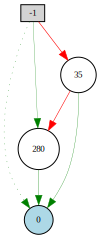

In [6]:
print("\nBest genome:\n{!s}".format(winner_list[0]))

import graphviz
from visualize import draw_net
config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )
draw_net(config, winner_list[0])

In [7]:
winner_net = neat.nn.FeedForwardNetwork.create(winner_list[0], config)
outputs = []
for xi, xo in zip(x_inputs, x_outputs):
    output = winner_net.activate(xi)
    outputs.append(output)
    print("input {!r}, expected output {!r}, got {!r}".format(
        xi, xo, output))

input (-0.4736765320589185,), expected output (0.8937469329201746,), got [0.8671764778326987]
input (-0.05924023916345587,), expected output (0.27551753448820593,), got [0.29355849296258296]
input (0.6169752835263334,), expected output (0.8808039144670197,), got [0.8945202639580696]
input (-0.13109674032759222,), expected output (0.5622868600343961,), got [0.5303143787136849]
input (0.7571638389084243,), expected output (0.8802920071189816,), got [0.9090839750710613]
input (-0.9089410251867394,), expected output (0.8928750093710551,), got [0.8720104689885823]
input (-0.783203807283373,), expected output (0.9167656008606578,), got [0.8719251302982975]
input (0.050176252594551045,), expected output (0.32431179166138785,), got [0.24637478521083717]
input (-0.330030884353601,), expected output (0.7889815515028079,), got [0.8429409797553841]
input (0.8767730361128844,), expected output (0.9071510702531204,), got [0.916146225664838]
input (0.9264725864237195,), expected output (0.92250070151

input (0.963612614323796,), expected output (0.9279621092249107,), got [0.9194591595060733]
input (0.3136936090588465,), expected output (0.8052018999787528,), got [0.796476532486993]
input (-0.23142973072680242,), expected output (0.7461978945256732,), got [0.769095007455503]
input (-0.24544413155402509,), expected output (0.6705001222809764,), got [0.7861134032323459]
input (-0.9295958830420805,), expected output (0.9289182055451022,), got [0.8720156625109711]
input (-0.003627851356412422,), expected output (0.0460519445525285,), got [0.20583749962723039]
input (-0.02791845793072441,), expected output (0.15411315085894745,), got [0.22925404663812757]
input (-0.844192256023237,), expected output (0.9185895384255572,), got [0.8719823145768628]
input (-0.9251991526586923,), expected output (0.9169550609687646,), got [0.8720146645859596]
input (0.05463170362984956,), expected output (0.31056732697185024,), got [0.2557542128477847]
input (0.18220664661907454,), expected output (0.58277272

input (0.35106459780134064,), expected output (0.8477751698898174,), got [0.8189953234236066]
input (0.9525053537010979,), expected output (0.8920921844687998,), got [0.9190985700055723]
input (-0.0258482545790683,), expected output (0.1692629515400852,), got [0.2263190371336959]
input (0.9603490678804532,), expected output (0.929428922975485,), got [0.9193549097173239]
input (0.7594495381817905,), expected output (0.8523968105681313,), got [0.9092553016456145]
input (-0.4618697017705819,), expected output (0.8253126913902812,), got [0.8664144407030695]
input (0.5847691219292737,), expected output (0.8579904476532206,), got [0.8896815415830499]
input (0.6446979118439378,), expected output (0.8500768492000387,), got [0.8981570297258923]
input (-0.9670840926518497,), expected output (0.9163859656441188,), got [0.8720222982439119]
input (0.904215671159297,), expected output (0.9234206146949532,), got [0.9173242860399641]
input (-0.6175917577606097,), expected output (0.8869003361178209,),

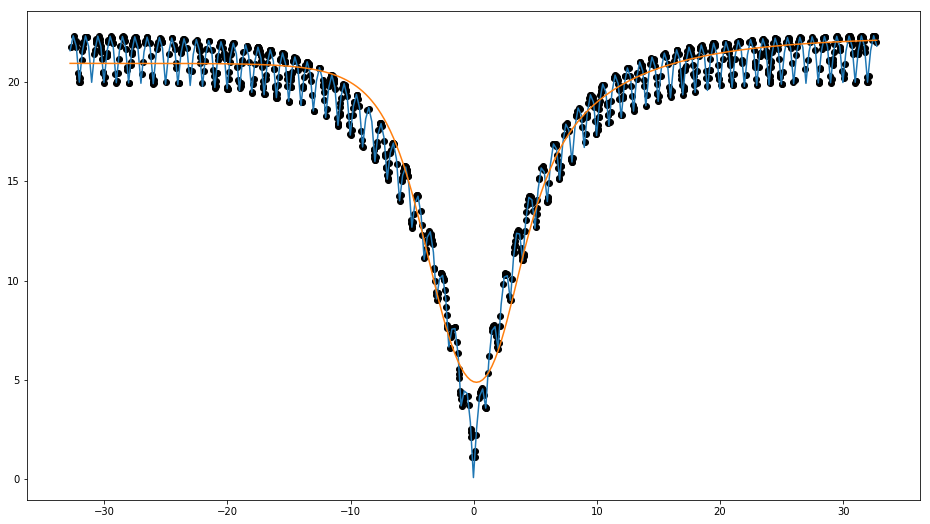

In [11]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize = (16,9))

# Make data.
X = np.arange(-32.768, 32.768, 0.25)


Z = []
for i in range(X.shape[0]):
    a = np.array([X[i]])
    Z.append(ackley(a))
Z = np.array(Z).reshape(X.shape)
plt.plot(X,Z)


OZ = []
for i in range(X.shape[0]):
    a = np.array([X[i]/32.768])
    OZ.append(winner_net.activate(tuple(a)))
OZ = np.array(OZ).reshape(X.shape)

Z = OZ*24
plt.plot(X,Z)
# Plot the surface.

x = []
z = []
for i in range(1000):
    x.append(x_inputs[i][0]*32.768)
    z.append(x_outputs[i][0]*24)

plt.scatter(x, z, c='k', marker='o')


plt.show()

In [9]:
xi = tuple([0])
xo = [tuple([0])]
output = winner_net.activate(xi)
print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

input (0,), expected output [(0,)], got [0.20445966522228107]


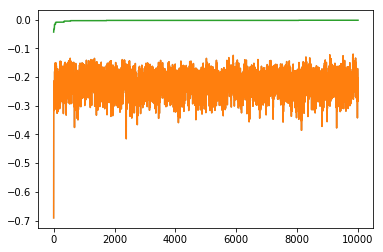

In [10]:
avg_fitness_list = []
best_list = []

for i in range(1):
    generation = range(len(stats_list[i].get_fitness_mean()))
    avg_fitness = np.array(stats_list[i].get_fitness_mean())
    avg_fitness_list.append(avg_fitness)
    best_fitness = [c.fitness for c in stats_list[i].most_fit_genomes]
    best_list.append(best_fitness)

    plt.plot(generation, avg_fitness, alpha = 0.4)
    #plt.plot(generation, best_fitness, alpha = 0.4)

plt.plot(generation, np.average(np.array(avg_fitness_list),axis = 0), label="Average")
plt.plot(generation, np.average(np.array(best_list),axis = 0), label="Best")


plt.show()